In [1]:
import game

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

In [3]:
learningParams = {
    "gamma": 0.2,
    "alpha": 1,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [1000, 5, 1000],
    "muDemand": 2,
    "stdDemand": 0, #0.1, #1,
    "retailerOrder": 10,
    "stockoutCost": 10000,
    "N": 10000
}

it works but cost difference between nodes must be very huge

In [4]:
# create central planner
# plannerAgent = agent.Planner(learningParams, envParams["retailerOrder"])
plannerAgent = agent.PlannerWithPolicyGradient(learningParams, envParams["retailerOrder"])

In [5]:
# plannerAgent.policy_estimator.σ = 5

# # play the game while training
# stateHistory, actionHistory, rewardHistory, experiences = game.runEpisode(envParams, plannerAgent, train=False)

# visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

# # raise Exception("")

In [6]:
# print(plannerAgent.value_estimator.predict(np.array([0, 0, 0])), plannerAgent.value_estimator.predict(np.array([25, 0, 8])))
# # raise Exception("")

In [7]:
# rewardsAll = []
# experienceAll = []
# for _ in tqdm_notebook(range(1000)):
# # play the game while trainings
#     _, _, rewards, experiences = game.runEpisode(envParams, plannerAgent, train=False)
#     averageRewards = np.nansum(rewards)/np.count_nonzero(~np.isnan(rewards))
#     rewardsAll.append(averageRewards)
#     experienceAll.extend(experiences)

# plt.figure(figsize=(10, 5))
# plt.plot(rewardsAll)

# value function estimator

In [8]:
from mpl_toolkits.mplot3d import Axes3D 

In [9]:
# import pandas as pd

# edf = []
# for e in experiences:
#     state = e[0]
#     if state is not None:
#         inventory = state[0]
#         reward = e[3]
        
#         edf.append(np.concatenate((inventory, [reward])))
        
# edf = pd.DataFrame(edf)
# edf.groupby([0, 1]).mean()

In [10]:
# # assume value function is not black box
# from matplotlib import cm

# edf = []

# for w in range(0, 30, 1):
#     X = np.arange(0, 30, 1 )
#     Y = np.arange(0, 30, 1)
#     X, Y = np.meshgrid(X, Y)

#     Z = np.zeros(X.shape)
#     # inventory node 0
#     for i in range(30):
#         # inventory node 1
#         for j in range(30):
#             if (w <= 7) & (j < 10) & (i < 10):
#                 z = 5*envParams["stockoutCost"]
#             elif (w <= 7):
#                 z = envParams["inventoryCost"][0] * i**2.3 + envParams["inventoryCost"][1] * j**1.5 + envParams["inventoryCost"][2] * w
#             elif ((i >= 10)&(j < 10)):
#                 z = envParams["inventoryCost"][0] * i + envParams["inventoryCost"][1] * j + envParams["inventoryCost"][2] * (w-8)
#             elif (i < 10) & (j < 20):
#                 z = 4*envParams["stockoutCost"]
#             elif (j < 10) & (i < 20):                    
#                 z = 3*envParams["stockoutCost"]
#             elif (i >= 20):
#                 z = envParams["inventoryCost"][0] * i**2.3 + envParams["inventoryCost"][1] * j**1.5 + envParams["inventoryCost"][2] * np.sqrt(w)
#             elif (j >= 20):
#                 z = envParams["inventoryCost"][0] * i**2.3 + envParams["inventoryCost"][1] * j**1.5 + envParams["inventoryCost"][2] * np.sqrt(w)
#             else:
#                 z = 2*envParams["stockoutCost"]
#             z *= -1
#             Z[i, j] = z
            
#             edf.append([i, j, w, z])

#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     # Plot the surface.
#     surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                            linewidth=0, antialiased=False)
#     # Add a color bar which maps values to colors.
#     fig.colorbar(surf, shrink=0.5, aspect=5)
#     plt.show()

# edf = pd.DataFrame(edf)

In [11]:
envParams["inventoryCost"]
# best should be [10 0 6]

[1000, 5, 1000]

In [12]:
import pandas as pd

# edf = pd.read_json("valuesDict-5-1000-1000.json", orient='index').reset_index()
edf = pd.read_json("valuesDict-1000-5-1000.json", orient='index').reset_index()
edf.rename({0: 3}, axis=1, inplace=True)
edf[0], edf[1], edf[2] = zip(*edf["index"].apply(lambda x: x.strip("[] ").split()))
edf[0] = edf[0].apply(lambda x: int(x))
edf[1] = edf[1].apply(lambda x: int(x))
edf[2] = edf[2].apply(lambda x: int(x))
edf[3] = edf[3].apply(lambda x: float(x))
edf

index        3  0   1  2
0     [ 0 10  0]    -60.0  0  10  0
1     [ 0 10  1]    -60.0  0  10  1
2     [ 0 10  2]    -60.0  0  10  2
3     [ 0 10  3]    -60.0  0  10  3
4     [ 0 10  4]    -62.0  0  10  4
...          ...      ... ..  .. ..
4800     [9 9 0] -89055.0  9   9  0
4801     [9 9 1] -79055.0  9   9  1
4802     [9 9 2] -69055.0  9   9  2
4803     [9 9 3] -59055.0  9   9  3
4804     [9 9 4] -49057.0  9   9  4

[4805 rows x 5 columns]

In [13]:
edf[(edf[0]==10)&(edf[1]==0)&(edf[2]==4)]

index        3   0  1  2
1154  [10  0  4] -10012.0  10  0  4

In [14]:
edf[(edf[0]==0)&(edf[1]==10)&(edf[2]==0)]

index     3  0   1  2
0  [ 0 10  0] -60.0  0  10  0

In [15]:
edf[edf[3]==edf[3].max()]

index     3  0   1  2
0  [ 0 10  0] -60.0  0  10  0
1  [ 0 10  1] -60.0  0  10  1
2  [ 0 10  2] -60.0  0  10  2
3  [ 0 10  3] -60.0  0  10  3

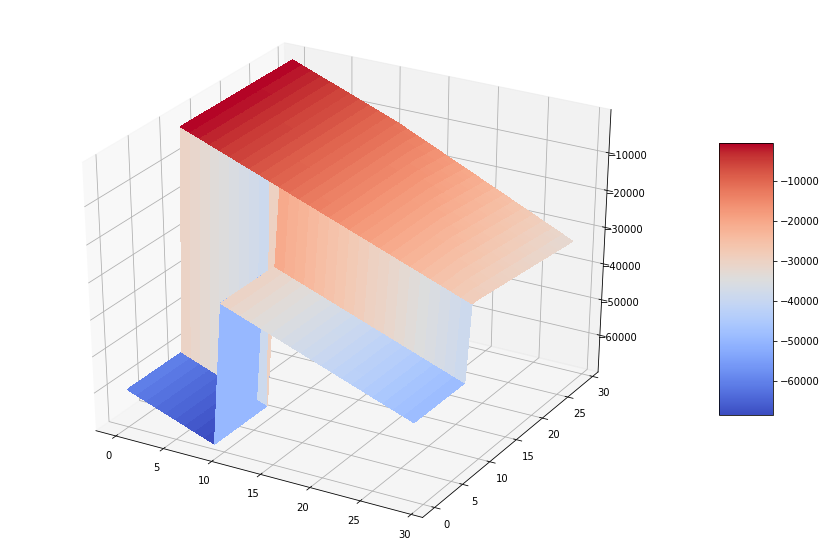

In [16]:
from matplotlib import cm

fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')

df = edf.groupby([0, 1]).mean().reset_index()

Xax = np.arange(df[0].min(), df[0].max(), 1)
Yax = np.arange(df[1].min(), df[1].max(), 1)
Xax, Yax = np.meshgrid(Xax, Yax)

Zax = np.zeros(Xax.shape)
for i in range(Xax.shape[0]):
    for j in range(Xax.shape[1]):
        z = df[(df[0]==Xax[i, j]) & (df[1]==Yax[i, j])][3]
        if z.shape[0] > 0:
            Zax[i, j] = z
        else:
            Zax[i, j] = min(df[3])-1000
# Plot the surface.
surf = ax.plot_surface(Xax, Yax, Zax, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# ax.set_zlim(-199.48181, -199.48180)
# ax.view_init(30, 80)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Train on 4805 samples
Epoch 1/20
4805/4805 [==============================] - 6s 1ms/sample - loss: 431605423.1842
Epoch 2/20
4805/4805 [==============================] - 6s 1ms/sample - loss: 134815450.8320
Epoch 3/20
4805/4805 [==============================] - 5s 1ms/sample - loss: 71863272.4779
Epoch 4/20
4805/4805 [==============================] - 8s 2ms/sample - loss: 53176795.0601
Epoch 5/20
4805/4805 [==============================] - 7s 1ms/sample - loss: 73696367.7236
Epoch 6/20
4805/4805 [==============================] - 6s 1ms/sample - loss: 39971185.3427
Epoch 7/20
4805/4805 [==============================] - 6s 1ms/sample - loss: 31186450.3854
Epoch 8/20
4805/4805 [==============================] - 5s 1ms/sample - loss: 35305514.5157
Epoch 9/20
4805/4805 [==============================] - 6s 1ms/sample - loss: 39284090.9848
Epoch 10/20
4805/4805 [==============================] - 7s 1ms/sample - loss: 29038328.5804
Epoch 11/20
4805/4805 [==============================] 

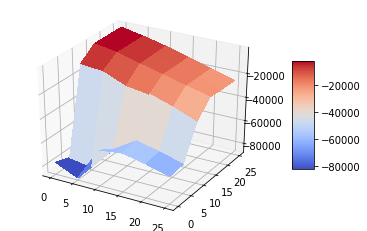

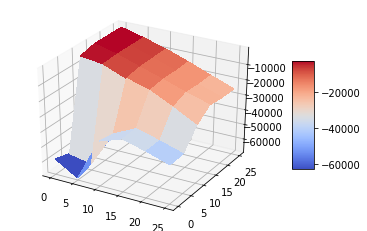

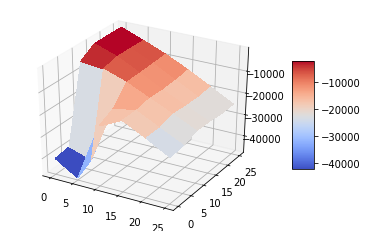

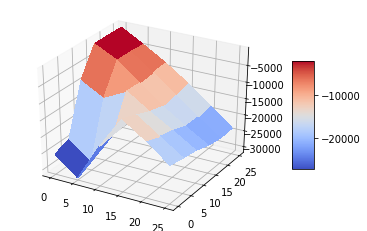

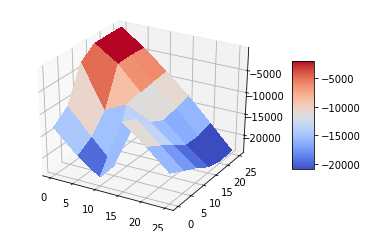

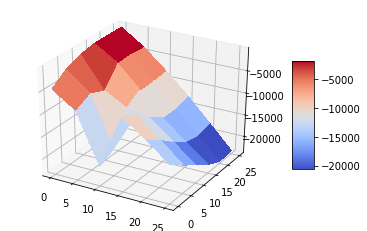

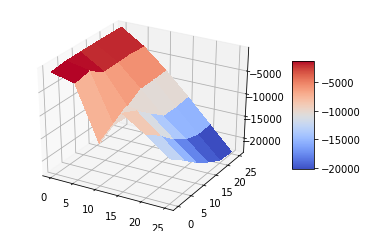

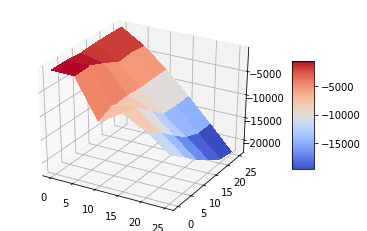

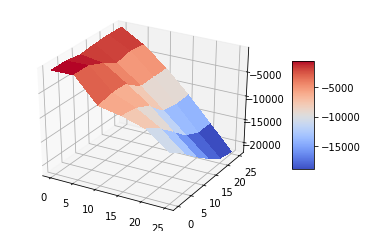

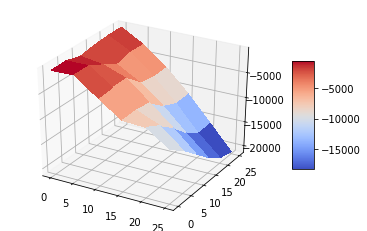

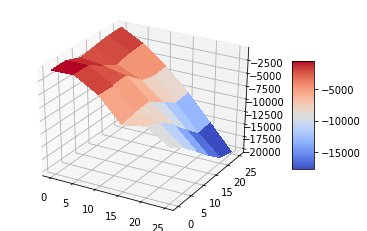

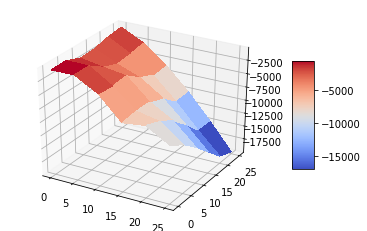

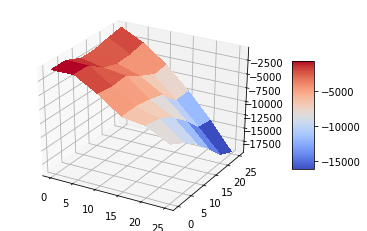

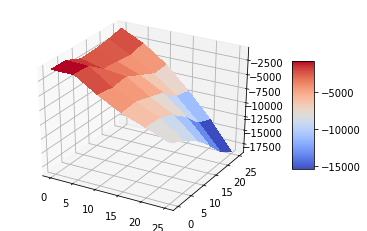

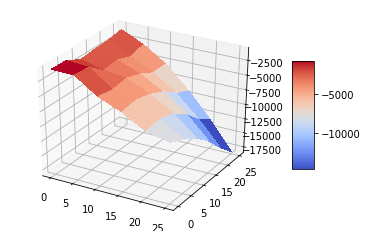

In [17]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Model, losses, optimizers

inputs = Input(shape=(3,))
x = inputs
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, clipnorm=1.0)
opt = "Adam"
# loss = losses.MeanSquaredError()
loss = "mean_squared_error"
model.compile(loss=loss, optimizer=opt)

# for _ in tqdm_notebook(range(100)):
losshistory = model.fit(edf[[0, 1, 2]], edf[3], epochs=20)
    
"""
Illustrate Value Network
proxy to objective function
"""

from matplotlib import cm

for w in range(0, 30, 2):
    # Make data.
    X = np.arange(0, 30, 5)
    Y = np.arange(0, 30, 5)
    X, Y = np.meshgrid(X, Y)

    Z = np.zeros(X.shape)
    Zreal = np.zeros(X.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            s = np.array([X[i,j], Y[i,j], w])
            state = np.reshape(s, (1, 3))
            z = model.predict(state)
            Z[i, j] = z

#             z = edf[(edf[0]==Xax[i, j]) & (edf[1]==Yax[i, j]) & (edf[2] == w)][3]
#             if z.shape[0] > 0:
#                 Zreal[i, j] = z
#             else:
#                 Zreal[i, j] = min(edf[3])-1000

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

# fig = plt.figure(figsize=(15, 10))
# ax = fig.gca(projection='3d')
# # Plot the surface.
# surf = ax.plot_surface(X, Y, Zreal, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()


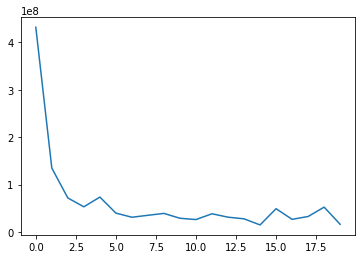

In [18]:
plt.plot(losshistory.history['loss'])

In [19]:
model.predict(np.array([[0, 0, 0]])), model.predict(np.array([[0, 10, 0]])), model.predict(np.array([[10, 0, 4]]))

(array([[-77387.78]], dtype=float32),
 array([[-9951.349]], dtype=float32),
 array([[-20408.475]], dtype=float32))

In [20]:
plannerAgent.value_estimator.model = model

# debug planner agent

In [21]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Model, losses, optimizers
import tensorflow_probability as tfp

In [22]:
# inputs = Input(shape=(4,))
# capacity = Input(shape=(3,))
# retailerOrderQty = Input(shape=(1,))
# prevAction = Input(shape=(3,))
# target = Input(shape=(1,))

# x = inputs
# x = layers.Dense(100, activation="relu")(x)
# x = layers.Dense(80, activation="relu")(x)
# x = layers.Dense(60, activation="relu")(x)
# x = layers.Dense(40, activation="relu")(x)
# x = layers.Dense(20, activation="relu")(x)
# x = layers.Dense(40, activation="relu")(x)
# x = layers.Dense(60, activation="relu")(x)
# x = layers.Dense(80, activation="relu")(x)
# x = layers.Dense(100, activation="relu")(x)
# mu = layers.Dense(3)(x)
# std = Input(shape=(3,)) #1.0

# normal_dist = tfp.distributions.Normal(loc=mu, scale=std)
# # normal distribution
# # sampling
# def sampling(args):
#     return normal_dist.sample(1)

# a = layers.Lambda(sampling, output_shape=(3,))([mu, std])
# # # clipping
# # a = tf.clip_by_value(a, env.action_space.low[0], env.action_space.high[0])

# s0, s1, s2, _ = tf.split(inputs, 4, axis=-1)
# a0, a1, a2 = tf.split(a, 3, axis=-1)
# c0, c1, c2 = tf.split(capacity, 3, axis=-1)

# a2 = tf.clip_by_value(a2, 0, retailerOrderQty + s2)
# a2 = tf.math.floor(a2)
# a2 = tf.clip_by_value(a2, 0, c2-s2)
# a1 = tf.clip_by_value(a1, retailerOrderQty-s1, c1-s1)
# a1 = tf.math.floor(a1)
# a0 = tf.clip_by_value(a0, a1-s0, c0-s0)
# a0 = tf.math.floor(a0)

# a = tf.concat([a0, a1, a2], axis=-1)
# # consider training in a batch for 1-episode, speed up
# model = Model(inputs=[inputs, std, capacity, retailerOrderQty, prevAction, target], outputs=[mu, a])

# loss = -normal_dist.log_prob(prevAction) * target
# optimizer = "adam"
# model.add_loss(loss)
# model.compile(optimizer=optimizer, experimental_run_tf_function=False)

# _state = np.array([[0, 0, 0, 1]])
# _std = np.array([[1, 1, 1]])
# _action = np.array([[10, 10, 0]])
# _target = np.array([-1000]) # reward has to be positive
# _retailerOrderQty = np.array([10])
# _capacity = np.array([[30, 30, 30]])

# print(model.predict([_state, _std, _capacity, _retailerOrderQty, _action, _target]))
# losshistory = model.fit([_state, _std, _capacity, _retailerOrderQty, _action, _target], epochs=100, verbose=1)
# print(model.predict([_state, _std, _capacity, _retailerOrderQty, _action, _target]))

# plt.plot([loss [0, 0] for loss in losshistory.history['loss']])

In [23]:
"""
with tensorflow-keras
"""

class PolicyEstimator():
    def __init__(self, α=0.01):
        self.stdVal = 5 # default standard deviation for exploration
        
        inputs = Input(shape=(4,))
        capacity = Input(shape=(3,))
        retailerOrderQty = Input(shape=(1,))
        prevAction = Input(shape=(3,))
        target = Input(shape=(1,))

        x = inputs
        x = layers.Dense(100, activation="relu")(x)
        x = layers.Dense(80, activation="relu")(x)
        x = layers.Dense(60, activation="relu")(x)
        x = layers.Dense(40, activation="relu")(x)
        x = layers.Dense(20, activation="relu")(x)
        x = layers.Dense(40, activation="relu")(x)
        x = layers.Dense(60, activation="relu")(x)
        x = layers.Dense(80, activation="relu")(x)
        x = layers.Dense(100, activation="relu")(x)
        mu = layers.Dense(3)(x)
        std = Input(shape=(3,)) #std = 5.0

        normal_dist = tfp.distributions.Normal(mu, std)
        # normal distribution
        # sampling
        def sampling(args):
            return normal_dist.sample(1)

        aRaw = layers.Lambda(sampling, output_shape=(3,))([mu, std])
        # clipping
        s0, s1, s2, _ = tf.split(inputs, 4, axis=-1)
        a0, a1, a2 = tf.split(aRaw, 3, axis=-1)
        c0, c1, c2 = tf.split(capacity, 3, axis=-1)
        
        a2 = tf.clip_by_value(a2, 0, 5)#retailerOrderQty + s2)
        a2 = tf.math.floor(a2)
        a2 = tf.clip_by_value(a2, 0, c2-s2) # limit capacity
        a1 = tf.clip_by_value(a1, retailerOrderQty-s1, c1-s1)
        a1 = tf.math.floor(a1)
        a0 = tf.clip_by_value(a0, a1-s0, c0-s0)
        a0 = tf.math.floor(a0)
        a = tf.concat([a0, a1, a2], axis=-1)
        a = tf.clip_by_value(a, 0, 30) 

        # consider training in a batch for 1-episode, speed up
        self.model = Model(inputs=[inputs, std, capacity, retailerOrderQty, prevAction, target], outputs=[mu, a])

        loss = -normal_dist.log_prob(prevAction) * target
        optimizer = "adam"
        self.model.add_loss(loss)
        self.model.compile(optimizer=optimizer, experimental_run_tf_function=False)

    def predict(self, s, capacity, retailerOrderQty): 
        s = np.concatenate((s, [1])) # add bias term
        s = np.reshape(s, (1, 4))
        _action = np.array([[0, 0, 0]])
        _target = np.array([0])
        capacity = np.array([capacity])
        retailerOrderQty = np.array([retailerOrderQty])
        std = np.array([[self.stdVal, self.stdVal, self.stdVal]])
        mu, a = self.model.predict([s, std, capacity, retailerOrderQty, _action, _target])

        return mu[0], a[0, 0]

    def update(self, s, target, a, capacity, retailerOrderQty):
        
        s = np.concatenate((s, [1])) # add bias term
        s = np.reshape(s, (1, 4))
        capacity = np.array([capacity])
        retailerOrderQty = np.array([retailerOrderQty])
        a = np.reshape(a, (1, 3))
        target = np.array([target])
        std = np.array([[self.stdVal, self.stdVal, self.stdVal]])
        
        # exponent
        target = 10 * np.exp(target / 10000)
        # rescale
#         target /= 100
        # clip gradient
        target = np.clip(target, 0, 30)
        
        
        muBefore =  self.predict(s[0, :3], capacity[0], retailerOrderQty[0])[0]
#         print(s, capacity, a, target)
        self.model.fit([s, std, capacity, retailerOrderQty, a, target], epochs=1, verbose=0)
        muAfter = self.predict(s[0, :3], capacity[0], retailerOrderQty[0])[0]
        print("s: {}, mu: {}, a: {}, exp_td_error: {}, newMu: {}".format(s[0, :3], muBefore, a, target, muAfter))
        print("")

In [24]:
plannerAgent.policy_estimator = PolicyEstimator(α=1)
plannerAgent.discount_factor = 0.2

s: [0 0 4], mu: [-0.057453    0.0616474   0.02000075], a: [[10. 10.  0.]], exp_td_error: [16.51825589], newMu: [-0.021354    0.07720731  0.02570828]

s: [0 0 0], mu: [0.00044288 0.01577942 0.00330874], a: [[10. 10.  5.]], exp_td_error: [16.96980985], newMu: [0.01535871 0.02931793 0.0049711 ]

s: [0 0 4], mu: [-0.0007573   0.0958318   0.03205977], a: [[10. 10.  0.]], exp_td_error: [16.51825589], newMu: [0.02825768 0.12732029 0.03349631]

s: [0 0 0], mu: [0.02707134 0.04103955 0.00554016], a: [[10. 10.  0.]], exp_td_error: [12.10486688], newMu: [0.04056349 0.05794165 0.0062585 ]

s: [0 0 0], mu: [0.04056349 0.05794165 0.0062585 ], a: [[10. 10.  1.]], exp_td_error: [12.10486688], newMu: [0.0560257  0.07877459 0.00842336]

s: [0 0 0], mu: [0.0560257  0.07877459 0.00842336], a: [[10. 10.  0.]], exp_td_error: [12.10486688], newMu: [0.07405358 0.10337127 0.01043389]

s: [0 0 0], mu: [0.07405358 0.10337127 0.01043389], a: [[10. 10.  5.]], exp_td_error: [16.96980985], newMu: [0.09535038 0.13447

s: [0 0 4], mu: [4.842493   5.4407043  0.18850389], a: [[10. 10.  3.]], exp_td_error: [19.6178284], newMu: [4.9122186  5.5255475  0.19868873]

s: [0 0 2], mu: [3.2313638 3.6322443 0.1386288], a: [[10. 10.  0.]], exp_td_error: [13.92582044], newMu: [3.282816   3.6946373  0.14540829]

s: [0 0 0], mu: [2.2859235  2.564137   0.11343098], a: [[10. 10.  0.]], exp_td_error: [12.10486688], newMu: [2.3207228  2.6063125  0.11809813]

s: [0 0 0], mu: [2.3207228  2.6063125  0.11809813], a: [[10. 10.  0.]], exp_td_error: [12.10486688], newMu: [2.360108   2.653924   0.12277403]

s: [0 0 0], mu: [2.360108   2.653924   0.12277403], a: [[10. 10.  5.]], exp_td_error: [16.96980985], newMu: [2.4068527  2.7096324  0.12834942]

s: [0 0 4], mu: [5.269376   5.9527035  0.24157122], a: [[11. 11.  4.]], exp_td_error: [23.24818276], newMu: [5.4040484  6.112507   0.25980836]

s: [0 1 4], mu: [5.0238647  5.6860857  0.24923922], a: [[10.  9.  1.]], exp_td_error: [14.04858467], newMu: [5.1634326  5.848448   0.2673484

s: [ 8 19  0], mu: [5.831921  7.1698623 1.1905681], a: [[ 3. 11.  0.]], exp_td_error: [19.88032831], newMu: [5.8654966 7.223658  1.2011468]

s: [ 0 20  0], mu: [11.247483  13.513736   2.0774136], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [11.029361  13.27537    2.0413775]

s: [ 0 20  0], mu: [11.029361  13.27537    2.0413775], a: [[14. 10.  0.]], exp_td_error: [6.52674482], newMu: [10.808841  13.0214405  1.9960847]

s: [ 4 20  0], mu: [ 8.226613  10.032788   1.5889597], a: [[13. 10.  0.]], exp_td_error: [6.08633803], newMu: [8.17021  9.963144 1.568286]

s: [ 7 20  0], mu: [6.459621  7.955175  1.2945673], a: [[ 9. 10.  5.]], exp_td_error: [1.80239272], newMu: [6.448902  7.940617  1.2860159]

s: [16 10  4], mu: [ 8.653156  10.476371   1.6192985], a: [[8. 3. 5.]], exp_td_error: [2.39837944], newMu: [ 8.597032  10.407671   1.6044265]

s: [21  3  4], mu: [14.141303  17.041027   2.5467265], a: [[ 9. 16.  5.]], exp_td_error: [10.96653127], newMu: [13.896201  16.762789   2.521141

s: [ 5 19  0], mu: [10.327901  12.103604   2.0371132], a: [[19.  6.  0.]], exp_td_error: [1.77867354], newMu: [10.460901  12.220868   1.9901363]

s: [18 15  0], mu: [7.5513396 8.888143  1.5042667], a: [[11.  0.  5.]], exp_td_error: [1.09250435], newMu: [7.803595  9.150601  1.5019952]

s: [29  5  4], mu: [26.604551 30.986122  4.726255], a: [[ 1. 25.  3.]], exp_td_error: [30.], newMu: [23.185263 27.199203  4.059458]

s: [ 5 20  2], mu: [13.549365  15.78743    2.3823538], a: [[14. 10.  5.]], exp_td_error: [3.48731587], newMu: [12.272727  14.404641   2.1512394]

s: [ 9 20  4], mu: [14.130971  16.544725   2.4497135], a: [[14. 10.  5.]], exp_td_error: [3.1177503], newMu: [12.823362  15.109685   2.2266839]

s: [13 20  4], mu: [11.070112  13.098249   1.9648271], a: [[13. 10.  4.]], exp_td_error: [3.24902095], newMu: [10.052476  11.970211   1.7955279]

s: [16 20  4], mu: [ 9.013339  10.760267   1.6382883], a: [[14. 10.  0.]], exp_td_error: [4.2227576], newMu: [8.183511  9.829922  1.5003647]

s:

s: [17  3  0], mu: [6.216578  7.74532   1.6772686], a: [[6. 7. 0.]], exp_td_error: [3.2449515], newMu: [6.1701384 7.685412  1.6707257]

s: [16  0  0], mu: [10.765509  13.324585   2.8048496], a: [[11. 12.  5.]], exp_td_error: [5.32099693], newMu: [10.717372 13.260267  2.805621]

s: [15  2  4], mu: [11.970746  14.776849   3.1118805], a: [[11. 13.  2.]], exp_td_error: [5.37478603], newMu: [11.853548  14.627164   3.0917556]

s: [13  5  2], mu: [4.7809067 5.982557  1.3457948], a: [[7. 9. 1.]], exp_td_error: [3.90268272], newMu: [4.740812  5.9311585 1.3389719]

s: [11  4  0], mu: [3.630493  4.531677  1.0421594], a: [[0. 7. 2.]], exp_td_error: [5.59352295], newMu: [3.6088352 4.5044284 1.0395569]

s: [4 1 2], mu: [13.504652 16.522028  3.452938], a: [[15. 19.  0.]], exp_td_error: [30.], newMu: [13.649764  16.696606   3.4284396]

s: [ 0 10  0], mu: [7.0007277 8.60162   1.8394159], a: [[8. 8. 5.]], exp_td_error: [2.99184785], newMu: [7.011147  8.613     1.8153031]

s: [8 0 4], mu: [21.581905 26.4

s: [6 3 4], mu: [22.694628 28.54507   5.891855], a: [[24. 24.  3.]], exp_td_error: [30.], newMu: [22.691397 28.4272    5.702378]

s: [ 6 17  2], mu: [ 8.862892  11.135883   2.3516629], a: [[ 9. 13.  5.]], exp_td_error: [8.81895906], newMu: [ 8.934661 11.185042  2.308924]

s: [ 2 20  4], mu: [16.821447 20.92583   4.147187], a: [[14. 10.  4.]], exp_td_error: [3.86409867], newMu: [16.39041   20.320616   3.9465237]

s: [ 6 20  4], mu: [13.125752  16.288015   3.2165017], a: [[12. 10.  5.]], exp_td_error: [4.31211929], newMu: [12.675511  15.682258   3.0515237]

s: [ 8 20  4], mu: [11.295642  13.999421   2.7596118], a: [[11. 10.  5.]], exp_td_error: [4.6310355], newMu: [10.84583  13.416938  2.618333]

s: [ 9 20  4], mu: [10.231595  12.679369   2.4921257], a: [[6. 9. 3.]], exp_td_error: [8.77181179], newMu: [ 9.595794  11.888443   2.3254838]

s: [ 6 19  2], mu: [7.944297  9.901752  1.9516809], a: [[11. 11.  5.]], exp_td_error: [5.5437081], newMu: [7.5253897 9.3712015 1.8423998]

s: [ 6 20  4],

s: [ 6 12  0], mu: [3.6914854  4.4025354  0.91584235], a: [[2. 6. 4.]], exp_td_error: [3.71817942], newMu: [3.6986845 4.403681  0.9096429]

s: [2 8 4], mu: [18.076267  20.747131   3.6212304], a: [[19. 21.  0.]], exp_td_error: [30.], newMu: [18.01074   20.618206   3.4534707]

s: [ 0 19  0], mu: [7.225516  8.484497  1.5581435], a: [[4. 2. 0.]], exp_td_error: [8.30193003], newMu: [6.9396234 8.138099  1.451121 ]

s: [ 2 11  0], mu: [4.751348 5.569731 1.016361], a: [[0. 2. 3.]], exp_td_error: [2.9234321], newMu: [4.5890303  5.37439    0.95658016]

s: [0 3 2], mu: [15.114284  17.259697   2.6903918], a: [[14. 13.  3.]], exp_td_error: [15.17786061], newMu: [14.906367  16.975468   2.5618837]

s: [1 6 2], mu: [10.915087  12.419937   1.8945017], a: [[14. 14.  5.]], exp_td_error: [30.], newMu: [10.909515  12.382217   1.8644943]

s: [ 1 10  4], mu: [16.532175 18.737236  2.778325], a: [[20. 12.  0.]], exp_td_error: [5.46704156], newMu: [16.458487  18.594908   2.7108805]

s: [ 9 12  0], mu: [3.631973

s: [ 0 11  0], mu: [5.149162   5.913368   0.77265775], a: [[9. 9. 5.]], exp_td_error: [1.34585464], newMu: [5.482355   6.281574   0.79775715]

s: [9 1 4], mu: [19.930704  22.428486   2.4327114], a: [[15. 24.  5.]], exp_td_error: [30.], newMu: [19.907639  22.496357   2.5143526]

s: [ 0 15  4], mu: [14.409945  16.265224   1.8586168], a: [[18. 14.  1.]], exp_td_error: [6.50299405], newMu: [15.005252  16.982183   1.9794118]

s: [ 4 19  0], mu: [5.1613846  6.070803   0.88076425], a: [[5. 9. 5.]], exp_td_error: [2.1112873], newMu: [5.3272033 6.274081  0.9184899]

s: [9 9 4], mu: [16.069298  18.235262   2.1762962], a: [[14. 21.  5.]], exp_td_error: [13.2519513], newMu: [16.3397    18.610338   2.2941022]

s: [ 2 20  4], mu: [13.049419  14.952695   1.9049481], a: [[20. 10.  2.]], exp_td_error: [2.30706046], newMu: [13.550615  15.563514   2.0291183]

s: [12 20  2], mu: [7.107203  8.340195  1.2245404], a: [[0. 8. 5.]], exp_td_error: [12.40892518], newMu: [7.128722  8.39176   1.2648104]

s: [ 4 18

s: [ 0 19  2], mu: [12.823464 15.123697  2.284309], a: [[14. 11.  0.]], exp_td_error: [7.28556548], newMu: [12.373215  14.579943   2.2175562]

s: [ 3 20  0], mu: [8.29599   9.88025   1.6003244], a: [[13. 10.  1.]], exp_td_error: [6.26097866], newMu: [8.219007  9.768403  1.5870616]

s: [ 6 20  0], mu: [6.887055  8.225907  1.3841075], a: [[12. 10.  5.]], exp_td_error: [1.29619576], newMu: [6.8713975 8.191286  1.3810562]

s: [18 10  4], mu: [6.2973094 7.554591  1.2735528], a: [[7. 0. 0.]], exp_td_error: [1.23954574], newMu: [6.330243  7.57684   1.2769928]

s: [25  0  0], mu: [ 8.752783  10.485899   1.7139914], a: [[ 4. 11.  4.]], exp_td_error: [8.59969933], newMu: [ 8.776429  10.502937   1.7248871]

s: [18  1  4], mu: [ 8.455597  10.150008   1.6655171], a: [[7. 9. 3.]], exp_td_error: [5.15348819], newMu: [ 8.457494  10.143356   1.6740108]

s: [16  0  2], mu: [7.570646  9.059036  1.5007263], a: [[ 0. 10.  0.]], exp_td_error: [4.27965483], newMu: [7.5490417 9.0284    1.5023322]

s: [6 0 0],

s: [0 0 4], mu: [23.32083   24.345026   3.1236367], a: [[19. 14.  1.]], exp_td_error: [8.51323729], newMu: [23.120209  24.107101   3.1862414]

s: [5 4 0], mu: [3.7495146  4.07219    0.70605963], a: [[ 9. 14.  0.]], exp_td_error: [21.30235754], newMu: [3.7822974  4.1053157  0.72429097]

s: [0 8 0], mu: [5.1835537 5.5724335 0.9056035], a: [[11. 11.  0.]], exp_td_error: [30.], newMu: [5.3407393 5.7324953 0.9402374]

s: [0 9 0], mu: [5.347604  5.7575707 0.9538599], a: [[13.  4.  3.]], exp_td_error: [9.57417146], newMu: [5.5342155  5.9446087  0.99215066]

s: [9 3 2], mu: [4.4447365 4.8971257 0.8890578], a: [[2. 7. 4.]], exp_td_error: [30.], newMu: [4.4927373  4.9516125  0.91516656]

s: [4 0 4], mu: [20.658373  21.55528    3.1364603], a: [[23. 10.  5.]], exp_td_error: [10.88119415], newMu: [20.497026  21.32126    3.1866438]

s: [17  0  4], mu: [8.308206  9.128079  1.6176246], a: [[13. 15.  2.]], exp_td_error: [5.26683979], newMu: [8.386901  9.188227  1.6592662]

s: [15  5  2], mu: [4.623307 

s: [14  0  0], mu: [ 9.777175  10.260688   2.3378532], a: [[ 5. 10.  2.]], exp_td_error: [4.22025339], newMu: [ 9.831511  10.295592   2.3532982]

s: [9 0 2], mu: [9.440303  9.873576  2.2445335], a: [[ 7. 16.  0.]], exp_td_error: [13.05439602], newMu: [9.534428  9.964687  2.2631307]

s: [0 6 0], mu: [8.605228 8.720272 1.890398], a: [[6. 6. 0.]], exp_td_error: [20.30569725], newMu: [8.456267  8.570084  1.8551992]

s: [0 2 0], mu: [12.917398  12.985909   2.7350104], a: [[9. 9. 5.]], exp_td_error: [21.90398041], newMu: [12.743792  12.806989   2.7162652]

s: [0 1 4], mu: [24.213488 24.228971  5.016581], a: [[28. 22.  5.]], exp_td_error: [25.12305039], newMu: [24.181376 24.089537  5.003619]

s: [ 6 13  4], mu: [8.865169 9.118654 2.085993], a: [[ 9. 12.  5.]], exp_td_error: [7.76035103], newMu: [8.824541 9.046139 2.082812]

s: [ 3 15  4], mu: [8.433192  8.718385  2.0421398], a: [[12. 15.  4.]], exp_td_error: [8.25701416], newMu: [8.550938  8.8092575 2.072649 ]

s: [ 0 20  4], mu: [9.264769  9

s: [ 5 20  4], mu: [11.776961  12.216973   1.0716236], a: [[ 8. 10.  4.]], exp_td_error: [7.05054258], newMu: [11.711257 12.149782  1.004621]

s: [ 3 20  4], mu: [12.638161  13.075249   1.0457026], a: [[12.  5.  5.]], exp_td_error: [2.63431884], newMu: [12.457307  12.891562   0.9806175]

s: [10 15  4], mu: [13.244762   13.568169    0.97856236], a: [[14. 15.  3.]], exp_td_error: [7.0200872], newMu: [13.290118  13.613804   0.9330223]

s: [ 9 20  2], mu: [8.050907   8.471064   0.74721795], a: [[ 3. 10.  2.]], exp_td_error: [14.09369022], newMu: [7.9383616 8.36482   0.7206308]

s: [ 2 20  2], mu: [ 9.75191   10.210919   0.7929376], a: [[17.  7.  0.]], exp_td_error: [2.83109783], newMu: [ 9.62264   10.084689   0.7629954]

s: [12 17  0], mu: [6.5575194 6.9440627 0.6212493], a: [[ 8. 13.  0.]], exp_td_error: [13.2335466], newMu: [6.574157  6.968484  0.6075391]

s: [ 7 20  0], mu: [7.087188   7.5173154  0.64092183], a: [[8. 6. 0.]], exp_td_error: [6.1866993], newMu: [7.0825415 7.518625  0.6257

s: [ 2 15  0], mu: [8.036703  8.783654  1.3428627], a: [[11.  0.  0.]], exp_td_error: [1.13255849], newMu: [8.00439  8.761742 1.36004 ]

s: [13  5  0], mu: [6.3045435 7.032099  1.1878662], a: [[ 4. 14.  0.]], exp_td_error: [0.64717887], newMu: [6.2860107 7.0214787 1.2008377]

s: [3 9 0], mu: [7.54062   8.143958  1.2290494], a: [[9. 5. 1.]], exp_td_error: [8.22629489], newMu: [7.5102983 8.117579  1.2395979]

s: [7 4 0], mu: [6.6398506 7.2622695 1.164446 ], a: [[6. 6. 5.]], exp_td_error: [30.], newMu: [6.5800633 7.20785   1.1854059]

s: [7 0 4], mu: [22.548065  23.841515   3.2955415], a: [[23. 19.  5.]], exp_td_error: [30.], newMu: [22.158173  23.36705    3.3731046]

s: [11  9  4], mu: [12.927647  13.848359   2.1336837], a: [[ 8. 17.  5.]], exp_td_error: [2.34453101], newMu: [12.662771  13.542233   2.1703227]

s: [ 2 16  4], mu: [14.469985  15.36163    2.3851376], a: [[12. 14.  0.]], exp_td_error: [11.57486052], newMu: [14.049207  14.900883   2.3878026]

s: [ 0 20  0], mu: [ 9.212322  10

s: [ 0 14  0], mu: [ 8.737754  10.384358   1.3609046], a: [[10. 10.  5.]], exp_td_error: [1.85416071], newMu: [ 8.817513  10.477549   1.3559484]

s: [10  4  4], mu: [17.982225  20.79284    2.4495454], a: [[19. 16.  3.]], exp_td_error: [1.34083107], newMu: [17.873753  20.680458   2.4172192]

s: [13 10  2], mu: [5.246238 6.604685 1.072955], a: [[ 3. 10.  0.]], exp_td_error: [15.13529227], newMu: [5.163625  6.5243206 1.0587999]

s: [ 6 10  0], mu: [4.815368  5.993721  0.9359386], a: [[5. 6. 0.]], exp_td_error: [4.13748324], newMu: [4.788027   5.9731603  0.92817557]

s: [5 6 0], mu: [6.887477  8.170477  1.0559896], a: [[9. 4. 0.]], exp_td_error: [30.], newMu: [6.7607055 8.009695  1.0226946]

s: [10  0  0], mu: [8.139563  9.947876  1.3495086], a: [[15. 10.  0.]], exp_td_error: [4.19298506], newMu: [8.146535 9.924624 1.322285]

s: [15  0  0], mu: [6.9272256 8.775526  1.3196504], a: [[10. 12.  1.]], exp_td_error: [4.16390646], newMu: [6.9964705 8.828412  1.3036098]

s: [13  2  0], mu: [4.8396

s: [0 7 0], mu: [8.468179   9.2024     0.35001478], a: [[9. 9. 2.]], exp_td_error: [29.71940184], newMu: [8.442282   9.220501   0.36771944]

s: [0 6 2], mu: [15.6607     16.57658     0.39477015], a: [[16. 16.  0.]], exp_td_error: [30.], newMu: [15.65294    16.591606    0.39828354]

s: [ 0 12  0], mu: [5.050617  6.018516  0.5122376], a: [[8. 8. 5.]], exp_td_error: [1.22110105], newMu: [5.040427  6.020514  0.5169168]

s: [8 2 4], mu: [20.173225   21.611212    0.59781647], a: [[22. 24.  0.]], exp_td_error: [30.], newMu: [20.737326   22.122755    0.54192847]

s: [ 6 16  0], mu: [2.2373662  3.1664355  0.55132174], a: [[3. 0. 3.]], exp_td_error: [1.57461065], newMu: [2.2933886  3.2212791  0.54969776]

s: [9 6 2], mu: [5.1995134  6.2467747  0.53720987], a: [[3. 8. 0.]], exp_td_error: [30.], newMu: [5.3548784 6.4151826 0.5318524]

s: [4 4 0], mu: [7.173303  7.890432  0.3560614], a: [[8. 8. 0.]], exp_td_error: [13.23688332], newMu: [7.284096   8.004312   0.34474763]

s: [4 2 0], mu: [ 9.752589 

s: [ 2 18  4], mu: [ 8.877032 10.908799  2.552692], a: [[11. 12.  5.]], exp_td_error: [7.01577777], newMu: [ 9.399058 11.564806  2.737276]

s: [ 1 20  4], mu: [ 8.453177  10.635387   2.6037276], a: [[10.  3.  0.]], exp_td_error: [4.15615979], newMu: [ 8.730024 10.992381  2.715013]

s: [ 8 13  0], mu: [3.730251  5.0902042 1.4574761], a: [[1. 6. 5.]], exp_td_error: [3.97541609], newMu: [3.865568  5.2677546 1.5179424]

s: [3 9 4], mu: [20.958052 23.508778  4.575142], a: [[22. 16.  5.]], exp_td_error: [27.61240241], newMu: [20.494452  22.825333   4.4984355]

s: [ 9 15  4], mu: [13.628434  15.920928   3.5518482], a: [[16. 15.  5.]], exp_td_error: [4.63123599], newMu: [13.348978  15.491237   3.4961615]

s: [10 20  4], mu: [7.9234366 9.926002  2.5990818], a: [[ 5. 10.  0.]], exp_td_error: [13.2777408], newMu: [7.5606728 9.452047  2.501019 ]

s: [ 5 20  0], mu: [3.7125936 5.1327133 1.5802397], a: [[6. 6. 1.]], exp_td_error: [8.4077012], newMu: [3.6677816 5.0411015 1.5590982]

s: [ 5 16  0], mu

s: [16  0  0], mu: [ 9.121115  11.345313   2.3918948], a: [[ 7. 10.  5.]], exp_td_error: [6.66511093], newMu: [ 8.93406  11.154313  2.358237]

s: [13  0  4], mu: [18.415077  20.683851   3.5476787], a: [[17. 24.  5.]], exp_td_error: [1.82411316], newMu: [18.275747  20.551588   3.5173202]

s: [ 6 14  4], mu: [11.007471  12.401698   2.2420151], a: [[11. 15.  5.]], exp_td_error: [8.69274888], newMu: [10.940812 12.357122  2.243677]

s: [ 2 19  4], mu: [7.9981847 9.64724   1.9875984], a: [[11. 11.  0.]], exp_td_error: [9.26519616], newMu: [8.146709  9.79847   2.0021644]

s: [ 2 20  0], mu: [5.897059  7.4626226 1.6600045], a: [[ 8. 10.  1.]], exp_td_error: [11.49357391], newMu: [6.0347447 7.60269   1.672127 ]

s: [ 0 20  0], mu: [6.720482  8.367202  1.7883989], a: [[8. 6. 0.]], exp_td_error: [8.25275449], newMu: [6.8480053 8.480721  1.7899766]

s: [ 2 16  0], mu: [5.6828704 7.053929  1.5218939], a: [[12. 14.  2.]], exp_td_error: [9.52349699], newMu: [5.9378514 7.2892256 1.5376652]

s: [ 0 20 

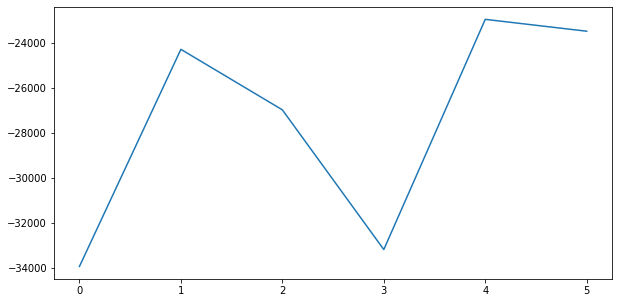

s: [0 0 4], mu: [26.161463  26.867039   3.4591608], a: [[30. 30.  5.]], exp_td_error: [30.], newMu: [27.162514  27.846497   3.6234818]

s: [ 0 20  4], mu: [13.657516  15.335375   2.6301367], a: [[14. 10.  1.]], exp_td_error: [6.40395501], newMu: [14.244473  15.869351   2.6975734]

s: [ 4 20  0], mu: [ 8.660796  10.170503   1.9696645], a: [[10.  2.  5.]], exp_td_error: [2.23260881], newMu: [ 8.868786 10.339913  1.995312]

s: [12 12  4], mu: [16.498526  17.607395   2.7248886], a: [[16. 15.  2.]], exp_td_error: [5.35699822], newMu: [16.939383  17.969894   2.7677286]

s: [13 17  2], mu: [7.1023083 8.550315  1.8234737], a: [[10.  2.  5.]], exp_td_error: [1.83705442], newMu: [7.231141  8.6466875 1.8361194]

s: [21  9  4], mu: [ 8.568704  10.58295    2.2516706], a: [[4. 6. 1.]], exp_td_error: [3.65013686], newMu: [ 8.557281  10.538336   2.2490253]

s: [19  5  0], mu: [5.51656   7.1724854 1.7059089], a: [[8. 9. 0.]], exp_td_error: [2.78752405], newMu: [5.5566974 7.192686  1.7086307]

s: [18  4

s: [3 5 0], mu: [15.23026   15.196418   1.2228161], a: [[20. 15.  0.]], exp_td_error: [30.], newMu: [15.636032  15.553687   1.2339096]

s: [ 8 10  0], mu: [8.798626  9.315295  1.0331135], a: [[9. 9. 0.]], exp_td_error: [5.76813139], newMu: [9.11587   9.585678  1.0331993]

s: [8 9 0], mu: [9.404454  9.797749  1.0189118], a: [[7. 3. 4.]], exp_td_error: [30.], newMu: [8.864327  9.286872  1.0177939]

s: [12  2  4], mu: [18.41216   18.900227   1.7658038], a: [[14. 26.  5.]], exp_td_error: [3.36185081], newMu: [18.262556  18.750887   1.8049467]

s: [ 0 18  4], mu: [23.67817   23.347277   1.7864413], a: [[30. 12.  5.]], exp_td_error: [0.80069669], newMu: [23.294666  22.950953   1.8108497]

s: [18 20  4], mu: [10.285387  11.620988   1.6559579], a: [[12. 10.  5.]], exp_td_error: [3.48902088], newMu: [ 9.824722  11.218438   1.6791353]

s: [20 20  4], mu: [ 9.159035  10.7135935  1.7024437], a: [[ 2. 10.  0.]], exp_td_error: [16.9071095], newMu: [8.036864  9.710636  1.6768042]

s: [12 20  0], mu: 

s: [ 0 19  2], mu: [11.372485  13.936732   1.7559994], a: [[11. 11.  3.]], exp_td_error: [8.38629937], newMu: [11.933794  14.344985   1.6466961]

s: [ 0 20  2], mu: [12.031652  14.551833   1.7058601], a: [[16.  8.  1.]], exp_td_error: [4.01325429], newMu: [12.510171 14.855367  1.609625]

s: [ 8 18  0], mu: [4.5492563 7.103981  1.5664201], a: [[12.  0.  0.]], exp_td_error: [0.96789], newMu: [4.7034626 7.2136674 1.5317069]

s: [20  8  0], mu: [3.048874  5.8928213 1.7287395], a: [[3. 2. 5.]], exp_td_error: [1.78805014], newMu: [3.1641004 5.981764  1.7079096]

s: [21  0  4], mu: [ 7.1941833 12.432952   2.8933244], a: [[ 6. 13.  5.]], exp_td_error: [11.03604888], newMu: [ 7.451228  12.648848   2.8738806]

s: [14  3  4], mu: [ 6.5788317 10.298998   2.1343215], a: [[ 2. 12.  5.]], exp_td_error: [8.07543907], newMu: [ 6.709896  10.438326   2.1461952]

s: [4 5 4], mu: [25.367556  25.890686   1.2759063], a: [[23. 25.  0.]], exp_td_error: [30.], newMu: [25.226938 25.750109  1.20326 ]

s: [ 2 20  

s: [9 0 4], mu: [11.914046  14.259346   2.1379972], a: [[19. 12.  0.]], exp_td_error: [4.36257004], newMu: [11.476259 13.90679   2.201745]

s: [16  2  0], mu: [2.8723626 6.3752365 2.123767 ], a: [[ 0. 15.  0.]], exp_td_error: [7.67281296], newMu: [2.8002305 6.340974  2.1549842]

s: [1 7 0], mu: [11.16982   11.073438   1.0198803], a: [[15.  9.  5.]], exp_td_error: [16.00242337], newMu: [10.950008  10.856729   1.0548706]

s: [7 6 4], mu: [4.5138645 6.733289  1.624218 ], a: [[ 5. 12.  0.]], exp_td_error: [19.83838944], newMu: [4.3834863 6.661142  1.6593094]

s: [0 8 0], mu: [12.145946  11.985095   1.1622503], a: [[12.  7.  0.]], exp_td_error: [20.35274667], newMu: [11.7469225 11.579335   1.156741 ]

s: [5 5 0], mu: [3.9086945 5.3244643 1.2124144], a: [[7. 5. 0.]], exp_td_error: [30.], newMu: [3.8616688 5.2736096 1.2165931]

s: [7 0 0], mu: [7.4238696 9.080607  1.6615602], a: [[11. 10.  3.]], exp_td_error: [13.52849945], newMu: [7.597579  9.147613  1.6493458]

s: [8 0 2], mu: [6.8428917 9.

s: [0 0 0], mu: [20.84017   19.418325   1.8392528], a: [[22. 22.  2.]], exp_td_error: [30.], newMu: [21.144566  19.897987   1.8828197]

s: [ 0 12  2], mu: [4.044152  8.294886  2.7042165], a: [[7. 5. 1.]], exp_td_error: [1.59209291], newMu: [4.1138215 8.338555  2.6956444]

s: [2 7 0], mu: [4.3892417 7.27005   2.0133681], a: [[10. 12.  0.]], exp_td_error: [22.7944402], newMu: [4.648051  7.5254254 2.0134609]

s: [0 9 0], mu: [6.372663  9.363034  2.2189481], a: [[15. 15.  5.]], exp_td_error: [30.], newMu: [ 7.846374  10.567842   2.2088792]

s: [ 0 14  4], mu: [4.6173444 9.50712   3.0979283], a: [[7. 7. 0.]], exp_td_error: [10.30525564], newMu: [ 5.330773  10.266388   3.2061865]

s: [ 0 11  0], mu: [ 7.2903495 10.845948   2.616659 ], a: [[17.  1.  5.]], exp_td_error: [0.92939984], newMu: [ 8.500041  11.742074   2.6024766]

s: [17  1  4], mu: [ 5.531418 14.181075  5.303957], a: [[ 3. 14.  1.]], exp_td_error: [5.4483403], newMu: [ 5.799481 14.428848  5.229607]

s: [6 5 0], mu: [3.6806793 6.67

s: [ 0 18  0], mu: [13.34949    12.651025    0.84917533], a: [[19. 12.  0.]], exp_td_error: [4.620225], newMu: [13.423146   12.819789    0.82934785]

s: [ 7 20  0], mu: [3.42291   4.747464  1.1132206], a: [[0. 4. 0.]], exp_td_error: [12.6836491], newMu: [3.3569083 4.6911006 1.0914323]

s: [ 3 14  0], mu: [5.9391413  6.6954556  0.97582924], a: [[0. 2. 0.]], exp_td_error: [2.19575015], newMu: [5.8208804  6.6199665  0.95860946]

s: [1 6 0], mu: [17.192995  16.129885   0.7558307], a: [[22. 17.  3.]], exp_td_error: [30.], newMu: [17.66381    16.604752    0.79967934]

s: [ 6 13  2], mu: [2.7833226  3.9408946  0.94671535], a: [[12.  0.  5.]], exp_td_error: [1.26045903], newMu: [2.8322287 3.985575  0.9491901]

s: [18  3  4], mu: [4.0610924 7.501867  2.2755148], a: [[9. 7. 2.]], exp_td_error: [3.21144939], newMu: [4.1119943 7.522193  2.2659898]

s: [20  0  2], mu: [5.18704   9.262519  2.6263425], a: [[ 4. 10.  4.]], exp_td_error: [7.64973518], newMu: [5.228197  9.289384  2.6281862]

s: [14  0  

s: [ 5 17  4], mu: [7.355404 9.761005 1.843535], a: [[16.  8.  0.]], exp_td_error: [3.19261343], newMu: [ 8.088235  10.489715   1.9417968]

s: [13 15  0], mu: [4.628569  7.24133   1.7366066], a: [[ 5. 14.  3.]], exp_td_error: [16.91164226], newMu: [4.917334  7.705132  1.8659102]

s: [ 4 19  2], mu: [ 9.502583  11.620557   1.9679757], a: [[ 7. 11.  3.]], exp_td_error: [11.14583743], newMu: [ 9.921962  12.165832   2.0986743]

s: [ 0 20  2], mu: [22.425133  22.318655   2.1049626], a: [[16. 10.  2.]], exp_td_error: [4.16585342], newMu: [21.157839  21.294268   2.1714315]

s: [ 6 20  2], mu: [6.809449  9.803599  2.1976097], a: [[ 6. 10.  3.]], exp_td_error: [10.79763888], newMu: [6.7216897 9.826986  2.272413 ]

s: [ 2 20  2], mu: [13.342198  15.129295   2.2619257], a: [[18. 10.  0.]], exp_td_error: [3.59520442], newMu: [12.596903 14.625542  2.348616]

s: [10 20  0], mu: [5.8038445 9.041547  2.2748597], a: [[10. 10.  5.]], exp_td_error: [5.07241109], newMu: [5.8598833 9.172615  2.3406782]

s:

s: [ 4 18  0], mu: [6.483278  8.612017  1.8119655], a: [[12. 11.  5.]], exp_td_error: [1.38206128], newMu: [6.4860983 8.611386  1.7847979]

s: [16  8  4], mu: [11.311437  16.194338   3.4138358], a: [[ 6. 12.  5.]], exp_td_error: [9.61475034], newMu: [10.980919  15.824315   3.3342981]

s: [10 10  4], mu: [10.24552   12.662858   2.2428954], a: [[ 7. 14.  0.]], exp_td_error: [17.87187141], newMu: [ 9.872525 12.336536  2.189377]

s: [ 3 14  0], mu: [6.796803  8.329273  1.5053054], a: [[6. 8. 2.]], exp_td_error: [9.17750941], newMu: [6.672086  8.216449  1.4757783]

s: [ 1 12  2], mu: [8.24516   8.572538  1.0716403], a: [[10.  3.  4.]], exp_td_error: [1.2853285], newMu: [8.000497  8.3947735 1.0622597]

s: [8 5 4], mu: [20.334143  20.01118    1.8202176], a: [[15. 23.  2.]], exp_td_error: [30.], newMu: [19.560755  19.70994    1.8853441]

s: [ 0 18  2], mu: [5.9259353 7.7344027 1.4759727], a: [[9. 9. 0.]], exp_td_error: [10.24405151], newMu: [5.839596  7.7361646 1.4813981]

s: [ 0 17  0], mu: [

s: [ 0 18  0], mu: [7.800996  9.63823   1.1348419], a: [[7. 7. 5.]], exp_td_error: [1.41679461], newMu: [7.534397  9.528128  1.2085068]

s: [7 8 4], mu: [14.113278  17.233128   1.8652146], a: [[16. 15.  5.]], exp_td_error: [30.], newMu: [14.023066  17.167366   1.9795161]

s: [ 8 13  4], mu: [ 5.9983115 10.114768   2.0324748], a: [[ 7. 15.  5.]], exp_td_error: [13.65462149], newMu: [ 6.0868783 10.334552   2.1520648]

s: [ 0 18  4], mu: [6.765072  9.766402  1.6963905], a: [[6. 6. 5.]], exp_td_error: [6.82427413], newMu: [6.5707965 9.69215   1.7960538]

s: [ 0 14  4], mu: [11.368573  12.513552   1.2560022], a: [[13. 13.  2.]], exp_td_error: [8.45001735], newMu: [11.346519  12.581051   1.3649983]

s: [ 0 17  2], mu: [7.200272  9.7722435 1.6655407], a: [[7. 7. 3.]], exp_td_error: [8.42983139], newMu: [7.0228148 9.665898  1.738515 ]

s: [ 0 14  2], mu: [10.3803835 11.629859   1.3705177], a: [[14. 14.  2.]], exp_td_error: [8.51563148], newMu: [10.730401  11.916697   1.4255625]

s: [ 0 18  2],

s: [11  0  0], mu: [15.99888   16.429483   1.1788007], a: [[17. 23.  0.]], exp_td_error: [2.70506887], newMu: [16.106102  16.395199   1.1456771]

s: [ 5 13  0], mu: [12.471825   11.918665    0.61879003], a: [[14. 14.  5.]], exp_td_error: [0.99653498], newMu: [12.929257   12.327379    0.63736737]

s: [19  3  4], mu: [1.3988706 6.2416544 2.1087747], a: [[ 6. 10.  0.]], exp_td_error: [5.21641654], newMu: [1.4206126 6.2528915 2.0882847]

s: [15  3  0], mu: [5.641302  9.8245125 2.0429134], a: [[2. 8. 0.]], exp_td_error: [3.55069478], newMu: [5.6624722 9.781149  2.014943 ]

s: [9 1 0], mu: [16.84074    16.304857    0.91195077], a: [[13. 14.  0.]], exp_td_error: [4.9879863], newMu: [16.740534  16.184217   0.9053476]

s: [8 5 0], mu: [14.08622    13.597538    0.81442595], a: [[14.  7.  0.]], exp_td_error: [30.], newMu: [13.607873  13.066444   0.7741668]

s: [15  2  0], mu: [ 6.1422806 10.290024   2.0312722], a: [[ 9. 16.  5.]], exp_td_error: [0.68493828], newMu: [5.635768  9.790546  2.0000174]

s: [6 4 0], mu: [ 8.987073  10.2969     1.9215028], a: [[6. 6. 5.]], exp_td_error: [30.], newMu: [8.395766  9.839946  1.9403169]

s: [6 0 4], mu: [ 9.746588  14.528813   3.2432964], a: [[17. 14.  5.]], exp_td_error: [21.39569768], newMu: [10.169508 14.381925  3.22553 ]

s: [9 4 4], mu: [1.6169486 7.2337093 2.346291 ], a: [[ 2. 11.  0.]], exp_td_error: [11.3346268], newMu: [1.6592349 7.2259593 2.346288 ]

s: [0 5 0], mu: [16.617584  16.505768   2.7918267], a: [[14. 12.  0.]], exp_td_error: [13.31165459], newMu: [16.306723  16.126173   2.7968616]

s: [2 7 0], mu: [12.171012 12.169905  2.191209], a: [[11. 13.  2.]], exp_td_error: [30.], newMu: [11.82654  11.806523  2.171495]

s: [ 0 10  2], mu: [12.830166  12.703913   2.2873025], a: [[8. 8. 0.]], exp_td_error: [2.24176779], newMu: [12.496301  12.354007   2.2650423]

s: [0 8 0], mu: [13.693502  13.519865   2.4548128], a: [[15. 15.  3.]], exp_td_error: [30.], newMu: [13.556427 13.36495   2.472333]

s: [ 0 13  2], mu: [10.1245985 10.0307    

s: [2 4 4], mu: [21.9111   19.144373  4.477732], a: [[24. 26.  1.]], exp_td_error: [30.], newMu: [22.557667 19.743237  4.45931 ]

s: [ 0 20  0], mu: [17.870426  15.567802   3.3973172], a: [[11. 10.  5.]], exp_td_error: [1.90749197], newMu: [18.022327 15.730649  3.325888]

s: [11 10  4], mu: [1.9563321 9.261691  2.9693198], a: [[0. 0. 0.]], exp_td_error: [3.17431466], newMu: [1.9639058 9.34126   2.9755206]

s: [11  0  0], mu: [ 2.9573026 12.172509   3.7622607], a: [[ 7. 17.  5.]], exp_td_error: [1.26677897], newMu: [ 3.011926 12.284844  3.773367]

s: [1 7 4], mu: [25.667543  22.485111   4.6067567], a: [[26. 23.  0.]], exp_td_error: [30.], newMu: [26.082731 22.84675   4.31728 ]

s: [ 4 20  0], mu: [8.629868  8.805585  1.9861683], a: [[18.  2.  1.]], exp_td_error: [1.29576913], newMu: [8.697443  8.866085  1.8846995]

s: [20 12  0], mu: [ 1.9002308 11.895834   3.6061666], a: [[ 8. 13.  0.]], exp_td_error: [10.64566336], newMu: [ 2.0334883 12.050919   3.53758  ]

s: [15 15  0], mu: [1.83248

s: [ 0 19  2], mu: [18.941534  17.585136   1.1086512], a: [[17. 11.  5.]], exp_td_error: [3.43028655], newMu: [18.40717  17.266518  1.138868]

s: [ 6 20  4], mu: [5.9057083 9.257438  1.423404 ], a: [[3. 9. 5.]], exp_td_error: [10.96614421], newMu: [5.443066  9.21116   1.5039705]

s: [ 0 19  4], mu: [21.746593  20.335508   1.3444737], a: [[21. 11.  5.]], exp_td_error: [2.11610011], newMu: [20.758417  19.632042   1.3778585]

s: [10 20  4], mu: [2.691672  7.757966  1.5855242], a: [[ 0. 10.  0.]], exp_td_error: [23.55616802], newMu: [2.4919615 7.899528  1.63694  ]

s: [ 0 20  0], mu: [12.377472 12.723498  1.151516], a: [[15.  7.  0.]], exp_td_error: [4.05960386], newMu: [11.584418  12.297078   1.1918856]

s: [ 8 17  0], mu: [2.2390678 7.2129483 1.5066428], a: [[3. 5. 0.]], exp_td_error: [10.12416452], newMu: [2.1177013 7.241834  1.5232294]

s: [ 6 12  0], mu: [2.973022  7.5593066 1.503856 ], a: [[2. 5. 1.]], exp_td_error: [2.15832611], newMu: [2.8110502 7.5464034 1.5200169]

s: [3 7 0], mu

s: [19  0  0], mu: [ 2.6601157 11.555982   3.5588531], a: [[10. 10.  0.]], exp_td_error: [2.90386223], newMu: [ 2.646585  11.402097   3.4776118]

s: [19  0  0], mu: [ 2.646585  11.402097   3.4776118], a: [[ 2. 21.  2.]], exp_td_error: [6.77442272], newMu: [ 2.6566043 11.542639   3.454863 ]

s: [ 0 11  2], mu: [17.851421  15.85297    2.7499652], a: [[14. 12.  5.]], exp_td_error: [5.6481005], newMu: [17.449009 15.569809  2.652445]

s: [ 2 13  4], mu: [13.738441  12.397182   2.1877904], a: [[14. 15.  5.]], exp_td_error: [6.9120367], newMu: [13.487172 12.237991  2.137319]

s: [ 1 18  4], mu: [11.617179  10.594867   1.8713341], a: [[7. 8. 0.]], exp_td_error: [10.58133808], newMu: [10.950281  10.084927   1.7788582]

s: [ 0 16  0], mu: [12.23894   11.123964   1.8940575], a: [[14. 14.  3.]], exp_td_error: [8.57101807], newMu: [11.951593 10.929997  1.847489]

s: [ 0 20  2], mu: [10.521078   9.725745   1.6940497], a: [[9. 9. 1.]], exp_td_error: [10.18489874], newMu: [10.0602455  9.391      1.636

s: [ 1 19  0], mu: [15.542291  13.86213    3.2722805], a: [[16. 11.  0.]], exp_td_error: [5.34451684], newMu: [14.938915  13.461768   3.1746821]

s: [ 6 20  0], mu: [7.6268516 7.965783  2.191141 ], a: [[10.  0.  1.]], exp_td_error: [2.06858882], newMu: [7.3688703 7.852424  2.1689947]

s: [16 10  0], mu: [1.7894783 9.937135  3.0664206], a: [[0. 9. 5.]], exp_td_error: [14.91817588], newMu: [ 1.7538799 10.006746   3.0859635]

s: [7 9 4], mu: [ 9.6903305 10.522263   2.8911195], a: [[14.  3.  0.]], exp_td_error: [30.], newMu: [ 9.964641  10.14459    2.6831713]

s: [18  2  0], mu: [ 2.257938 14.892134  4.399813], a: [[ 6. 20.  2.]], exp_td_error: [3.77418864], newMu: [ 2.2777505 14.767081   4.3234205]

s: [ 4 12  2], mu: [11.445975  10.527596   2.4836762], a: [[14.  0.  5.]], exp_td_error: [1.04088747], newMu: [11.324185  10.280953   2.3675244]

s: [18  2  4], mu: [ 2.2056077 14.845188   4.2769346], a: [[ 6. 13.  5.]], exp_td_error: [10.69512074], newMu: [ 2.2700799 14.641245   4.2053137]

s

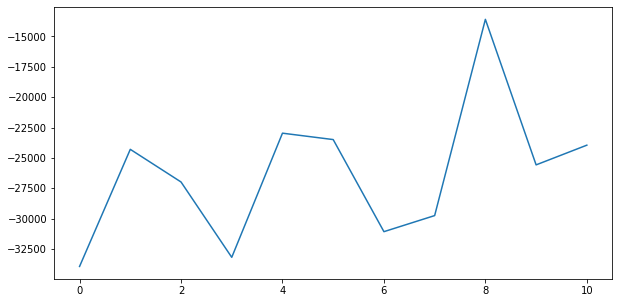

s: [0 0 4], mu: [19.43171   16.437263   2.9060123], a: [[26. 14.  0.]], exp_td_error: [8.10307745], newMu: [19.530432  16.39054    2.7627575]

s: [12  4  0], mu: [ 2.685979 10.14182   2.713205], a: [[3. 9. 0.]], exp_td_error: [3.46437216], newMu: [ 2.741747  10.161882   2.6692984]

s: [6 3 0], mu: [10.456014   9.336206   1.7973166], a: [[17.  8.  5.]], exp_td_error: [17.08416126], newMu: [10.617828  9.356434  1.743608]

s: [15  1  4], mu: [ 3.446607 14.219293  3.525524], a: [[ 0. 14.  5.]], exp_td_error: [12.57198754], newMu: [ 3.465784  14.218905   3.5063124]

s: [1 5 4], mu: [20.325857 16.633837  2.515562], a: [[27. 12.  0.]], exp_td_error: [5.33031537], newMu: [20.488747  16.631798   2.4326363]

s: [16  7  0], mu: [ 2.770776  10.695129   2.6856713], a: [[ 4. 13.  0.]], exp_td_error: [11.08506976], newMu: [ 2.8112905 10.785047   2.6668363]

s: [ 7 10  0], mu: [7.402849  6.5700665 1.2283347], a: [[11. 18.  5.]], exp_td_error: [3.50938023], newMu: [7.5565104 6.622344  1.1997684]

s: [1

s: [18  6  4], mu: [ 2.901825  13.5297365  2.5893116], a: [[ 5. 18.  3.]], exp_td_error: [28.17100911], newMu: [ 3.0644362 14.312374   2.6906402]

s: [ 5 14  2], mu: [15.69853   13.416331   2.1163208], a: [[12. 14.  0.]], exp_td_error: [10.53844882], newMu: [15.434881  13.273199   2.0887692]

s: [ 3 18  0], mu: [16.364344  14.008605   2.1639404], a: [[15. 12.  1.]], exp_td_error: [6.31354623], newMu: [15.875542  13.669625   2.1051397]

s: [ 6 20  0], mu: [11.473705  10.251001   1.7063732], a: [[13. 10.  4.]], exp_td_error: [1.15111592], newMu: [11.121293  10.09046    1.7026831]

s: [19 10  4], mu: [ 3.170838  14.625655   2.6624599], a: [[ 1. 10.  1.]], exp_td_error: [14.82863824], newMu: [ 3.1492136 14.588339   2.6251574]

s: [10 10  0], mu: [8.73317   9.087749  1.8171365], a: [[11. 12.  1.]], exp_td_error: [24.15147098], newMu: [8.935946  9.239646  1.8133757]

s: [ 9 12  0], mu: [9.108922  9.036149  1.7043859], a: [[13.  3.  0.]], exp_td_error: [1.08377425], newMu: [9.234744  9.155868

s: [10  4  0], mu: [8.351356  9.301535  1.0892247], a: [[8. 6. 0.]], exp_td_error: [10.82663257], newMu: [8.300202  9.225598  1.0978314]

s: [12  0  0], mu: [10.040144  12.132449   1.4341502], a: [[18. 16.  4.]], exp_td_error: [0.61756835], newMu: [10.070296 12.04175   1.437642]

s: [14  6  4], mu: [2.8521755 6.9158325 0.8821117], a: [[1. 9. 5.]], exp_td_error: [6.53792463], newMu: [2.8743355 6.7925196 0.8976045]

s: [6 5 4], mu: [14.9792    13.768857   1.3404622], a: [[11. 12.  0.]], exp_td_error: [11.62664615], newMu: [14.812346  13.645949   1.3532053]

s: [5 7 0], mu: [12.574102  11.696205   1.1788806], a: [[ 5. 10.  0.]], exp_td_error: [22.88111661], newMu: [12.011003  11.270653   1.1611183]

s: [0 7 0], mu: [20.307726  17.948395   1.4655452], a: [[23. 23.  0.]], exp_td_error: [30.], newMu: [20.420078  18.151337   1.4425719]

s: [ 0 20  0], mu: [11.710447   10.826235    0.97878695], a: [[8. 8. 3.]], exp_td_error: [8.45197663], newMu: [11.453473  10.671946   0.9574543]

s: [ 0 18  2

s: [10 10  4], mu: [4.5308657 6.5137644 0.895301 ], a: [[8. 3. 0.]], exp_td_error: [1.91196644], newMu: [4.362486   6.3572197  0.90135115]

s: [15  3  0], mu: [4.3356156 8.875183  1.1135447], a: [[8. 7. 0.]], exp_td_error: [2.80564871], newMu: [4.1477714 8.730392  1.1160508]

s: [16  0  0], mu: [ 6.428815  11.633006   1.4444236], a: [[ 0. 10.  0.]], exp_td_error: [4.68419208], newMu: [ 6.090475  11.407951   1.4337915]

s: [6 0 0], mu: [16.993692  15.7031555  1.2527956], a: [[11. 10.  0.]], exp_td_error: [12.55749564], newMu: [16.401999  15.182095   1.2506813]

s: [7 0 0], mu: [15.121284  14.388123   1.2783445], a: [[12. 15.  5.]], exp_td_error: [28.74434662], newMu: [14.405754  13.867767   1.3598433]

s: [4 5 4], mu: [15.335777 14.071163  1.260759], a: [[15. 19.  0.]], exp_td_error: [30.], newMu: [15.078163  13.946455   1.3270142]

s: [ 0 14  0], mu: [9.329626   8.843318   0.89431727], a: [[12. 12.  1.]], exp_td_error: [10.47736582], newMu: [9.296518   8.87991    0.93886113]

s: [ 0 16

s: [7 3 4], mu: [6.3146253 9.622757  2.134939 ], a: [[10.  7.  5.]], exp_td_error: [30.], newMu: [6.8146834 9.767861  2.1405516]

s: [10  0  4], mu: [ 4.444166  11.204206   2.3911958], a: [[ 7. 16.  0.]], exp_td_error: [1.7971458], newMu: [ 4.7124357 11.385243   2.4427724]

s: [1 6 0], mu: [16.12669   14.8989525  2.255969 ], a: [[16.  9.  5.]], exp_td_error: [11.21413389], newMu: [16.236473 14.917398  2.282214]

s: [8 5 4], mu: [4.484387  8.259767  1.9238147], a: [[0. 5. 1.]], exp_td_error: [30.], newMu: [4.411261  8.1567955 1.9190664]

s: [3 0 0], mu: [19.109514  17.453224   2.6836877], a: [[27. 20.  3.]], exp_td_error: [26.24952275], newMu: [19.627901  17.769218   2.7356262]

s: [10 10  2], mu: [2.4131448 6.249335  1.49873  ], a: [[0. 8. 0.]], exp_td_error: [4.06995137], newMu: [2.4598114 6.2762895 1.5127354]

s: [2 8 0], mu: [12.358781  11.299329   1.8459699], a: [[17. 19.  5.]], exp_td_error: [30.], newMu: [13.570167  12.314696   2.0276287]

s: [ 0 17  4], mu: [9.266534  9.215005  

s: [9 0 0], mu: [ 4.8684645 15.290666   2.204952 ], a: [[ 9. 18.  5.]], exp_td_error: [15.09879732], newMu: [ 5.15563   15.583656   2.2348053]

s: [0 8 4], mu: [24.140644  23.821358   2.2936828], a: [[23. 22.  0.]], exp_td_error: [30.], newMu: [23.958706  23.606676   2.1814332]

s: [ 1 20  0], mu: [ 5.956924  10.177163   1.5364596], a: [[8. 9. 5.]], exp_td_error: [2.47153449], newMu: [ 6.0426507 10.224258   1.5103678]

s: [ 9 10  4], mu: [ 3.7612958 10.538421   1.5159179], a: [[0. 4. 0.]], exp_td_error: [2.59308214], newMu: [ 3.8346782 10.580031   1.4962232]

s: [5 4 0], mu: [13.099733  14.561774   1.6761216], a: [[18. 17.  5.]], exp_td_error: [30.], newMu: [13.860161  15.044878   1.6952982]

s: [ 6 11  4], mu: [ 8.582183  11.818425   1.6857462], a: [[7. 5. 0.]], exp_td_error: [1.22116256], newMu: [ 9.083782  12.042084   1.7138827]

s: [8 6 0], mu: [ 5.8310833 11.7373705  1.7413334], a: [[7. 7. 0.]], exp_td_error: [30.], newMu: [ 6.4326444 11.649548   1.714233 ]

s: [8 3 0], mu: [ 6.37

s: [ 1 14  2], mu: [15.558422  12.848062   0.8507125], a: [[22.  4.  5.]], exp_td_error: [0.76457167], newMu: [15.938706   13.13664     0.87869954]

s: [19  8  4], mu: [6.442194  9.592889  1.5866244], a: [[11.  5.  0.]], exp_td_error: [1.46893578], newMu: [6.6429296 9.307279  1.5662818]

s: [25  3  0], mu: [10.178289  13.658825   2.1389098], a: [[5. 7. 4.]], exp_td_error: [4.31788137], newMu: [10.373661  13.110422   2.0883646]

s: [23  0  4], mu: [ 8.916363  12.910488   2.0628035], a: [[ 1. 11.  5.]], exp_td_error: [15.54062152], newMu: [ 8.468108  12.308565   2.0494351]

s: [13  1  4], mu: [8.42787  9.064288 1.389705], a: [[0. 9. 5.]], exp_td_error: [7.27285967], newMu: [8.076164  8.735332  1.3913108]

s: [4 0 4], mu: [20.521397  16.907055   1.2434748], a: [[17. 13.  1.]], exp_td_error: [9.50861415], newMu: [20.165817  16.621181   1.2766712]

s: [8 3 0], mu: [15.94235   13.259925   1.0976129], a: [[10. 17.  0.]], exp_td_error: [30.], newMu: [15.440232  12.938958   1.1082221]

s: [ 1 1

s: [16 20  0], mu: [10.430736 10.486179  1.689758], a: [[9. 5. 2.]], exp_td_error: [3.34586145], newMu: [10.052428  10.138111   1.6413267]

s: [20 15  2], mu: [8.905673  9.509048  1.7014039], a: [[10. 10.  0.]], exp_td_error: [6.17214785], newMu: [8.661212  9.373634  1.7058737]

s: [20 15  0], mu: [11.370103  11.480145   1.8306252], a: [[10. 12.  5.]], exp_td_error: [5.02347875], newMu: [11.142221  11.275518   1.8049628]

s: [18 17  4], mu: [7.3458805 8.365136  1.669605 ], a: [[12.  9.  5.]], exp_td_error: [3.19981221], newMu: [7.2816887 8.339087  1.6789061]

s: [21 16  4], mu: [6.428343  8.303794  1.8988189], a: [[0. 8. 5.]], exp_td_error: [10.91606377], newMu: [6.113706  8.205763  1.9406369]

s: [13 14  4], mu: [9.616634 9.763338 1.627935], a: [[ 8. 11.  5.]], exp_td_error: [6.96750136], newMu: [9.296174  9.478384  1.6074862]

s: [10 15  4], mu: [10.806274  10.855397   1.7845764], a: [[10.  8.  0.]], exp_td_error: [5.95505818], newMu: [10.438938  10.515654   1.7514561]

s: [12 13  0]

s: [18  4  4], mu: [3.7260487 9.146671  1.7581738], a: [[ 0. 15.  2.]], exp_td_error: [10.52713517], newMu: [3.6593192 9.195852  1.7704581]

s: [3 9 2], mu: [20.50028   21.84968    1.5907824], a: [[18. 20.  0.]], exp_td_error: [30.], newMu: [19.756138  21.076206   1.4936705]

s: [ 1 19  0], mu: [11.900709  12.821988   1.0490577], a: [[16. 11.  4.]], exp_td_error: [0.95656163], newMu: [11.34208    12.243094    0.99490774]

s: [17  9  4], mu: [3.900079  8.255     1.6567842], a: [[ 8. 13.  5.]], exp_td_error: [8.18220692], newMu: [3.7809331 8.283735  1.6621058]

s: [12 12  4], mu: [7.821489  9.028135  0.9512712], a: [[3. 0. 0.]], exp_td_error: [2.30922887], newMu: [7.37938    8.720651   0.97747535]

s: [15  2  0], mu: [ 9.589261  11.980037   1.4542878], a: [[15. 22.  0.]], exp_td_error: [2.26616474], newMu: [ 9.41939   11.888503   1.4685161]

s: [ 8 14  0], mu: [11.193569  12.196001   0.9637679], a: [[13. 11.  5.]], exp_td_error: [1.05516734], newMu: [10.955533  11.951795   0.9400728]

s:

s: [12 10  4], mu: [10.545836  11.723765   1.0904866], a: [[11.  4.  5.]], exp_td_error: [2.05741891], newMu: [11.084043  12.2820015  1.1348666]

s: [19  4  4], mu: [ 4.58291   10.4150305  2.2441998], a: [[5. 7. 0.]], exp_td_error: [4.13221075], newMu: [ 4.7787538 10.465557   2.2438202]

s: [17  1  0], mu: [21.644066 23.56496   1.815823], a: [[13. 18.  0.]], exp_td_error: [0.91603874], newMu: [22.102522  24.049324   1.8574532]

s: [12  9  0], mu: [19.23527   20.775412   1.6070826], a: [[14. 19.  5.]], exp_td_error: [0.44043048], newMu: [19.678566  21.250988   1.6493416]

s: [ 7 18  4], mu: [11.105158  12.170714   1.1056768], a: [[11.  6.  0.]], exp_td_error: [4.3981531], newMu: [11.333743  12.4064245  1.1246641]

s: [12 14  0], mu: [15.309736  16.633945   1.3788704], a: [[10. 16.  0.]], exp_td_error: [14.99279293], newMu: [14.61851   15.932785   1.3341427]

s: [ 6 20  0], mu: [10.816122  11.856121   1.0693768], a: [[13. 10.  5.]], exp_td_error: [1.15111592], newMu: [10.5022    11.54474

s: [ 3 14  0], mu: [7.604977  8.661754  0.7403138], a: [[ 9. 12.  4.]], exp_td_error: [1.97342304], newMu: [8.149258  9.2240095 0.7596648]

s: [12  4  4], mu: [5.78343   8.385472  1.2756358], a: [[9. 6. 5.]], exp_td_error: [4.07100389], newMu: [5.951869  8.490251  1.2631359]

s: [15  0  4], mu: [ 5.065308  10.03031    1.8939518], a: [[ 4. 10.  1.]], exp_td_error: [4.07800654], newMu: [ 5.0680647 10.033256   1.8950859]

s: [9 0 0], mu: [21.321917  23.444643   1.3948616], a: [[21. 28.  0.]], exp_td_error: [30.], newMu: [22.21656   24.511574   1.3931656]

s: [ 2 18  0], mu: [7.8045454 8.882383  0.7236233], a: [[ 9. 11.  0.]], exp_td_error: [11.64046107], newMu: [8.668408  9.833184  0.7418309]

s: [ 0 19  0], mu: [ 9.739338   10.959864    0.77957904], a: [[4. 4. 5.]], exp_td_error: [1.93609753], newMu: [10.373081   11.674299    0.78904915]

s: [4 9 4], mu: [19.450605  21.58197    1.1848227], a: [[17. 20.  0.]], exp_td_error: [30.], newMu: [19.132185  21.316452   1.1051091]

s: [ 1 19  0], 

s: [ 0 16  0], mu: [14.150098  15.398648   1.8633976], a: [[15. 14.  0.]], exp_td_error: [9.3950673], newMu: [15.071861  16.429026   2.0374663]

s: [ 1 20  0], mu: [10.608471  11.732677   1.5654068], a: [[12.  2.  0.]], exp_td_error: [2.91004284], newMu: [11.112283  12.286217   1.6703558]

s: [11 12  0], mu: [4.328427  7.613316  1.7583627], a: [[ 2. 10.  5.]], exp_td_error: [13.3529157], newMu: [4.6995335 7.8444467 1.7872958]

s: [ 3 12  4], mu: [11.651323  13.003262   1.8283603], a: [[11.  9.  0.]], exp_td_error: [6.94793079], newMu: [11.872015  13.2639065  1.9012082]

s: [ 5 11  0], mu: [13.073462  14.537043   2.0289252], a: [[15. 17.  2.]], exp_td_error: [8.47470285], newMu: [13.6826    15.218874   2.1529927]

s: [ 3 18  2], mu: [8.526348  9.7045555 1.4983095], a: [[11.  8.  5.]], exp_td_error: [4.26566268], newMu: [ 8.893981  10.104421   1.5758367]

s: [ 6 16  4], mu: [6.3653297 7.912785  1.4553593], a: [[ 8. 14.  0.]], exp_td_error: [16.25379657], newMu: [6.928267 8.392227 1.48574

s: [ 9 12  0], mu: [4.680074  9.758205  1.6319394], a: [[11. 12.  3.]], exp_td_error: [7.10787438], newMu: [5.3802905 9.830038  1.5968002]

s: [ 8 14  2], mu: [3.496951  8.922471  1.5202454], a: [[0. 3. 0.]], exp_td_error: [2.26268505], newMu: [3.8221118 8.961897  1.4994869]

s: [5 7 0], mu: [17.574419  17.91694    1.3418174], a: [[13. 10.  4.]], exp_td_error: [14.79517261], newMu: [17.164303  17.378712   1.2970941]

s: [8 7 4], mu: [3.757528  9.035507  1.5131102], a: [[ 5. 12.  0.]], exp_td_error: [26.31303769], newMu: [3.7223055 9.02825   1.4976094]

s: [1 9 0], mu: [20.041208  19.951227   1.3717895], a: [[19. 20.  0.]], exp_td_error: [30.], newMu: [19.757862  19.57004    1.2795106]

s: [ 0 19  0], mu: [12.616645  12.610433   0.9790843], a: [[14.  9.  3.]], exp_td_error: [4.77136027], newMu: [12.511797  12.442752   0.9339873]

s: [ 5 18  2], mu: [6.649558   7.976563   0.93664086], a: [[6. 8. 0.]], exp_td_error: [10.63594988], newMu: [6.6147046 7.9120474 0.9130125]

s: [ 3 16  0], mu:

s: [26 10  4], mu: [ 2.9279616 13.600528   1.8518202], a: [[ 0. 20.  1.]], exp_td_error: [30.], newMu: [ 2.9230726 14.327494   1.8791956]

s: [ 6 20  0], mu: [12.120348   12.217742    0.50630397], a: [[14. 10.  0.]], exp_td_error: [5.0138701], newMu: [12.300117   12.410373    0.48796183]

s: [10 20  0], mu: [11.335637  11.858863   0.5667758], a: [[ 4. 10.  2.]], exp_td_error: [12.60463483], newMu: [10.965748 11.755812  0.625973]

s: [ 4 20  2], mu: [11.276175   11.541943    0.48305377], a: [[12. 10.  0.]], exp_td_error: [6.80668379], newMu: [11.021801  11.349169   0.4772855]

s: [ 6 20  0], mu: [11.667551   11.945405    0.48015398], a: [[15. 10.  0.]], exp_td_error: [4.4451429], newMu: [11.401753  11.7709255  0.4792672]

s: [11 20  0], mu: [ 9.79573   11.734516   0.8839593], a: [[17. 10.  4.]], exp_td_error: [2.12010418], newMu: [ 9.572773  11.75956    0.9307245]

s: [18 20  4], mu: [ 3.8954506 13.237259   1.8627702], a: [[ 0. 10.  5.]], exp_td_error: [14.90416026], newMu: [ 3.6481082 

s: [ 0 17  2], mu: [4.815337  6.9664974 1.0233678], a: [[4. 3. 5.]], exp_td_error: [5.76819191], newMu: [4.9501247 6.977493  0.9907329]

s: [ 1 10  4], mu: [12.779608  13.603604   0.9331456], a: [[20. 17.  5.]], exp_td_error: [6.66382564], newMu: [13.349342  14.1056595  0.9429167]

s: [ 4 17  4], mu: [3.5787063 7.2000647 1.3134212], a: [[12.  6.  1.]], exp_td_error: [4.14232723], newMu: [3.9484873 7.217508  1.2539388]

s: [10 13  0], mu: [ 7.0525103 10.41849    1.4439254], a: [[16. 14.  0.]], exp_td_error: [5.98613038], newMu: [ 8.59385   11.171938   1.2961726]

s: [12 17  0], mu: [3.1631699 9.646668  1.8544254], a: [[0. 6. 1.]], exp_td_error: [15.02012886], newMu: [3.8097148 9.668972  1.8252687]

s: [ 6 13  0], mu: [11.083418  11.926261   0.8801252], a: [[16. 12.  0.]], exp_td_error: [4.89648228], newMu: [11.886826  12.552183   0.8628562]

s: [10 15  0], mu: [ 7.844724  10.456331   1.2802849], a: [[8. 2. 2.]], exp_td_error: [2.09788854], newMu: [ 8.7952795 10.836382   1.1644142]

s: [

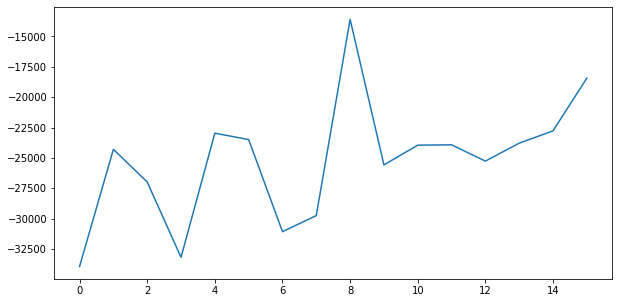

s: [0 0 4], mu: [22.525335 22.236305  1.57531 ], a: [[22. 22.  0.]], exp_td_error: [30.], newMu: [22.595825  22.399384   1.5827047]

s: [ 0 12  0], mu: [7.145052  7.4195905 0.7726521], a: [[12. 12.  0.]], exp_td_error: [10.47072595], newMu: [7.4279375 7.7189727 0.7857332]

s: [ 0 14  0], mu: [5.1757936  5.679462   0.69760936], a: [[9. 0. 0.]], exp_td_error: [0.81387014], newMu: [5.3618884  5.8488545  0.69870687]

s: [9 4 0], mu: [14.532569  14.824482   1.1857059], a: [[13. 19.  0.]], exp_td_error: [30.], newMu: [14.934391  15.330367   1.1945918]

s: [ 3 13  0], mu: [5.91784   6.4327874 0.7191404], a: [[0. 3. 5.]], exp_td_error: [3.75906841], newMu: [6.1193686 6.6535187 0.7237376]

s: [0 6 4], mu: [19.722725  20.030365   1.4068538], a: [[23. 19.  0.]], exp_td_error: [30.], newMu: [20.21093   20.537466   1.3483496]

s: [ 4 15  0], mu: [4.6952662  5.483466   0.69240904], a: [[ 9. 13.  0.]], exp_td_error: [13.59791334], newMu: [5.0149317 5.730914  0.6626833]

s: [ 0 18  0], mu: [4.388721  

s: [ 4 15  0], mu: [7.9139705 8.802014  0.8800312], a: [[8. 6. 1.]], exp_td_error: [6.86536908], newMu: [7.3443556 8.245887  0.8604392]

s: [ 6 11  0], mu: [ 9.973651  10.961402   1.0025587], a: [[3. 9. 0.]], exp_td_error: [13.32499724], newMu: [ 9.18624   10.15671    0.9681394]

s: [ 0 10  0], mu: [16.054636 17.225168  1.327786], a: [[17. 17.  5.]], exp_td_error: [2.34088682], newMu: [15.400395  16.548916   1.3038136]

s: [17  0  4], mu: [ 1.7451487 11.909008   1.5506326], a: [[ 9. 14.  2.]], exp_td_error: [7.36436931], newMu: [ 1.7719029 11.882823   1.5408874]

s: [12  4  2], mu: [2.999765  9.467506  1.6792648], a: [[2. 9. 0.]], exp_td_error: [3.6203656], newMu: [2.7394803 9.464912  1.6493106]

s: [5 3 0], mu: [21.893156  23.344572   1.7788718], a: [[25. 25.  4.]], exp_td_error: [30.], newMu: [22.088476  23.53972    1.9060798]

s: [ 5 18  4], mu: [2.2296357 5.2196116 1.076738 ], a: [[ 5. 10.  5.]], exp_td_error: [9.9367179], newMu: [2.207438  5.2699885 1.098408 ]

s: [ 0 18  4], mu: 

s: [ 0 18  0], mu: [1.0849808e+01 1.1613576e+01 4.3823719e-03], a: [[7. 7. 4.]], exp_td_error: [1.41679461], newMu: [10.946598   11.7410965  -0.01558235]

s: [7 8 4], mu: [18.053234  19.113428  -0.2520986], a: [[18. 19.  5.]], exp_td_error: [30.], newMu: [1.7947035e+01 1.9198278e+01 5.7459325e-03]

s: [ 6 17  4], mu: [ 9.279112  10.764169   0.2845943], a: [[ 8. 12.  0.]], exp_td_error: [13.01147805], newMu: [ 9.237152   10.839007    0.41032335]

s: [ 2 19  0], mu: [ 9.836005   10.917812    0.28787026], a: [[ 9. 11.  3.]], exp_td_error: [9.49949197], newMu: [ 9.780018  10.970175   0.4192441]

s: [ 0 20  2], mu: [11.078635  12.252102   0.4125445], a: [[11.  8.  1.]], exp_td_error: [7.25682831], newMu: [10.929504 12.196362  0.548975]

s: [ 3 18  0], mu: [ 9.3810625  10.696384    0.54891276], a: [[ 9. 12.  3.]], exp_td_error: [10.33154459], newMu: [ 9.286621  10.692726   0.6686806]

s: [ 0 20  2], mu: [10.805111   12.170541    0.68634653], a: [[23. 10.  0.]], exp_td_error: [2.20309379], ne

s: [0 8 4], mu: [21.155607  21.679382   3.1808496], a: [[21. 19.  5.]], exp_td_error: [30.], newMu: [19.087307  19.535961   3.0575755]

s: [ 2 17  4], mu: [8.25081   8.9827    1.5679482], a: [[ 9. 11.  0.]], exp_td_error: [11.58818651], newMu: [7.660495  8.398158  1.5424713]

s: [ 0 18  0], mu: [7.000019  7.634748  1.4191293], a: [[12. 12.  0.]], exp_td_error: [10.37178538], newMu: [6.73255   7.3672533 1.4208403]

s: [ 0 20  0], mu: [6.6311846 7.3024464 1.4090843], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [6.472048  7.140639  1.4167304]

s: [ 0 20  0], mu: [6.472048  7.140639  1.4167304], a: [[6. 6. 4.]], exp_td_error: [3.38258815], newMu: [6.327324  6.9944696 1.4247141]

s: [ 6 10  4], mu: [7.6641665 8.583684  1.7311201], a: [[ 7. 10.  2.]], exp_td_error: [10.6758062], newMu: [7.2982726 8.229013  1.7071313]

s: [ 3 10  2], mu: [7.589654  8.272697  1.6920434], a: [[4. 0. 5.]], exp_td_error: [1.78281914], newMu: [7.29612  7.978229 1.675806]

s: [7 0 4], mu: [11.04378   12

s: [8 2 0], mu: [10.923879  11.948502   3.4837205], a: [[10. 12.  4.]], exp_td_error: [24.65420793], newMu: [11.071807  12.211072   3.6194396]

s: [6 4 4], mu: [10.994352  11.785671   3.4749992], a: [[14. 12.  0.]], exp_td_error: [8.52002265], newMu: [11.23441   12.075018   3.5844498]

s: [8 6 0], mu: [7.781816 9.372827 2.926226], a: [[9. 8. 5.]], exp_td_error: [30.], newMu: [7.945879  9.554741  3.0177562]

s: [9 4 4], mu: [ 8.047996  10.059844   3.2253435], a: [[5. 6. 0.]], exp_td_error: [30.], newMu: [7.901267  9.929236  3.2041593]

s: [8 0 0], mu: [14.097796 15.042297  4.477509], a: [[ 6. 10.  0.]], exp_td_error: [17.32974907], newMu: [13.4632225 14.436485   4.286005 ]

s: [4 0 0], mu: [17.750912  17.802929   5.1786675], a: [[15. 19.  0.]], exp_td_error: [23.86566641], newMu: [17.27205  17.328876  4.855946]

s: [0 9 0], mu: [11.432269  11.709557   3.3191264], a: [[15. 15.  4.]], exp_td_error: [30.], newMu: [11.522257  11.805291   3.2269268]

s: [ 0 14  4], mu: [10.1476345 10.566241 

s: [13  0  4], mu: [ 5.0910583 12.08355    2.039313 ], a: [[ 2. 12.  5.]], exp_td_error: [8.51264188], newMu: [ 5.3153872 11.935723   2.0340097]

s: [3 2 4], mu: [20.575068  18.403345   1.8178885], a: [[19. 22.  0.]], exp_td_error: [30.], newMu: [21.092482  18.962082   1.6197975]

s: [ 0 14  0], mu: [20.071394  17.995163   1.4926851], a: [[24. 16.  0.]], exp_td_error: [4.13677383], newMu: [20.694391  18.587732   1.3096424]

s: [ 8 20  0], mu: [12.033614  11.547167   1.0905492], a: [[11. 10.  4.]], exp_td_error: [1.40464277], newMu: [12.402723  11.849771   0.9787818]

s: [19 10  4], mu: [ 5.2558284 11.689136   1.8085195], a: [[11.  1.  1.]], exp_td_error: [0.83603475], newMu: [ 5.389406 11.680703  1.753933]

s: [29  1  0], mu: [ 5.7294297 16.261192   2.2074552], a: [[ 1. 12.  2.]], exp_td_error: [11.24302553], newMu: [ 5.59658   15.8281975  2.1576993]

s: [18  3  2], mu: [ 4.6962667 11.724027   1.7265042], a: [[12. 14.  5.]], exp_td_error: [5.15501232], newMu: [ 4.7127495 11.554219   1.

s: [ 3 12  0], mu: [7.742777  8.397048  0.8256608], a: [[13. 16.  0.]], exp_td_error: [12.29269662], newMu: [8.080891  8.680223  0.8525704]

s: [ 0 18  0], mu: [7.4279327 7.7597704 0.7191669], a: [[8. 8. 0.]], exp_td_error: [10.36400749], newMu: [7.541878  7.905755  0.7548913]

s: [ 0 16  0], mu: [8.358027  8.58304   0.7766335], a: [[0. 0. 0.]], exp_td_error: [2.01698471], newMu: [8.489219  8.740994  0.8151109]

s: [0 6 0], mu: [17.994787  17.314281   1.1634076], a: [[24. 18.  2.]], exp_td_error: [30.], newMu: [18.57428  17.78694   1.234362]

s: [ 6 14  2], mu: [ 3.1153297 10.428152   1.516992 ], a: [[2. 8. 2.]], exp_td_error: [13.31466621], newMu: [ 3.3108099 10.366722   1.5304396]

s: [ 0 12  2], mu: [12.901006  12.767278   1.0719061], a: [[13. 13.  3.]], exp_td_error: [8.5578777], newMu: [13.317545  13.115121   1.1348534]

s: [ 0 15  2], mu: [10.8586445 10.837948   1.0154048], a: [[15. 11.  1.]], exp_td_error: [6.56535836], newMu: [11.285567  11.201824   1.0694447]

s: [ 4 16  0], m

s: [ 7 20  0], mu: [ 5.813419   13.643338    0.86331666], a: [[1. 7. 5.]], exp_td_error: [10.7040957], newMu: [ 5.8873196 12.931159   0.889813 ]

s: [ 1 17  4], mu: [16.599277  14.322237   1.3693894], a: [[17. 13.  5.]], exp_td_error: [4.02425135], newMu: [16.799782  14.355139   1.3860831]

s: [ 5 20  4], mu: [ 8.245084 11.133154  1.170689], a: [[ 9. 10.  5.]], exp_td_error: [6.2924493], newMu: [ 8.704648  10.552664   1.2007141]

s: [ 4 20  4], mu: [10.144136   9.867736   1.1991626], a: [[ 7. 10.  0.]], exp_td_error: [12.20347476], newMu: [10.18152    9.609234   1.1734047]

s: [ 1 20  0], mu: [11.685956 10.066709  1.074129], a: [[ 9. 10.  0.]], exp_td_error: [10.61284144], newMu: [11.494375   9.882781   1.0682546]

s: [ 0 20  0], mu: [12.855854  10.886158   1.1474351], a: [[12. 10.  0.]], exp_td_error: [8.25227713], newMu: [12.539744  10.609735   1.1294217]

s: [ 2 20  0], mu: [10.189915   8.912904   1.0004786], a: [[14.  5.  4.]], exp_td_error: [1.16801063], newMu: [10.031225   8.7617

s: [13  5  4], mu: [1.8275958 5.7517247 0.9522444], a: [[0. 8. 0.]], exp_td_error: [4.27067665], newMu: [1.8528626  5.837983   0.97127455]

s: [5 3 0], mu: [13.881263  10.3015     2.3882449], a: [[ 7. 12.  5.]], exp_td_error: [30.], newMu: [13.773326  10.35464    2.4962668]

s: [0 5 4], mu: [13.993439  10.346032   2.4903684], a: [[23. 16.  3.]], exp_td_error: [25.38169754], newMu: [14.439554  10.7752905  2.6368659]

s: [ 7 11  2], mu: [2.6523297 4.4763002 1.1441061], a: [[1. 6. 0.]], exp_td_error: [2.68860089], newMu: [2.6703148 4.544017  1.1688056]

s: [2 7 0], mu: [9.262019  7.3522053 1.8707961], a: [[8. 9. 1.]], exp_td_error: [20.66475566], newMu: [9.407836  7.546219  1.9351666]

s: [1 6 0], mu: [12.566471  9.691384  2.418469], a: [[16. 13.  5.]], exp_td_error: [17.79387665], newMu: [12.94583   10.090143   2.5553799]

s: [4 9 4], mu: [3.845166  4.6344767 1.3624356], a: [[13.  1.  0.]], exp_td_error: [30.], newMu: [4.4088717 4.6535707 1.3773586]

s: [16  0  0], mu: [ 3.0417137 10.071

s: [10  4  4], mu: [2.314684   6.0797563  0.88419354], a: [[4. 6. 5.]], exp_td_error: [6.37999354], newMu: [2.2992551 6.1378493 0.8926358]

s: [8 0 4], mu: [7.4007397 7.7347255 1.4003391], a: [[ 8. 16.  2.]], exp_td_error: [30.], newMu: [7.531962  8.010544  1.4588892]

s: [0 6 2], mu: [14.297656  11.644999   1.6287594], a: [[18. 12.  5.]], exp_td_error: [16.30155725], newMu: [14.564241  11.884494   1.7119036]

s: [6 8 4], mu: [4.861246   4.8450704  0.92886865], a: [[10.  2.  1.]], exp_td_error: [30.], newMu: [5.0438437 4.9880567 0.9628482]

s: [14  0  0], mu: [2.5063624  9.925441   0.98471355], a: [[ 3. 10.  0.]], exp_td_error: [3.61233109], newMu: [ 2.5643551 10.136752   1.0210735]

s: [7 0 0], mu: [14.506624  12.429095   1.9540935], a: [[14. 10.  5.]], exp_td_error: [25.55201272], newMu: [14.567682  12.469488   2.0687125]

s: [11  0  4], mu: [3.0217555 9.13405   1.2506443], a: [[ 0. 10.  0.]], exp_td_error: [7.15613894], newMu: [3.02715   9.295498  1.2911959]

s: [1 0 0], mu: [22.983

s: [15  7  0], mu: [ 2.5408201 10.610636   1.1491609], a: [[8. 9. 5.]], exp_td_error: [3.49988111], newMu: [ 2.5913699 10.73392    1.1570588]

s: [14  6  4], mu: [ 2.6416786 10.669785   1.1908369], a: [[0. 4. 0.]], exp_td_error: [4.98676244], newMu: [ 2.6731145 10.700353   1.1903309]

s: [10  0  0], mu: [12.816789  14.0755625  2.260367 ], a: [[16. 14.  0.]], exp_td_error: [0.79636887], newMu: [13.371849 14.166271  2.21215 ]

s: [12  4  0], mu: [ 3.1545641 11.559928   1.3578925], a: [[ 8. 20.  3.]], exp_td_error: [3.95123074], newMu: [ 3.2663658 11.693532   1.3830168]

s: [ 0 14  2], mu: [15.615944  13.210402   1.5848829], a: [[13.  5.  0.]], exp_td_error: [1.07030637], newMu: [16.044258  13.49027    1.5904957]

s: [8 9 0], mu: [6.3213763 8.249979  1.4720442], a: [[ 8. 11.  0.]], exp_td_error: [20.10131213], newMu: [7.025158  8.383201  1.4632696]

s: [ 5 10  0], mu: [12.089794  10.461667   1.3115689], a: [[9. 7. 5.]], exp_td_error: [3.96614606], newMu: [12.455466  10.713267   1.3194195]

s: [ 0 19  4], mu: [13.43593  10.879329  1.671883], a: [[12. 11.  5.]], exp_td_error: [6.12299444], newMu: [13.607858  11.012207   1.6942017]

s: [ 1 20  4], mu: [11.275285   9.4287615  1.4946496], a: [[ 9. 10.  0.]], exp_td_error: [10.45421748], newMu: [11.284075  9.455671  1.497138]

s: [ 0 20  0], mu: [10.492173   8.799149   1.4029112], a: [[10.  5.  0.]], exp_td_error: [5.84270894], newMu: [10.418511  8.752727  1.393841]

s: [ 5 15  0], mu: [ 5.163065  10.26396    1.5481727], a: [[10. 15.  5.]], exp_td_error: [1.63398905], newMu: [ 5.167206  10.354515   1.5470542]

s: [15  5  4], mu: [ 5.3045297 21.214983   1.8550788], a: [[ 9. 24.  1.]], exp_td_error: [6.16203472], newMu: [ 5.436663  21.478336   1.8503563]

s: [ 0 19  0], mu: [10.990435   9.17319    1.4454526], a: [[9. 9. 0.]], exp_td_error: [10.33234178], newMu: [10.805248   9.060941   1.4232271]

s: [ 0 18  0], mu: [11.592261   9.6334305  1.4988846], a: [[10. 10.  0.]], exp_td_error: [10.36822464], newMu: [11.330173   9.466414  

s: [13  9  4], mu: [ 5.8637285 15.281035   0.7994586], a: [[ 1. 14.  3.]], exp_td_error: [3.87015058], newMu: [ 5.896843   15.38989     0.79862106]

s: [ 0 13  2], mu: [13.163156   11.932842    0.72765946], a: [[9. 9. 1.]], exp_td_error: [10.41542885], newMu: [13.168855  11.972727   0.7196143]

s: [ 0 12  0], mu: [14.329442   12.905224    0.72813916], a: [[13.  1.  0.]], exp_td_error: [1.10734858], newMu: [14.311696  12.917186   0.7192998]

s: [12  3  0], mu: [ 8.092346  17.73468    1.0668644], a: [[10. 14.  5.]], exp_td_error: [0.59339144], newMu: [ 8.113868  17.778893   1.0673852]

s: [8 7 4], mu: [10.228661  15.727917   1.1371497], a: [[13.  7.  0.]], exp_td_error: [30.], newMu: [10.379894  14.749375   1.0910392]

s: [14  4  0], mu: [ 6.680681   16.686895    0.84380513], a: [[11. 15.  5.]], exp_td_error: [0.94702783], newMu: [ 6.669644   16.059269    0.82025254]

s: [10  9  4], mu: [ 6.095127  13.20227    0.8041978], a: [[12.  3.  0.]], exp_td_error: [1.97326846], newMu: [ 6.10394  

s: [2 3 0], mu: [15.528081  13.502832   4.2220483], a: [[13. 15.  5.]], exp_td_error: [23.82241185], newMu: [15.259201 13.454546  4.255375]

s: [0 8 4], mu: [12.024666  10.74535    3.4311469], a: [[13. 13.  5.]], exp_td_error: [30.], newMu: [12.075381 10.935578  3.541327]

s: [ 0 11  4], mu: [8.011039  7.4236546 2.4536147], a: [[14.  8.  3.]], exp_td_error: [1.34933965], newMu: [8.092762  7.5813622 2.533785 ]

s: [6 9 2], mu: [3.918787  4.409542  1.5302655], a: [[12.  4.  0.]], exp_td_error: [30.], newMu: [3.9593012 4.454057  1.5520539]

s: [14  3  0], mu: [2.014232  7.8168526 1.7603986], a: [[6. 7. 3.]], exp_td_error: [4.66846228], newMu: [2.0222273 7.8337083 1.7787101]

s: [13  0  2], mu: [2.0476682 8.055879  1.8195643], a: [[ 2. 10.  5.]], exp_td_error: [5.50912515], newMu: [2.061072  8.094877  1.8444093]

s: [5 0 4], mu: [8.361234  9.003924  3.0601103], a: [[ 5. 10.  5.]], exp_td_error: [30.], newMu: [8.190478  8.9746    3.0902646]

s: [0 0 4], mu: [15.930707 14.921959  5.006635], 

s: [6 8 2], mu: [8.380625  8.193405  2.0965633], a: [[11.  2.  5.]], exp_td_error: [30.], newMu: [8.277481  8.040457  2.0837886]

s: [15  0  4], mu: [ 9.332367  11.103294   2.9986887], a: [[ 7. 14.  3.]], exp_td_error: [4.24853034], newMu: [ 9.235939  11.029629   3.0086799]

s: [8 4 2], mu: [8.98171   9.031353  2.3892913], a: [[3. 6. 2.]], exp_td_error: [30.], newMu: [8.645721 8.695334 2.33396 ]

s: [5 0 2], mu: [21.9999   19.826704  4.866682], a: [[24. 18.  0.]], exp_td_error: [20.68108889], newMu: [21.64567   19.33805    4.6466055]

s: [11  8  0], mu: [5.5293274 6.877723  1.958583 ], a: [[15. 10.  0.]], exp_td_error: [1.66352786], newMu: [5.4427857 6.7820425 1.9121232]

s: [16  8  0], mu: [4.368157 8.894793 2.095901], a: [[ 0. 10.  0.]], exp_td_error: [2.03708085], newMu: [4.238945  8.87047   2.0563393]

s: [6 8 0], mu: [6.4979296 6.47603   1.67534  ], a: [[6. 2. 0.]], exp_td_error: [30.], newMu: [6.3630958 6.31502   1.6117321]

s: [10  0  0], mu: [13.0058565 12.875397   3.149044 ], 

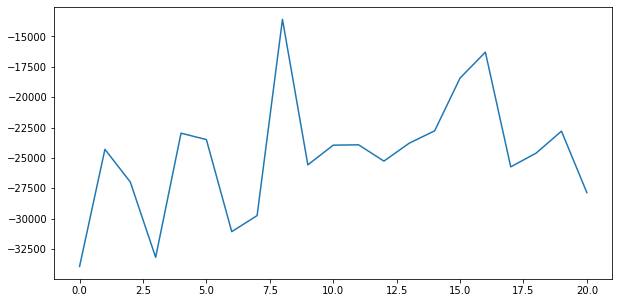

s: [0 0 4], mu: [26.290741 22.120512  4.719207], a: [[20. 20.  0.]], exp_td_error: [30.], newMu: [24.64419   20.864986   4.1991773]

s: [ 0 10  0], mu: [9.7067795 8.563171  1.894798 ], a: [[16. 16.  4.]], exp_td_error: [2.63936669], newMu: [9.280344  8.247984  1.7463173]

s: [16  0  4], mu: [ 5.552925  10.738661   2.3332937], a: [[ 3. 19.  0.]], exp_td_error: [1.32226225], newMu: [ 5.209195  10.873056   2.2433197]

s: [0 9 0], mu: [10.739383   9.4938345  1.8634953], a: [[9. 5. 5.]], exp_td_error: [18.35154352], newMu: [10.121396   9.001082   1.7271914]

s: [4 4 4], mu: [12.404642  11.067079   2.0924127], a: [[13. 15.  3.]], exp_td_error: [18.86615738], newMu: [11.928673  10.752573   1.9954481]

s: [2 9 2], mu: [7.0851746 6.581096  1.3277302], a: [[3. 1. 5.]], exp_td_error: [30.], newMu: [6.7255445 6.3199167 1.2894301]

s: [4 0 4], mu: [14.533129  13.137705   2.3652697], a: [[14. 18.  0.]], exp_td_error: [21.06180285], newMu: [14.053833 12.908862  2.297719]

s: [0 8 0], mu: [10.449967  

s: [5 1 0], mu: [12.074124  11.819265   4.0956106], a: [[19. 16.  3.]], exp_td_error: [11.77733923], newMu: [12.397889 12.138466  4.210024]

s: [8 7 2], mu: [3.8981512 5.517793  2.1251514], a: [[0. 3. 1.]], exp_td_error: [30.], newMu: [3.9033008 5.5743723 2.150312 ]

s: [5 0 0], mu: [14.671278  14.017903   4.8244348], a: [[13. 12.  5.]], exp_td_error: [19.80949605], newMu: [14.826464 14.14549   4.886069]

s: [6 2 4], mu: [ 8.996172  10.147652   3.6915803], a: [[13. 19.  5.]], exp_td_error: [30.], newMu: [ 9.352526 10.71041   3.908305]

s: [ 0 11  4], mu: [5.651963  5.834869  2.1424482], a: [[5. 5. 5.]], exp_td_error: [3.15539548], newMu: [5.7465    5.9729805 2.1943707]

s: [0 6 4], mu: [12.1831665 11.603614   4.0775127], a: [[15. 15.  1.]], exp_td_error: [30.], newMu: [12.750593  12.245008   4.2172313]

s: [ 0 11  0], mu: [4.8656244 5.4698906 2.0136092], a: [[11.  7.  5.]], exp_td_error: [1.83234258], newMu: [4.9673595 5.607598  2.0368173]

s: [11  1  4], mu: [ 6.498145  12.530596   4.

s: [ 4 10  4], mu: [8.862351  8.274429  1.5608997], a: [[10. 14.  0.]], exp_td_error: [16.55843711], newMu: [9.272371 8.545393 1.562834]

s: [ 0 14  0], mu: [9.078977  8.447509  1.5694132], a: [[11.  3.  0.]], exp_td_error: [0.79885884], newMu: [9.388892  8.633357  1.5619893]

s: [8 7 0], mu: [5.555562 7.595749 2.04483 ], a: [[ 7. 10.  5.]], exp_td_error: [30.], newMu: [5.708469  7.722069  2.0709624]

s: [5 7 4], mu: [13.600639  12.022513   2.0022488], a: [[17.  4.  2.]], exp_td_error: [30.], newMu: [13.556939  11.688423   1.9240249]

s: [18  1  2], mu: [ 6.6662707 19.385637   4.386042 ], a: [[12. 16.  5.]], exp_td_error: [6.43092656], newMu: [ 6.8325195 19.083208   4.3572116]

s: [14  7  4], mu: [ 5.1449966 10.339603   2.6762435], a: [[3. 7. 5.]], exp_td_error: [7.34171148], newMu: [ 5.3094835 10.027134   2.6355402]

s: [10  4  4], mu: [ 7.799364  11.154668   3.0234761], a: [[ 9. 10.  1.]], exp_td_error: [4.38911269], newMu: [ 7.935965  10.851455   2.9525263]

s: [9 4 0], mu: [ 5.8131

s: [10  0  0], mu: [ 4.162092 12.321968  3.420599], a: [[16. 11.  5.]], exp_td_error: [0.83999123], newMu: [ 4.205914  12.32847    3.3995872]

s: [15  1  4], mu: [ 4.0477676 13.573964   3.5791411], a: [[ 5. 14.  2.]], exp_td_error: [5.51186307], newMu: [ 4.088154  13.568388   3.5487826]

s: [6 5 2], mu: [5.1462545 7.1261578 2.1429548], a: [[4. 9. 3.]], exp_td_error: [29.51014656], newMu: [5.1681585 7.2331395 2.1623716]

s: [1 4 2], mu: [16.29193   13.873969   2.6559596], a: [[23.  9.  5.]], exp_td_error: [9.712086], newMu: [16.62737   14.099514   2.6726873]

s: [15  3  4], mu: [ 4.125611 12.828662  3.391575], a: [[ 5. 12.  3.]], exp_td_error: [4.16196557], newMu: [ 4.172299  12.897969   3.3986795]

s: [8 5 2], mu: [4.542318  8.684243  2.6007733], a: [[0. 6. 2.]], exp_td_error: [30.], newMu: [4.4768405 8.6401825 2.5825355]

s: [2 1 2], mu: [19.0296    16.207792   3.0602596], a: [[19.  9.  0.]], exp_td_error: [9.84322012], newMu: [19.040966  16.051287   2.9734414]

s: [12  0  0], mu: [ 4

s: [6 6 0], mu: [4.9109817 9.931141  1.2596853], a: [[1. 7. 5.]], exp_td_error: [30.], newMu: [4.8828607 9.958177  1.2980682]

s: [0 3 4], mu: [41.896736 33.63045   0.387026], a: [[30. 27.  5.]], exp_td_error: [30.], newMu: [36.397648  29.536871   1.0424443]

s: [ 3 20  4], mu: [5.12569   9.569089  1.3964858], a: [[12.  3.  0.]], exp_td_error: [3.08619434], newMu: [4.7025175 9.419416  1.4843446]

s: [12 13  0], mu: [ 4.2294235 11.882688   1.5500363], a: [[0. 8. 5.]], exp_td_error: [13.00581878], newMu: [ 3.9757113 11.483579   1.6416861]

s: [ 4 11  4], mu: [5.613935 8.131349 1.490646], a: [[10. 14.  1.]], exp_td_error: [13.13423011], newMu: [5.2595677 8.047763  1.5732449]

s: [ 0 15  0], mu: [5.90001  7.425018 1.375415], a: [[8. 6. 1.]], exp_td_error: [8.41126802], newMu: [5.6253986 7.273394  1.4521555]

s: [ 2 11  0], mu: [5.2933984 7.3161206 1.5167508], a: [[8. 8. 0.]], exp_td_error: [1.81194859], newMu: [5.102978  7.1796393 1.574443 ]

s: [2 9 0], mu: [5.3765593 7.1903615 1.5415226]

s: [3 6 0], mu: [9.739588  9.199897  1.2489737], a: [[4. 4. 0.]], exp_td_error: [14.61846198], newMu: [9.541043  8.988868  1.1973529]

s: [3 0 0], mu: [27.011995  23.830503   2.5655546], a: [[27. 30.  3.]], exp_td_error: [30.], newMu: [27.298302  24.79412    2.6521351]

s: [ 0 20  2], mu: [9.793492  9.449793  1.2033259], a: [[12. 10.  0.]], exp_td_error: [8.15941891], newMu: [9.827339  9.65176   1.2114393]

s: [ 2 20  0], mu: [9.165049  9.309042  1.2001388], a: [[16.  6.  0.]], exp_td_error: [2.80601522], newMu: [9.208095  9.4652405 1.2021914]

s: [12 16  0], mu: [5.432995  9.99922   1.3964981], a: [[ 4. 10.  0.]], exp_td_error: [14.97331204], newMu: [ 5.3859496 10.072954   1.3825233]

s: [ 6 16  0], mu: [7.520319  9.127654  1.2862265], a: [[12.  3.  0.]], exp_td_error: [1.61304204], newMu: [7.504207  9.207477  1.2800994]

s: [15  9  0], mu: [ 5.0941052 11.119413   1.3789032], a: [[ 0. 14.  5.]], exp_td_error: [6.23945412], newMu: [ 5.070849 11.18621   1.372417]

s: [ 1 13  4], mu: [10

s: [ 0 15  0], mu: [7.7469606 7.6269813 1.475458 ], a: [[13. 13.  5.]], exp_td_error: [1.48176157], newMu: [7.7033567 7.566906  1.4111526]

s: [13  5  4], mu: [ 4.2531557 12.364304   1.6589153], a: [[ 5. 10.  3.]], exp_td_error: [3.54264522], newMu: [ 4.1819687 12.305634   1.5810905]

s: [8 5 2], mu: [ 4.157394  10.156807   1.5466198], a: [[3. 5. 1.]], exp_td_error: [30.], newMu: [4.0543513 9.8860655 1.4651229]

s: [6 0 0], mu: [18.225576  18.759525   2.8920112], a: [[11. 13.  5.]], exp_td_error: [26.96279583], newMu: [16.667475  17.252478   2.6595018]

s: [4 3 4], mu: [16.549511 16.873888  2.609022], a: [[25. 18.  0.]], exp_td_error: [28.90827838], newMu: [16.627478  16.525955   2.4572024]

s: [11 11  0], mu: [3.5673509 9.678725  1.2719514], a: [[0. 3. 5.]], exp_td_error: [3.37856166], newMu: [3.5173485 9.420269  1.2131227]

s: [8 4 4], mu: [ 5.189478  10.643298   1.5436535], a: [[6. 9. 5.]], exp_td_error: [25.98406669], newMu: [ 5.189239  10.2821245  1.5098051]

s: [5 3 4], mu: [13.6

s: [15  9  4], mu: [ 4.184402 16.614061  2.093502], a: [[ 0. 12.  3.]], exp_td_error: [24.40674221], newMu: [ 4.039343  16.149715   2.0784378]

s: [ 3 11  2], mu: [11.125268    9.709736    0.81070733], a: [[15.  4.  2.]], exp_td_error: [1.29464099], newMu: [11.309165   9.834977   0.8139514]

s: [14  5  2], mu: [ 3.8398201 15.796571   2.0490036], a: [[ 9. 23.  2.]], exp_td_error: [3.9693495], newMu: [ 3.7800043 15.581066   2.0498657]

s: [ 0 18  2], mu: [13.464973   11.20976     0.75181735], a: [[16.  4.  2.]], exp_td_error: [2.05566152], newMu: [13.686791  11.379636   0.7628093]

s: [12 12  2], mu: [ 3.7221687 13.321457   1.8812408], a: [[1. 3. 0.]], exp_td_error: [3.00264583], newMu: [ 3.6804018 13.08753    1.8722042]

s: [10  5  0], mu: [ 4.1427765 13.149461   1.8991336], a: [[ 5. 15.  0.]], exp_td_error: [13.68156801], newMu: [ 4.1790175 13.0597925  1.8808031]

s: [ 0 10  0], mu: [14.13329  11.650994  0.785237], a: [[22. 11.  0.]], exp_td_error: [7.23368373], newMu: [14.463169 11.87

s: [ 5 14  4], mu: [10.847822  10.000371   0.6678893], a: [[7. 9. 0.]], exp_td_error: [10.41580939], newMu: [10.683506   9.853382   0.6780857]

s: [ 3 13  0], mu: [9.16872   8.635211  0.6712122], a: [[ 9. 12.  0.]], exp_td_error: [12.39443025], newMu: [9.156249   8.626443   0.68026495]

s: [ 0 15  0], mu: [11.560017   10.416083    0.65811515], a: [[13.  9.  2.]], exp_td_error: [5.44825458], newMu: [11.497485 10.359924  0.668761]

s: [ 4 14  2], mu: [9.22857    8.676384   0.69046474], a: [[8. 7. 4.]], exp_td_error: [5.22578905], newMu: [9.184265   8.640014   0.70299685]

s: [ 5 11  4], mu: [12.220649   11.108514    0.74094933], a: [[9. 6. 0.]], exp_td_error: [1.08811575], newMu: [12.053082  10.969399   0.7532298]

s: [8 7 0], mu: [5.6346064 7.7808676 0.9290875], a: [[11. 13.  0.]], exp_td_error: [30.], newMu: [5.9256415 7.8517656 0.9281452]

s: [ 6 10  0], mu: [7.0776153  7.568222   0.80068755], a: [[0. 1. 0.]], exp_td_error: [4.09373345], newMu: [7.2102675  7.639887   0.80183643]

s: [

s: [13  1  0], mu: [ 8.596182  14.72193    3.0570397], a: [[11. 13.  5.]], exp_td_error: [6.64935968], newMu: [ 8.704062  14.660917   3.0668278]

s: [11  4  4], mu: [13.34888   17.594193   3.6141143], a: [[10. 15.  5.]], exp_td_error: [0.74563444], newMu: [13.447893  17.65382    3.6427765]

s: [6 9 4], mu: [13.465218  16.67022    3.4410136], a: [[ 9. 14.  0.]], exp_td_error: [30.], newMu: [13.057119  16.110516   3.2856321]

s: [ 1 13  0], mu: [ 9.672467 11.058489  2.318452], a: [[16. 17.  2.]], exp_td_error: [8.95058844], newMu: [ 9.624105  10.9741955  2.268353 ]

s: [ 0 20  2], mu: [10.305254  11.581894   2.3517861], a: [[16. 10.  0.]], exp_td_error: [5.10803645], newMu: [10.287067 11.511723  2.300776]

s: [ 6 20  0], mu: [6.913752  8.531535  1.8244307], a: [[7. 0. 0.]], exp_td_error: [2.95757701], newMu: [6.8668575 8.447498  1.7858579]

s: [13 10  0], mu: [3.8398452 8.586292  1.899535 ], a: [[0. 7. 0.]], exp_td_error: [7.81870088], newMu: [3.7442212 8.460479  1.8537914]

s: [6 7 0], 

s: [ 0 12  2], mu: [12.147657  12.733335   1.4781791], a: [[17. 11.  5.]], exp_td_error: [3.52151526], newMu: [11.650529  12.327013   1.4094048]

s: [ 6 13  4], mu: [ 6.241072  10.214971   1.4893618], a: [[11. 13.  0.]], exp_td_error: [10.24317241], newMu: [ 5.719785 10.121042  1.464076]

s: [ 4 16  0], mu: [3.661017  8.848726  1.3554761], a: [[4. 5. 0.]], exp_td_error: [9.83631566], newMu: [3.5403686 8.8636265 1.3233541]

s: [ 3 11  0], mu: [6.750209  9.209749  1.2400404], a: [[ 7. 10.  0.]], exp_td_error: [12.29383838], newMu: [6.5860124 9.146013  1.2091115]

s: [ 0 11  0], mu: [10.333043  11.195584   1.2249508], a: [[13. 13.  2.]], exp_td_error: [8.62227643], newMu: [10.241506  11.13696    1.1929668]

s: [ 0 14  2], mu: [10.045573  10.89265    1.1688001], a: [[13.  1.  0.]], exp_td_error: [1.11697754], newMu: [ 9.942788  10.809467   1.1382377]

s: [12  5  0], mu: [ 2.1536396 10.858356   1.2858227], a: [[ 2. 11.  0.]], exp_td_error: [4.76642216], newMu: [ 2.093384  10.895268   1.2543

s: [ 6 19  0], mu: [ 7.853969  10.970434   1.2853736], a: [[13. 11.  0.]], exp_td_error: [6.38555828], newMu: [ 8.263439  10.94683    1.2452068]

s: [ 8 20  0], mu: [ 6.605754  12.381112   1.3947082], a: [[ 2. 10.  5.]], exp_td_error: [4.09759421], newMu: [ 6.816713 12.342486  1.36785 ]

s: [10 10  4], mu: [ 9.170858  14.210658   1.5094335], a: [[ 4. 14.  0.]], exp_td_error: [24.97802652], newMu: [ 8.784129  14.412461   1.4921365]

s: [ 0 14  0], mu: [14.426644  12.826182   0.8140001], a: [[12. 12.  0.]], exp_td_error: [10.47736582], newMu: [14.2543545  12.687272    0.78055954]

s: [ 0 16  0], mu: [13.733835  12.250106   0.7676506], a: [[17. 10.  0.]], exp_td_error: [4.66009101], newMu: [13.601142   12.122679    0.73485184]

s: [ 7 16  0], mu: [ 7.0086455 12.2832775  1.2615021], a: [[ 7. 14.  0.]], exp_td_error: [17.77537053], newMu: [ 6.885806  12.5952425  1.2384926]

(array([37.424767 , 32.22607  ,  1.1201411], dtype=float32), array([30., 30.,  0.], dtype=float32))
s: [0 0 4], mu: [2

s: [ 0 17  0], mu: [10.252598 10.196515  0.675022], a: [[27. 10.  0.]], exp_td_error: [1.40219344], newMu: [10.26428   10.185218   0.6714623]

s: [17 17  0], mu: [ 7.138112  16.273722   1.5687916], a: [[ 0. 13.  0.]], exp_td_error: [30.], newMu: [ 6.760321 15.507268  1.481594]

s: [ 4 20  0], mu: [7.3302855 8.017275  0.7053101], a: [[14.  4.  0.]], exp_td_error: [2.63164491], newMu: [7.315815  7.9502316 0.6855696]

s: [14 14  0], mu: [ 6.3434753 13.825401   1.3441663], a: [[ 0. 12.  1.]], exp_td_error: [28.8169388], newMu: [ 5.9067984 13.125493   1.2739388]

s: [ 2 16  0], mu: [8.776144  8.980871  0.6393503], a: [[13.  4.  0.]], exp_td_error: [2.66014969], newMu: [8.678947  8.865919  0.6210177]

s: [11 10  0], mu: [ 5.890912  12.081931   1.1937017], a: [[ 3. 14.  2.]], exp_td_error: [30.], newMu: [ 5.5718    11.700323   1.1618241]

s: [ 0 14  2], mu: [12.857214   12.245573    0.56870234], a: [[16. 16.  5.]], exp_td_error: [6.98436429], newMu: [12.866125   12.263988    0.57174015]

s: [

s: [ 0 16  0], mu: [7.3219433 7.0909724 0.8270891], a: [[5. 0. 0.]], exp_td_error: [1.17719938], newMu: [7.23574   6.992697  0.7849193]

s: [5 6 0], mu: [ 7.9555674 10.111801   1.1245148], a: [[11.  6.  5.]], exp_td_error: [20.45862724], newMu: [8.050706  9.819689  1.0646803]

s: [10  2  4], mu: [13.094393 14.101228  1.243196], a: [[14. 10.  1.]], exp_td_error: [5.67880507], newMu: [12.659589  13.524217   1.1699278]

s: [14  2  0], mu: [ 2.5681357 10.786454   1.2114958], a: [[5. 8. 0.]], exp_td_error: [4.67700919], newMu: [ 2.538624  10.670659   1.1781095]

s: [11  0  0], mu: [ 4.2687087 12.2067375  1.3811368], a: [[ 5. 16.  0.]], exp_td_error: [0.91744006], newMu: [ 4.053845  11.910711   1.3334502]

s: [0 6 0], mu: [20.450998 16.101679  0.814664], a: [[19. 15.  2.]], exp_td_error: [30.], newMu: [20.117502   15.757791    0.79859054]

s: [ 4 11  2], mu: [7.5233765 7.651456  0.8108171], a: [[9. 4. 1.]], exp_td_error: [0.98567308], newMu: [7.451328  7.491094  0.7944313]

s: [9 5 0], mu: [

s: [14  7  0], mu: [ 3.6857624 13.28466    1.7995936], a: [[ 3. 12.  5.]], exp_td_error: [4.5151509], newMu: [ 3.6855655 13.114838   1.79684  ]

s: [5 9 4], mu: [18.427515  19.574083   2.2384598], a: [[16. 21.  5.]], exp_td_error: [30.], newMu: [18.692022 19.989672  2.360817]

s: [ 0 20  4], mu: [19.445412  20.10557    2.3021398], a: [[11. 10.  4.]], exp_td_error: [6.11321698], newMu: [19.121271  19.864618   2.3643072]

s: [ 1 20  4], mu: [17.950354  18.780205   2.2628486], a: [[19. 10.  0.]], exp_td_error: [3.24020332], newMu: [17.545176 18.420229  2.292253]

s: [10 20  0], mu: [ 6.370856  11.456968   1.7847978], a: [[13. 10.  1.]], exp_td_error: [5.24893854], newMu: [ 6.5133796 11.219468   1.7742598]

s: [13 20  0], mu: [ 4.119241  11.110916   1.7547505], a: [[7. 4. 0.]], exp_td_error: [4.95927193], newMu: [ 4.227624  10.798759   1.7434547]

s: [16 14  0], mu: [ 3.3114789 12.158627   1.8571057], a: [[6. 8. 2.]], exp_td_error: [6.96273542], newMu: [ 3.331604  11.925232   1.8594291]

s

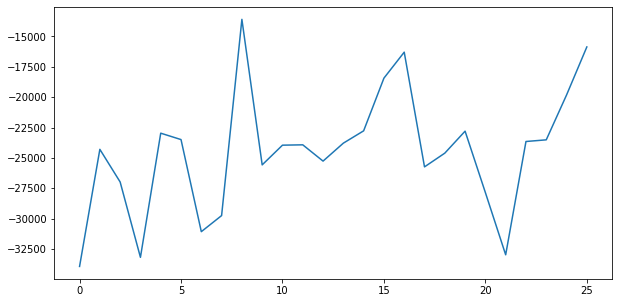

s: [0 0 4], mu: [29.056208 31.269789  4.16498 ], a: [[26. 24.  2.]], exp_td_error: [30.], newMu: [27.567484  29.143099   3.8077476]

s: [ 2 14  2], mu: [15.406911 16.05767   2.241555], a: [[6. 8. 0.]], exp_td_error: [11.68608154], newMu: [14.151308  14.568318   2.0104337]

s: [ 0 12  0], mu: [18.586756  18.678358   2.4634576], a: [[18. 18.  5.]], exp_td_error: [0.8206875], newMu: [17.338806  17.246628   2.2437668]

s: [18  2  4], mu: [ 3.161245  11.937857   1.7902995], a: [[ 0. 10.  0.]], exp_td_error: [4.81474508], newMu: [ 3.088738  11.619758   1.7309332]

s: [8 2 0], mu: [11.056374  13.043841   1.8884999], a: [[10.  8.  0.]], exp_td_error: [30.], newMu: [10.1837435 12.095067   1.7354426]

s: [10  0  0], mu: [ 6.938978  12.4654455  1.882411 ], a: [[ 2. 10.  4.]], exp_td_error: [13.19408172], newMu: [ 5.432787  11.510008   1.7844009]

s: [2 0 4], mu: [19.708187  19.570244   2.3062055], a: [[22. 21.  0.]], exp_td_error: [30.], newMu: [19.033142 18.619904  2.073884]

s: [ 3 11  0], mu: 

s: [23 13  0], mu: [ 5.6815233 17.334131   2.7189336], a: [[ 1. 17.  1.]], exp_td_error: [30.], newMu: [ 5.5271826 17.148983   2.6275282]

s: [ 7 20  0], mu: [14.200926  11.823062   1.6981133], a: [[ 8. 10.  5.]], exp_td_error: [2.02973719], newMu: [14.248738  11.845803   1.6883466]

s: [15 10  4], mu: [ 5.108008  14.029098   2.2148438], a: [[8. 0. 0.]], exp_td_error: [1.19121415], newMu: [ 5.057212 13.827068  2.154984]

s: [23  0  0], mu: [ 5.9188004 22.00197    2.9880607], a: [[ 5. 28.  0.]], exp_td_error: [12.01789125], newMu: [ 5.8934646 22.786905   2.9343853]

s: [ 0 18  0], mu: [24.634298  19.794994   2.4072242], a: [[16. 12.  0.]], exp_td_error: [6.57073152], newMu: [23.061144  18.561617   2.2354748]

s: [ 4 20  0], mu: [15.542465  12.802784   1.6985221], a: [[24. 10.  0.]], exp_td_error: [1.62701883], newMu: [14.993387  12.365995   1.6262519]

s: [18 20  0], mu: [7.737949  9.214327  1.5218226], a: [[ 6. 10.  5.]], exp_td_error: [6.83615557], newMu: [7.3700023 9.422223  1.547185

s: [10  2  4], mu: [ 4.881448  13.799287   1.6534265], a: [[10. 20.  0.]], exp_td_error: [9.00240078], newMu: [ 4.959221  14.054729   1.6612343]

s: [ 0 12  0], mu: [8.88372   7.999653  1.6151978], a: [[4. 4. 1.]], exp_td_error: [2.0230025], newMu: [8.866984 8.019176 1.625395]

s: [0 6 0], mu: [18.17577   15.505995   2.7894857], a: [[23. 23.  4.]], exp_td_error: [30.], newMu: [18.982428 16.36436   2.972557]

s: [ 0 19  4], mu: [8.774851  8.030177  1.6445343], a: [[9. 9. 0.]], exp_td_error: [10.1212232], newMu: [8.975208  8.269326  1.6915812]

s: [ 0 18  0], mu: [8.452598 7.863867 1.631211], a: [[3. 1. 0.]], exp_td_error: [1.6208459], newMu: [8.572316  8.026538  1.6652547]

s: [2 9 0], mu: [9.505438  8.791917  1.7882057], a: [[17. 16.  1.]], exp_td_error: [30.], newMu: [10.122434   9.387295   1.8864423]

s: [ 3 15  0], mu: [8.219382 7.915785 1.641477], a: [[10. 13.  4.]], exp_td_error: [1.77295298], newMu: [8.552629  8.224388  1.6926512]

s: [13  5  4], mu: [ 6.3310375 18.478205   1.963

s: [ 0 20  0], mu: [11.425762  11.157836   1.8211952], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [11.353815  11.068702   1.8196273]

s: [ 0 20  0], mu: [11.353815  11.068702   1.8196273], a: [[11. 10.  0.]], exp_td_error: [9.26676043], newMu: [11.261911  10.961951   1.8097322]

s: [ 1 20  0], mu: [10.822402  10.588776   1.7631599], a: [[12. 10.  0.]], exp_td_error: [7.56569098], newMu: [10.782523  10.531317   1.7553608]

s: [ 3 20  0], mu: [9.862361  9.77253   1.6570516], a: [[11. 10.  2.]], exp_td_error: [6.48455239], newMu: [9.841554  9.741734  1.6528744]

s: [ 4 20  2], mu: [9.380031  9.454445  1.6131867], a: [[6. 8. 4.]], exp_td_error: [7.28198067], newMu: [9.267166  9.374307  1.6051284]

s: [ 2 18  4], mu: [11.206906  10.864851   1.8025212], a: [[5. 4. 4.]], exp_td_error: [5.58992595], newMu: [11.030773  10.696308   1.7890981]

s: [ 3 12  4], mu: [13.149647 12.524797  2.04107 ], a: [[12. 12.  4.]], exp_td_error: [5.87862276], newMu: [12.958593  12.330728   2.0290046]

s: [1 8 0], mu: [14.069989  13.6455965  1.6298821], a: [[15. 11.  0.]], exp_td_error: [21.10506506], newMu: [13.829021  13.428534   1.5963778]

s: [5 9 0], mu: [6.7343984 7.051108  1.0468943], a: [[10.  4.  5.]], exp_td_error: [30.], newMu: [6.7003617 7.004112  1.0519671]

s: [11  3  4], mu: [3.4584432  7.6668143  0.77171916], a: [[9. 7. 5.]], exp_td_error: [5.06905035], newMu: [3.4430838 7.6409626 0.7804684]

s: [13  0  4], mu: [3.553718  8.836411  0.6838721], a: [[ 1. 11.  1.]], exp_td_error: [5.74453731], newMu: [3.5358012  8.822343   0.69332606]

s: [3 1 0], mu: [16.343964  15.650497   1.8544776], a: [[18. 21.  5.]], exp_td_error: [30.], newMu: [16.48168   15.854035   1.9640344]

s: [ 0 12  4], mu: [13.873172  13.434665   1.7240877], a: [[17. 13.  0.]], exp_td_error: [6.57447899], newMu: [13.99958   13.600793   1.8030899]

s: [ 4 15  0], mu: [6.10444  6.539274 1.093552], a: [[ 6. 10.  0.]], exp_td_error: [13.59215621], newMu: [6.143607  6.595115  1.1225815]

s: [ 0 15  0], mu: [8.5

s: [ 6 14  0], mu: [8.773807  9.19074   1.3114522], a: [[ 6. 12.  3.]], exp_td_error: [12.99910388], newMu: [8.805089 9.293492 1.313995]

s: [ 0 16  2], mu: [13.586503  12.961191   1.6105949], a: [[19. 14.  2.]], exp_td_error: [4.76320732], newMu: [13.86471   13.274944   1.6296118]

s: [ 5 20  2], mu: [8.950168  9.305981  1.3050082], a: [[ 5. 10.  5.]], exp_td_error: [9.96963937], newMu: [8.995405  9.39874   1.3163252]

s: [ 0 20  4], mu: [12.050135  11.70725    1.4906833], a: [[10. 10.  0.]], exp_td_error: [10.10853155], newMu: [12.055863  11.773244   1.4952388]

s: [ 0 20  0], mu: [10.674171  10.545814   1.3852806], a: [[11. 10.  3.]], exp_td_error: [7.60040689], newMu: [10.685653  10.602621   1.3927476]

s: [ 1 20  2], mu: [10.448618 10.479227  1.386497], a: [[ 9. 10.  4.]], exp_td_error: [7.07822782], newMu: [10.423377  10.501858   1.3957108]

s: [ 0 20  4], mu: [12.040969 11.86339   1.513626], a: [[20. 10.  0.]], exp_td_error: [3.13306066], newMu: [12.084665 11.934591  1.524845]



s: [ 5 17  0], mu: [6.327972  8.161744  1.1389956], a: [[ 5. 10.  2.]], exp_td_error: [12.18654727], newMu: [6.382536  8.224288  1.1659172]

s: [ 0 17  2], mu: [ 9.480828  10.118776   1.3363742], a: [[13. 13.  5.]], exp_td_error: [6.91764856], newMu: [ 9.774071  10.348927   1.3871914]

s: [ 0 20  4], mu: [8.698966 9.451278 1.312255], a: [[10. 10.  0.]], exp_td_error: [10.10853155], newMu: [8.910706  9.607161  1.3488598]

s: [ 0 20  0], mu: [8.462393 9.223238 1.318022], a: [[14.  0.  5.]], exp_td_error: [1.32836093], newMu: [8.6702    9.359458  1.3506167]

s: [14 10  4], mu: [ 3.51612   10.350575   1.1210635], a: [[0. 9. 0.]], exp_td_error: [4.43025828], newMu: [ 3.519412  10.353028   1.1348988]

s: [5 9 0], mu: [ 8.394319  10.292559   1.4544144], a: [[ 8. 13.  1.]], exp_td_error: [30.], newMu: [ 8.56773   10.444891   1.4828252]

s: [ 0 12  0], mu: [15.697519  15.399703   1.9360572], a: [[18. 18.  3.]], exp_td_error: [8.59659018], newMu: [16.130312  15.821925   2.0073006]

s: [ 0 20  2]

s: [14  5  4], mu: [ 2.1445487 10.482364   1.1199446], a: [[4. 5. 5.]], exp_td_error: [5.85207537], newMu: [ 2.1791465 10.53087    1.1379492]

s: [13  0  4], mu: [ 2.1677399 11.402928   1.1391928], a: [[ 4. 13.  0.]], exp_td_error: [5.10606744], newMu: [ 2.2034552 11.458814   1.1519148]

s: [4 3 0], mu: [12.168784   9.973675   1.5297829], a: [[12.  9.  0.]], exp_td_error: [9.22709255], newMu: [12.217745  10.009392   1.5471768]

s: [7 2 0], mu: [4.589861  9.397082  1.3975086], a: [[7. 8. 2.]], exp_td_error: [18.78264336], newMu: [4.784931  9.386253  1.4177036]

s: [6 0 2], mu: [10.138617  11.023972   1.7059132], a: [[13. 10.  4.]], exp_td_error: [23.20796735], newMu: [10.408873  11.065447   1.7370641]

s: [9 0 4], mu: [ 4.35935   12.396576   1.5931879], a: [[ 7. 10.  5.]], exp_td_error: [9.18305714], newMu: [ 4.695936  12.396569   1.6469287]

s: [6 0 4], mu: [13.132941  12.325532   1.9176389], a: [[12. 18.  5.]], exp_td_error: [30.], newMu: [13.341538  12.657667   2.0403924]

s: [0 8 4]

s: [ 0 15  4], mu: [20.956541  18.423187   1.9600484], a: [[30. 14.  0.]], exp_td_error: [1.55497001], newMu: [21.145689  18.662086   2.0235193]

s: [16 19  0], mu: [ 4.691914  10.102063   1.7017547], a: [[ 3. 10.  0.]], exp_td_error: [15.15506116], newMu: [ 4.740041  10.266305   1.7349813]

s: [ 9 19  0], mu: [ 8.943176  10.910859   1.7342635], a: [[16.  7.  0.]], exp_td_error: [2.63299872], newMu: [ 9.203672  11.212319   1.7812302]

s: [18 16  0], mu: [ 4.2637253 10.558438   1.7606531], a: [[ 8. 12.  0.]], exp_td_error: [10.33178932], newMu: [ 4.452663  10.756535   1.7924825]

s: [14 18  0], mu: [ 5.4895816 10.454564   1.7930657], a: [[3. 6. 0.]], exp_td_error: [9.85811444], newMu: [ 5.526593  10.517981   1.8008814]

s: [11 14  0], mu: [ 7.5321856 11.084313   1.8570195], a: [[ 6. 14.  5.]], exp_td_error: [2.38676689], newMu: [ 7.71616   11.287187   1.8851401]

s: [17  4  4], mu: [ 3.9038866 12.005705   1.8317711], a: [[ 4. 21.  1.]], exp_td_error: [7.45883164], newMu: [ 3.93491   12.

s: [16  3  4], mu: [2.6191316 9.932859  1.7453129], a: [[7. 7. 0.]], exp_td_error: [3.34671645], newMu: [2.624056  9.884715  1.7385416]

s: [16  0  0], mu: [ 3.0280218 10.929704   1.913037 ], a: [[ 3. 19.  5.]], exp_td_error: [1.75620201], newMu: [ 3.0194674 10.878666   1.9063119]

s: [0 9 4], mu: [19.433414 16.947178  2.291241], a: [[14. 14.  2.]], exp_td_error: [30.], newMu: [18.507332  16.149033   2.2015758]

s: [ 0 13  2], mu: [13.809194  12.247003   1.8124311], a: [[16. 10.  5.]], exp_td_error: [3.51242796], newMu: [13.133899  11.670177   1.7583914]

s: [ 6 13  4], mu: [8.207918  8.630934  1.5384333], a: [[9. 3. 4.]], exp_td_error: [2.55283343], newMu: [7.993849  8.44086   1.5212432]

s: [12  6  4], mu: [3.0312061 8.4914465 1.654878 ], a: [[ 2. 14.  2.]], exp_td_error: [3.84026276], newMu: [2.9931736 8.463755  1.6525776]

s: [ 0 10  2], mu: [14.544125  12.776738   1.8621689], a: [[18. 18.  0.]], exp_td_error: [13.11477645], newMu: [14.417131  12.682057   1.8431054]

s: [ 0 18  0],

s: [ 0 18  0], mu: [ 9.911497   10.298838    0.83269846], a: [[12. 12.  0.]], exp_td_error: [10.37178538], newMu: [ 9.940527 10.33508   0.800756]

s: [ 0 20  0], mu: [9.32157   9.836369  0.8067882], a: [[9. 9. 0.]], exp_td_error: [10.30080792], newMu: [9.346187   9.869093   0.77721214]

s: [ 0 19  0], mu: [ 9.5826235 10.057076   0.7741461], a: [[15.  7.  0.]], exp_td_error: [4.07702291], newMu: [ 9.628017   10.091185    0.74484986]

s: [ 8 16  0], mu: [6.921703   8.616072   0.86145365], a: [[11. 14.  0.]], exp_td_error: [11.24979655], newMu: [7.0808983  8.770419   0.84108067]

s: [ 5 20  0], mu: [7.506873   8.994108   0.82364565], a: [[9. 9. 4.]], exp_td_error: [1.9163824], newMu: [7.631038   9.106839   0.80378944]

s: [14 10  4], mu: [ 3.5044696 10.627206   1.0811845], a: [[ 6. 10.  2.]], exp_td_error: [8.99172177], newMu: [ 3.5760908 10.725245   1.0658054]

s: [10 10  2], mu: [4.6795216 9.893591  1.0149367], a: [[ 4. 14.  0.]], exp_td_error: [29.16170746], newMu: [ 4.921721 10.236279

s: [ 0 11  0], mu: [13.44923    12.990422    0.23417002], a: [[16. 10.  0.]], exp_td_error: [5.30728203], newMu: [13.437146   12.944234    0.24005257]

s: [ 6 11  0], mu: [ 8.401451   12.988435    0.66433716], a: [[ 9. 11.  0.]], exp_td_error: [10.25894277], newMu: [ 8.316094   12.883296    0.66870886]

s: [ 4 12  0], mu: [10.335452   11.283693    0.46640283], a: [[11.  9.  0.]], exp_td_error: [6.66228881], newMu: [10.291543   11.174701    0.46116227]

s: [ 6 11  0], mu: [ 8.233646  12.765157   0.6705338], a: [[1. 3. 0.]], exp_td_error: [2.05220341], newMu: [ 8.0511    12.596097   0.6756791]

s: [4 4 0], mu: [16.828733   17.855177    0.38311455], a: [[20. 21.  3.]], exp_td_error: [30.], newMu: [17.089405   18.2592      0.46300226]

s: [ 3 15  2], mu: [7.9126043  9.113194   0.54403496], a: [[9. 8. 0.]], exp_td_error: [8.03181333], newMu: [8.0039215 9.179363  0.5678691]

s: [ 4 13  0], mu: [ 9.687453  10.7307205  0.5579479], a: [[ 8. 12.  1.]], exp_td_error: [13.25628117], newMu: [ 9.766

s: [13 20  4], mu: [11.329479  13.800395   1.6756073], a: [[9. 5. 0.]], exp_td_error: [4.33438437], newMu: [11.269236 13.540777  1.578572]

s: [17 15  0], mu: [ 7.189324  13.893676   1.5477848], a: [[ 8. 15.  0.]], exp_td_error: [15.03945065], newMu: [ 7.2386065 13.709004   1.4746356]

s: [10 20  0], mu: [12.561003  13.601735   1.4823259], a: [[9. 9. 5.]], exp_td_error: [5.06746651], newMu: [12.36333   13.327642   1.3993375]

s: [10 19  4], mu: [12.986755  13.84166    1.4173713], a: [[ 6. 11.  0.]], exp_td_error: [13.37604441], newMu: [12.370046  13.276379   1.3270338]

s: [ 5 20  0], mu: [14.261499  13.466412   1.1976211], a: [[20. 10.  0.]], exp_td_error: [2.53439663], newMu: [13.777135  12.970674   1.1121535]

s: [15 20  0], mu: [ 7.59388   12.7631445  1.2964344], a: [[ 6. 10.  0.]], exp_td_error: [10.86077602], newMu: [ 7.0347157 12.453361   1.2129847]

s: [11 20  0], mu: [10.257062  11.803088   1.1778765], a: [[11. 10.  0.]], exp_td_error: [6.54986007], newMu: [ 9.790811  11.49956

s: [ 2 14  2], mu: [14.47391   12.996021   1.0916816], a: [[17. 16.  5.]], exp_td_error: [5.56469036], newMu: [14.299656  12.869733   1.1023887]

s: [ 3 20  4], mu: [9.342302  9.14197   0.9903778], a: [[10. 10.  5.]], exp_td_error: [6.03505575], newMu: [9.281581  9.115801  1.0066172]

s: [ 3 20  4], mu: [9.281581  9.115801  1.0066172], a: [[14.  9.  1.]], exp_td_error: [4.99239925], newMu: [9.283699  9.123146  1.0212225]

s: [ 8 19  0], mu: [ 5.8169646 10.721662   1.4184606], a: [[11.  5.  5.]], exp_td_error: [2.54882684], newMu: [ 5.97687   10.564546   1.4269445]

s: [14 14  4], mu: [ 2.8112717 15.24786    1.6891493], a: [[ 2. 16.  5.]], exp_td_error: [25.06966312], newMu: [ 2.799636  15.322999   1.7751464]

s: [ 0 20  4], mu: [11.727772  10.6385145  1.0826594], a: [[9. 9. 5.]], exp_td_error: [6.80296579], newMu: [11.576432  10.525425   1.1193347]

s: [ 0 19  4], mu: [12.395702  11.1930895  1.1343726], a: [[9. 9. 3.]], exp_td_error: [8.30623054], newMu: [11.81575  10.72924   1.164544]

s: [0 8 0], mu: [23.184435  18.678648   1.1032404], a: [[29. 22.  0.]], exp_td_error: [30.], newMu: [24.527273  19.771511   1.0570887]

s: [ 7 20  0], mu: [11.845328   10.675889    0.96510226], a: [[13.  9.  0.]], exp_td_error: [4.86918379], newMu: [12.61128   11.232455   0.9322088]

s: [11 19  0], mu: [11.219747  10.873151   1.0594666], a: [[11.  6.  5.]], exp_td_error: [2.7136679], newMu: [11.700866  11.17896    1.0199096]

s: [16 15  4], mu: [ 3.034128  11.1505785  1.4911795], a: [[0. 8. 5.]], exp_td_error: [12.3364046], newMu: [ 3.026737  11.191372   1.4930085]

s: [ 8 13  4], mu: [13.303863  11.885362   0.9058193], a: [[ 9. 17.  4.]], exp_td_error: [13.65211375], newMu: [13.617585   12.1814375   0.91346955]

s: [ 0 20  4], mu: [17.807909   14.604476    0.74436367], a: [[10. 10.  1.]], exp_td_error: [10.10853155], newMu: [16.153976  13.357275   0.7494466]

s: [ 0 20  0], mu: [18.14951   14.991126   0.7943527], a: [[17. 10.  0.]], exp_td_error: [4.58929566], newMu: [16.73346    13.9

s: [8 6 4], mu: [ 9.504608  10.416771   1.7722037], a: [[ 9. 10.  0.]], exp_td_error: [13.57244529], newMu: [ 9.470288  10.3498535  1.8200862]

s: [7 6 0], mu: [5.978584 9.258294 1.815971], a: [[12. 15.  5.]], exp_td_error: [30.], newMu: [7.159769  9.204744  1.8226737]

(array([29.096336 , 23.278399 ,  2.9630182], dtype=float32), array([26., 26.,  4.], dtype=float32))


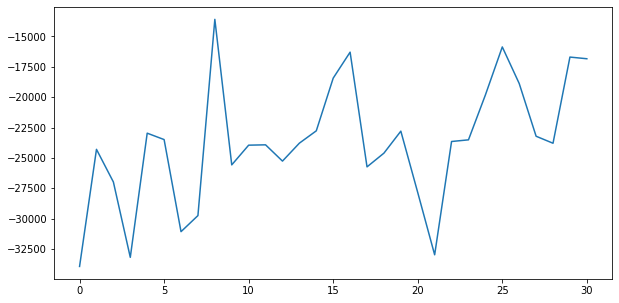

s: [0 0 4], mu: [20.734407  17.023169   2.3348386], a: [[12. 12.  5.]], exp_td_error: [23.50644649], newMu: [19.645817 16.129232  2.419766]

s: [0 2 4], mu: [20.316383  16.547832   2.4553611], a: [[28. 20.  4.]], exp_td_error: [18.56262393], newMu: [20.214355  16.421598   2.6311529]

s: [ 8 12  4], mu: [3.8721545 9.394869  1.9801991], a: [[ 2. 10.  2.]], exp_td_error: [16.60862042], newMu: [3.9328496 9.373813  2.038306 ]

s: [ 0 12  2], mu: [16.144894  13.158225   2.3021376], a: [[22. 13.  5.]], exp_td_error: [2.44622789], newMu: [16.43952   13.353923   2.4628248]

s: [ 9 15  4], mu: [3.7545145 9.412266  2.0853922], a: [[ 6. 15.  5.]], exp_td_error: [14.90989921], newMu: [3.7897732 9.455289  2.1490464]

s: [ 0 20  4], mu: [10.542208   8.911068   1.9701104], a: [[14.  6.  0.]], exp_td_error: [3.98734061], newMu: [10.668556   8.989376   2.0556781]

s: [ 8 16  0], mu: [5.205879  8.162969  2.0541134], a: [[ 6. 13.  5.]], exp_td_error: [2.51071402], newMu: [5.2464333 8.170631  2.100262 ]

s

s: [ 1 15  4], mu: [11.095595   9.334706   2.0183163], a: [[10. 11.  5.]], exp_td_error: [7.22366], newMu: [10.893065   9.211291   2.0096385]

s: [ 0 16  4], mu: [11.036616   9.290699   2.0216959], a: [[11. 11.  3.]], exp_td_error: [8.38668118], newMu: [10.881232  9.205271  2.020218]

s: [ 0 17  2], mu: [8.970758  7.8113933 1.8312342], a: [[11. 11.  5.]], exp_td_error: [6.91891926], newMu: [8.920535  7.8014517 1.8428539]

s: [ 0 18  4], mu: [9.320719  8.059418  1.8696188], a: [[12. 12.  5.]], exp_td_error: [6.8295578], newMu: [9.361784  8.116211  1.8964608]

s: [ 0 20  4], mu: [8.718371  7.696915  1.8414888], a: [[10. 10.  5.]], exp_td_error: [6.80173881], newMu: [8.77887   7.764259  1.8724171]

s: [ 0 20  4], mu: [8.77887   7.764259  1.8724171], a: [[10. 10.  3.]], exp_td_error: [8.29491785], newMu: [8.873669  7.8565154 1.9081221]

s: [ 0 20  2], mu: [8.483192  7.6594005 1.890465 ], a: [[7. 7. 0.]], exp_td_error: [10.18097721], newMu: [8.512451  7.6995535 1.9109098]

s: [ 0 17  0], mu

s: [10 20  4], mu: [ 4.109807  10.440367   2.2379305], a: [[0. 8. 0.]], exp_td_error: [18.83910483], newMu: [ 4.0731015 10.482908   2.230062 ]

s: [ 2 18  0], mu: [10.738163   9.54899    2.2110438], a: [[7. 9. 2.]], exp_td_error: [9.55014213], newMu: [10.713151   9.559153   2.2139938]

s: [ 0 17  2], mu: [13.0256815 11.142261   2.487607 ], a: [[12. 12.  3.]], exp_td_error: [8.43495722], newMu: [13.066865 11.181614  2.498436]

s: [ 0 19  2], mu: [11.853934  10.245053   2.3459907], a: [[22.  8.  0.]], exp_td_error: [1.96898054], newMu: [11.896652 10.284015  2.354936]

s: [14 17  0], mu: [ 3.6184976 11.016026   2.2584264], a: [[ 0. 13.  4.]], exp_td_error: [21.56446053], newMu: [ 3.554949 11.080893  2.264965]

s: [ 1 20  4], mu: [10.933892   9.738221   2.2544756], a: [[17.  7.  0.]], exp_td_error: [2.87060896], newMu: [10.99431   9.794536  2.268976]

s: [11 17  0], mu: [ 4.0658455 10.791306   2.2576253], a: [[10.  3.  5.]], exp_td_error: [2.17740752], newMu: [ 3.992744  10.79007    2.2562

s: [ 7 10  4], mu: [11.582592  14.958854   1.3711897], a: [[6. 5. 2.]], exp_td_error: [1.86986834], newMu: [11.358794  14.8888035  1.3615897]

s: [8 5 2], mu: [11.793909 15.157551  1.346678], a: [[10. 10.  2.]], exp_td_error: [18.16261014], newMu: [11.314512 14.813607  1.333986]

s: [8 5 2], mu: [11.314512 14.813607  1.333986], a: [[7. 9. 0.]], exp_td_error: [19.18706479], newMu: [10.295737  14.127642   1.3125967]

s: [6 4 0], mu: [16.20461  16.889997  1.13823 ], a: [[15. 16.  0.]], exp_td_error: [30.], newMu: [15.617254  16.287226   1.0623797]

(array([22.28739 , 19.923233,  0.800575], dtype=float32), array([24., 10.,  0.], dtype=float32))
s: [0 0 4], mu: [14.076596   13.7934265   0.87511176], a: [[10. 10.  2.]], exp_td_error: [19.6178284], newMu: [13.322388   13.056386    0.82813275]

s: [0 0 2], mu: [16.753294  15.293021   0.7367814], a: [[17. 14.  5.]], exp_td_error: [13.84924716], newMu: [16.096022   14.536213    0.71666175]

s: [3 4 4], mu: [13.588378  13.342249   0.8546104], a: 

s: [ 2 13  0], mu: [14.687114  15.774583   2.4071712], a: [[13. 13.  0.]], exp_td_error: [9.27475329], newMu: [14.840417  16.029253   2.4709673]

s: [ 2 16  0], mu: [12.087714  13.138364   2.0954318], a: [[14.  4.  5.]], exp_td_error: [1.15132414], newMu: [12.179556 13.264945  2.13488 ]

s: [16  6  4], mu: [ 2.1489751 13.779982   2.5546732], a: [[ 5. 16.  0.]], exp_td_error: [28.73037434], newMu: [ 2.2485435 13.971297   2.5455825]

s: [ 5 12  0], mu: [14.217369  17.087553   2.6880631], a: [[14. 18.  5.]], exp_td_error: [0.99520426], newMu: [14.402547  17.371727   2.7253911]

s: [19  2  4], mu: [ 2.2055383 16.98716    2.9282544], a: [[ 2. 12.  0.]], exp_td_error: [5.29124749], newMu: [ 2.305945  17.052479   2.8872144]

s: [9 4 0], mu: [ 9.993362 15.507943  2.602592], a: [[ 8. 17.  5.]], exp_td_error: [30.], newMu: [ 9.939462  15.82844    2.6788108]

s: [ 0 11  4], mu: [17.107477  17.707191   2.7197907], a: [[20. 12.  0.]], exp_td_error: [4.13936649], newMu: [17.07787   17.771088   2.756

s: [ 7 17  2], mu: [ 7.146963  10.435302   1.2203612], a: [[11.  8.  4.]], exp_td_error: [3.76131374], newMu: [ 7.2774453 10.20786    1.2068803]

s: [10 15  4], mu: [ 5.48481  14.091938  1.236277], a: [[8. 7. 1.]], exp_td_error: [6.70124687], newMu: [ 5.4549623 13.804131   1.2056584]

s: [11 12  0], mu: [ 6.898493  14.710678   1.3313745], a: [[12. 14.  0.]], exp_td_error: [9.6664147], newMu: [ 7.115181  14.707102   1.3129473]

s: [ 9 16  0], mu: [ 9.037483  12.840882   1.3513209], a: [[10. 10.  5.]], exp_td_error: [1.55355955], newMu: [ 9.346004 12.734238  1.335304]

s: [19  6  4], mu: [ 6.284907  20.171143   1.2295558], a: [[11. 14.  3.]], exp_td_error: [8.07548449], newMu: [ 6.251397  19.560616   1.2031597]

s: [16 10  2], mu: [ 5.723522 16.08063   1.177555], a: [[ 9. 20.  0.]], exp_td_error: [29.14525538], newMu: [ 5.842933  16.090359   1.1535795]

s: [ 5 20  0], mu: [9.064269  9.032623  1.0804836], a: [[7. 0. 0.]], exp_td_error: [3.05318264], newMu: [9.095279  8.970514  1.0643464]


s: [10 13  4], mu: [7.075016  6.890174  1.8034847], a: [[6. 3. 1.]], exp_td_error: [2.44258458], newMu: [7.1197834 6.983116  1.8143252]

s: [13  6  0], mu: [5.279084  8.352375  1.8108251], a: [[9. 7. 2.]], exp_td_error: [2.9166291], newMu: [5.4469514 8.105824  1.7989378]

s: [15  3  2], mu: [ 4.656549  12.51004    1.9627848], a: [[8. 7. 5.]], exp_td_error: [3.98481798], newMu: [ 4.652715  12.37415    1.9627888]

s: [16  0  4], mu: [ 4.871769  14.008136   2.0399246], a: [[ 2. 15.  0.]], exp_td_error: [7.22027924], newMu: [ 4.8582892 13.96791    2.0372665]

s: [3 5 0], mu: [18.28362  17.153708  3.737948], a: [[11. 12.  4.]], exp_td_error: [23.57001439], newMu: [17.528093  16.584778   3.6189263]

s: [2 7 4], mu: [15.974914  15.169999   3.3435755], a: [[18. 20.  3.]], exp_td_error: [30.], newMu: [16.2229   15.567113  3.404079]

s: [ 0 17  2], mu: [12.281492  11.571772   2.8370132], a: [[8. 8. 5.]], exp_td_error: [6.91387628], newMu: [12.046039  11.463975   2.8422258]

(array([25.38406  , 2

s: [12 13  2], mu: [6.803953  9.569651  2.0358903], a: [[ 3. 10.  3.]], exp_td_error: [13.73980252], newMu: [6.687594  9.616797  2.0437353]

s: [ 5 13  2], mu: [11.796697  11.402162   2.6293962], a: [[15.  4.  4.]], exp_td_error: [1.45905407], newMu: [11.597986  11.214836   2.6062255]

s: [16  7  4], mu: [ 5.8320336 11.38101    2.1330116], a: [[2. 3. 2.]], exp_td_error: [4.56254437], newMu: [ 5.7983947 11.308339   2.1288688]

s: [15  0  2], mu: [ 5.766927  12.45244    2.1710596], a: [[ 0. 12.  0.]], exp_td_error: [5.76515639], newMu: [ 5.705741  12.349254   2.1562057]

s: [3 2 0], mu: [32.08616   29.521877   6.4557686], a: [[27. 28.  0.]], exp_td_error: [30.], newMu: [29.858356 27.631052  5.546651]

s: [ 2 20  0], mu: [12.8000965 12.163827   2.6847305], a: [[ 9. 10.  5.]], exp_td_error: [2.1280478], newMu: [12.0295515 11.515977   2.3790598]

s: [11 10  4], mu: [5.849982  9.665993  1.8351283], a: [[9. 9. 0.]], exp_td_error: [3.91863965], newMu: [5.7166047 9.577504  1.7438873]

s: [11  9

s: [8 0 0], mu: [4.8397827 8.980928  1.0097038], a: [[ 2. 10.  5.]], exp_td_error: [30.], newMu: [4.816432  9.007894  1.0243726]

s: [0 0 4], mu: [19.585878  17.292593   1.0724205], a: [[22. 22.  5.]], exp_td_error: [30.], newMu: [20.604807 18.240982  1.231401]

s: [ 0 12  4], mu: [23.486473  20.558535   1.3034412], a: [[19. 18.  0.]], exp_td_error: [9.30297585], newMu: [23.994335 21.094553  1.44275 ]

s: [ 1 20  0], mu: [10.983366   10.0215225   0.96467185], a: [[16. 10.  0.]], exp_td_error: [4.72760606], newMu: [11.215579  10.254572   1.0218621]

s: [ 7 20  0], mu: [7.7367268 7.5413127 0.9265463], a: [[8. 7. 3.]], exp_td_error: [5.72625407], newMu: [7.8230653 7.622343  0.9618793]

s: [ 8 17  2], mu: [7.155325  7.5541143 0.9676798], a: [[1. 9. 2.]], exp_td_error: [16.35159733], newMu: [7.0994296 7.627725  1.0091159]

s: [ 0 16  2], mu: [16.774836  15.1267605  1.3684733], a: [[15. 12.  4.]], exp_td_error: [4.93175691], newMu: [16.764366  15.177761   1.4407909]

s: [ 3 18  4], mu: [10.6

s: [13  4  4], mu: [ 5.0973415 10.3565855  1.9093912], a: [[8. 9. 1.]], exp_td_error: [4.05846007], newMu: [ 5.1264014 10.331792   1.8798509]

s: [12  3  0], mu: [ 5.2355156 10.1557255  1.8727528], a: [[8. 7. 0.]], exp_td_error: [3.51782639], newMu: [ 5.2725244 10.122154   1.8435842]

s: [13  0  0], mu: [ 4.9921823 11.012994   1.8972828], a: [[ 5. 18.  0.]], exp_td_error: [0.8860753], newMu: [ 5.013768  10.986602   1.8694372]

s: [0 8 0], mu: [30.00185   28.303219   3.5598428], a: [[30. 22.  2.]], exp_td_error: [30.], newMu: [28.74936   26.725138   3.2125266]

s: [ 8 20  2], mu: [6.0514545 9.254519  1.6541413], a: [[ 8. 10.  2.]], exp_td_error: [7.98245541], newMu: [6.0538783 9.15964   1.6045097]

s: [ 6 20  2], mu: [6.7512617 8.928121  1.5173775], a: [[3. 3. 5.]], exp_td_error: [5.56624309], newMu: [6.682564  8.832826  1.4786303]

s: [ 6 13  4], mu: [6.9340534 8.811632  1.4514376], a: [[8. 0. 5.]], exp_td_error: [2.0383333], newMu: [6.894106  8.708458  1.4132448]

s: [14  3  4], mu: [

s: [1 9 0], mu: [16.421484  13.22657    2.1317756], a: [[18. 11.  0.]], exp_td_error: [30.], newMu: [16.82289   13.483835   2.0898476]

s: [ 8 10  0], mu: [5.3655095 9.389381  2.14178  ], a: [[ 7. 15.  2.]], exp_td_error: [30.], newMu: [5.5852976 9.65567   2.156992 ]

s: [ 0 15  2], mu: [11.5597725  9.568455   1.5998952], a: [[5. 5. 0.]], exp_td_error: [8.60739365], newMu: [11.599276  9.603786  1.562982]

s: [ 0 10  0], mu: [18.313473  14.523127   2.0577621], a: [[23. 12.  0.]], exp_td_error: [7.27087197], newMu: [18.540005  14.652967   1.9962006]

s: [11 12  0], mu: [ 4.702339  10.321953   2.2499197], a: [[ 2. 10.  0.]], exp_td_error: [19.89486514], newMu: [ 4.719805  10.425597   2.2292628]

s: [ 3 12  0], mu: [10.090517   9.018873   1.5022494], a: [[8. 3. 5.]], exp_td_error: [1.45167966], newMu: [10.20756    9.111295   1.4749796]

s: [8 5 4], mu: [12.441794  12.16793    1.9608512], a: [[17. 10.  5.]], exp_td_error: [17.51876228], newMu: [12.683765  12.277218   1.9396329]

s: [15  5  

s: [13  1  0], mu: [ 4.606908  10.633782   1.7718285], a: [[13. 14.  0.]], exp_td_error: [0.55204894], newMu: [ 4.6692224 10.530261   1.7407198]

s: [12  5  0], mu: [4.7315416 9.490425  1.6445351], a: [[0. 8. 5.]], exp_td_error: [6.41386145], newMu: [4.7867126 9.381949  1.6184361]

s: [4 3 4], mu: [18.078482 11.30114   1.012902], a: [[17. 19.  2.]], exp_td_error: [30.], newMu: [18.407911  11.593278   1.0273204]

s: [ 2 12  2], mu: [8.883093   6.238027   0.86548233], a: [[8. 0. 0.]], exp_td_error: [1.29107678], newMu: [8.995278  6.3272114 0.8652641]

s: [10  2  0], mu: [4.9868107 9.02621   1.5663769], a: [[ 7. 11.  0.]], exp_td_error: [0.98239756], newMu: [5.055694  8.981907  1.5563581]

s: [6 3 0], mu: [9.960352  7.9632297 1.1364332], a: [[9. 7. 0.]], exp_td_error: [12.35020608], newMu: [10.053982   7.992551   1.1223761]

s: [8 0 0], mu: [11.126747   9.727958   1.3551012], a: [[ 2. 10.  4.]], exp_td_error: [30.], newMu: [10.383928   9.717571   1.4238503]

s: [0 0 4], mu: [24.405386  15

s: [ 0 19  0], mu: [9.838638  9.292421  2.1414936], a: [[12.  6.  5.]], exp_td_error: [1.66618515], newMu: [9.9471245 9.433963  2.184324 ]

s: [12  9  4], mu: [ 4.0690103 12.906082   2.5822964], a: [[10.  8.  4.]], exp_td_error: [4.10848188], newMu: [ 4.0951076 13.015858   2.5989478]

s: [14  7  4], mu: [ 4.101968  13.652249   2.6711006], a: [[10. 11.  5.]], exp_td_error: [5.9075285], newMu: [ 4.150642  13.76115    2.6967366]

s: [13  8  4], mu: [ 4.1430297 13.418051   2.6572864], a: [[2. 3. 0.]], exp_td_error: [3.93203362], newMu: [ 4.1721125 13.4117775  2.6630967]

s: [12  1  0], mu: [ 4.144815  13.966319   2.7138019], a: [[ 3. 11.  5.]], exp_td_error: [6.82670018], newMu: [ 4.166025  13.949402   2.7258174]

s: [4 2 4], mu: [16.598743 15.444828  3.428971], a: [[13. 13.  3.]], exp_td_error: [17.86175319], newMu: [16.342197  15.250113   3.4131927]

s: [4 5 2], mu: [12.299604  11.791613   2.7474499], a: [[11. 15.  0.]], exp_td_error: [30.], newMu: [12.222595  11.779273   2.7283392]

s: 

s: [15  1  2], mu: [ 3.6067693 13.846507   2.5462425], a: [[ 2. 17.  4.]], exp_td_error: [1.51343735], newMu: [ 3.5509205 13.888107   2.575598 ]

s: [0 8 4], mu: [26.513893  22.772125   2.9833739], a: [[23. 18.  0.]], exp_td_error: [30.], newMu: [25.25136   21.594826   2.7301288]

s: [ 5 16  0], mu: [7.7215753 8.127244  1.5354819], a: [[4. 9. 4.]], exp_td_error: [1.95648589], newMu: [7.4185486 8.082947  1.529971 ]

s: [9 6 4], mu: [ 4.2904983 10.911951   2.26763  ], a: [[3. 9. 2.]], exp_td_error: [30.], newMu: [ 4.1267548 10.776834   2.2314687]

s: [3 5 2], mu: [17.165304  14.889053   1.9314167], a: [[22. 16.  4.]], exp_td_error: [22.28421128], newMu: [16.959435  14.62992    1.8724172]

s: [ 9 11  4], mu: [ 3.6858191 10.807108   2.2010016], a: [[10. 10.  5.]], exp_td_error: [5.27807692], newMu: [ 3.6383996 10.743347   2.1949055]

s: [ 9 11  4], mu: [ 3.6383996 10.743347   2.1949055], a: [[2. 9. 0.]], exp_td_error: [15.49739021], newMu: [ 3.5771666 10.650656   2.173819 ]

s: [ 2 10  0],

s: [6 8 2], mu: [ 6.5470757 11.14688    2.4918969], a: [[12. 18.  0.]], exp_td_error: [30.], newMu: [ 6.716144  11.331567   2.4962723]

s: [ 0 16  0], mu: [7.1685405 7.656715  1.6210132], a: [[14. 14.  2.]], exp_td_error: [8.57101807], newMu: [7.299281 7.789323 1.62651 ]

s: [ 0 20  2], mu: [6.979564  8.13754   1.7348351], a: [[8. 8. 5.]], exp_td_error: [6.85541115], newMu: [7.129882  8.275859  1.7439308]

s: [ 0 18  4], mu: [7.533512  8.435779  1.7456883], a: [[12. 11.  0.]], exp_td_error: [9.12641947], newMu: [7.7158036 8.615458  1.7577329]

s: [ 1 19  0], mu: [7.1363463 8.6263685 1.8037938], a: [[7. 8. 0.]], exp_td_error: [10.65231323], newMu: [7.3225603 8.759938  1.8044477]

s: [ 0 17  0], mu: [7.6251945 8.223912  1.6664577], a: [[5. 5. 0.]], exp_td_error: [10.41452898], newMu: [7.7449474 8.222733  1.6413363]

s: [ 0 12  0], mu: [8.461251  8.423486  1.6128983], a: [[10. 10.  5.]], exp_td_error: [1.79536688], newMu: [8.508477  8.453419  1.6036966]

s: [10  2  4], mu: [ 7.3311224 13.

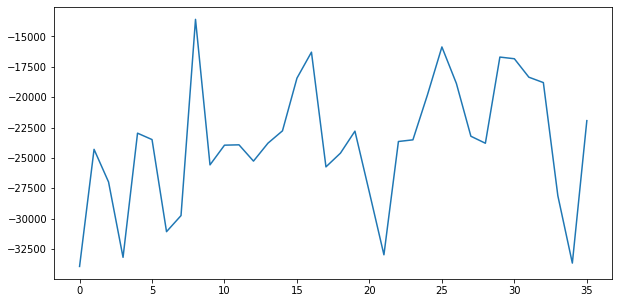

s: [0 0 4], mu: [16.550087  14.4281025  1.6293567], a: [[26. 26.  5.]], exp_td_error: [30.], newMu: [17.67828   15.443148   1.7875334]

s: [ 0 16  4], mu: [9.4223585 8.613636  1.2475154], a: [[15. 13.  5.]], exp_td_error: [5.48529413], newMu: [9.754394  8.921277  1.3150424]

s: [ 2 19  4], mu: [9.47576   8.718659  1.2977096], a: [[13.  3.  5.]], exp_td_error: [1.89009406], newMu: [9.768384  8.991688  1.3602754]

s: [12 12  4], mu: [ 8.208076  12.27692    2.0917056], a: [[8. 1. 4.]], exp_td_error: [2.0970172], newMu: [ 8.429144 11.831214  2.069891]

s: [19  3  4], mu: [ 7.046587 16.066715  2.383873], a: [[11. 12.  0.]], exp_td_error: [3.77382869], newMu: [ 7.0539827 15.829501   2.3910196]

s: [18  5  0], mu: [ 6.900766  14.598259   2.3024886], a: [[ 9. 13.  1.]], exp_td_error: [4.59367163], newMu: [ 6.9228916 14.376966   2.300449 ]

s: [14  8  0], mu: [ 7.8024936 12.034917   2.130603 ], a: [[ 6. 20.  0.]], exp_td_error: [2.56149183], newMu: [ 7.9124002 11.835285   2.1232586]

s: [ 0 18 

s: [ 4 20  0], mu: [ 7.864513 11.914896  2.106871], a: [[15. 10.  5.]], exp_td_error: [0.97223932], newMu: [ 7.9495955 12.050028   2.1000507]

s: [19 10  4], mu: [ 7.1784444 21.628433   2.7120862], a: [[10. 20.  0.]], exp_td_error: [20.51647071], newMu: [ 7.3410497 21.62235    2.633767 ]

s: [ 9 20  0], mu: [ 7.59219   15.622627   2.3275578], a: [[6. 6. 0.]], exp_td_error: [7.62197671], newMu: [ 7.7127013 15.008243   2.222628 ]

s: [ 9 16  0], mu: [ 8.3426    15.332479   2.2996707], a: [[13. 14.  3.]], exp_td_error: [7.24685728], newMu: [ 8.602373  14.896188   2.2338421]

s: [ 8 20  2], mu: [ 7.7362523 14.576453   2.1325583], a: [[14. 10.  0.]], exp_td_error: [4.75703695], newMu: [ 8.006033  13.809768   2.0496001]

s: [12 20  0], mu: [ 8.071528  16.047846   2.2193909], a: [[ 9. 10.  0.]], exp_td_error: [8.16116532], newMu: [ 8.353114 15.034525  2.11264 ]

s: [11 20  0], mu: [ 8.427986  14.341045   2.0728526], a: [[ 0. 10.  4.]], exp_td_error: [16.25292803], newMu: [ 8.379368 12.705853 

s: [ 0 20  0], mu: [12.591525  13.188087   1.1935241], a: [[9. 6. 0.]], exp_td_error: [7.3469505], newMu: [12.048083  12.699446   1.1596822]

s: [ 3 16  0], mu: [10.055342  10.928599   1.0921282], a: [[8. 7. 5.]], exp_td_error: [2.20118909], newMu: [ 9.722373  10.687105   1.0790447]

s: [11  6  4], mu: [ 7.1238036 13.585421   1.1617466], a: [[ 8. 19.  2.]], exp_td_error: [4.00704689], newMu: [ 7.1492558 13.804722   1.1580168]

s: [ 0 15  2], mu: [14.18251   14.911281   1.2565447], a: [[15. 15.  5.]], exp_td_error: [6.96223285], newMu: [13.972711  14.7455635  1.2560103]

s: [ 0 20  4], mu: [11.812824  12.573455   1.1540403], a: [[10. 10.  4.]], exp_td_error: [6.80173881], newMu: [11.358671  12.149983   1.1438783]

s: [ 0 20  4], mu: [11.358671  12.149983   1.1438783], a: [[14. 10.  2.]], exp_td_error: [5.24998399], newMu: [10.972295  11.783532   1.1358528]

s: [ 4 20  2], mu: [8.035154  9.780652  1.1118804], a: [[6. 8. 0.]], exp_td_error: [10.85573083], newMu: [7.9846087 9.817086  1.121

s: [ 3 19  0], mu: [ 7.8713083 10.246926   1.0806594], a: [[12. 10.  0.]], exp_td_error: [7.05518469], newMu: [ 7.7683387 10.122096   1.0457723]

s: [ 5 19  0], mu: [ 7.692179  10.254114   1.0454494], a: [[5. 7. 5.]], exp_td_error: [2.80205967], newMu: [ 7.61289   10.113486   1.0154103]

s: [10  9  4], mu: [ 7.8240633 14.595088   1.0585384], a: [[ 8. 17.  2.]], exp_td_error: [4.09443409], newMu: [ 7.7153473 14.496725   1.0298988]

s: [ 1 16  2], mu: [8.963419  9.838582  0.9450391], a: [[9. 8. 0.]], exp_td_error: [8.64882982], newMu: [8.65327   9.558136  0.9185421]

s: [ 2 14  0], mu: [8.491719   9.57693    0.92851835], a: [[10. 12.  0.]], exp_td_error: [11.57645874], newMu: [8.311059   9.428589   0.90556157]

s: [ 0 16  0], mu: [8.870748  9.55839   0.8740934], a: [[8. 8. 5.]], exp_td_error: [1.2339498], newMu: [8.648731 9.359556 0.854426]

s: [8 6 4], mu: [10.31011   13.517823   1.1236947], a: [[12. 19.  0.]], exp_td_error: [30.], newMu: [10.250394  13.700328   1.1005948]

s: [ 1 15  0

s: [ 0 12  4], mu: [13.495979  13.775451   1.4881444], a: [[18. 18.  0.]], exp_td_error: [10.34261576], newMu: [13.588481 13.861509  1.50835 ]

s: [ 0 20  0], mu: [12.229867  12.655549   1.4371588], a: [[12.  8.  0.]], exp_td_error: [6.52868401], newMu: [12.058383  12.498077   1.4354612]

s: [ 4 18  0], mu: [ 8.234771  10.221649   1.3410672], a: [[13. 10.  5.]], exp_td_error: [1.22629335], newMu: [ 8.141243  10.218609   1.3497077]

s: [17  8  4], mu: [ 5.776418  15.183684   1.5183828], a: [[ 9. 14.  5.]], exp_td_error: [8.34702649], newMu: [ 5.7998815 15.17025    1.5451589]

s: [12 12  4], mu: [ 7.0733356 15.833648   1.7280265], a: [[6. 5. 4.]], exp_td_error: [4.26384936], newMu: [ 7.0555086 15.717813   1.7492883]

s: [13  7  4], mu: [ 6.947663  15.565706   1.7337257], a: [[ 7. 20.  0.]], exp_td_error: [5.27710056], newMu: [ 6.954658  15.522827   1.7522962]

s: [ 0 17  0], mu: [12.640976  12.943148   1.5142876], a: [[17. 13.  3.]], exp_td_error: [5.40537112], newMu: [12.658798  12.9374

s: [ 4 11  2], mu: [ 9.816433  14.321737   1.9573212], a: [[14. 14.  4.]], exp_td_error: [5.59221474], newMu: [ 9.93046  14.309113  1.962935]

s: [ 4 15  4], mu: [ 9.489229  14.575984   1.9993675], a: [[10. 10.  5.]], exp_td_error: [5.69797058], newMu: [ 9.60772   14.4051075  1.9933115]

s: [ 4 15  4], mu: [ 9.60772   14.4051075  1.9933115], a: [[11. 13.  0.]], exp_td_error: [10.64900611], newMu: [ 9.729208  14.151227   1.9668334]

s: [ 2 18  0], mu: [8.1066    9.454792  1.4461066], a: [[10.  4.  5.]], exp_td_error: [1.84042182], newMu: [8.151256 9.354093 1.439774]

s: [12  8  4], mu: [ 8.615156  18.542215   2.1737134], a: [[ 1. 11.  3.]], exp_td_error: [6.81968615], newMu: [ 8.590644  18.355999   2.1737452]

s: [2 9 2], mu: [12.728398  13.046827   1.7564042], a: [[16. 16.  0.]], exp_td_error: [30.], newMu: [12.945759  13.186958   1.7509111]

s: [ 2 15  0], mu: [ 9.323735  10.14922    1.4954057], a: [[11.  5.  4.]], exp_td_error: [1.6427062], newMu: [ 9.42364   10.138134   1.4810988]



s: [22  2  0], mu: [ 6.073596  14.778455   0.7566415], a: [[ 8. 16.  2.]], exp_td_error: [8.41182564], newMu: [ 6.1008587  14.729435    0.75043344]

s: [14  8  2], mu: [ 6.8396115  12.6985855   0.89639515], a: [[1. 9. 3.]], exp_td_error: [3.65052713], newMu: [ 6.8060794 12.5310755  0.8888202]

s: [6 7 2], mu: [10.817389  12.006669   0.9344134], a: [[10. 14.  0.]], exp_td_error: [30.], newMu: [10.828988  12.007078   0.9190806]

s: [ 2 11  0], mu: [14.376456  12.778977   0.7142954], a: [[13. 14.  0.]], exp_td_error: [10.40341166], newMu: [14.451717   12.842653    0.69697875]

s: [ 1 15  0], mu: [13.3135     11.869206    0.68173206], a: [[23.  7.  5.]], exp_td_error: [0.41019268], newMu: [13.425535  11.9612     0.6681469]

s: [24  5  4], mu: [ 6.169017   14.818095    0.71281195], a: [[ 6. 16.  5.]], exp_td_error: [15.03684629], newMu: [ 6.1838574 14.861394   0.7373024]

s: [14 11  4], mu: [ 7.0647974 12.180232   0.8814206], a: [[ 5. 19.  2.]], exp_td_error: [30.], newMu: [ 7.145628  12.78

s: [ 0 17  2], mu: [7.909071  8.358259  1.4305816], a: [[8. 3. 0.]], exp_td_error: [5.01050891], newMu: [8.055771  8.416068  1.4198313]

s: [ 5 10  0], mu: [ 6.777617  11.0672865  1.8473821], a: [[12. 17.  0.]], exp_td_error: [30.], newMu: [ 6.907923  11.259136   1.8460362]

s: [ 0 17  0], mu: [8.490083  8.740359  1.4306973], a: [[8. 8. 0.]], exp_td_error: [10.39974221], newMu: [8.618315  8.884895  1.4258344]

s: [ 0 15  0], mu: [9.6264925 9.639217  1.4706372], a: [[11. 11.  0.]], exp_td_error: [10.46416278], newMu: [9.911209  9.922496  1.4762315]

s: [ 0 16  0], mu: [9.178156  9.299955  1.4241296], a: [[9. 9. 5.]], exp_td_error: [1.38584839], newMu: [9.426841  9.552181  1.4282815]

s: [9 6 4], mu: [ 4.972456 13.617389  2.069255], a: [[ 7. 16.  5.]], exp_td_error: [30.], newMu: [ 5.125183  13.8942995  2.1179473]

s: [ 0 12  4], mu: [13.24091   12.891282   1.6878481], a: [[15. 14.  4.]], exp_td_error: [6.23891049], newMu: [13.593352  13.243911   1.7233633]

s: [ 1 16  4], mu: [8.238169 

s: [ 0 18  0], mu: [13.582505  13.049899   0.9563905], a: [[12. 12.  3.]], exp_td_error: [8.51094021], newMu: [13.55986   13.043342   0.9382963]

s: [ 0 20  2], mu: [9.889839  9.812448  0.8439983], a: [[10. 10.  0.]], exp_td_error: [10.18642658], newMu: [9.887455   9.825529   0.83181286]

s: [ 0 20  0], mu: [10.659555  10.482841   0.8473466], a: [[7. 0. 0.]], exp_td_error: [3.8304983], newMu: [10.037305   9.953284   0.8231365]

s: [ 7 10  0], mu: [ 8.33036   13.405257   1.2163968], a: [[ 5. 12.  5.]], exp_td_error: [7.04263175], newMu: [ 8.191247  13.381695   1.2108353]

s: [12  0  4], mu: [ 7.582958  17.76917    1.5398073], a: [[ 9. 10.  0.]], exp_td_error: [4.52023604], newMu: [ 7.486663  17.623007   1.5169417]

s: [11  0  0], mu: [ 4.876475  14.827851   1.2858781], a: [[14. 10.  1.]], exp_td_error: [2.66292778], newMu: [ 4.851998 14.72824   1.269658]

s: [15  0  0], mu: [ 4.192854  15.716049   1.1711398], a: [[ 5. 12.  1.]], exp_td_error: [3.44779083], newMu: [ 4.184726  15.605632  

s: [ 0 16  0], mu: [11.632908   9.879018   1.5730067], a: [[19. 14.  2.]], exp_td_error: [4.82325283], newMu: [12.522585  10.553332   1.6721988]

s: [ 5 20  2], mu: [6.407305  9.85313   1.7895361], a: [[ 5. 10.  5.]], exp_td_error: [9.96963937], newMu: [6.4584985 9.868868  1.8127185]

s: [ 0 20  4], mu: [8.723314  8.055918  1.4545624], a: [[9. 3. 3.]], exp_td_error: [4.16860081], newMu: [8.871362  8.104878  1.4740561]

s: [ 6 13  2], mu: [ 6.7329855 11.973638   2.1532466], a: [[11. 17.  5.]], exp_td_error: [10.8337635], newMu: [ 6.894491  12.1060095  2.2022734]

s: [ 0 20  4], mu: [9.05384   8.187488  1.5008639], a: [[6. 6. 0.]], exp_td_error: [10.10095109], newMu: [9.13223  8.216202 1.519608]

s: [ 0 16  0], mu: [15.459877  12.789493   2.0603366], a: [[14. 14.  5.]], exp_td_error: [1.31395507], newMu: [16.03295  13.226363  2.144236]

s: [14  6  4], mu: [ 3.383359  14.674834   2.2791266], a: [[16. 19.  0.]], exp_td_error: [1.55597549], newMu: [ 3.4278278 14.734472   2.3118186]

s: [11 

s: [0 7 0], mu: [18.680832  15.884803   0.6274571], a: [[18. 17.  4.]], exp_td_error: [30.], newMu: [18.164408  15.534211   0.6820322]

s: [ 1 14  4], mu: [7.6683855 7.323683  0.6870532], a: [[11.  0.  5.]], exp_td_error: [1.70399474], newMu: [7.5802126 7.2719502 0.707243 ]

s: [12  4  4], mu: [4.1020265 9.672704  1.1224214], a: [[ 7. 13.  4.]], exp_td_error: [0.7798182], newMu: [4.040824  9.614281  1.1331425]

s: [6 7 4], mu: [ 7.579166  11.296515   1.1801188], a: [[5. 3. 0.]], exp_td_error: [30.], newMu: [ 7.3812237 11.04364    1.1778958]

s: [8 0 0], mu: [4.5483503 9.999638  1.194334 ], a: [[ 3. 10.  5.]], exp_td_error: [30.], newMu: [4.352945  9.76831   1.2050039]

s: [1 0 4], mu: [16.830297   14.737114    0.90911096], a: [[16. 13.  5.]], exp_td_error: [16.09566806], newMu: [16.372362  14.355545   0.9856893]

s: [4 3 4], mu: [13.2287655 12.165433   0.9989939], a: [[13. 17.  4.]], exp_td_error: [30.], newMu: [12.960119  12.0711775  1.1121266]

s: [ 0 10  4], mu: [12.726943   11.2928

s: [15  1  0], mu: [ 4.856849  10.392227   1.9725306], a: [[7. 9. 0.]], exp_td_error: [4.08988451], newMu: [ 4.9162073 10.376912   1.9743556]

s: [13  0  0], mu: [ 5.0584216 10.259951   1.9856077], a: [[13. 10.  0.]], exp_td_error: [2.58754863], newMu: [ 5.1355686 10.247308   1.9873894]

s: [16  0  0], mu: [ 4.756547  10.837051   1.9894685], a: [[ 9. 10.  0.]], exp_td_error: [3.59382258], newMu: [ 4.838614 10.80921   1.987913]

s: [15  0  0], mu: [ 4.950125  10.602771   1.9853634], a: [[ 7. 10.  0.]], exp_td_error: [4.64248825], newMu: [ 5.0377364 10.5726185  1.9821112]

s: [12  0  0], mu: [ 5.527955  10.016245   1.9944462], a: [[ 5. 10.  0.]], exp_td_error: [3.21980147], newMu: [5.6186914 9.979044  1.991572 ]

s: [7 0 0], mu: [13.906236  12.400946   2.4266067], a: [[ 9. 13.  4.]], exp_td_error: [30.], newMu: [13.376566  12.158882   2.4177928]

s: [3 3 4], mu: [22.412817  17.55324    3.0439188], a: [[27. 27.  5.]], exp_td_error: [30.], newMu: [23.557676  18.616709   3.2714336]

s: [ 3 

s: [9 3 4], mu: [24.309061 22.550947  4.182225], a: [[21. 24.  3.]], exp_td_error: [24.72972743], newMu: [23.365421 21.888542  4.017229]

s: [ 6 17  2], mu: [5.5182977 8.936467  2.032074 ], a: [[ 7. 10.  2.]], exp_td_error: [9.58346389], newMu: [5.5204897 8.958341  2.0174131]

s: [ 3 17  2], mu: [6.091418  8.525106  1.9354069], a: [[12.  0.  5.]], exp_td_error: [1.41695361], newMu: [6.124605 8.526904 1.918861]

s: [15  7  4], mu: [ 4.762096  10.671342   2.0063052], a: [[5. 4. 3.]], exp_td_error: [3.74787619], newMu: [ 4.7380443 10.667366   1.9900187]

s: [16  1  2], mu: [ 4.380528  12.567085   2.0272183], a: [[1. 9. 5.]], exp_td_error: [4.87824938], newMu: [ 4.345331  12.520059   2.0131102]

s: [8 0 4], mu: [30.45714   28.473282   4.8428774], a: [[22. 30.  5.]], exp_td_error: [30.], newMu: [27.27344   26.142033   4.4754252]

s: [ 0 20  4], mu: [7.4954453 7.8616138 1.6545007], a: [[9. 0. 0.]], exp_td_error: [2.84716592], newMu: [7.366026  7.8254943 1.642464 ]

s: [ 9 10  0], mu: [5.0892

s: [14  2  0], mu: [ 3.0314584 14.023455   1.8150358], a: [[ 0. 14.  0.]], exp_td_error: [7.63952244], newMu: [ 2.9985933 14.033138   1.7940618]

s: [0 6 0], mu: [22.350105 21.0629    2.286201], a: [[20. 20.  0.]], exp_td_error: [30.], newMu: [22.128323  20.838747   2.1478636]

s: [ 0 16  0], mu: [9.625964  9.385717  1.2468207], a: [[8. 8. 1.]], exp_td_error: [10.43957888], newMu: [9.40579   9.178581  1.1848354]

s: [ 0 14  0], mu: [10.951525  10.580783   1.2978725], a: [[13. 13.  4.]], exp_td_error: [1.48416815], newMu: [10.765304  10.402898   1.2383535]

s: [13  4  4], mu: [ 2.9872837 12.571175   1.5794951], a: [[ 4. 16.  0.]], exp_td_error: [3.92838781], newMu: [ 2.952864  12.5953665  1.54982  ]

s: [ 1 10  0], mu: [13.988688  13.392962   1.4100845], a: [[13.  5.  0.]], exp_td_error: [1.95677729], newMu: [13.786926  13.198038   1.3471571]

s: [9 5 0], mu: [ 3.4493449 10.6731615  1.4713639], a: [[ 5. 14.  0.]], exp_td_error: [23.42374495], newMu: [ 3.433606  10.750686   1.4417374]

s

s: [ 6 14  2], mu: [ 6.263313 10.638683  1.765384], a: [[8. 6. 0.]], exp_td_error: [5.22813192], newMu: [ 6.6485734 10.470958   1.7436906]

s: [ 8 10  0], mu: [ 4.451473  10.869465   1.6232978], a: [[13. 11.  0.]], exp_td_error: [17.25783537], newMu: [ 4.7078404 10.595416   1.5948571]

s: [10 11  0], mu: [ 4.0175595 11.2083645  1.568753 ], a: [[5. 7. 2.]], exp_td_error: [2.35294843], newMu: [ 4.2416825 10.917575   1.5392784]

s: [8 8 2], mu: [ 5.2500625 10.47126    1.5995743], a: [[ 5. 13.  2.]], exp_td_error: [30.], newMu: [ 5.5430427 10.366209   1.5922074]

s: [ 0 11  2], mu: [22.312807 19.031145  2.303481], a: [[16. 16.  4.]], exp_td_error: [7.04746135], newMu: [22.072931  18.822962   2.2810452]

s: [ 0 17  4], mu: [16.919996 14.556068  1.879327], a: [[22. 13.  3.]], exp_td_error: [2.92590131], newMu: [16.845379  14.480308   1.8716863]

s: [ 9 20  2], mu: [ 4.96999   10.162687   1.5116229], a: [[ 4. 10.  5.]], exp_td_error: [10.25887915], newMu: [ 5.1112857 10.063341   1.5131885]

s

s: [12  4  0], mu: [ 2.8950195 10.067442   1.2033104], a: [[11.  6.  0.]], exp_td_error: [2.13962145], newMu: [3.0101306 9.978415  1.2403297]

s: [17  0  0], mu: [ 2.1715753 11.386138   1.1623249], a: [[ 3. 16.  4.]], exp_td_error: [10.26408866], newMu: [ 2.2967184 11.371024   1.2213218]

s: [4 6 4], mu: [12.668973  12.315059   1.3503895], a: [[12. 16.  4.]], exp_td_error: [30.], newMu: [12.671193  12.29509    1.3971921]

(array([33.21717  , 28.227484 ,  1.8113803], dtype=float32), array([24., 24.,  0.], dtype=float32))


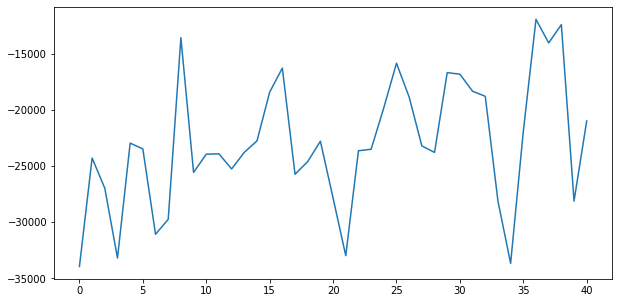

s: [0 0 4], mu: [17.133183  15.699681   1.4888362], a: [[18. 12.  0.]], exp_td_error: [7.43838333], newMu: [16.849497  15.472847   1.5385449]

s: [6 2 0], mu: [4.8290944 9.389626  1.4128864], a: [[3. 9. 2.]], exp_td_error: [30.], newMu: [4.8479176 9.373643  1.4453446]

s: [0 1 2], mu: [27.34051   23.243155   1.7324736], a: [[29. 29.  0.]], exp_td_error: [30.], newMu: [28.313236  24.124243   1.7617422]

s: [ 0 20  0], mu: [9.425703  8.514714  0.9762226], a: [[5. 5. 4.]], exp_td_error: [3.79127328], newMu: [9.395741  8.527925  0.9806856]

s: [ 5 10  4], mu: [10.06485   10.577627   1.4106816], a: [[18.  6.  5.]], exp_td_error: [1.53233156], newMu: [10.30389  10.693     1.414094]

s: [17  6  4], mu: [ 3.0118794 10.991563   1.5114057], a: [[3. 6. 0.]], exp_td_error: [4.72064446], newMu: [ 3.074462  10.991261   1.5351275]

s: [14  2  0], mu: [ 3.2170591 10.692914   1.5357519], a: [[11. 16.  5.]], exp_td_error: [0.7551809], newMu: [ 3.276175  10.703344   1.5581186]

s: [9 8 4], mu: [4.8254175

s: [13 16  4], mu: [ 5.154439  10.968042   1.3389233], a: [[5. 9. 5.]], exp_td_error: [7.8987968], newMu: [ 5.114563  10.843894   1.3820367]

s: [ 9 15  4], mu: [ 5.9150705 10.417491   1.3394554], a: [[3. 9. 4.]], exp_td_error: [10.66072243], newMu: [ 5.7593207 10.31883    1.3905241]

s: [ 3 14  4], mu: [10.660294  11.03728    0.9399222], a: [[19. 11.  2.]], exp_td_error: [2.75735619], newMu: [10.516267 10.903266  1.006116]

s: [11 15  2], mu: [ 5.285991  10.434498   1.4588197], a: [[10.  5.  5.]], exp_td_error: [2.76047582], newMu: [ 5.2475224 10.337931   1.4980106]

s: [16 10  4], mu: [ 4.1600556 11.481547   1.5162485], a: [[ 0. 16.  1.]], exp_td_error: [30.], newMu: [ 4.019092  11.558002   1.5398358]

s: [ 0 16  0], mu: [9.736192  9.670334  1.0026616], a: [[21.  4.  1.]], exp_td_error: [1.18058773], newMu: [9.633423  9.594093  1.0478827]

s: [17 10  0], mu: [ 3.9631515 11.565413   1.5659317], a: [[ 4. 12.  0.]], exp_td_error: [30.], newMu: [ 3.8474631 11.6448145  1.5679083]

s: [ 9 

s: [ 9 20  2], mu: [ 6.298247 11.594918  1.930271], a: [[15.  1.  0.]], exp_td_error: [1.40520461], newMu: [ 6.1685977 11.56905    1.9362301]

s: [23 11  0], mu: [ 3.596374  12.438496   1.9535813], a: [[ 7. 14.  0.]], exp_td_error: [13.6495991], newMu: [ 3.6107695 12.466132   1.9457592]

s: [16 15  0], mu: [ 5.133599  11.812769   1.9768609], a: [[11. 13.  2.]], exp_td_error: [6.88813487], newMu: [ 5.164908 11.833663  1.971657]

s: [14 18  2], mu: [ 5.454908  11.790939   1.9750721], a: [[14.  9.  0.]], exp_td_error: [3.86054745], newMu: [ 5.488643  11.803928   1.9685105]

s: [19 17  0], mu: [ 4.784268  12.012469   1.9697547], a: [[ 2. 13.  5.]], exp_td_error: [15.72521974], newMu: [ 4.7945247 12.044473   1.978662 ]

s: [ 8 20  4], mu: [ 6.011552  11.393015   1.9175124], a: [[ 2. 10.  5.]], exp_td_error: [13.23933809], newMu: [ 5.9197345 11.393236   1.9375718]

s: [ 0 20  4], mu: [10.914722  11.228185   1.3215642], a: [[10. 10.  5.]], exp_td_error: [6.80173881], newMu: [10.857322  11.184

s: [ 2 20  0], mu: [9.043072  9.578321  1.5369058], a: [[12.  6.  0.]], exp_td_error: [4.53367472], newMu: [9.0673    9.473551  1.5490804]

s: [ 8 16  0], mu: [ 3.7386606 11.811346   2.0484433], a: [[1. 6. 4.]], exp_td_error: [9.61694419], newMu: [ 3.7051277 11.727017   2.066529 ]

s: [ 3 12  4], mu: [14.458059  14.384326   2.0261595], a: [[17. 15.  3.]], exp_td_error: [5.63872804], newMu: [14.367626 14.214821  2.052744]

s: [ 5 17  2], mu: [ 4.6622386 11.305793   2.096971 ], a: [[1. 6. 2.]], exp_td_error: [12.27964816], newMu: [ 4.569057  11.168439   2.1027539]

s: [ 0 13  2], mu: [14.172654  13.246681   1.9325868], a: [[17. 17.  0.]], exp_td_error: [10.40861951], newMu: [14.544391  13.530804   1.9896045]

(array([50.887333 , 46.395138 ,  5.3490715], dtype=float32), array([30., 30.,  3.], dtype=float32))
s: [0 0 4], mu: [33.013775  30.425747   3.7465382], a: [[25. 25.  4.]], exp_td_error: [30.], newMu: [28.498419  26.292435   3.3797662]

s: [ 0 15  4], mu: [13.243436  12.304078   1.88

s: [9 7 4], mu: [2.252291  9.930761  2.0761523], a: [[ 5. 10.  0.]], exp_td_error: [5.85521931], newMu: [2.319647  9.9426365 2.0955846]

s: [4 7 0], mu: [7.7380233 9.257712  1.8026471], a: [[10. 12.  4.]], exp_td_error: [27.94124742], newMu: [8.000345  9.366825  1.8434156]

s: [2 9 4], mu: [12.06743   11.486669   1.8424442], a: [[7. 6. 0.]], exp_td_error: [17.67991886], newMu: [12.059911  11.466645   1.8718594]

s: [3 5 0], mu: [12.841477 12.383311  1.996111], a: [[8. 9. 4.]], exp_td_error: [23.76715221], newMu: [12.630255 12.192253  2.024237]

s: [2 4 4], mu: [13.10984   12.321933   2.0262218], a: [[17. 13.  2.]], exp_td_error: [10.09326189], newMu: [13.083089 12.276647  2.063235]

s: [6 7 2], mu: [4.180321  9.649216  2.1968117], a: [[ 8. 14.  0.]], exp_td_error: [30.], newMu: [4.351833  9.699442  2.2069907]

s: [ 0 11  0], mu: [12.175371  11.263447   1.9520608], a: [[13. 13.  4.]], exp_td_error: [1.48396571], newMu: [12.156182  11.240395   1.9737158]

s: [13  1  4], mu: [ 1.1236148 1

s: [10 20  4], mu: [11.189382  11.704023   1.7021965], a: [[17. 10.  0.]], exp_td_error: [3.16221957], newMu: [10.955705  11.528218   1.7084448]

s: [17 20  0], mu: [ 4.68942  11.219556  2.254947], a: [[1. 5. 1.]], exp_td_error: [10.43699529], newMu: [ 4.2837634 11.18417    2.2652838]

s: [13 15  0], mu: [ 5.884764 11.10874   2.189663], a: [[10. 15.  0.]], exp_td_error: [12.84220631], newMu: [ 6.310461 11.062726  2.140236]

s: [ 8 20  0], mu: [12.272115  11.97777    1.5737677], a: [[10.  5.  0.]], exp_td_error: [4.28467822], newMu: [12.205956  11.8795805  1.5598433]

s: [13 15  0], mu: [ 6.631879  10.964803   2.0882316], a: [[ 0. 12.  5.]], exp_td_error: [19.64481923], newMu: [ 4.807197  10.984159   2.2607222]

s: [ 1 17  4], mu: [13.533678  12.799679   1.6163337], a: [[19. 13.  5.]], exp_td_error: [3.16885269], newMu: [13.313133  12.615941   1.6195414]

s: [ 7 20  4], mu: [11.489942  11.283273   1.5359172], a: [[7. 5. 5.]], exp_td_error: [4.21472078], newMu: [10.961073  10.928701   1.

s: [ 0 20  4], mu: [11.979091  10.981158   1.9280398], a: [[12. 10.  3.]], exp_td_error: [6.61711974], newMu: [11.897336  10.89128    1.9464507]

s: [ 2 20  2], mu: [11.072918  10.389908   1.8884153], a: [[7. 4. 0.]], exp_td_error: [6.59287541], newMu: [10.935405  10.24783    1.8903081]

s: [ 5 14  0], mu: [10.192011  10.513722   2.1202648], a: [[18.  7.  5.]], exp_td_error: [0.61147746], newMu: [10.132749  10.432487   2.1261456]

s: [23  4  4], mu: [ 1.6620823 12.6918     2.152704 ], a: [[6. 9. 0.]], exp_td_error: [4.67547553], newMu: [ 1.6619349 12.569729   2.137689 ]

(array([39.836075, 34.7261  ,  5.111323], dtype=float32), array([30., 30.,  0.], dtype=float32))
s: [0 0 4], mu: [20.26638   17.987762   3.0140204], a: [[19. 16.  2.]], exp_td_error: [13.60853545], newMu: [19.917822  17.642681   2.9840708]

s: [3 6 2], mu: [16.861885 15.37504   2.648938], a: [[13.  9.  4.]], exp_td_error: [12.07676896], newMu: [16.47937   14.999147   2.6191196]

s: [7 5 4], mu: [10.704777  11.636331   

s: [ 0 20  4], mu: [9.5865965 9.999709  1.6382647], a: [[8. 5. 0.]], exp_td_error: [7.2190976], newMu: [ 9.578851  10.006481   1.6733975]

s: [ 3 15  0], mu: [ 9.637054  10.630486   1.8177378], a: [[ 7. 10.  0.]], exp_td_error: [12.52034062], newMu: [ 9.546133  10.597884   1.8447005]

s: [ 0 15  0], mu: [10.602319  10.936323   1.8504571], a: [[7. 6. 0.]], exp_td_error: [9.39132323], newMu: [10.444873  10.816251   1.8542515]

s: [ 1 11  0], mu: [13.788494 14.216123  2.306545], a: [[18. 19.  5.]], exp_td_error: [0.7632071], newMu: [13.7111435 14.15623    2.3249583]

s: [19  1  4], mu: [ 2.7197456 14.00785    2.1714568], a: [[ 2. 20.  2.]], exp_td_error: [6.83624576], newMu: [ 2.7132494 14.131032   2.1999276]

s: [ 1 11  2], mu: [14.27729   14.801035   2.4415689], a: [[18. 19.  0.]], exp_td_error: [10.8648973], newMu: [14.586612  15.125929   2.4928093]

s: [ 0 20  0], mu: [8.718649 9.487187 1.698051], a: [[7. 5. 0.]], exp_td_error: [8.25635175], newMu: [8.610753  9.412569  1.6911794]

s: 

s: [6 7 2], mu: [ 6.397781  11.475369   1.8401527], a: [[ 7. 13.  0.]], exp_td_error: [30.], newMu: [ 6.317503  11.424081   1.8232073]

s: [ 0 10  0], mu: [20.013845  16.782566   1.9128541], a: [[17. 17.  0.]], exp_td_error: [26.50247278], newMu: [19.410988  16.323345   1.8306361]

s: [ 0 17  0], mu: [9.732958  8.6431265 1.2044507], a: [[6. 5. 5.]], exp_td_error: [1.65083373], newMu: [9.494415  8.474379  1.1720654]

s: [6 7 4], mu: [ 9.993183  12.27172    1.7988338], a: [[7. 8. 0.]], exp_td_error: [10.89127454], newMu: [ 9.571656  12.117642   1.7593397]

s: [5 5 0], mu: [ 8.586006  11.658461   1.7264742], a: [[ 7. 12.  5.]], exp_td_error: [30.], newMu: [ 8.269749  11.566448   1.7224476]

s: [0 7 4], mu: [21.56101  18.33928   1.886028], a: [[24. 16.  0.]], exp_td_error: [30.], newMu: [21.235409  18.011925   1.8053361]

s: [ 8 13  0], mu: [ 2.6006753 10.307573   1.4340175], a: [[8. 5. 5.]], exp_td_error: [3.34319494], newMu: [ 2.5486727 10.254294   1.4197791]

s: [11  8  4], mu: [ 2.3069

s: [ 0 20  4], mu: [8.763805  7.1718545 1.7142453], a: [[7. 6. 0.]], exp_td_error: [9.07307044], newMu: [8.701179  7.1591043 1.741014 ]

s: [ 1 16  0], mu: [8.598309  7.481615  1.8630514], a: [[ 9. 10.  5.]], exp_td_error: [1.93293177], newMu: [8.534994  7.502972  1.8927264]

s: [10  6  4], mu: [ 6.170603  12.279737   2.8764737], a: [[10.  4.  0.]], exp_td_error: [3.63502728], newMu: [ 6.105654 12.342356  2.902051]

s: [16  0  0], mu: [ 4.7028832 14.337275   3.051584 ], a: [[ 5. 16.  5.]], exp_td_error: [8.40591381], newMu: [ 4.706698  14.47826    3.0994363]

(array([31.359957 , 24.104296 ,  5.0816154], dtype=float32), array([23., 19.,  5.], dtype=float32))
s: [0 0 4], mu: [17.103678 13.490221  3.140191], a: [[23. 23.  5.]], exp_td_error: [30.], newMu: [18.07154  14.380041  3.381902]

s: [ 0 13  4], mu: [15.202931  12.169029   2.9299335], a: [[13.  9.  0.]], exp_td_error: [6.6165969], newMu: [15.550972  12.550479   3.0555544]

s: [ 4 12  0], mu: [ 6.9837794 10.268799   2.633682 ], a: [

s: [ 1 20  0], mu: [9.009158  8.42828   1.7378938], a: [[4. 0. 0.]], exp_td_error: [5.17233802], newMu: [8.639792  8.107539  1.6574126]

s: [ 5 10  0], mu: [ 9.99473   13.710033   2.5563333], a: [[13. 12.  3.]], exp_td_error: [13.05036023], newMu: [10.0465    13.630053   2.5245943]

s: [ 6 12  2], mu: [ 8.756078  13.4496     2.4415214], a: [[12. 18.  5.]], exp_td_error: [10.67016512], newMu: [ 8.853923 13.45147   2.436008]

s: [ 0 20  4], mu: [12.133864  10.927811   2.1823132], a: [[12.  5.  5.]], exp_td_error: [3.01347088], newMu: [11.942181 10.715474  2.133249]

s: [ 7 15  4], mu: [ 8.226723  12.818465   2.3115275], a: [[ 8. 12.  5.]], exp_td_error: [8.67338025], newMu: [ 8.291048  12.735434   2.3091013]

s: [ 3 17  4], mu: [9.03027   9.464338  1.8827546], a: [[5. 8. 0.]], exp_td_error: [12.42058598], newMu: [8.656039  9.060535  1.8029442]

s: [ 0 15  0], mu: [12.788228  12.042091   2.3507295], a: [[16. 10.  5.]], exp_td_error: [1.04003723], newMu: [12.295733  11.524367   2.2593048]


s: [14  4  4], mu: [ 5.582356  14.515619   1.8548025], a: [[ 6. 11.  5.]], exp_td_error: [5.43999329], newMu: [ 5.5054655 14.4226675  1.8866563]

s: [9 5 4], mu: [ 7.8619905 13.616864   2.2420757], a: [[5. 9. 0.]], exp_td_error: [30.], newMu: [ 7.6347666 13.402886   2.2090003]

s: [5 4 0], mu: [10.746196  12.666703   2.6083124], a: [[ 9. 14.  2.]], exp_td_error: [26.17142634], newMu: [10.540702 12.551228  2.58031 ]

s: [0 8 2], mu: [19.883177  15.1674595  3.3143563], a: [[23. 10.  0.]], exp_td_error: [19.22610816], newMu: [19.675798 14.905103  3.224992]

s: [13  8  0], mu: [ 4.330495  13.193774   1.6645103], a: [[8. 7. 5.]], exp_td_error: [2.32901494], newMu: [ 4.1676397 12.998833   1.6256142]

s: [14  5  4], mu: [ 4.3947635 13.318704   1.671937 ], a: [[ 8. 16.  0.]], exp_td_error: [2.84135669], newMu: [ 4.251727  13.140308   1.6344213]

s: [ 6 11  0], mu: [ 7.1269317 11.918599   2.0299962], a: [[8. 9. 3.]], exp_td_error: [7.32100421], newMu: [ 7.0378947 11.790949   2.0017323]

s: [ 5 

s: [ 0 14  0], mu: [8.248661  7.989379  1.0629419], a: [[16. 16.  0.]], exp_td_error: [10.48522877], newMu: [8.085682  7.935121  1.0158888]

s: [ 0 20  0], mu: [6.09039  7.435215 1.009672], a: [[6. 5. 0.]], exp_td_error: [9.24388533], newMu: [5.9922004 7.2405715 0.9524135]

s: [ 1 15  0], mu: [6.562632 8.023919 1.054179], a: [[8. 9. 0.]], exp_td_error: [10.87431413], newMu: [6.490802  7.877026  1.0010643]

s: [ 0 14  0], mu: [7.8825645 7.7803106 0.9211927], a: [[7. 0. 3.]], exp_td_error: [1.10797114], newMu: [7.806608  7.710592  0.8789224]

(array([20.297323 , 16.290907 ,  1.0335336], dtype=float32), array([18., 18.,  0.], dtype=float32))
s: [0 0 4], mu: [16.133507  13.119305   1.0016286], a: [[10. 10.  5.]], exp_td_error: [23.1569388], newMu: [15.081168  12.379847   0.9631131]

s: [0 0 4], mu: [15.081168  12.379847   0.9631131], a: [[21. 21.  5.]], exp_td_error: [30.], newMu: [14.701631  12.22485    1.0031505]

s: [ 0 11  4], mu: [12.333727   10.41408     0.98195034], a: [[15. 15.  0.

s: [ 8 12  0], mu: [ 5.245205 12.235729  2.46645 ], a: [[12.  3.  5.]], exp_td_error: [1.72001524], newMu: [ 5.4649224 12.358792   2.4814441]

s: [17  5  4], mu: [ 2.9045737 12.811475   2.1569536], a: [[1. 8. 5.]], exp_td_error: [9.70847101], newMu: [ 3.0762992 12.88717    2.1821804]

s: [10  3  4], mu: [ 8.128672  13.05672    2.7594695], a: [[19. 14.  4.]], exp_td_error: [0.93190455], newMu: [ 8.353844  13.140249   2.7708063]

s: [15  7  4], mu: [ 3.9692907 12.850878   2.3240147], a: [[ 2. 15.  0.]], exp_td_error: [30.], newMu: [ 4.0789933 13.003422   2.320324 ]

s: [ 2 12  0], mu: [10.991302  11.445183   2.4759264], a: [[15.  2.  1.]], exp_td_error: [0.89364476], newMu: [11.047422  11.476682   2.4638734]

s: [15  4  0], mu: [ 3.5474093 13.184503   2.2217612], a: [[ 8. 23.  5.]], exp_td_error: [3.59358346], newMu: [ 3.676721 13.37721   2.238028]

s: [ 0 17  4], mu: [12.848072  12.090282   2.5271893], a: [[13. 11.  5.]], exp_td_error: [5.46450908], newMu: [12.866177  12.106902   2.5222

s: [ 9 17  0], mu: [ 7.6153107 13.839682   1.4570608], a: [[13. 13.  5.]], exp_td_error: [1.10215429], newMu: [ 7.6509385 13.824499   1.4540452]

s: [22  7  4], mu: [ 5.3577905 15.635324   1.2730794], a: [[ 8. 11.  0.]], exp_td_error: [4.73918366], newMu: [ 5.3755574 15.540217   1.2659444]

s: [19  8  0], mu: [ 5.258132  14.7603445  1.2438956], a: [[ 0. 13.  5.]], exp_td_error: [9.83618176], newMu: [ 5.136902 14.615291  1.240935]

s: [ 6 11  4], mu: [14.614994  15.728413   1.6055887], a: [[14. 19.  5.]], exp_td_error: [9.68513342], newMu: [14.649402  15.806479   1.6297348]

s: [ 1 20  4], mu: [12.515032  11.456062   1.2179117], a: [[15. 10.  0.]], exp_td_error: [5.24232159], newMu: [12.651639  11.585117   1.2368686]

s: [ 6 20  0], mu: [9.18239   9.915649  1.1352773], a: [[ 4. 10.  0.]], exp_td_error: [16.1767899], newMu: [9.072244  9.79918   1.1277701]

s: [ 0 20  0], mu: [11.250038  10.357969   1.1429048], a: [[11. 10.  0.]], exp_td_error: [9.26676043], newMu: [11.233125 10.351671  1

s: [ 2 20  4], mu: [10.112195  10.175884   1.1920505], a: [[4. 6. 5.]], exp_td_error: [7.74424543], newMu: [10.018244  10.106589   1.1797172]

s: [ 0 16  4], mu: [15.247086  14.641667   1.6715876], a: [[18.  6.  0.]], exp_td_error: [2.48642093], newMu: [15.064199  14.434801   1.6438513]

s: [12 12  0], mu: [ 3.7057593 15.025793   1.5368869], a: [[ 2. 11.  3.]], exp_td_error: [17.93707842], newMu: [ 3.6612244 14.937787   1.5323685]

(array([31.962368 , 32.869724 ,  3.1673813], dtype=float32), array([30., 30.,  0.], dtype=float32))


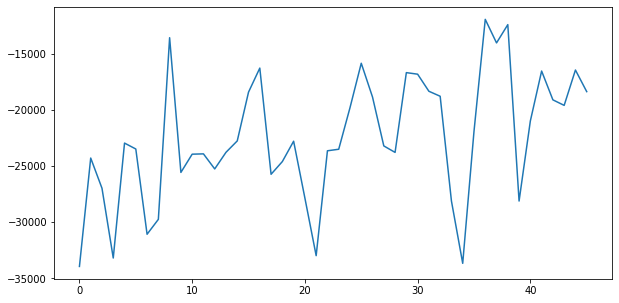

s: [0 0 4], mu: [25.154165  27.523945   2.8843064], a: [[25. 25.  5.]], exp_td_error: [30.], newMu: [25.05102   27.14508    2.9281347]

s: [ 0 15  4], mu: [16.560154  16.092947   1.8619525], a: [[18. 15.  5.]], exp_td_error: [4.89054571], newMu: [16.356478  15.717173   1.8753083]

s: [ 3 20  4], mu: [8.937727  9.1844    1.1502609], a: [[ 7. 10.  4.]], exp_td_error: [8.52230458], newMu: [8.850599  9.064333  1.1684731]

s: [ 0 20  4], mu: [10.934403  10.329255   1.3295999], a: [[10. 10.  5.]], exp_td_error: [6.80173881], newMu: [10.775717  10.166735   1.3485076]

s: [ 0 20  4], mu: [10.775717  10.166735   1.3485076], a: [[15.  5.  0.]], exp_td_error: [3.13295517], newMu: [10.628612  10.0085535  1.3629119]

s: [10 15  0], mu: [ 3.818972  13.958066   1.6727929], a: [[3. 8. 0.]], exp_td_error: [13.99448756], newMu: [ 3.7757866 13.706855   1.6705927]

s: [ 5 13  0], mu: [ 9.332206  11.645971   1.6465669], a: [[ 8. 13.  3.]], exp_td_error: [11.79585929], newMu: [ 9.246272  11.555788   1.66276

s: [11  6  2], mu: [ 2.8334548 12.682892   1.8935676], a: [[ 0. 11.  0.]], exp_td_error: [6.18961753], newMu: [ 2.8455768 12.508799   1.9195032]

s: [0 7 0], mu: [22.715746  20.17895    2.8172693], a: [[30. 23.  0.]], exp_td_error: [30.], newMu: [23.422194  20.611855   2.8265014]

s: [ 7 20  0], mu: [4.6119633 8.45065   1.5911458], a: [[ 8. 10.  0.]], exp_td_error: [9.99717433], newMu: [4.8272896 8.370719  1.5754874]

s: [ 5 20  0], mu: [6.065833  7.074169  1.3096111], a: [[ 7. 10.  5.]], exp_td_error: [2.43972002], newMu: [6.221241  7.063569  1.3005837]

s: [12 10  4], mu: [ 3.2065122 12.092543   1.9285805], a: [[ 9. 12.  4.]], exp_td_error: [6.9625347], newMu: [ 3.3238883 12.038777   1.9441245]

s: [ 9 12  4], mu: [ 5.024293  11.598501   1.9589255], a: [[7. 5. 2.]], exp_td_error: [3.26535776], newMu: [ 5.156061  11.574859   1.9678161]

s: [11  7  2], mu: [ 3.3858619 12.042849   1.963067 ], a: [[9. 7. 5.]], exp_td_error: [4.7034852], newMu: [ 3.5095613 11.951896   1.9810623]

s: [13  

s: [ 0 18  0], mu: [10.531269  10.131671   0.7596468], a: [[9. 9. 0.]], exp_td_error: [10.36623686], newMu: [10.535632   10.199163    0.76175165]

s: [ 0 17  0], mu: [10.985377  10.583491   0.7735703], a: [[10.  5.  5.]], exp_td_error: [1.85494763], newMu: [10.974332  10.630876   0.7769408]

s: [10  7  4], mu: [14.1117735 17.432602   1.7033103], a: [[18. 18.  4.]], exp_td_error: [1.51902041], newMu: [14.115625  17.592049   1.7199426]

s: [10 15  4], mu: [ 7.8729887 12.797244   1.6757343], a: [[ 5. 15.  5.]], exp_td_error: [16.44446655], newMu: [ 7.800932  12.953029   1.7093465]

s: [ 0 20  4], mu: [8.760658  8.779117  0.7070315], a: [[9. 9. 0.]], exp_td_error: [10.1070154], newMu: [8.77122    8.830124   0.71688914]

s: [ 0 19  0], mu: [9.727604   9.700497   0.76312494], a: [[11. 11.  0.]], exp_td_error: [10.33589019], newMu: [9.878809  9.881179  0.7784766]

s: [ 0 20  0], mu: [8.992821  9.086547  0.7409443], a: [[16. 10.  4.]], exp_td_error: [1.04695529], newMu: [9.187314  9.297907  0.

s: [ 6 17  4], mu: [7.9165072 9.271789  1.234105 ], a: [[ 6. 12.  0.]], exp_td_error: [16.25665633], newMu: [7.9497137 9.428683  1.2781378]

s: [ 0 19  0], mu: [10.046758  9.908201  1.098957], a: [[10. 10.  0.]], exp_td_error: [10.33433994], newMu: [10.098256   9.950228   1.1127721]

s: [ 0 19  0], mu: [10.098256   9.950228   1.1127721], a: [[11.  7.  0.]], exp_td_error: [6.55827553], newMu: [10.1285925  9.959386   1.1206601]

s: [ 4 16  0], mu: [ 9.118751  10.546554   1.3981754], a: [[13. 14.  0.]], exp_td_error: [9.7610936], newMu: [ 9.445531 10.905794  1.441855]

s: [ 3 20  0], mu: [8.063433  8.706636  1.0845875], a: [[9. 8. 5.]], exp_td_error: [2.04949835], newMu: [8.234009  8.909319  1.1148459]

s: [12 10  4], mu: [ 6.403194 14.565114  2.552246], a: [[0. 5. 4.]], exp_td_error: [4.08902733], newMu: [ 6.3157053 14.466803   2.5505815]

s: [7 5 4], mu: [17.627893 23.613178  3.174014], a: [[17. 24.  0.]], exp_td_error: [30.], newMu: [17.58193   23.538662   3.1015995]

s: [ 0 19  0], mu

s: [24 10  4], mu: [ 2.529215  11.859929   1.9762299], a: [[0. 7. 0.]], exp_td_error: [6.27038912], newMu: [ 2.4959059 11.754269   1.9610956]

s: [17  7  0], mu: [ 3.5239437 11.300458   1.9226807], a: [[ 2. 11.  5.]], exp_td_error: [3.89912574], newMu: [ 3.4881334 11.224554   1.9129221]

s: [8 8 4], mu: [21.760149  23.996632   2.7271483], a: [[18. 20.  1.]], exp_td_error: [30.], newMu: [20.265514 22.617176  2.595651]

s: [ 6 18  0], mu: [8.825812  9.324415  1.1895307], a: [[ 8. 11.  0.]], exp_td_error: [11.52700011], newMu: [8.535644  9.058096  1.1523325]

s: [ 3 19  0], mu: [9.785698  9.369579  1.0147681], a: [[7. 2. 1.]], exp_td_error: [4.94704303], newMu: [9.258839  8.940401  0.9707583]

s: [ 8 11  0], mu: [13.687073  15.723798   1.9295943], a: [[19.  7.  0.]], exp_td_error: [0.96977918], newMu: [12.543474  14.901217   1.8797119]

s: [20  8  0], mu: [ 2.4596272 10.7860365  1.7837129], a: [[1. 4. 5.]], exp_td_error: [2.9250043], newMu: [ 2.3689928 10.661069   1.7621659]

s: [17  2  4

s: [13  2  2], mu: [3.336448  8.891729  1.1722262], a: [[0. 8. 0.]], exp_td_error: [3.79174533], newMu: [3.7452943 9.090066  1.1743942]

s: [5 0 0], mu: [17.720531  16.597725   0.4645745], a: [[24. 20.  2.]], exp_td_error: [30.], newMu: [18.595366   17.295927    0.45660442]

s: [ 9 10  2], mu: [3.714027  8.677853  1.1554509], a: [[ 4. 10.  5.]], exp_td_error: [12.1798106], newMu: [3.945018  8.7891865 1.1720355]

s: [ 3 10  4], mu: [11.877295  11.220096   0.5313922], a: [[22.  0.  5.]], exp_td_error: [0.53041624], newMu: [12.211085  11.50572    0.5451525]

s: [25  0  4], mu: [2.7792659 9.211811  1.2086611], a: [[ 0. 10.  4.]], exp_td_error: [15.76975434], newMu: [3.09657   9.382683  1.2472068]

s: [15  0  4], mu: [14.627649   15.029865    0.85658365], a: [[15. 10.  5.]], exp_td_error: [2.80514927], newMu: [15.302304 15.443002  0.852265]

s: [20  0  4], mu: [ 9.70307  12.917878  1.249059], a: [[ 5. 15.  0.]], exp_td_error: [7.90884639], newMu: [ 9.63339   12.925968   1.2783928]

s: [10  

s: [ 3 14  2], mu: [12.310561  12.610399   1.2122014], a: [[9. 4. 5.]], exp_td_error: [1.50276626], newMu: [12.182064  12.556361   1.2363956]

s: [8 8 4], mu: [ 8.08267   11.845418   1.8321205], a: [[2. 6. 0.]], exp_td_error: [30.], newMu: [ 7.6238384 11.580715   1.843155 ]

s: [4 4 0], mu: [22.20896   21.42308    1.4023272], a: [[26. 20.  0.]], exp_td_error: [30.], newMu: [22.270964  21.375048   1.3479738]

s: [10 14  0], mu: [4.0497046 9.963768  1.907028 ], a: [[2. 7. 0.]], exp_td_error: [13.89964562], newMu: [3.8977273 9.8922615 1.8913847]

s: [ 5 11  0], mu: [ 9.639799 12.318806  1.646477], a: [[11. 15.  0.]], exp_td_error: [13.05929002], newMu: [ 9.501204  12.214697   1.6229968]

s: [ 1 16  0], mu: [15.588235  14.5011215  0.8790331], a: [[10. 11.  0.]], exp_td_error: [10.82850958], newMu: [14.83737   13.78051    0.8289262]

s: [ 0 17  0], mu: [15.945051  14.561602   0.7628742], a: [[13. 13.  0.]], exp_td_error: [10.40772023], newMu: [15.018398  13.675017   0.7050036]

(array([35.7

s: [ 0 20  4], mu: [7.9459953 8.122573  1.0964525], a: [[14.  7.  0.]], exp_td_error: [4.5068297], newMu: [8.220116 8.283924 1.116313]

s: [ 7 17  0], mu: [ 5.78998   10.561138   2.0203726], a: [[8. 7. 5.]], exp_td_error: [4.69658409], newMu: [ 5.898406  10.533479   2.0434127]

s: [ 8 14  4], mu: [ 6.1525617 11.453718   2.187432 ], a: [[ 8. 16.  0.]], exp_td_error: [20.23071818], newMu: [ 6.3308263 11.582635   2.2216482]

s: [ 0 20  0], mu: [8.696411  8.715741  1.2082269], a: [[13.  5.  0.]], exp_td_error: [4.07593526], newMu: [8.983615  8.902757  1.2259206]

s: [ 8 15  0], mu: [ 6.3031006 11.624301   2.24846  ], a: [[ 9. 10.  0.]], exp_td_error: [8.81141106], newMu: [ 6.4645967 11.682235   2.2634003]

s: [ 7 15  0], mu: [ 6.685468  11.321894   2.1886632], a: [[ 9. 11.  0.]], exp_td_error: [9.984968], newMu: [ 6.850637 11.375736  2.196986]

s: [ 5 16  0], mu: [ 7.413134  10.009356   1.8145688], a: [[12.  9.  0.]], exp_td_error: [5.83391688], newMu: [ 7.6011047 10.043138   1.8041056]

s

s: [10  8  0], mu: [ 7.4871464 14.54132    2.2138422], a: [[16. 12.  0.]], exp_td_error: [1.35442362], newMu: [ 7.525043 14.648496  2.234549]

s: [14 10  0], mu: [ 6.7095    15.784787   2.4435947], a: [[ 4. 13.  3.]], exp_td_error: [30.], newMu: [ 6.6121054 15.691319   2.4527638]

s: [ 5 13  2], mu: [ 9.08311   13.054768   1.8081052], a: [[9. 9. 0.]], exp_td_error: [8.31538097], newMu: [ 9.0225315 12.848121   1.7802992]

s: [ 5 12  0], mu: [ 9.748294  13.832852   1.8843119], a: [[ 6. 11.  5.]], exp_td_error: [2.50891229], newMu: [ 9.678265  13.650393   1.8642703]

s: [11  2  4], mu: [ 8.015302  14.279559   2.1760952], a: [[ 7. 10.  0.]], exp_td_error: [2.88471911], newMu: [ 7.9530816 14.2074175  2.1758084]

s: [8 2 0], mu: [ 8.327401  14.083468   2.1272497], a: [[ 9. 13.  1.]], exp_td_error: [20.32428546], newMu: [ 8.282981  14.004294   2.1166484]

s: [4 5 0], mu: [18.694696  19.251013   1.6732938], a: [[22. 19.  0.]], exp_td_error: [30.], newMu: [18.93628   19.337963   1.6168345]

s: 

s: [3 7 0], mu: [22.548677   21.701012    0.54821885], a: [[22. 20.  0.]], exp_td_error: [30.], newMu: [22.334063  21.479115   0.5407437]

s: [ 5 17  0], mu: [5.326464  8.868246  1.0297455], a: [[4. 9. 2.]], exp_td_error: [12.18455234], newMu: [5.1571803 8.868474  1.0524721]

s: [ 0 16  2], mu: [11.271845   10.74498     0.46637908], a: [[19.  3.  0.]], exp_td_error: [0.93199709], newMu: [11.017907  10.543069   0.4765994]

s: [16  9  0], mu: [ 1.9185679 13.2303095  1.450904 ], a: [[ 1. 10.  5.]], exp_td_error: [1.55524617], newMu: [ 1.8375312 13.20514    1.4491358]

s: [7 9 4], mu: [ 4.542219  11.633875   1.3050559], a: [[ 5. 12.  0.]], exp_td_error: [30.], newMu: [ 4.463645  11.625144   1.2949525]

s: [ 0 11  0], mu: [22.174252   20.574385    0.36604464], a: [[26. 19.  3.]], exp_td_error: [3.82979333], newMu: [22.120855   20.500582    0.36240828]

s: [ 7 20  2], mu: [3.5984595 9.028858  1.1311148], a: [[12. 10.  0.]], exp_td_error: [6.24758113], newMu: [3.61129   9.005465  1.1228291]



s: [30  1  4], mu: [ 4.809588  21.58203    3.4397402], a: [[ 0. 17.  4.]], exp_td_error: [30.], newMu: [ 4.4770784 20.432392   3.3326495]

s: [13  8  4], mu: [ 6.4506865 15.893834   2.6330574], a: [[ 2. 15.  0.]], exp_td_error: [5.01195012], newMu: [ 6.3150196 15.481985   2.601704 ]

s: [ 0 13  0], mu: [19.54875   18.448933   1.6815777], a: [[23. 17.  5.]], exp_td_error: [0.44364534], newMu: [19.445353  18.32877    1.6896077]

s: [23  3  4], mu: [ 4.4658456 16.960667   2.9001443], a: [[ 0. 13.  4.]], exp_td_error: [19.35316764], newMu: [ 4.1414094 16.157207   2.8221169]

s: [10  6  4], mu: [ 8.096447  14.882202   2.5041482], a: [[ 4. 14.  1.]], exp_td_error: [6.05988211], newMu: [ 7.955085  14.591411   2.4891486]

s: [ 0 10  0], mu: [25.520313  23.844261   2.0671916], a: [[29. 20.  0.]], exp_td_error: [9.27572314], newMu: [25.41287   23.639248   2.0400767]

s: [ 9 20  0], mu: [6.160535  9.388445  1.6551002], a: [[ 6. 10.  0.]], exp_td_error: [12.31645926], newMu: [6.1293235 9.152142  1

s: [ 2 11  0], mu: [15.238658  15.115638   1.7913313], a: [[15. 12.  3.]], exp_td_error: [5.38936342], newMu: [14.921014  14.778559   1.7355981]

s: [ 5 13  2], mu: [ 7.943372  10.873543   1.7659452], a: [[8. 7. 0.]], exp_td_error: [6.24209004], newMu: [ 7.82377   10.621355   1.7088817]

s: [ 6 10  0], mu: [ 9.2272    13.840919   2.2275515], a: [[14. 12.  2.]], exp_td_error: [11.89243735], newMu: [ 9.274447  13.827709   2.1998112]

s: [ 8 12  2], mu: [ 6.4315615 12.527818   2.225021 ], a: [[10. 18.  5.]], exp_td_error: [13.35674123], newMu: [ 6.6365786 12.617851   2.222278 ]

s: [ 0 20  4], mu: [5.814466 5.700883 0.909783], a: [[6. 6. 3.]], exp_td_error: [8.29070534], newMu: [5.820154  5.699798  0.9067322]

s: [ 0 16  2], mu: [7.37617    7.175079   0.99476814], a: [[8. 6. 3.]], exp_td_error: [6.7908799], newMu: [7.3798738  7.1697264  0.99253905]

s: [ 2 12  2], mu: [10.644969  10.612717   1.3444445], a: [[19. 10.  0.]], exp_td_error: [3.1536251], newMu: [10.91481   10.795934   1.340280

s: [ 0 18  4], mu: [6.388686  6.1620455 0.9067783], a: [[14.  4.  0.]], exp_td_error: [3.14282585], newMu: [6.9304605  6.618467   0.91528654]

s: [10 12  0], mu: [ 6.1070104 13.001128   2.1920629], a: [[ 8. 18.  2.]], exp_td_error: [20.41624532], newMu: [ 6.519852  13.222405   2.2096076]

s: [ 0 20  2], mu: [6.266892  6.0601645 0.9052308], a: [[2. 0. 5.]], exp_td_error: [5.14898267], newMu: [6.5221014 6.284435  0.9137267]

s: [ 2 10  4], mu: [21.336933  20.367926   1.8658164], a: [[20.  9.  1.]], exp_td_error: [1.96560941], newMu: [21.461971  20.477095   1.8728132]

s: [13  9  0], mu: [ 5.06993   13.159606   2.2386754], a: [[11. 21.  2.]], exp_td_error: [0.80408917], newMu: [ 5.407726 13.364461  2.259444]

s: [ 3 20  2], mu: [6.190048   6.0694027  0.92478704], a: [[13.  4.  5.]], exp_td_error: [2.0768399], newMu: [6.350424  6.2069964 0.9306381]

s: [12 14  4], mu: [ 5.7499394 13.495099   2.269537 ], a: [[ 4. 16.  0.]], exp_td_error: [30.], newMu: [ 5.838134  13.642242   2.2634604]

s: 

s: [ 7 11  0], mu: [7.724749   6.820261   0.74259555], a: [[11. 10.  5.]], exp_td_error: [1.39679267], newMu: [7.6013875  6.687024   0.72993374]

s: [18  1  4], mu: [2.4665077 9.729372  1.3568997], a: [[1. 9. 5.]], exp_td_error: [10.26295486], newMu: [2.3742888 9.718804  1.3619809]

s: [10  0  4], mu: [13.298527   11.607113    0.96207386], a: [[ 8. 11.  0.]], exp_td_error: [0.90358753], newMu: [13.119548   11.451383    0.95794034]

s: [7 1 0], mu: [9.545361  9.743805  1.1213276], a: [[6. 9. 4.]], exp_td_error: [27.60042327], newMu: [8.905613 9.561205 1.168077]

s: [4 0 4], mu: [16.497322   13.289968    0.83672965], a: [[14. 18.  0.]], exp_td_error: [21.06180285], newMu: [16.29502    13.187691    0.85308045]

s: [0 8 0], mu: [15.082846  11.849988   0.7159981], a: [[10. 10.  0.]], exp_td_error: [30.], newMu: [14.564645  11.47474    0.7153605]

s: [0 8 0], mu: [14.564645  11.47474    0.7153605], a: [[18. 12.  0.]], exp_td_error: [30.], newMu: [14.289467  11.266546   0.7054779]

s: [ 6 10 

s: [4 4 4], mu: [14.264671  14.018303   2.7342756], a: [[14. 16.  5.]], exp_td_error: [30.], newMu: [14.296047  14.089052   2.7688336]

s: [ 2 10  4], mu: [8.928313  8.395572  1.7804978], a: [[ 9. 11.  5.]], exp_td_error: [10.70852556], newMu: [8.983317 8.470294 1.809585]

s: [ 0 11  4], mu: [9.826003  8.9667425 1.8773073], a: [[14. 14.  3.]], exp_td_error: [8.53854687], newMu: [10.024708   9.176857   1.9279524]

s: [ 0 15  2], mu: [7.1665564 6.6990147 1.5355572], a: [[8. 7. 0.]], exp_td_error: [9.28542251], newMu: [7.266056  6.807011  1.5620944]

s: [ 1 12  0], mu: [8.997296  8.440905  1.8315349], a: [[7. 0. 1.]], exp_td_error: [0.86449213], newMu: [9.07325   8.526021  1.8573433]

s: [8 2 0], mu: [ 5.5800447 12.040172   2.6096056], a: [[5. 9. 4.]], exp_td_error: [29.77088416], newMu: [ 5.647188  12.026381   2.6296253]

s: [4 1 4], mu: [16.356728 16.126823  3.238174], a: [[16.  9.  0.]], exp_td_error: [14.09080031], newMu: [16.262632  15.979359   3.2157104]

s: [11  0  0], mu: [ 4.0254

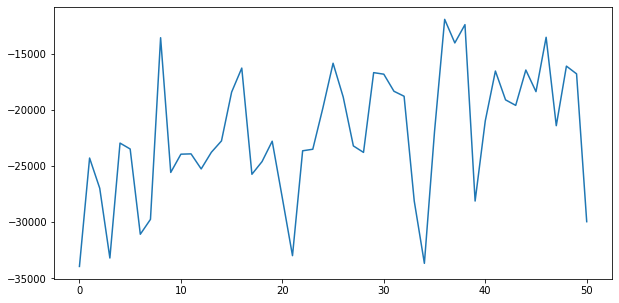

s: [0 0 4], mu: [17.777761  15.669333   1.9562395], a: [[21. 21.  0.]], exp_td_error: [30.], newMu: [18.134089  15.969423   1.9721391]

s: [ 0 11  0], mu: [15.410788  13.31747    1.7215708], a: [[15. 10.  3.]], exp_td_error: [4.90743536], newMu: [15.61246   13.483286   1.7313457]

s: [ 5 11  2], mu: [7.555464  9.720792  1.6995075], a: [[5. 8. 0.]], exp_td_error: [2.24616152], newMu: [7.6203723 9.745785  1.701858 ]

s: [2 9 0], mu: [14.717583  13.019341   1.7174156], a: [[16.  9.  0.]], exp_td_error: [9.04947843], newMu: [14.841824 13.103459  1.713357]

s: [9 8 0], mu: [ 4.5910964 11.8274765  1.9696516], a: [[ 1. 10.  5.]], exp_td_error: [16.16846515], newMu: [ 4.575301  11.819582   1.9865705]

s: [0 8 4], mu: [17.834326  15.523706   1.8842558], a: [[16. 14.  2.]], exp_td_error: [30.], newMu: [17.814098  15.491441   1.8846555]

s: [ 2 12  2], mu: [12.250077  10.713943   1.4309957], a: [[11.  7.  0.]], exp_td_error: [1.29576492], newMu: [12.21512   10.668059   1.4270905]

s: [6 9 0], mu:

s: [7 0 4], mu: [9.935631  9.674977  2.0786908], a: [[ 6. 10.  0.]], exp_td_error: [26.3577976], newMu: [9.86049   9.66521   2.0858722]

s: [3 0 0], mu: [12.6576605 10.529833   1.9338323], a: [[14. 14.  2.]], exp_td_error: [18.47217241], newMu: [12.687226  10.571021   1.9429885]

s: [3 4 2], mu: [11.220782  9.640867  1.876014], a: [[12. 13.  0.]], exp_td_error: [15.88092722], newMu: [11.254208  9.693567  1.878631]

s: [2 7 0], mu: [11.42646    9.506898   1.8089652], a: [[9. 7. 0.]], exp_td_error: [15.04292452], newMu: [11.422317   9.519679   1.7992352]

s: [4 4 0], mu: [9.8802805 9.1428175 1.8980459], a: [[ 9. 13.  0.]], exp_td_error: [19.1055704], newMu: [9.878861  9.187175  1.8912885]

s: [0 7 0], mu: [12.498406  10.217615   1.8371089], a: [[11. 11.  0.]], exp_td_error: [21.76303877], newMu: [12.476468  10.242687   1.8107151]

s: [0 8 0], mu: [12.135934   9.921622   1.7705649], a: [[25.  4.  0.]], exp_td_error: [6.84118119], newMu: [12.169422   9.948959   1.7446117]

s: [21  2  0], m

s: [6 2 0], mu: [7.4320083 8.831321  2.3275964], a: [[2. 8. 5.]], exp_td_error: [30.], newMu: [7.3052096 8.809254  2.3544059]

s: [0 0 4], mu: [13.355735  11.333622   2.4092233], a: [[24. 18.  2.]], exp_td_error: [8.86683633], newMu: [13.387677  11.358397   2.4387586]

s: [6 8 2], mu: [7.265169 8.524627 2.284893], a: [[14.  2.  5.]], exp_td_error: [30.], newMu: [7.3630314 8.364151  2.2546923]

s: [18  0  4], mu: [ 3.0315561 10.300152   2.8659508], a: [[ 5. 10.  5.]], exp_td_error: [8.71649547], newMu: [ 3.0668697 10.250189   2.8842356]

s: [13  0  4], mu: [4.5609474 9.481332  2.7340121], a: [[ 6. 10.  0.]], exp_td_error: [3.55540027], newMu: [4.611531  9.432319  2.7458873]

s: [9 0 0], mu: [5.719463  9.038973  2.6287427], a: [[ 4. 13.  0.]], exp_td_error: [10.94438969], newMu: [5.740984  9.01588   2.6369994]

s: [0 3 0], mu: [13.752976  11.264752   2.5247545], a: [[10.  8.  0.]], exp_td_error: [12.41661389], newMu: [13.705843 11.195901  2.523829]

s: [2 1 0], mu: [12.916571  10.765253 

s: [11 15  0], mu: [ 5.7021227 11.828043   3.477134 ], a: [[4. 7. 2.]], exp_td_error: [8.76782965], newMu: [ 5.713872  11.864706   3.4975677]

s: [ 8 12  2], mu: [ 7.0166335 10.843177   3.21841  ], a: [[2. 4. 0.]], exp_td_error: [1.99055797], newMu: [ 7.020211 10.944147  3.256372]

s: [6 6 0], mu: [ 8.058794  11.157671   3.2721937], a: [[10. 13.  4.]], exp_td_error: [26.69825528], newMu: [ 8.107302  11.227569   3.3003256]

s: [3 9 4], mu: [12.745207  12.228443   3.1600459], a: [[15. 15.  3.]], exp_td_error: [30.], newMu: [12.909706  12.452871   3.2237437]

s: [ 3 14  2], mu: [10.642809   9.801838   2.5306823], a: [[13. 14.  5.]], exp_td_error: [6.72408883], newMu: [10.951143  10.183652   2.6313772]

s: [ 2 18  4], mu: [10.714596   9.552157   2.4688828], a: [[ 9. 10.  5.]], exp_td_error: [7.00479042], newMu: [10.960812   9.836272   2.5416207]

s: [ 1 18  4], mu: [12.363177  11.160113   2.8443456], a: [[15. 10.  0.]], exp_td_error: [5.31582206], newMu: [12.675695  11.57318    2.9571118]


s: [ 3 14  2], mu: [11.222339  10.244702   1.8137327], a: [[10. 13.  0.]], exp_td_error: [12.52722776], newMu: [11.19291   10.222465   1.7928283]

s: [ 0 17  0], mu: [13.570653  11.987183   2.0502923], a: [[15. 13.  0.]], exp_td_error: [8.33667711], newMu: [13.590969 12.009793  2.027357]

s: [ 2 20  0], mu: [10.730109   9.54568    1.6615517], a: [[13. 10.  0.]], exp_td_error: [6.47850258], newMu: [10.7404585  9.5497055  1.6411258]

s: [ 5 20  0], mu: [9.417827  9.002545  1.6249024], a: [[4. 7. 0.]], exp_td_error: [11.89101292], newMu: [9.258558  8.888559  1.5937724]

s: [ 2 17  0], mu: [11.053453   9.825473   1.6673474], a: [[13.  7.  5.]], exp_td_error: [1.3080683], newMu: [10.995299   9.783376   1.6421607]

s: [15  7  4], mu: [ 2.5098815 12.183455   2.141961 ], a: [[0. 5. 5.]], exp_td_error: [7.6496167], newMu: [ 2.4077291 12.083122   2.1128175]

s: [10  2  4], mu: [ 5.3278646 11.602976   2.2322278], a: [[3. 8. 5.]], exp_td_error: [10.77388312], newMu: [ 5.2101364 11.515033   2.21477

s: [5 0 0], mu: [11.929936  11.209673   1.8105314], a: [[11. 10.  2.]], exp_td_error: [15.35889733], newMu: [11.828102  11.160287   1.8266962]

s: [6 0 2], mu: [10.179123  10.527631   1.8839655], a: [[17. 17.  4.]], exp_td_error: [28.75641055], newMu: [10.832389  10.823338   1.9102242]

s: [6 7 4], mu: [8.528663  9.0355015 1.7048247], a: [[ 9. 11.  3.]], exp_td_error: [14.1480943], newMu: [8.620193 9.115705 1.735417]

s: [4 8 2], mu: [11.980024  10.573596   1.6698278], a: [[14. 18.  5.]], exp_td_error: [30.], newMu: [12.877274  11.314464   1.7972794]

s: [ 0 16  4], mu: [15.381018  12.315891   1.8325527], a: [[14. 14.  2.]], exp_td_error: [8.38956886], newMu: [16.021433 12.923788  1.961806]

s: [ 0 20  2], mu: [13.95304   10.99837    1.7465273], a: [[18.  4.  5.]], exp_td_error: [1.30598635], newMu: [14.561396  11.575193   1.8644617]

s: [14 14  4], mu: [ 3.1892774 10.058618   2.0774856], a: [[ 0. 13.  0.]], exp_td_error: [30.], newMu: [ 3.1782877 10.151483   2.0977266]

s: [ 1 17  0],

s: [ 3 12  4], mu: [13.203866  10.517082   1.5359588], a: [[16.  2.  2.]], exp_td_error: [0.91076569], newMu: [13.332638  10.585496   1.5451636]

s: [17  4  2], mu: [ 1.7475624 16.95637    3.6088867], a: [[ 0. 14.  0.]], exp_td_error: [5.9084477], newMu: [ 1.98471   17.000793   3.5931146]

s: [3 8 0], mu: [13.050174  10.731625   1.5532713], a: [[12. 10.  0.]], exp_td_error: [20.17982878], newMu: [13.07776   10.718876   1.5372043]

s: [5 8 0], mu: [11.85076   10.647909   1.6297022], a: [[13. 12.  2.]], exp_td_error: [30.], newMu: [12.0494585 10.775485   1.629281 ]

s: [ 6 10  2], mu: [10.869943   9.1725645  1.3602548], a: [[15.  6.  0.]], exp_td_error: [1.41741086], newMu: [10.984809   9.211061   1.3541917]

s: [15  6  0], mu: [ 2.749366  16.151886   3.3436408], a: [[ 2. 16.  5.]], exp_td_error: [2.7024083], newMu: [ 2.9124131 16.17206    3.3302567]

s: [ 1 12  4], mu: [14.4650955 11.232808   1.583226 ], a: [[28. 12.  0.]], exp_td_error: [1.4488982], newMu: [14.593524  11.311168   1.583

s: [ 2 19  0], mu: [10.088342   7.026697   1.0715172], a: [[14.  6.  0.]], exp_td_error: [3.58791768], newMu: [10.168333   7.095248   1.0932276]

s: [10 15  0], mu: [ 5.240616 14.702056  2.012791], a: [[ 3. 13.  5.]], exp_td_error: [3.47784479], newMu: [ 5.3466682 14.812946   2.0449023]

s: [13  5  4], mu: [ 5.3234    16.598524   2.1545486], a: [[12. 19.  0.]], exp_td_error: [2.62241674], newMu: [ 5.4400377 16.754791   2.1864488]

s: [ 6 14  0], mu: [7.993734  7.500787  1.3316152], a: [[2. 3. 0.]], exp_td_error: [1.76959528], newMu: [8.044273  7.5987463 1.3542789]

s: [5 7 0], mu: [11.212814   9.728974   1.6075398], a: [[ 9. 14.  0.]], exp_td_error: [30.], newMu: [11.177234   9.963901   1.6525553]

s: [ 0 11  0], mu: [12.846391   8.952347   1.3906344], a: [[16. 16.  0.]], exp_td_error: [10.50986835], newMu: [12.950375   9.108929   1.3952626]

s: [ 0 17  0], mu: [12.490116   8.664962   1.3584164], a: [[14.  8.  5.]], exp_td_error: [1.31035863], newMu: [12.581632  8.802394  1.363817]

s:

s: [11  3  2], mu: [ 6.2304296 13.022224   1.6605507], a: [[7. 7. 0.]], exp_td_error: [3.84714195], newMu: [ 6.211009  13.000379   1.6494641]

s: [11  0  0], mu: [ 6.073181  13.212477   1.6291229], a: [[14. 17.  1.]], exp_td_error: [0.36197254], newMu: [ 6.0577364 13.191848   1.6191213]

s: [8 7 0], mu: [ 7.542079  12.236545   1.7159756], a: [[1. 9. 5.]], exp_td_error: [30.], newMu: [ 7.3503094 12.181197   1.7249551]

s: [0 6 4], mu: [22.112238  16.683342   2.1190872], a: [[27. 19.  0.]], exp_td_error: [30.], newMu: [22.703306  17.108644   2.1315255]

s: [ 8 15  0], mu: [ 6.083726  11.62963    1.6157045], a: [[ 7. 15.  0.]], exp_td_error: [19.71210305], newMu: [ 6.044755  11.869208   1.6193682]

s: [ 0 20  0], mu: [11.409936   8.630343   1.2832489], a: [[20. 10.  5.]], exp_td_error: [0.65101374], newMu: [11.490218   8.695568   1.2744758]

s: [20 10  4], mu: [ 5.088274  15.215012   1.5889677], a: [[ 0. 20.  5.]], exp_td_error: [30.], newMu: [ 4.973492  15.659731   1.6538454]

s: [ 0 20 

s: [ 8 11  0], mu: [ 4.7048182 11.485319   2.0807028], a: [[ 6. 13.  0.]], exp_td_error: [17.9635082], newMu: [ 4.793592  11.516468   2.0687366]

s: [ 1 14  0], mu: [11.112147 10.915358  1.833195], a: [[11. 12.  0.]], exp_td_error: [10.89019561], newMu: [11.011393  10.907441   1.8181059]

s: [ 0 16  0], mu: [10.562109  10.128734   1.6668775], a: [[10. 10.  5.]], exp_td_error: [1.86347615], newMu: [10.331821   9.955903   1.6329501]

s: [10  6  4], mu: [ 4.83696   11.939037   2.0587826], a: [[1. 4. 0.]], exp_td_error: [4.77777136], newMu: [ 4.90039   11.95255    2.0457394]

s: [7 0 0], mu: [ 7.3522816 12.500717   2.2324538], a: [[ 8. 12.  0.]], exp_td_error: [21.31015763], newMu: [ 7.5419216 12.531841   2.2118902]

s: [3 2 0], mu: [18.9841    17.66516    2.3880532], a: [[16. 15.  0.]], exp_td_error: [11.55372692], newMu: [18.890831  17.578508   2.3179011]

s: [4 7 0], mu: [12.778236 13.675569  2.169986], a: [[16. 10.  3.]], exp_td_error: [16.68215565], newMu: [12.774187  13.589757   2.11

s: [ 9 16  2], mu: [ 7.350363  10.738277   1.5179724], a: [[5. 9. 5.]], exp_td_error: [8.44961666], newMu: [ 7.3163548 10.767221   1.5124886]

s: [ 5 15  4], mu: [10.774764  12.064636   1.3680013], a: [[13.  8.  5.]], exp_td_error: [3.03292304], newMu: [10.765451  12.083697   1.3614578]

s: [10 13  4], mu: [ 7.5369973 10.80158    1.50161  ], a: [[0. 9. 5.]], exp_td_error: [14.90372107], newMu: [ 7.3694663 10.746423   1.507012 ]

s: [ 1 12  4], mu: [22.215199  21.870737   1.6984369], a: [[18. 18.  0.]], exp_td_error: [9.67639892], newMu: [21.902443  21.654097   1.6805398]

s: [ 1 20  0], mu: [9.068108  9.815363  1.1243306], a: [[7. 0. 0.]], exp_td_error: [3.41672827], newMu: [8.561876  9.300604  1.0824325]

s: [ 8 10  0], mu: [ 8.591486  12.7603855  1.714612 ], a: [[12. 15.  2.]], exp_td_error: [25.86389204], newMu: [ 8.605063  12.789545   1.7168031]

s: [ 5 15  2], mu: [ 8.642354  10.065739   1.2164887], a: [[ 9. 14.  0.]], exp_td_error: [14.90768075], newMu: [ 8.6521635 10.127763   1.

s: [ 0 15  0], mu: [11.619107  11.704199   1.7762172], a: [[13.  8.  2.]], exp_td_error: [4.86754632], newMu: [11.612206 11.716029  1.772898]

s: [ 5 13  2], mu: [10.552904  11.396921   1.8149511], a: [[13. 14.  0.]], exp_td_error: [9.25084878], newMu: [10.653707  11.526786   1.8233725]

s: [ 4 17  0], mu: [8.486278  9.197448  1.5191014], a: [[6. 4. 3.]], exp_td_error: [5.68396495], newMu: [8.489977 9.215556 1.516814]

s: [ 6 11  2], mu: [11.810565  12.849343   1.9950593], a: [[11. 10.  0.]], exp_td_error: [7.05790315], newMu: [11.802773  12.851535   1.9849834]

s: [ 7 11  0], mu: [10.245078  12.631664   2.0993824], a: [[20. 17.  4.]], exp_td_error: [0.45801864], newMu: [10.243367  12.639382   2.0920281]

s: [27  1  4], mu: [ 4.3657017 12.094576   1.9981833], a: [[1. 9. 1.]], exp_td_error: [8.55030077], newMu: [ 4.3299794 12.018642   1.9817034]

s: [19  0  0], mu: [ 5.0583754 11.461378   1.9780833], a: [[ 0. 13.  5.]], exp_td_error: [9.2654204], newMu: [ 4.9868264 11.419036   1.969729 

s: [5 5 2], mu: [12.93231  11.792656  2.550905], a: [[14. 19.  2.]], exp_td_error: [30.], newMu: [13.00819  11.840314  2.534863]

s: [ 0 14  2], mu: [10.8152275  9.284814   2.0058281], a: [[5. 2. 5.]], exp_td_error: [2.29943124], newMu: [10.819379   9.2483     1.9804075]

s: [3 6 4], mu: [14.845652  12.51327    2.4947944], a: [[21.  4.  2.]], exp_td_error: [4.29875516], newMu: [14.904308  12.512731   2.4736383]

s: [20  0  2], mu: [ 2.5197299 10.369721   2.1868358], a: [[ 0. 11.  0.]], exp_td_error: [5.19814937], newMu: [ 2.5114343 10.366773   2.175653 ]

s: [9 1 0], mu: [6.8191442 9.63147   2.3585505], a: [[ 5. 13.  0.]], exp_td_error: [11.78601164], newMu: [6.779918  9.629992  2.3418868]

s: [1 4 0], mu: [16.549173  13.437651   2.5144415], a: [[20. 11.  0.]], exp_td_error: [8.51858369], newMu: [16.61851   13.448946   2.4809167]

s: [10  5  0], mu: [5.096701 9.494524 2.209415], a: [[13.  5.  1.]], exp_td_error: [6.49669768], newMu: [5.1430864 9.484733  2.1933954]

s: [18  0  0], mu: [

s: [ 0 20  4], mu: [6.436231  5.542688  1.4951123], a: [[10.  2.  4.]], exp_td_error: [2.67020711], newMu: [6.9231644 5.8131285 1.5483611]

s: [ 8 12  4], mu: [5.5270357 8.190112  2.2426155], a: [[ 4. 12.  5.]], exp_td_error: [13.61967696], newMu: [5.9836316 8.5283375 2.3472295]

s: [ 0 14  4], mu: [10.46673    8.057228   2.0124192], a: [[12. 12.  0.]], exp_td_error: [10.293363], newMu: [10.754893   8.314973   2.0903802]

s: [ 0 16  0], mu: [9.590542  7.9726353 2.0493927], a: [[9. 9. 0.]], exp_td_error: [10.43699216], newMu: [9.970931  8.327249  2.1418262]

s: [ 0 15  0], mu: [10.468794   8.775644   2.2422361], a: [[10. 10.  1.]], exp_td_error: [10.46398852], newMu: [10.665482   8.963145   2.2944655]

s: [ 0 15  0], mu: [10.665482   8.963145   2.2944655], a: [[4. 2. 0.]], exp_td_error: [1.59765652], newMu: [10.836695   9.103603   2.3327286]

s: [2 7 0], mu: [14.2315445 11.464517   2.7761433], a: [[13. 15.  0.]], exp_td_error: [30.], newMu: [14.358724  11.659334   2.7900183]

s: [ 0 12 

s: [ 0 14  0], mu: [10.522081  11.2751665  2.5244844], a: [[8. 7. 0.]], exp_td_error: [9.40317263], newMu: [10.529054  11.21292    2.5013578]

s: [ 1 11  0], mu: [12.039477  13.05667    2.8814702], a: [[14. 15.  0.]], exp_td_error: [11.00911785], newMu: [12.115803  13.125212   2.8774285]

s: [ 0 16  0], mu: [10.133966 10.723358  2.377253], a: [[21.  8.  5.]], exp_td_error: [0.57063986], newMu: [10.18665   10.740906   2.3651206]

s: [21  6  4], mu: [ 4.0201283 23.002964   4.4218454], a: [[ 9. 24.  4.]], exp_td_error: [3.7109256], newMu: [ 4.1460686 23.163816   4.440375 ]

s: [ 6 20  4], mu: [ 6.9696846 10.112092   2.4748845], a: [[3. 6. 5.]], exp_td_error: [7.82039178], newMu: [ 6.959395  10.0939865  2.4672282]

s: [ 3 16  4], mu: [10.020884  10.969302   2.4329991], a: [[ 8. 11.  5.]], exp_td_error: [8.30318551], newMu: [10.000271  10.945797   2.4280295]

s: [ 0 17  4], mu: [10.152071   9.9913025  2.1301403], a: [[8. 8. 0.]], exp_td_error: [10.17822488], newMu: [10.119405   9.895553   2

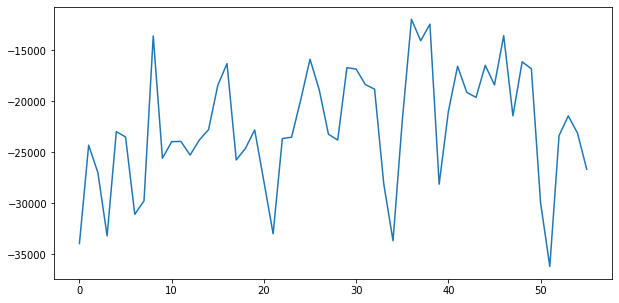

s: [0 0 4], mu: [18.266382  18.952524   3.6845002], a: [[26. 16.  2.]], exp_td_error: [10.23710878], newMu: [18.714876  19.18596    3.6479023]

s: [10  6  2], mu: [ 4.4852962 14.096094   2.9209328], a: [[10. 13.  0.]], exp_td_error: [1.16762678], newMu: [ 4.564638  14.054251   2.8884044]

s: [7 9 0], mu: [ 6.6739993 12.699658   2.8836968], a: [[12. 19.  0.]], exp_td_error: [30.], newMu: [ 7.0159554 12.82523    2.8651118]

s: [ 0 18  0], mu: [10.349284   9.868374   1.9049063], a: [[12. 12.  0.]], exp_td_error: [10.37178538], newMu: [10.5865135 10.027688   1.8787445]

s: [ 0 20  0], mu: [9.9183855 9.393337  1.7814064], a: [[10. 10.  4.]], exp_td_error: [2.13858349], newMu: [10.123691   9.535985   1.7605066]

s: [10 10  4], mu: [ 5.4812436 13.670147   2.7438226], a: [[10. 20.  0.]], exp_td_error: [24.99099425], newMu: [ 5.7635565 13.918958   2.7251778]

s: [ 0 20  0], mu: [10.352984  9.725782  1.739687], a: [[19. 10.  5.]], exp_td_error: [0.73309988], newMu: [10.576269   9.908409   1.7212

s: [7 6 0], mu: [12.089425 13.915242  1.805314], a: [[12. 19.  3.]], exp_td_error: [30.], newMu: [12.157871  13.989945   1.8097396]

s: [ 0 15  2], mu: [11.933389   9.99347    1.1041307], a: [[19.  7.  5.]], exp_td_error: [1.69076339], newMu: [11.902861   9.976157   1.1045997]

s: [12 12  4], mu: [ 6.923063  11.984079   1.6251696], a: [[11.  8.  0.]], exp_td_error: [4.37683027], newMu: [ 6.8868003 11.923291   1.6201706]

s: [15 10  0], mu: [ 4.752765  12.465623   1.4576457], a: [[ 3. 10.  0.]], exp_td_error: [29.73332678], newMu: [ 4.685849  12.333025   1.4336734]

s: [ 8 10  0], mu: [10.095391 12.927493  1.782094], a: [[ 8. 16.  2.]], exp_td_error: [30.], newMu: [ 9.935694  12.908991   1.7780702]

s: [ 0 16  2], mu: [11.43379    9.576322   1.0503845], a: [[10.  4.  0.]], exp_td_error: [4.41256378], newMu: [11.35536    9.524294   1.0426879]

s: [ 6 10  0], mu: [12.080098  13.400715   1.6837666], a: [[14. 20.  3.]], exp_td_error: [30.], newMu: [12.539421  14.330068   1.8032159]

s: [ 0 

s: [15 14  0], mu: [ 3.166151   13.197619    0.95783913], a: [[ 0. 15.  4.]], exp_td_error: [26.74261295], newMu: [ 3.1480062 13.340268   1.0196694]

s: [ 0 19  4], mu: [8.523041   7.3036866  0.89388824], a: [[10.  2.  0.]], exp_td_error: [4.00135981], newMu: [8.393087  7.193918  0.9214458]

s: [ 8 11  0], mu: [ 6.8554845 12.711478   1.490143 ], a: [[11. 19.  3.]], exp_td_error: [16.4258083], newMu: [ 7.374391  13.092496   1.6088253]

s: [ 0 20  2], mu: [7.6104183 6.6033387 0.9246607], a: [[10. 10.  0.]], exp_td_error: [10.18642658], newMu: [7.9439254  6.8596864  0.96487045]

s: [ 0 20  0], mu: [7.5796523 6.615168  0.9600786], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [8.143211  7.0502925 1.0097107]

s: [ 0 20  0], mu: [8.143211  7.0502925 1.0097107], a: [[12.  3.  4.]], exp_td_error: [1.69111799], newMu: [8.547851  7.3604307 1.0527687]

s: [12 10  4], mu: [ 4.3211603 12.717098   1.3896744], a: [[ 5. 16.  5.]], exp_td_error: [17.93613734], newMu: [ 4.505021  12.938098   1

s: [ 4 14  4], mu: [10.9122925  9.449252   1.2876328], a: [[20.  6.  5.]], exp_td_error: [1.06498528], newMu: [10.940423   9.436079   1.2786825]

s: [18 10  4], mu: [ 1.9178203 15.253858   1.354725 ], a: [[ 9. 20.  5.]], exp_td_error: [15.90629941], newMu: [ 2.0854864 15.1648     1.4058348]

s: [ 7 20  4], mu: [4.292061  9.227643  1.3222463], a: [[0. 3. 0.]], exp_td_error: [11.49809133], newMu: [4.382616  8.947234  1.3146878]

s: [ 4 13  0], mu: [10.479734  13.202872   1.9670155], a: [[13. 17.  0.]], exp_td_error: [13.26645054], newMu: [10.866955  13.357925   1.9776729]

s: [ 0 20  0], mu: [9.225102  7.5922046 1.049436 ], a: [[7. 7. 3.]], exp_td_error: [8.45105525], newMu: [9.24766   7.6009135 1.0492586]

s: [ 0 17  2], mu: [10.192188   8.310151   1.0995251], a: [[12.  9.  0.]], exp_td_error: [7.33157526], newMu: [10.245427   8.339448   1.0989817]

s: [ 3 16  0], mu: [9.096952  8.704101  1.3057504], a: [[8. 0. 2.]], exp_td_error: [1.82653509], newMu: [9.260849 8.677751 1.289468]

s: [1

s: [10 20  0], mu: [ 5.3736   10.171649  1.533052], a: [[ 4. 10.  0.]], exp_td_error: [15.37519247], newMu: [ 5.340758  10.204735   1.5181608]

s: [ 4 20  0], mu: [9.803595  7.7085166 1.4044292], a: [[5. 7. 1.]], exp_td_error: [10.93107319], newMu: [9.649828  7.5970216 1.3785998]

s: [ 2 17  0], mu: [12.727943   9.70161    1.6264244], a: [[9. 6. 0.]], exp_td_error: [6.63303533], newMu: [12.466192   9.505441   1.5823667]

s: [ 5 13  0], mu: [14.349146  13.528817   2.3092391], a: [[11. 16.  0.]], exp_td_error: [14.380071], newMu: [13.826569  13.375347   2.2610013]

s: [ 0 19  0], mu: [12.735447   9.481577   1.5231317], a: [[11. 11.  5.]], exp_td_error: [1.8458155], newMu: [12.495432  9.327426  1.483353]

s: [11  9  4], mu: [ 6.014967  12.558025   1.6508412], a: [[ 8. 13.  0.]], exp_td_error: [2.2077991], newMu: [ 5.92161   12.559922   1.6232529]

s: [ 6 12  0], mu: [12.954008  14.514307   2.3756542], a: [[13. 18.  5.]], exp_td_error: [1.09456942], newMu: [12.588107  14.426174   2.3381338

s: [9 3 0], mu: [ 4.288812 11.362398  1.000123], a: [[ 4. 13.  3.]], exp_td_error: [21.04365968], newMu: [ 4.272814 11.283034  1.00418 ]

s: [0 6 2], mu: [20.21803   14.021609   1.6033419], a: [[30. 14.  0.]], exp_td_error: [13.28741412], newMu: [20.394934 14.037573  1.587268]

s: [16 10  0], mu: [ 4.0264173  12.238305    0.98429644], a: [[ 3. 15.  5.]], exp_td_error: [30.], newMu: [ 4.116035  12.80204    1.0635571]

s: [ 4 15  4], mu: [5.0345564 5.635692  0.9103842], a: [[0. 0. 2.]], exp_td_error: [2.08275878], newMu: [4.9535303  5.710882   0.92725015]

s: [4 5 2], mu: [15.457522  12.125693   1.6303118], a: [[21.  6.  0.]], exp_td_error: [4.97434414], newMu: [15.481885 12.071658  1.631176]

s: [19  1  0], mu: [ 5.015007  18.45034    1.3676767], a: [[ 8. 26.  0.]], exp_td_error: [7.25055174], newMu: [ 5.2133255 19.236986   1.4542918]

s: [ 1 17  0], mu: [5.140577  5.2940483 0.9130727], a: [[7. 6. 0.]], exp_td_error: [8.64288355], newMu: [5.1001897 5.3960524 0.923319 ]

s: [ 2 13  0], m

s: [ 3 16  2], mu: [12.621552   8.810137   1.1914124], a: [[12. 12.  3.]], exp_td_error: [7.33412459], newMu: [12.621799   8.817068   1.2134502]

s: [ 3 18  2], mu: [11.418575   7.957588   1.1204195], a: [[13. 12.  0.]], exp_td_error: [8.03112305], newMu: [11.472791   7.9997883  1.137666 ]

s: [ 4 20  0], mu: [10.162384   7.424442   1.0987456], a: [[12. 10.  5.]], exp_td_error: [1.38847533], newMu: [10.215928   7.4408655  1.1106883]

s: [16 10  4], mu: [ 6.945334  14.818543   1.9693334], a: [[14. 12.  0.]], exp_td_error: [5.3195136], newMu: [ 6.817678  14.618725   1.9750963]

s: [18 12  0], mu: [ 6.8170767 15.67194    2.0729043], a: [[ 5. 18.  5.]], exp_td_error: [19.5323109], newMu: [ 6.646844  15.5295515  2.106403 ]

s: [ 5 20  4], mu: [10.598163   7.4260383  1.1150048], a: [[12.  6.  3.]], exp_td_error: [3.33036888], newMu: [10.653315   7.4619484  1.1352003]

(array([32.6813   , 21.229187 ,  2.4514704], dtype=float32), array([30., 14.,  5.], dtype=float32))
s: [0 0 4], mu: [33.26011

s: [7 9 0], mu: [ 9.079834  11.372073   1.5805861], a: [[18. 16.  2.]], exp_td_error: [16.88091587], newMu: [ 9.358751  11.393654   1.5708909]

s: [ 9 15  2], mu: [ 6.5702972 11.123454   1.4105253], a: [[10. 10.  0.]], exp_td_error: [7.80670373], newMu: [ 6.780597  11.001975   1.3910804]

s: [ 9 15  0], mu: [ 6.4164033 11.542318   1.4028839], a: [[15. 10.  0.]], exp_td_error: [4.26808396], newMu: [ 6.6416993 11.488581   1.3902283]

s: [14 15  0], mu: [ 4.709389  12.843012   1.3270787], a: [[ 2. 14.  1.]], exp_td_error: [28.43364717], newMu: [ 4.762253  12.836163   1.3033506]

s: [ 2 19  0], mu: [10.337506   7.9412518  0.9409858], a: [[1. 3. 5.]], exp_td_error: [2.38014725], newMu: [10.340029   7.9576297  0.9315524]

s: [3 9 4], mu: [18.193459  12.377238   1.0616198], a: [[14.  5.  4.]], exp_td_error: [18.63228476], newMu: [17.923748  12.165037   1.0607749]

s: [12  4  4], mu: [ 5.0486565 12.674915   1.2836446], a: [[ 1. 13.  4.]], exp_td_error: [1.45449202], newMu: [ 5.036827  12.64312

s: [17  2  4], mu: [ 3.5853765 12.370085   1.7635309], a: [[4. 9. 5.]], exp_td_error: [8.636605], newMu: [ 3.5000403 12.163865   1.7680784]

s: [12  1  4], mu: [ 3.9826589 10.947149   1.6529337], a: [[ 2. 12.  3.]], exp_td_error: [7.18168909], newMu: [ 3.8981628 10.806273   1.6604712]

s: [2 3 2], mu: [17.613482  12.708664   1.8422916], a: [[15. 11.  5.]], exp_td_error: [15.87595652], newMu: [17.133558  12.4130745  1.8740158]

s: [6 4 4], mu: [12.729811  10.000296   1.7106838], a: [[16. 17.  4.]], exp_td_error: [30.], newMu: [12.872937  10.08845    1.7709739]

s: [ 5 11  4], mu: [13.1645155 10.006743   1.7267786], a: [[11.  3.  0.]], exp_td_error: [1.37538728], newMu: [13.135182  10.024151   1.7820222]

s: [13  4  0], mu: [ 3.938333  10.392685   1.7263329], a: [[0. 6. 1.]], exp_td_error: [3.16397601], newMu: [ 3.9289052 10.3082285  1.7479354]

s: [7 0 0], mu: [6.68643   9.4961405 1.8535048], a: [[ 9. 14.  5.]], exp_td_error: [30.], newMu: [6.788633  9.509836  1.9091406]

s: [2 4 4], mu

s: [10  0  4], mu: [ 5.582734 11.013923  2.306464], a: [[ 4. 13.  0.]], exp_td_error: [1.84399359], newMu: [ 5.6003222 11.042539   2.3287995]

s: [1 3 0], mu: [15.382393  12.318668   2.5344357], a: [[21. 11.  0.]], exp_td_error: [9.81713024], newMu: [15.592439  12.5193     2.5803604]

s: [11  4  0], mu: [ 6.1660657 10.735597   2.3371272], a: [[11.  6.  0.]], exp_td_error: [2.50863378], newMu: [ 6.2166557 10.754017   2.3503673]

s: [16  0  0], mu: [ 3.5408664 12.307937   2.4036593], a: [[ 2. 10.  4.]], exp_td_error: [5.34552551], newMu: [ 3.5467465 12.286042   2.4115565]

s: [8 0 4], mu: [10.400599 10.570732  2.458408], a: [[11. 17.  0.]], exp_td_error: [30.], newMu: [10.734718  10.763554   2.4763942]

s: [2 7 0], mu: [14.793534  12.123405   2.5447617], a: [[14.  8.  0.]], exp_td_error: [8.97684682], newMu: [14.916914  12.268404   2.5467029]

s: [8 5 0], mu: [12.105223 10.767161  2.369858], a: [[ 9. 12.  1.]], exp_td_error: [20.75594578], newMu: [12.137023  10.8665285  2.3639615]

s: [5

s: [14  0  0], mu: [ 3.83434   13.67589    1.8705038], a: [[ 1. 13.  5.]], exp_td_error: [9.84010001], newMu: [ 3.7942688 13.656297   1.8841733]

s: [2 3 4], mu: [15.867612  14.874901   1.4839247], a: [[28. 22.  0.]], exp_td_error: [30.], newMu: [16.407713  15.355124   1.5030966]

s: [ 8 15  0], mu: [ 8.62335   10.868796   1.5712655], a: [[7. 5. 5.]], exp_td_error: [4.09187858], newMu: [ 8.716985  10.926295   1.5694644]

s: [10 10  4], mu: [ 8.609374 11.490157  1.69331 ], a: [[7. 3. 0.]], exp_td_error: [2.13736597], newMu: [ 8.706546  11.539757   1.6904676]

s: [14  3  0], mu: [ 4.3809695 13.575088   1.8961437], a: [[ 0. 12.  3.]], exp_td_error: [7.71473732], newMu: [ 4.405319  13.623051   1.9073148]

s: [2 5 2], mu: [17.587536  16.343155   1.5359932], a: [[13. 14.  1.]], exp_td_error: [15.56590438], newMu: [17.80012   16.53185    1.5380001]

s: [1 9 0], mu: [16.845774  15.654257   1.4921315], a: [[24. 20.  5.]], exp_td_error: [30.], newMu: [17.413366  16.173187   1.5800366]

s: [ 5 19

s: [ 2 15  2], mu: [13.858893  11.943564   1.1444569], a: [[11. 13.  0.]], exp_td_error: [11.7772197], newMu: [13.971725  12.041504   1.1305916]

s: [ 0 18  0], mu: [13.406793  11.389866   1.0537033], a: [[16. 12.  0.]], exp_td_error: [6.57073152], newMu: [13.582202  11.525385   1.0423741]

s: [ 4 20  0], mu: [6.3266916 8.245651  1.2453283], a: [[3. 2. 0.]], exp_td_error: [7.78613148], newMu: [6.3810678 8.245011  1.2309414]

s: [ 5 12  0], mu: [15.627446  14.43618    1.4533085], a: [[17. 16.  3.]], exp_td_error: [5.87931262], newMu: [15.982255  14.700258   1.4452875]

s: [ 6 18  2], mu: [6.031454  9.020687  1.3900039], a: [[ 8. 12.  2.]], exp_td_error: [10.77276026], newMu: [6.234168  9.183419  1.3970065]

s: [ 2 20  2], mu: [10.848658   9.490156   0.9178226], a: [[ 8. 10.  0.]], exp_td_error: [11.59959582], newMu: [10.907786    9.545447    0.91148335]

s: [ 0 20  0], mu: [12.858314  10.971782   0.9567652], a: [[17. 10.  2.]], exp_td_error: [3.7521665], newMu: [13.050639   11.121642   

s: [ 0 17  4], mu: [12.034551  11.373186   1.2906096], a: [[7. 7. 0.]], exp_td_error: [10.18074747], newMu: [12.067406  11.421215   1.3456347]

s: [ 0 14  0], mu: [15.653701  14.955345   1.6704795], a: [[17. 16.  0.]], exp_td_error: [9.4312534], newMu: [15.993417  15.295201   1.7559856]

s: [ 1 20  0], mu: [6.046261  8.733455  1.3968393], a: [[5. 6. 4.]], exp_td_error: [3.48453127], newMu: [6.059685  8.7928095 1.4222869]

s: [ 6 10  4], mu: [15.745353 16.98157   2.243625], a: [[14. 14.  0.]], exp_td_error: [9.4204015], newMu: [15.816463 17.07631   2.288115]

s: [ 6 14  0], mu: [ 4.1888013 12.285593   1.8950375], a: [[ 9. 15.  4.]], exp_td_error: [1.77846121], newMu: [ 4.1807995 12.334098   1.9065077]

s: [15  4  4], mu: [ 1.3939476 13.838234   1.8786144], a: [[15. 10.  0.]], exp_td_error: [1.9404645], newMu: [ 1.4019437 13.901374   1.8837583]

s: [20  4  0], mu: [ 0.50962317 16.145597    2.092946  ], a: [[ 0. 17.  2.]], exp_td_error: [30.], newMu: [ 0.49514693 16.3193      2.1016507 ]


s: [ 5 13  4], mu: [13.240217  14.01321    1.9654939], a: [[17. 11.  0.]], exp_td_error: [3.98520991], newMu: [12.803805  13.792677   1.9576945]

s: [11 14  0], mu: [ 4.2963405 13.949755   1.8998322], a: [[ 1. 11.  0.]], exp_td_error: [24.2662938], newMu: [ 3.9489298 13.575102   1.8337549]

s: [ 1 15  0], mu: [ 9.366436  10.33479    1.5390327], a: [[14. 15.  5.]], exp_td_error: [1.21797007], newMu: [ 8.938023  10.07852    1.5132266]

s: [15  5  4], mu: [ 2.6060395 15.727377   1.8431239], a: [[10. 25.  5.]], exp_td_error: [4.1468771], newMu: [ 2.4944665 15.75136    1.8278086]

s: [ 0 20  4], mu: [6.659688  7.043964  1.1215789], a: [[10. 10.  0.]], exp_td_error: [10.10853155], newMu: [6.5966177 7.015093  1.1183159]

s: [ 0 20  0], mu: [6.0842996 7.1994567 1.1583339], a: [[9. 9. 5.]], exp_td_error: [2.39922751], newMu: [6.0682583 7.1738973 1.1533731]

s: [ 9 10  4], mu: [ 8.407749  15.534208   2.1741931], a: [[16. 20.  2.]], exp_td_error: [10.70622332], newMu: [ 8.56377   15.616876   2.18

s: [ 0 15  0], mu: [10.204439 10.36394   1.453752], a: [[15. 15.  0.]], exp_td_error: [10.47201582], newMu: [11.1014    11.132851   1.5376896]

s: [ 0 20  0], mu: [7.038417  7.6930118 1.2206752], a: [[6. 6. 0.]], exp_td_error: [10.29462732], newMu: [7.299152  7.852773  1.2312386]

s: [ 0 16  0], mu: [10.426989  10.466358   1.4661679], a: [[14. 14.  1.]], exp_td_error: [10.44499875], newMu: [11.621383  11.524476   1.5805293]

s: [ 0 20  0], mu: [7.779695  8.173382  1.2521164], a: [[7. 6. 0.]], exp_td_error: [9.24703803], newMu: [8.217218  8.47711   1.2718077]

s: [ 1 16  0], mu: [10.971394  11.521168   1.6373545], a: [[11.  8.  0.]], exp_td_error: [6.90712831], newMu: [11.764174  12.090424   1.6845887]

s: [ 4 14  0], mu: [10.669049 13.814118  2.102433], a: [[19. 16.  5.]], exp_td_error: [0.56781326], newMu: [11.207502  14.3264475  2.1580243]

s: [23  4  4], mu: [ 3.454355  20.628323   2.5554366], a: [[ 0. 19.  5.]], exp_td_error: [30.], newMu: [ 3.376023  20.413296   2.5959167]

s: [ 4

s: [ 8 17  4], mu: [6.087413  5.7736626 0.7257682], a: [[10. 13.  0.]], exp_td_error: [11.24154131], newMu: [6.1107707 5.7934756 0.7226589]

s: [ 5 20  0], mu: [6.1710563 5.6616087 0.6738197], a: [[17. 10.  0.]], exp_td_error: [3.62230206], newMu: [6.2445416 5.703771  0.6684813]

s: [12 20  0], mu: [3.9788184  6.462004   0.96629524], a: [[0. 9. 0.]], exp_td_error: [21.17243661], newMu: [3.7302465 6.7000566 1.0031103]

s: [ 3 19  0], mu: [6.482872  5.8789043 0.664593 ], a: [[1. 4. 0.]], exp_td_error: [12.51824977], newMu: [6.436897 5.859185 0.665209]

s: [ 0 13  0], mu: [15.675151  12.9383135  0.8742531], a: [[30. 17.  2.]], exp_td_error: [1.86062362], newMu: [16.176674 13.352801  0.873236]

s: [13 20  2], mu: [3.291508 7.080358 1.028697], a: [[0. 5. 4.]], exp_td_error: [8.53644566], newMu: [3.0630875 7.2958226 1.0444392]

(array([31.3335   , 26.50545  ,  1.3729792], dtype=float32), array([27., 24.,  0.], dtype=float32))


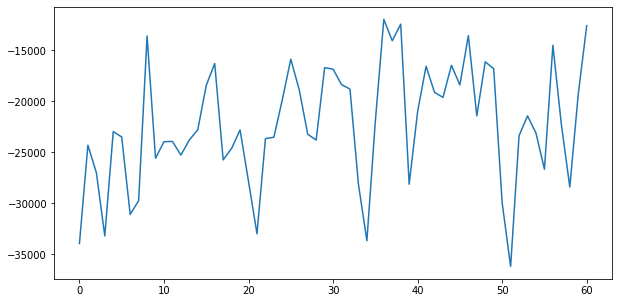

s: [0 0 4], mu: [31.570572  26.78669    1.4243599], a: [[30. 30.  0.]], exp_td_error: [30.], newMu: [31.79357   27.096054   1.3364234]

s: [ 0 20  0], mu: [8.970313  7.611652  0.5934424], a: [[11.  4.  2.]], exp_td_error: [3.75027473], newMu: [9.13002   7.7667003 0.5742283]

s: [ 7 14  2], mu: [5.1390758 7.3224635 0.9437953], a: [[ 6. 13.  2.]], exp_td_error: [14.90963227], newMu: [5.0083     7.513792   0.96761036]

s: [ 0 17  2], mu: [11.464764   9.484067   0.6195024], a: [[20. 12.  1.]], exp_td_error: [4.0523855], newMu: [11.714215    9.702831    0.60388106]

s: [ 8 19  0], mu: [3.7141814 7.29304   0.9914099], a: [[0. 7. 5.]], exp_td_error: [11.99228433], newMu: [3.4827273 7.5260806 1.0119393]

s: [ 1 16  4], mu: [11.4883175   9.641652    0.59865034], a: [[8. 9. 0.]], exp_td_error: [10.68607735], newMu: [11.557867    9.732802    0.58896124]

s: [ 0 15  0], mu: [14.438051  12.033713   0.6325232], a: [[15. 15.  0.]], exp_td_error: [10.47201582], newMu: [15.227696   12.790294    0.62788

s: [ 4 17  0], mu: [6.061803 9.620765 0.888909], a: [[5. 6. 5.]], exp_td_error: [1.85862398], newMu: [6.1990156 9.73127   0.8880755]

s: [9 7 4], mu: [ 6.02683   13.178026   1.0633374], a: [[ 3. 11.  4.]], exp_td_error: [12.10201689], newMu: [ 5.858986  13.226967   1.0707644]

s: [1 8 4], mu: [23.823328  21.035822   0.2928338], a: [[22. 19.  0.]], exp_td_error: [30.], newMu: [23.20429    20.543358    0.29923964]

s: [ 4 17  0], mu: [6.217744  9.867516  0.9060424], a: [[5. 5. 2.]], exp_td_error: [7.18279252], newMu: [6.143892  9.853924  0.9124466]

s: [ 4 12  2], mu: [12.751852  12.444374   0.6172827], a: [[14.  9.  0.]], exp_td_error: [4.63779507], newMu: [12.629048   12.364352    0.62006927]

s: [ 9 11  0], mu: [ 3.8555114 13.203485   1.0598748], a: [[ 3. 12.  0.]], exp_td_error: [22.59380315], newMu: [ 3.7721498 13.18806    1.0547744]

s: [ 0 13  0], mu: [17.851357   15.909018    0.36021703], a: [[17. 17.  3.]], exp_td_error: [8.6008937], newMu: [17.64826    15.749346    0.37030232]


s: [ 0 20  0], mu: [11.452708   9.881889   0.9140842], a: [[12. 10.  0.]], exp_td_error: [8.25227713], newMu: [11.435077   9.867387   0.9156407]

s: [ 2 20  0], mu: [10.41088     9.347525    0.96228576], a: [[11.  6.  0.]], exp_td_error: [5.12791831], newMu: [10.310734    9.263597    0.96001697]

s: [ 7 16  0], mu: [ 7.3706536 12.879019   1.6448846], a: [[3. 9. 0.]], exp_td_error: [15.94912198], newMu: [ 7.242122  12.709033   1.6312788]

s: [ 1 15  0], mu: [14.373961  12.533953   1.0788395], a: [[14. 15.  2.]], exp_td_error: [8.92794086], newMu: [14.297028  12.468701   1.0738239]

s: [ 0 20  2], mu: [10.849571   9.376937   0.8818644], a: [[10. 10.  0.]], exp_td_error: [10.18642658], newMu: [10.819486    9.356548    0.87780935]

s: [ 0 20  0], mu: [11.215278   9.679687   0.8980314], a: [[10.  2.  0.]], exp_td_error: [4.08909798], newMu: [11.118651    9.593528    0.88954705]

s: [ 8 12  0], mu: [ 8.171455  13.644144   1.7360206], a: [[10. 12.  4.]], exp_td_error: [1.53096263], newMu: [ 8

s: [12 10  4], mu: [ 6.0537515 13.899569   1.2679338], a: [[10. 17.  5.]], exp_td_error: [11.27485048], newMu: [ 6.1315417 13.922918   1.2700677]

s: [ 5 17  4], mu: [7.822301   7.8566117  0.75056434], a: [[14. 13.  0.]], exp_td_error: [7.37563512], newMu: [7.9381995 7.9114094 0.746477 ]

s: [ 6 20  0], mu: [6.19166    8.5229225  0.97421724], a: [[ 8. 10.  0.]], exp_td_error: [10.24831689], newMu: [6.335931   8.56365    0.96883965]

s: [ 4 20  0], mu: [7.526301  7.6208982 0.7432146], a: [[4. 8. 5.]], exp_td_error: [3.56525213], newMu: [7.619708  7.677296  0.7423028]

s: [ 8 10  4], mu: [12.284284  13.500175   1.1211016], a: [[15. 12.  0.]], exp_td_error: [5.93438461], newMu: [12.441774  13.548544   1.1123085]

s: [11 12  0], mu: [ 6.794233  13.750812   1.2759504], a: [[ 6. 17.  5.]], exp_td_error: [2.45074856], newMu: [ 6.8814354 13.777263   1.2797797]

s: [17  2  4], mu: [ 4.2793107 16.488913   1.2798524], a: [[ 5. 20.  5.]], exp_td_error: [4.01064448], newMu: [ 4.3154745 16.541105   

s: [ 0 18  4], mu: [8.143411  8.246512  0.8851247], a: [[9. 7. 0.]], exp_td_error: [8.1341553], newMu: [8.013069  8.142415  0.9042778]

s: [ 2 15  0], mu: [ 9.671328  10.486087   1.2091146], a: [[10. 10.  5.]], exp_td_error: [1.83752176], newMu: [ 9.565648  10.464237   1.2450544]

s: [12  5  4], mu: [ 4.837896  14.611792   2.1520183], a: [[ 1. 13.  5.]], exp_td_error: [1.37468171], newMu: [ 4.784278  14.606283   2.1766696]

s: [0 8 4], mu: [21.555162  21.654226   1.7307494], a: [[23. 22.  1.]], exp_td_error: [30.], newMu: [21.678375 21.78333   1.760197]

s: [ 1 20  0], mu: [6.87298   7.706017  1.0518473], a: [[14.  8.  5.]], exp_td_error: [1.21454543], newMu: [6.8616233 7.717022  1.0630842]

s: [15 10  4], mu: [ 3.6816154 15.102255   2.2317383], a: [[ 1. 12.  0.]], exp_td_error: [25.79741901], newMu: [ 3.6067052 14.993469   2.2108717]

s: [ 4 12  0], mu: [11.211758  13.803409   1.7786145], a: [[15. 15.  0.]], exp_td_error: [8.36865488], newMu: [11.249464  13.828103   1.7725685]

s: [ 4

s: [ 0 20  0], mu: [8.7785225 8.788294  0.971339 ], a: [[9. 9. 4.]], exp_td_error: [2.39922751], newMu: [8.81579   8.835539  0.9767862]

s: [ 9 10  4], mu: [ 4.814078  12.265116   1.7830486], a: [[11. 20.  0.]], exp_td_error: [23.18486987], newMu: [ 4.9824605 12.439049   1.7888203]

s: [ 0 20  0], mu: [8.952249  8.981773  0.9818682], a: [[12. 10.  5.]], exp_td_error: [1.69111799], newMu: [9.090075   9.127788   0.98833644]

s: [12 10  4], mu: [ 2.8550208 13.043899   1.7291809], a: [[ 6. 18.  0.]], exp_td_error: [29.72360167], newMu: [ 3.0216014 13.250193   1.723871 ]

s: [ 0 18  0], mu: [10.255903  10.310076   1.0533592], a: [[14.  9.  0.]], exp_td_error: [5.85549716], newMu: [10.462323  10.529766   1.0578539]

s: [ 5 17  0], mu: [7.129234  9.785036  1.3495613], a: [[6. 4. 5.]], exp_td_error: [4.4305267], newMu: [7.2817373 9.869961  1.3392854]

s: [ 7 11  4], mu: [ 8.840925  12.4696245  1.634279 ], a: [[19. 19.  0.]], exp_td_error: [8.1311517], newMu: [ 9.164114  12.732298   1.6320353]


s: [ 0 20  0], mu: [10.922316   10.191564    0.48363864], a: [[15. 10.  0.]], exp_td_error: [5.80705548], newMu: [11.033061   10.268754    0.47221658]

s: [ 5 20  0], mu: [7.1995163 7.3218775 0.5707567], a: [[4. 1. 0.]], exp_td_error: [5.87391953], newMu: [7.2035565 7.3096085 0.5634818]

s: [ 8 11  0], mu: [ 8.412961  13.254805   1.1171114], a: [[11.  8.  5.]], exp_td_error: [3.57472907], newMu: [ 8.493664  13.175286   1.1048477]

s: [11  9  4], mu: [ 5.065804 14.385988  1.083849], a: [[11. 12.  5.]], exp_td_error: [0.90651362], newMu: [ 5.1063333 14.377899   1.0864013]

s: [10 11  4], mu: [ 5.923798  13.075757   1.0643691], a: [[11. 11.  0.]], exp_td_error: [7.69191307], newMu: [ 6.00751   12.844859   1.0570135]

s: [10 12  0], mu: [ 6.126616  13.767227   1.0982603], a: [[10. 12.  1.]], exp_td_error: [9.86951851], newMu: [ 6.2800994 13.592535   1.0937895]

s: [ 8 14  0], mu: [ 7.0974684 10.449704   0.9234493], a: [[ 3. 11.  3.]], exp_td_error: [15.99201436], newMu: [ 7.0403166 10.4101

s: [9 5 0], mu: [ 4.9319625 11.075154   1.8045367], a: [[0. 8. 0.]], exp_td_error: [30.], newMu: [ 4.9358034 10.99151    1.7971561]

s: [1 3 0], mu: [14.273462  13.425118   1.1397095], a: [[23. 16.  0.]], exp_td_error: [8.67722937], newMu: [14.348153 13.461256  1.147186]

s: [8 9 0], mu: [ 6.616411 10.633222  1.71252 ], a: [[1. 9. 5.]], exp_td_error: [11.59836699], newMu: [ 6.588092  10.580437   1.7153847]

s: [0 8 4], mu: [12.621523  11.848111   1.1030962], a: [[10.  4.  0.]], exp_td_error: [10.80548971], newMu: [12.540605  11.733268   1.1020589]

s: [6 2 0], mu: [ 8.631218  10.831822   1.5369732], a: [[10. 11.  0.]], exp_td_error: [16.61000281], newMu: [ 8.6706505 10.769606   1.5227579]

s: [5 3 0], mu: [11.58416   11.451468   1.2537556], a: [[11.  8.  0.]], exp_td_error: [10.31420393], newMu: [11.562713  11.387432   1.2426817]

s: [8 1 0], mu: [ 4.7390366 10.783879   1.7715595], a: [[ 8. 12.  1.]], exp_td_error: [18.45379885], newMu: [ 4.7926073 10.729748   1.7590687]

s: [4 3 0], m

s: [13 20  2], mu: [ 4.1734786 10.912296   2.3825665], a: [[ 2. 10.  0.]], exp_td_error: [18.22017394], newMu: [ 4.1025558 10.688073   2.3309293]

s: [ 5 20  0], mu: [7.119786  9.871486  2.2626984], a: [[ 5. 10.  1.]], exp_td_error: [14.86286432], newMu: [6.8524127 9.638319  2.2062383]

s: [ 0 20  0], mu: [12.867975  12.149825   2.3659964], a: [[16. 10.  1.]], exp_td_error: [5.16616842], newMu: [12.644305  11.9311075  2.3123374]

s: [ 6 20  0], mu: [5.8261557 9.815169  2.2582538], a: [[ 6. 10.  0.]], exp_td_error: [12.95775358], newMu: [5.6560636 9.634986  2.2078505]

s: [ 2 20  0], mu: [10.09077    9.960172   2.0317352], a: [[15. 10.  4.]], exp_td_error: [1.03706202], newMu: [9.752949  9.680002  1.9763179]

s: [17 10  4], mu: [ 3.4499214 15.014659   2.8059788], a: [[ 7. 15.  5.]], exp_td_error: [11.40079624], newMu: [ 3.4551954 15.017007   2.7990417]

s: [ 9 15  4], mu: [ 5.4004655 10.527353   2.3169408], a: [[1. 6. 0.]], exp_td_error: [14.1809161], newMu: [ 5.2233434 10.299194   2.26

s: [ 4 20  0], mu: [7.6546474 9.114125  1.624501 ], a: [[6. 5. 1.]], exp_td_error: [7.74861858], newMu: [7.6944304 9.153029  1.6072696]

s: [ 5 15  0], mu: [12.458191  14.293054   2.3048255], a: [[15. 15.  0.]], exp_td_error: [8.22733827], newMu: [12.8117695 14.493526   2.28476  ]

s: [ 5 20  0], mu: [7.232312  9.229199  1.6124071], a: [[17. 10.  5.]], exp_td_error: [0.73940941], newMu: [7.419812 9.299061 1.596129]

s: [22 10  4], mu: [ 2.8738005 16.87757    2.2831461], a: [[ 0. 20.  0.]], exp_td_error: [30.], newMu: [ 2.8320067 17.139357   2.2384748]

s: [ 2 20  0], mu: [11.509728  11.040626   1.6180344], a: [[10. 10.  0.]], exp_td_error: [9.20645563], newMu: [11.462485  11.01548    1.5792004]

s: [ 2 20  0], mu: [11.462485  11.01548    1.5792004], a: [[17. 10.  0.]], exp_td_error: [4.02053715], newMu: [11.595414  11.137962   1.5556755]

s: [ 9 20  0], mu: [5.0484686 9.612443  1.5795326], a: [[2. 5. 4.]], exp_td_error: [7.35878379], newMu: [5.0422316 9.633961  1.5561051]

s: [ 6 15  4

s: [ 0 11  0], mu: [11.026437   9.740592   1.2850022], a: [[12. 12.  3.]], exp_td_error: [8.62183016], newMu: [11.211341   9.926921   1.3246717]

s: [ 0 13  2], mu: [7.282363  6.7137146 1.0380602], a: [[7. 6. 5.]], exp_td_error: [2.55941723], newMu: [7.3909383 6.8179455 1.0622354]

s: [1 9 4], mu: [10.367881   9.31273    1.2967758], a: [[13.  6.  5.]], exp_td_error: [15.44859864], newMu: [10.62689   9.539217  1.348281]

s: [8 5 4], mu: [ 3.5580173 10.087654   1.2283163], a: [[5. 7. 0.]], exp_td_error: [30.], newMu: [3.657117  9.93749   1.2436401]

s: [6 2 0], mu: [ 6.9399743 11.9230795  1.6126121], a: [[12. 15.  3.]], exp_td_error: [26.17162672], newMu: [ 7.5394487 12.052461   1.6914778]

s: [3 7 2], mu: [14.285828 13.32658   1.865281], a: [[ 7. 10.  0.]], exp_td_error: [17.68045203], newMu: [14.281625  13.312783   1.8826442]

s: [0 7 0], mu: [23.264105  21.05359    2.6490753], a: [[24. 18.  5.]], exp_td_error: [30.], newMu: [23.02823   20.791903   2.7210014]

s: [ 6 15  4], mu: [5.147

s: [ 1 13  2], mu: [9.086513  8.286024  1.0699812], a: [[12. 13.  0.]], exp_td_error: [10.87927128], newMu: [9.301714  8.474604  1.0587045]

s: [ 0 16  0], mu: [9.4598055 8.573251  1.0553277], a: [[16.  3.  5.]], exp_td_error: [1.03617611], newMu: [9.67972   8.765297  1.0444362]

s: [16  6  4], mu: [ 3.0821187 10.156133   1.137324 ], a: [[6. 9. 3.]], exp_td_error: [6.00290765], newMu: [ 3.0890603 10.191551   1.1283935]

s: [13  5  2], mu: [3.5244737 9.878462  1.1600281], a: [[ 5. 18.  5.]], exp_td_error: [3.04381594], newMu: [3.5333009 9.930274  1.1550936]

s: [ 0 13  4], mu: [10.783202   9.658509   1.0654037], a: [[10.  7.  2.]], exp_td_error: [5.91271499], newMu: [10.907307   9.776994   1.0584823]

s: [ 3 10  2], mu: [9.350295 8.750689 1.030271], a: [[6. 9. 0.]], exp_td_error: [2.74125086], newMu: [9.461792  8.847076  1.0234816]

s: [0 9 0], mu: [14.120001  12.6163845  1.2398643], a: [[13.  9.  3.]], exp_td_error: [13.93268821], newMu: [14.169342  12.666065   1.2340944]

s: [4 8 2], 

s: [9 1 4], mu: [ 5.5617733 11.187548   1.0713795], a: [[9. 9. 0.]], exp_td_error: [30.], newMu: [ 5.681728  11.170138   1.0567428]

s: [9 0 0], mu: [ 3.3797157 10.707876   1.0014346], a: [[ 9. 10.  0.]], exp_td_error: [4.3583547], newMu: [ 3.4310486 10.658581   0.9933671]

s: [8 0 0], mu: [ 4.1747303 10.925485   1.014674 ], a: [[ 8. 16.  0.]], exp_td_error: [26.94394321], newMu: [ 4.4366384 11.073096   1.0101739]

s: [0 6 0], mu: [18.529125   18.937641    0.63278186], a: [[24. 24.  0.]], exp_td_error: [30.], newMu: [19.13313    19.542229    0.60472476]

s: [ 0 20  0], mu: [8.708898  9.755775  0.6284098], a: [[10. 10.  5.]], exp_td_error: [2.13858349], newMu: [8.8122225 9.846409  0.6162406]

s: [10 10  4], mu: [3.6781006 9.840226  0.9300114], a: [[5. 6. 0.]], exp_td_error: [1.85638189], newMu: [3.7653089 9.8887825 0.9217199]

s: [9 6 0], mu: [ 4.160395   10.094119    0.94008017], a: [[ 8. 13.  0.]], exp_td_error: [17.08298176], newMu: [ 4.2979345 10.193514   0.9326713]

s: [4 9 0], mu:

s: [ 5 11  4], mu: [13.919297  15.71321    1.9352024], a: [[12. 17.  0.]], exp_td_error: [14.27689746], newMu: [13.639013  15.646902   1.9447905]

s: [ 0 18  0], mu: [10.822188  11.909508   1.5732107], a: [[16.  9.  0.]], exp_td_error: [4.62419988], newMu: [10.663166  11.828453   1.5726085]

s: [ 7 17  0], mu: [ 6.1002865 11.883346   1.7644329], a: [[ 4. 11.  0.]], exp_td_error: [17.78682562], newMu: [ 5.9976163 11.899158   1.7598561]

s: [ 0 18  0], mu: [10.496991  11.741239   1.5660143], a: [[13. 12.  4.]], exp_td_error: [1.47581356], newMu: [10.357734  11.667541   1.5611393]

s: [13  8  4], mu: [ 5.6679974 13.65424    1.8995532], a: [[ 1. 14.  0.]], exp_td_error: [5.01495868], newMu: [ 5.5710516 13.723915   1.898141 ]

s: [ 0 12  0], mu: [18.12582   18.043175   2.0243132], a: [[18. 18.  0.]], exp_td_error: [10.47616199], newMu: [18.062962  17.999617   2.0059025]

s: [ 0 20  0], mu: [ 8.976068  10.840385   1.5002766], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [ 8.893988

s: [18 11  4], mu: [ 4.034517  14.785955   1.9106392], a: [[ 4. 17.  4.]], exp_td_error: [20.09106739], newMu: [ 4.0239496 14.88096    1.9163098]

s: [ 5 18  4], mu: [ 9.353821  10.667685   1.4964819], a: [[0. 2. 4.]], exp_td_error: [6.7394041], newMu: [ 9.086275  10.660841   1.5066582]

s: [ 3 10  4], mu: [14.791817  15.750923   1.9445744], a: [[17. 20.  5.]], exp_td_error: [10.83288329], newMu: [14.81384   15.851917   1.9695385]

s: [ 0 20  4], mu: [10.785236  10.520116   1.4295034], a: [[18.  9.  4.]], exp_td_error: [2.37717184], newMu: [10.780937  10.534164   1.4403872]

s: [ 9 19  4], mu: [ 5.7537146 11.309      1.7032666], a: [[ 8. 11.  0.]], exp_td_error: [10.82623969], newMu: [ 5.75406   11.346115   1.7116364]

s: [ 6 20  0], mu: [ 6.297416  11.280592   1.6891917], a: [[ 9. 10.  3.]], exp_td_error: [7.47005811], newMu: [ 6.335424  11.300422   1.6960785]

s: [ 5 20  2], mu: [ 7.2945685 10.750192   1.5938516], a: [[5. 8. 2.]], exp_td_error: [9.68747757], newMu: [ 7.248128  10.769

s: [10  6  4], mu: [10.211874  14.545352   1.7389007], a: [[ 9. 17.  1.]], exp_td_error: [5.84695325], newMu: [10.373672  14.584175   1.7218077]

s: [ 2 13  0], mu: [12.808076  12.987424   1.3911841], a: [[15. 17.  0.]], exp_td_error: [11.5781687], newMu: [12.999057  13.140327   1.3793561]

s: [ 0 20  0], mu: [9.706825  9.139067  1.0802934], a: [[8. 8. 0.]], exp_td_error: [10.29881624], newMu: [9.767613  9.185845  1.0680525]

s: [ 0 18  0], mu: [10.7614975 10.070129   1.1188376], a: [[9. 7. 5.]], exp_td_error: [1.46292306], newMu: [10.847258  10.142152   1.1088176]

s: [9 8 4], mu: [11.438811  14.926913   1.6542056], a: [[13. 13.  5.]], exp_td_error: [9.05632292], newMu: [11.598045  14.976103   1.6461242]

s: [ 9 11  4], mu: [ 9.782705  13.320139   1.5495347], a: [[11. 19.  5.]], exp_td_error: [13.63728453], newMu: [10.087123  13.615779   1.5753846]

s: [ 1 20  4], mu: [8.950778  8.922289  1.0618793], a: [[13.  0.  5.]], exp_td_error: [1.34794196], newMu: [9.009716  8.955258  1.0666142

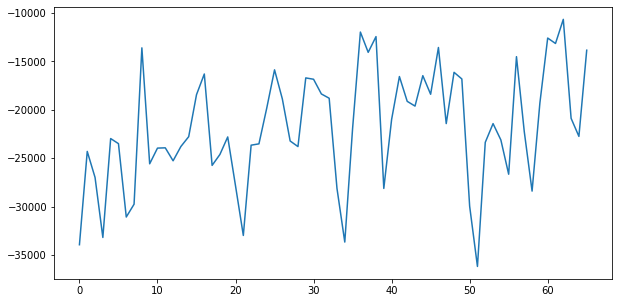

s: [0 0 4], mu: [27.047993  25.726488   1.4731407], a: [[30. 26.  4.]], exp_td_error: [30.], newMu: [27.426386  26.02678    1.5660685]

s: [ 4 16  4], mu: [ 8.302994  10.818703   1.1267767], a: [[ 6. 10.  0.]], exp_td_error: [13.31063044], newMu: [ 8.068277  10.775977   1.1490836]

s: [ 0 16  0], mu: [13.284522  12.41314    1.0507337], a: [[19. 12.  1.]], exp_td_error: [4.65378613], newMu: [13.289564  12.4065895  1.0796115]

s: [ 7 18  0], mu: [ 5.265855  10.636086   1.2137425], a: [[ 7. 12.  1.]], exp_td_error: [14.26344549], newMu: [ 5.2405844 10.650072   1.2255558]

s: [ 2 20  0], mu: [6.9411535 9.716143  1.1207854], a: [[7. 9. 0.]], exp_td_error: [11.49185002], newMu: [6.8927774 9.7328615 1.1340704]

s: [ 0 19  0], mu: [10.544864  10.14009    1.0388924], a: [[11. 11.  5.]], exp_td_error: [1.8458155], newMu: [10.481836  10.117098   1.0549976]

s: [11  9  4], mu: [ 6.9941926 13.837726   1.4579588], a: [[12. 19.  0.]], exp_td_error: [2.76547136], newMu: [ 6.98509   13.847818   1.46740

s: [13  0  4], mu: [ 7.0828114 13.195864   1.4027643], a: [[17. 14.  0.]], exp_td_error: [0.37264293], newMu: [ 7.0573525 13.165235   1.3941182]

s: [16  4  0], mu: [ 3.1624467 11.992852   1.2380269], a: [[ 1. 12.  5.]], exp_td_error: [7.55402698], newMu: [ 3.1311727 11.958343   1.2410727]

s: [5 6 4], mu: [19.439863  18.827852   1.6028105], a: [[21. 14.  4.]], exp_td_error: [14.97558819], newMu: [19.340048  18.650387   1.6016669]

s: [12 10  4], mu: [ 4.960512  11.5573435  1.272011 ], a: [[5. 4. 1.]], exp_td_error: [2.86346972], newMu: [ 4.8847647 11.436219   1.2742982]

s: [13  4  0], mu: [ 4.5432253 12.152962   1.2908872], a: [[2. 8. 0.]], exp_td_error: [3.09504787], newMu: [ 4.4779654 12.077117   1.2943928]

s: [7 2 0], mu: [17.234802  17.54484    1.5701185], a: [[19. 15.  0.]], exp_td_error: [19.93857123], newMu: [17.23692   17.426823   1.5492259]

s: [11  7  0], mu: [ 5.930748  12.285485   1.3532789], a: [[10. 14.  0.]], exp_td_error: [1.78367664], newMu: [ 5.8980007 12.188563   

s: [ 5 14  0], mu: [10.5965185 11.705188   1.0461364], a: [[11.  8.  3.]], exp_td_error: [4.68846675], newMu: [10.675769  11.822825   1.0601559]

s: [ 8 12  2], mu: [ 9.859016  12.399447   1.1577535], a: [[18.  9.  1.]], exp_td_error: [2.68077074], newMu: [10.064356  12.550828   1.1696765]

s: [17 11  0], mu: [ 3.813922  10.577238   1.2059174], a: [[ 1. 14.  0.]], exp_td_error: [30.], newMu: [ 3.8490121 10.785209   1.2184701]

s: [ 4 15  0], mu: [11.330229  11.389694   0.9995735], a: [[9. 7. 5.]], exp_td_error: [1.92472829], newMu: [11.323934  11.48087    1.0115693]

s: [13  5  4], mu: [ 9.439817  13.570847   1.2970762], a: [[16. 16.  1.]], exp_td_error: [1.12556502], newMu: [ 9.741762  13.784041   1.3025479]

s: [13 11  0], mu: [ 5.8824706 11.09054    1.2409462], a: [[11. 15.  0.]], exp_td_error: [11.54764476], newMu: [ 6.1037307 11.3631935  1.2545484]

s: [ 9 16  0], mu: [5.8346753 9.905805  1.1136775], a: [[3. 9. 5.]], exp_td_error: [10.76059867], newMu: [ 5.860979  10.041414   1.13

s: [11 15  0], mu: [ 4.9204364 12.57012    1.1881528], a: [[7. 5. 5.]], exp_td_error: [3.93585054], newMu: [ 4.9277716 12.466025   1.2163191]

s: [13 10  4], mu: [ 7.2534347 14.444336   1.3640757], a: [[13. 15.  1.]], exp_td_error: [9.0916533], newMu: [ 7.4386272 14.452972   1.406929 ]

s: [11 15  0], mu: [ 5.02059   12.412838   1.2452464], a: [[13. 10.  0.]], exp_td_error: [5.22343428], newMu: [ 5.1734385 12.3778925  1.2732959]

s: [14 15  0], mu: [ 4.4982986 13.00583    1.2759874], a: [[ 7. 15.  2.]], exp_td_error: [14.53062955], newMu: [ 4.705599  13.054552   1.3092548]

s: [ 6 20  2], mu: [ 4.8473864 10.12764    1.1557704], a: [[ 4. 10.  0.]], exp_td_error: [16.49483123], newMu: [ 4.948845 10.098901  1.174296]

s: [ 0 20  0], mu: [11.072746  10.118318   1.2253913], a: [[8. 0. 0.]], exp_td_error: [3.31676879], newMu: [10.948527  10.010865   1.2408211]

s: [ 8 10  0], mu: [14.217509  17.29507    1.7367538], a: [[13. 19.  4.]], exp_td_error: [3.02419534], newMu: [14.320213  17.31845  

s: [ 0 20  0], mu: [8.296572  8.222031  1.5697082], a: [[12.  7.  0.]], exp_td_error: [5.81629849], newMu: [8.343016 8.227898 1.580254]

s: [ 5 17  0], mu: [ 2.7912278 10.273723   1.3505397], a: [[0. 4. 0.]], exp_td_error: [13.32301962], newMu: [ 2.8333771 10.163674   1.3487561]

s: [ 1 11  0], mu: [17.323008  16.633581   2.6578672], a: [[10.  9.  4.]], exp_td_error: [1.91979708], newMu: [17.315514  16.614687   2.6662707]

s: [11  1  4], mu: [16.340416  19.565691   2.8191237], a: [[10. 21.  4.]], exp_td_error: [3.38503697], newMu: [15.827785 19.295956  2.782886]

s: [ 0 12  4], mu: [15.359667  14.282496   2.3860393], a: [[19. 12.  5.]], exp_td_error: [3.08346016], newMu: [15.371582  14.283686   2.4001658]

s: [ 7 14  4], mu: [ 2.5999343 10.817195   1.3910645], a: [[ 9. 16.  4.]], exp_td_error: [12.21021538], newMu: [ 2.6487024 10.806643   1.4041694]

s: [ 0 20  4], mu: [8.455905  8.096268  1.6149381], a: [[9. 9. 0.]], exp_td_error: [10.1070154], newMu: [8.5091715 8.119821  1.6245091]



s: [ 2 20  0], mu: [9.864055  9.506538  1.2157208], a: [[5. 0. 3.]], exp_td_error: [4.10165653], newMu: [9.777121  9.431601  1.2127885]

s: [ 7 10  2], mu: [11.560789  17.2755     1.6573198], a: [[12. 19.  4.]], exp_td_error: [13.64450728], newMu: [11.540855  17.30159    1.6796664]

s: [ 0 19  4], mu: [11.519379  10.584902   1.3146446], a: [[11.  2.  0.]], exp_td_error: [3.53399163], newMu: [11.29813   10.384509   1.3090892]

s: [ 9 11  0], mu: [ 7.8189225 15.90809    1.5037025], a: [[ 8. 17.  0.]], exp_td_error: [22.5848293], newMu: [ 7.7949753 15.942614   1.5061493]

s: [ 0 18  0], mu: [13.019276  12.060831   1.4275672], a: [[13. 12.  2.]], exp_td_error: [7.65162948], newMu: [12.818044  11.886601   1.4169166]

s: [ 1 20  2], mu: [9.38884  8.997193 1.204557], a: [[7. 8. 0.]], exp_td_error: [10.51582945], newMu: [9.241002  8.890706  1.1940093]

s: [ 0 18  0], mu: [12.581577  11.680176   1.4010599], a: [[10. 10.  0.]], exp_td_error: [10.36822464], newMu: [12.085824  11.25196    1.367421

s: [ 3 20  0], mu: [9.739853  9.020606  1.0664688], a: [[ 7. 10.  1.]], exp_td_error: [12.4856195], newMu: [9.865908  9.130933  1.0727448]

s: [ 0 20  0], mu: [10.339003   9.444679   1.0864743], a: [[12.  9.  4.]], exp_td_error: [1.69111799], newMu: [10.460012   9.548478   1.0932881]

s: [12 10  4], mu: [ 6.85803   14.6708975  1.3857054], a: [[ 8. 20.  2.]], exp_td_error: [24.3991431], newMu: [ 7.074008  14.812779   1.3998891]

s: [ 0 20  2], mu: [10.242782   9.323098   1.0852853], a: [[10. 10.  5.]], exp_td_error: [6.85415212], newMu: [10.373897  9.44958   1.101536]

s: [ 0 20  4], mu: [10.030103   9.104079   1.0828514], a: [[19.  0.  4.]], exp_td_error: [0.71930783], newMu: [10.150484   9.217131   1.0977876]

s: [19 10  4], mu: [ 3.12865   15.2345085  1.2436168], a: [[0. 6. 2.]], exp_td_error: [7.0078429], newMu: [ 3.2088432 15.262321   1.2564821]

(array([23.590015 , 22.93947  ,  1.9515328], dtype=float32), array([26., 26.,  0.], dtype=float32))
s: [0 0 4], mu: [21.460453  21.654552

s: [ 0 13  2], mu: [15.226753  13.924926   1.2119386], a: [[19. 17.  4.]], exp_td_error: [5.58690003], newMu: [15.130437 13.853474  1.234724]

s: [ 2 20  4], mu: [8.456663  7.7783904 0.9371184], a: [[ 8. 10.  4.]], exp_td_error: [7.74633064], newMu: [8.390292   7.732418   0.95102215]

s: [ 0 20  4], mu: [8.461427   7.7038937  0.94966984], a: [[9. 9. 0.]], exp_td_error: [10.1070154], newMu: [8.424852  7.679763  0.9618828]

s: [ 0 19  0], mu: [9.40519   8.6158085 1.0143774], a: [[11. 11.  3.]], exp_td_error: [8.48148513], newMu: [9.408217  8.626614  1.0313501]

s: [ 0 20  2], mu: [8.605795   7.8653097  0.98808503], a: [[9. 9. 3.]], exp_td_error: [8.35753353], newMu: [8.621544  7.886347  1.0054306]

s: [ 0 19  2], mu: [9.074523  8.312874  1.0307884], a: [[10.  8.  5.]], exp_td_error: [5.48624834], newMu: [9.096637  8.338401  1.0510184]

s: [ 2 17  4], mu: [9.752655 9.118705 1.097656], a: [[11. 11.  5.]], exp_td_error: [6.21885849], newMu: [9.783923  9.158067  1.1221728]

s: [ 2 18  4], mu

s: [3 8 0], mu: [16.636068  16.684126   2.1994426], a: [[15. 13.  0.]], exp_td_error: [30.], newMu: [16.46688   16.392984   2.1440017]

s: [ 5 11  0], mu: [12.876636  14.1863785  1.9329443], a: [[12.  6.  5.]], exp_td_error: [1.2859565], newMu: [12.734755  13.936817   1.8899114]

s: [17  1  4], mu: [ 6.3663173 14.241608   1.8902233], a: [[ 3. 17.  2.]], exp_td_error: [8.98856925], newMu: [ 6.2147617 14.121098   1.8658676]

s: [3 8 2], mu: [15.912759  15.614604   2.0280914], a: [[12. 14.  5.]], exp_td_error: [30.], newMu: [15.644824  15.349833   2.0280716]

s: [ 1 12  4], mu: [13.338005  12.01815    1.7088109], a: [[11.  6.  0.]], exp_td_error: [1.03857912], newMu: [13.099811  11.796301   1.7047175]

s: [6 8 0], mu: [13.894201  14.466104   1.9627415], a: [[18. 14.  0.]], exp_td_error: [30.], newMu: [13.819539  14.277175   1.9397184]

s: [10 12  0], mu: [ 8.069397  12.119214   1.7953354], a: [[ 5. 13.  5.]], exp_td_error: [2.79431378], newMu: [ 7.984194  11.984767   1.7804145]

s: [15  2

s: [ 3 14  2], mu: [12.085317  11.206396   1.4077005], a: [[13.  4.  5.]], exp_td_error: [1.98138748], newMu: [12.035723  11.290757   1.4117342]

s: [12  8  4], mu: [ 7.5455356 15.5129     1.5063217], a: [[ 0. 11.  0.]], exp_td_error: [6.2249276], newMu: [ 7.3600636 15.638899   1.4994117]

s: [1 9 0], mu: [16.560944  15.4461975  1.71815  ], a: [[21. 21.  4.]], exp_td_error: [30.], newMu: [16.857115  15.813009   1.7764273]

s: [ 1 20  4], mu: [9.702459  8.361702  1.2185628], a: [[12. 10.  0.]], exp_td_error: [7.452611], newMu: [9.820281  8.500393  1.2430391]

s: [ 3 20  0], mu: [7.4915934 9.52473   1.2352352], a: [[12. 10.  0.]], exp_td_error: [7.03768199], newMu: [7.908104  9.529277  1.2499101]

s: [ 5 20  0], mu: [ 5.6664085 11.098621   1.2635704], a: [[1. 6. 0.]], exp_td_error: [14.85171854], newMu: [ 5.778588  10.873048   1.2617317]

s: [ 0 16  0], mu: [13.13558   11.68018    1.5061948], a: [[14. 14.  0.]], exp_td_error: [10.44499875], newMu: [13.345942 11.880676  1.528332]

s: [ 0 

s: [ 0 16  0], mu: [9.30102   8.733351  1.2873822], a: [[20.  0.  0.]], exp_td_error: [0.46379804], newMu: [9.15879   8.608055  1.2786145]

s: [20  6  0], mu: [ 0.5647873 19.506525   2.052193 ], a: [[10. 22.  0.]], exp_td_error: [2.74029477], newMu: [ 0.64498556 19.405334    2.0481677 ]

s: [ 8 18  0], mu: [ 3.063534  10.533958   1.4290842], a: [[0. 8. 0.]], exp_td_error: [19.96319623], newMu: [ 3.0543246 10.455296   1.4185852]

s: [ 0 16  0], mu: [8.899573  8.372713  1.2573402], a: [[15. 12.  5.]], exp_td_error: [1.16746943], newMu: [8.796465  8.274846  1.2476499]

s: [15  6  4], mu: [ 2.295962  16.910944   1.9008899], a: [[ 2. 17.  5.]], exp_td_error: [4.1650984], newMu: [ 2.3252196 16.842644   1.8978631]

s: [ 0 13  4], mu: [9.986475  9.39902   1.3271911], a: [[14. 14.  0.]], exp_td_error: [10.32551694], newMu: [10.157092   9.524864   1.3320649]

s: [ 0 17  0], mu: [8.059493  7.57209   1.1877263], a: [[10. 10.  0.]], exp_td_error: [10.40215248], newMu: [8.178776 7.668907 1.191305]



s: [ 5 15  0], mu: [ 9.299023  13.40911    1.5039748], a: [[10. 15.  0.]], exp_td_error: [14.59620018], newMu: [ 9.266264  13.453237   1.5234977]

s: [ 0 20  0], mu: [7.8362207 7.4123497 0.9586576], a: [[17.  0.  0.]], exp_td_error: [1.16446464], newMu: [7.780567  7.384411  0.9650953]

s: [17 10  0], mu: [ 4.5042543 15.57471    1.788075 ], a: [[8. 6. 5.]], exp_td_error: [8.08577151], newMu: [ 4.5333424 15.544301   1.8084278]

s: [19  6  4], mu: [ 4.79171   15.661974   1.8163192], a: [[ 3. 13.  2.]], exp_td_error: [8.22730203], newMu: [ 4.7872734 15.60325    1.8329362]

s: [9 9 2], mu: [12.313512  16.61247    1.8292401], a: [[13. 21.  5.]], exp_td_error: [17.32304723], newMu: [12.401383  16.743755   1.8845012]

s: [ 1 20  4], mu: [7.2674804  7.064963   0.98666835], a: [[15.  3.  3.]], exp_td_error: [1.86055253], newMu: [7.271628  7.06458   1.0031072]

s: [13 13  2], mu: [ 6.645425  14.732863   1.7954104], a: [[11. 11.  0.]], exp_td_error: [7.0402246], newMu: [ 6.72117   14.676958   1.81

s: [ 7 12  4], mu: [15.272243  16.967133   1.2210361], a: [[18.  9.  0.]], exp_td_error: [2.7728635], newMu: [15.624426  16.9702     1.1989839]

s: [16 11  0], mu: [ 5.8478966 15.969667   1.3836766], a: [[ 7. 17.  0.]], exp_td_error: [21.70333855], newMu: [ 6.2420006 15.965472   1.370523 ]

s: [ 6 18  0], mu: [ 8.489664  13.452348   1.1681166], a: [[13. 12.  0.]], exp_td_error: [7.20300729], newMu: [ 8.925484 13.515127  1.1573  ]

s: [ 7 20  0], mu: [ 6.6627607 12.383231   1.1470762], a: [[ 8. 10.  0.]], exp_td_error: [9.99717433], newMu: [ 6.950298 12.327     1.129476]

s: [ 5 20  0], mu: [ 7.6489563 11.617865   1.0633589], a: [[15.  7.  0.]], exp_td_error: [3.22416427], newMu: [ 8.034245  11.47882    1.0402716]

s: [13 17  0], mu: [ 8.169939  15.400479   1.2838438], a: [[14. 13.  3.]], exp_td_error: [5.10539362], newMu: [ 8.584442  15.242878   1.2596422]

s: [14 20  2], mu: [ 5.9111114 12.92826    1.1934465], a: [[5. 8. 0.]], exp_td_error: [9.89315323], newMu: [ 6.0417066 12.449688  

s: [14  8  4], mu: [ 5.769177  15.174572   1.8492395], a: [[11. 21.  5.]], exp_td_error: [2.26637202], newMu: [ 5.833077  15.361179   1.8566358]

s: [ 4 19  4], mu: [7.3350205 6.450074  0.9552994], a: [[13.  1.  0.]], exp_td_error: [1.71925194], newMu: [7.402807   6.53299    0.96072793]

s: [16 10  0], mu: [ 3.438629  15.652091   1.9208512], a: [[ 1. 14.  2.]], exp_td_error: [30.], newMu: [ 3.3936322 15.743857   1.9223036]

s: [ 3 14  2], mu: [13.602653  12.038983   1.2650362], a: [[12.  7.  5.]], exp_td_error: [3.30992973], newMu: [13.754702 12.194393  1.276625]

s: [ 8 11  4], mu: [14.265008  14.927657   1.5796326], a: [[12.  9.  0.]], exp_td_error: [4.66141513], newMu: [14.271536  14.986547   1.5841155]

s: [11 10  0], mu: [ 9.508331 15.603018  1.785223], a: [[14.  8.  0.]], exp_td_error: [4.7990845], newMu: [ 9.524638  15.605453   1.7777543]

s: [17  8  0], mu: [ 2.8379815 15.998406   1.9335196], a: [[0. 8. 2.]], exp_td_error: [2.26047281], newMu: [ 2.8090413 15.981983   1.9263961]

s: [ 0 20  0], mu: [6.621472  6.1436934 0.9467113], a: [[3. 3. 5.]], exp_td_error: [4.70247632], newMu: [6.8258557 6.2916703 0.949399 ]

s: [ 3 10  4], mu: [13.460286  13.095787   1.3779609], a: [[15.  7.  4.]], exp_td_error: [2.79370147], newMu: [13.629204  13.294328   1.3893565]

s: [11  7  4], mu: [ 6.2904477 18.883535   1.3348267], a: [[ 8. 14.  4.]], exp_td_error: [1.93702111], newMu: [ 6.4174604 18.870846   1.3389505]

s: [ 5 11  4], mu: [11.612527  12.293925   1.3256615], a: [[17. 12.  5.]], exp_td_error: [2.96746508], newMu: [11.870136  12.500521   1.3449638]

s: [10 13  4], mu: [ 5.371768  15.757114   1.2258737], a: [[ 8. 13.  3.]], exp_td_error: [11.40067911], newMu: [ 5.5581    15.341516   1.2283322]

s: [ 5 16  2], mu: [7.0236125 7.901593  1.0421646], a: [[7. 9. 0.]], exp_td_error: [10.68315762], newMu: [7.2600956 7.989053  1.0550244]

s: [ 3 15  0], mu: [9.862334  9.63576   1.1649134], a: [[4. 6. 5.]], exp_td_error: [1.72313235], newMu: [10.125714   9.833803   1.1798935]



s: [7 5 4], mu: [13.945047  16.215017   2.3583183], a: [[20. 20.  2.]], exp_td_error: [30.], newMu: [14.056964 16.279226  2.398747]

s: [ 7 15  2], mu: [ 4.229093  11.424533   1.5852562], a: [[3. 9. 5.]], exp_td_error: [11.03256502], newMu: [ 4.163058  11.384458   1.6002557]

s: [ 1 14  4], mu: [12.085179  11.585395   1.9326501], a: [[10. 11.  5.]], exp_td_error: [7.24468805], newMu: [11.882348  11.386054   1.9395016]

s: [ 0 15  4], mu: [11.999351  11.252888   1.9313246], a: [[15. 15.  0.]], exp_td_error: [10.26363521], newMu: [12.080563  11.314803   1.9620721]

s: [ 0 20  0], mu: [7.65669   7.5923843 1.4916513], a: [[11.  5.  2.]], exp_td_error: [4.23243649], newMu: [7.735918  7.6210756 1.5111868]

s: [ 6 15  2], mu: [ 4.628608  11.423953   1.6862133], a: [[ 9. 15.  0.]], exp_td_error: [16.32740243], newMu: [ 4.779001 11.593194  1.716809]

s: [ 0 20  0], mu: [8.003261  7.797427  1.5466002], a: [[12. 10.  5.]], exp_td_error: [1.69111799], newMu: [8.286688  7.992975  1.5831716]

s: [12

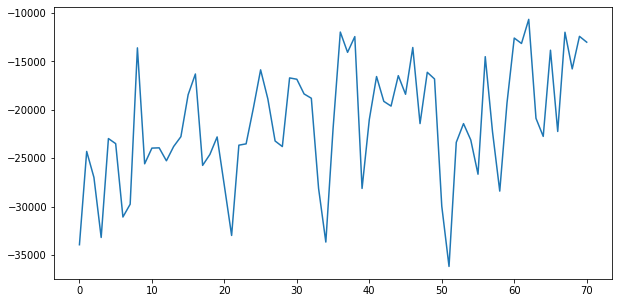

s: [0 0 4], mu: [20.266249  19.778236   2.7416363], a: [[27. 22.  0.]], exp_td_error: [30.], newMu: [20.866177  20.17173    2.7279208]

s: [ 5 12  0], mu: [14.143555  15.270381   2.1527188], a: [[12. 10.  5.]], exp_td_error: [1.26953416], newMu: [14.338804  15.348162   2.1295228]

s: [17  2  4], mu: [ 3.738638  16.32661    1.4066796], a: [[ 5. 22.  3.]], exp_td_error: [6.08720379], newMu: [ 3.7968757 16.382038   1.4133747]

s: [ 0 14  2], mu: [15.418995  13.819992   2.0369873], a: [[15. 12.  1.]], exp_td_error: [7.40228301], newMu: [15.553321  13.885275   2.0127645]

s: [ 3 16  0], mu: [11.12164   11.709612   1.6900618], a: [[12. 13.  5.]], exp_td_error: [1.40708836], newMu: [11.2125845 11.703981   1.6744596]

s: [15  6  4], mu: [ 4.159373  15.888513   1.4276224], a: [[0. 6. 4.]], exp_td_error: [5.88322185], newMu: [ 4.183878  15.841121   1.4329529]

s: [9 2 4], mu: [15.68334  16.447247  2.133844], a: [[10. 15.  0.]], exp_td_error: [7.72618712], newMu: [15.601413 16.383205  2.1014  ]



s: [7 9 0], mu: [11.89337   12.25073    1.4455105], a: [[ 8. 11.  0.]], exp_td_error: [30.], newMu: [11.114773  11.812032   1.4212577]

s: [ 4 10  0], mu: [13.979331  12.766644   1.4717473], a: [[10.  6.  0.]], exp_td_error: [2.11500976], newMu: [13.558171  12.4127     1.4491628]

s: [8 6 0], mu: [10.731135  12.346648   1.4263695], a: [[3. 4. 0.]], exp_td_error: [30.], newMu: [ 8.465962  12.123205   1.3191229]

s: [7 0 0], mu: [14.544706  13.3992405  1.5017122], a: [[ 8. 10.  0.]], exp_td_error: [16.26115534], newMu: [13.833391  12.868145   1.4446254]

s: [5 0 0], mu: [16.264072  14.466534   1.5182012], a: [[16. 13.  0.]], exp_td_error: [10.3105221], newMu: [15.687818  13.962685   1.4501097]

s: [8 3 0], mu: [ 7.606008  11.6526165  1.2333009], a: [[12. 13.  5.]], exp_td_error: [24.72624354], newMu: [ 6.9078865 11.474175   1.2057011]

s: [7 6 4], mu: [ 7.598507  11.357529   1.2277827], a: [[8. 7. 5.]], exp_td_error: [30.], newMu: [ 7.174814  11.125067   1.2342093]

s: [8 3 4], mu: [ 6.9

s: [22  1  4], mu: [ 3.514564  14.772916   1.9993922], a: [[ 8. 10.  0.]], exp_td_error: [4.11463726], newMu: [ 3.5577269 14.728397   1.9955068]

s: [20  1  0], mu: [ 3.6035755 14.394952   1.9732311], a: [[7. 9. 1.]], exp_td_error: [3.48616337], newMu: [ 3.6480634 14.322495   1.9668429]

s: [18  0  0], mu: [ 3.7854664 13.639692   1.928425 ], a: [[12. 12.  0.]], exp_td_error: [3.02530375], newMu: [ 3.8384092 13.578667   1.9227678]

s: [18  2  0], mu: [ 3.814959  13.655524   1.9263828], a: [[ 3. 11.  0.]], exp_td_error: [5.78780965], newMu: [ 3.8570185 13.576086   1.9150466]

s: [10  3  0], mu: [ 6.5146914 11.587462   1.88564  ], a: [[14. 11.  0.]], exp_td_error: [1.140191], newMu: [ 6.6176095 11.570627   1.8843149]

s: [13  4  0], mu: [ 4.4167557 12.087848   1.815182 ], a: [[ 0. 12.  0.]], exp_td_error: [6.27353368], newMu: [ 4.44691   12.049895   1.8053609]

s: [1 6 0], mu: [20.828766  18.960302   2.6842055], a: [[25. 19.  3.]], exp_td_error: [30.], newMu: [21.311884  19.277464   2.732

s: [ 6 16  2], mu: [5.3181143 9.083252  1.4116774], a: [[ 8. 14.  4.]], exp_td_error: [11.03712486], newMu: [5.3547416 9.300564  1.4608531]

s: [ 0 20  4], mu: [7.271301  6.5628953 1.244695 ], a: [[7. 7. 5.]], exp_td_error: [6.8015515], newMu: [7.331678  6.6366296 1.2866876]

s: [ 0 17  4], mu: [10.125783   8.511098   1.4801161], a: [[17. 13.  0.]], exp_td_error: [6.45305369], newMu: [10.757985   8.981393   1.5732405]

s: [ 4 20  0], mu: [5.2623105 9.203669  1.5086745], a: [[ 6. 10.  0.]], exp_td_error: [13.66301246], newMu: [5.3293486 9.337078  1.5417213]

s: [ 0 20  0], mu: [8.876092  7.5657015 1.4474539], a: [[9. 6. 5.]], exp_td_error: [2.39922751], newMu: [9.2618685 7.8452826 1.5079185]

s: [ 9 10  4], mu: [ 6.6395555 13.314979   1.9593809], a: [[ 8. 11.  0.]], exp_td_error: [11.7016515], newMu: [ 6.757291  13.391257   1.9879183]

s: [ 6 11  0], mu: [10.010852  11.565097   1.9956045], a: [[7. 8. 0.]], exp_td_error: [1.9399745], newMu: [10.136757  11.664786   2.0291672]

s: [5 9 0],

s: [ 1 14  2], mu: [17.604494  14.838543   1.8691925], a: [[17. 16.  0.]], exp_td_error: [8.70745843], newMu: [17.626867  14.839918   1.8438442]

s: [ 2 20  0], mu: [7.9775686 7.57296   1.2235999], a: [[5. 7. 5.]], exp_td_error: [3.35890259], newMu: [7.9660077 7.4970765 1.2082634]

s: [ 7 10  4], mu: [11.2589655 11.4292965  1.5487417], a: [[15. 15.  5.]], exp_td_error: [6.03728236], newMu: [11.277328  11.382492   1.5354406]

s: [ 7 15  4], mu: [6.7892985 9.622567  1.357253 ], a: [[16. 12.  5.]], exp_td_error: [3.34426565], newMu: [6.810297  9.550813  1.3518565]

s: [11 17  4], mu: [ 5.219082 10.53671   1.365819], a: [[12.  9.  0.]], exp_td_error: [5.15246887], newMu: [ 5.253228  10.333227   1.3521096]

s: [14 16  0], mu: [ 5.179514  13.926207   1.5777642], a: [[ 1. 14.  0.]], exp_td_error: [30.], newMu: [ 5.097433  13.841006   1.5537543]

s: [ 1 20  0], mu: [9.150439  7.8389144 1.2004089], a: [[4. 0. 0.]], exp_td_error: [5.17233802], newMu: [8.919494  7.6662183 1.1773245]

s: [ 5 10  0

s: [ 1 20  2], mu: [9.135703  8.390938  1.3558413], a: [[17.  4.  2.]], exp_td_error: [1.66028927], newMu: [9.170333  8.457333  1.3486704]

s: [14 14  2], mu: [ 5.145966  15.014223   1.6810464], a: [[ 2. 16.  5.]], exp_td_error: [24.10301394], newMu: [ 5.137784  15.157407   1.6972233]

s: [ 0 20  4], mu: [9.914507 8.83056  1.379973], a: [[8. 8. 0.]], exp_td_error: [10.10506119], newMu: [9.809698  8.774376  1.3704014]

s: [ 0 18  0], mu: [12.757191  11.384685   1.6072252], a: [[10. 10.  3.]], exp_td_error: [8.50893834], newMu: [12.53044  11.223104  1.588706]

s: [ 0 18  2], mu: [12.066753  10.793356   1.5487028], a: [[11.  2.  1.]], exp_td_error: [2.8868808], newMu: [11.7566    10.565983   1.5260634]

s: [ 9 10  0], mu: [ 9.905733  13.25078    1.7898549], a: [[11. 20.  5.]], exp_td_error: [4.04838716], newMu: [ 9.808823  13.338228   1.7966225]

s: [20  0  4], mu: [ 4.833175 17.053894  1.816169], a: [[ 4. 10.  0.]], exp_td_error: [6.61459085], newMu: [ 4.8240633 17.063192   1.8205796]

s

s: [18  6  0], mu: [ 4.160105  16.097963   1.7108307], a: [[ 8. 19.  1.]], exp_td_error: [2.53828885], newMu: [ 4.2364874 15.918892   1.6932498]

s: [ 7 15  0], mu: [ 9.450221  10.013536   1.3831365], a: [[ 8. 15.  0.]], exp_td_error: [17.65110593], newMu: [ 9.60919   10.085772   1.3734143]

(array([29.936451 , 26.616285 ,  2.6219475], dtype=float32), array([30., 19.,  5.], dtype=float32))
s: [0 0 4], mu: [28.316706  25.249279   2.5102773], a: [[23. 23.  5.]], exp_td_error: [30.], newMu: [27.038952  24.17717    2.4902601]

s: [ 0 13  4], mu: [15.558927 13.921452  1.655112], a: [[17.  4.  2.]], exp_td_error: [1.24294145], newMu: [15.311162  13.712745   1.6723566]

s: [13  7  2], mu: [ 7.009338  14.041085   1.6749942], a: [[ 8. 21.  2.]], exp_td_error: [3.50876232], newMu: [ 7.066243  13.941799   1.6878536]

s: [ 0 18  2], mu: [11.483364  10.1411705  1.389868 ], a: [[14.  8.  4.]], exp_td_error: [3.44885215], newMu: [11.390728  10.0651245  1.4061756]

s: [ 6 16  4], mu: [9.106091 9.50749

s: [ 2 18  0], mu: [10.101498    9.535574    0.97352546], a: [[10. 12.  5.]], exp_td_error: [1.84042182], newMu: [10.060194   9.505744   0.9718406]

s: [12  8  4], mu: [ 8.89702   12.033887   1.1489232], a: [[12.  8.  3.]], exp_td_error: [3.05863843], newMu: [ 8.828382  12.04306    1.1483468]

s: [16  6  2], mu: [ 5.920824  12.96581    1.1175508], a: [[5. 4. 5.]], exp_td_error: [3.59016338], newMu: [ 5.856774  12.939276   1.1194998]

s: [17  0  4], mu: [ 6.0748286 12.910292   1.1225046], a: [[ 2. 19.  0.]], exp_td_error: [1.46139272], newMu: [ 5.996028  12.897679   1.1236668]

s: [0 9 0], mu: [16.774666  15.948492   1.2961043], a: [[24. 21.  1.]], exp_td_error: [30.], newMu: [17.183195  16.303768   1.3125067]

s: [ 3 20  0], mu: [8.408208  8.136426  0.9201406], a: [[22.  4.  3.]], exp_td_error: [0.85460585], newMu: [8.529925   8.230703   0.92380893]

s: [21 14  2], mu: [ 3.8354678 14.080371   1.1178768], a: [[ 6. 12.  0.]], exp_td_error: [12.08149988], newMu: [ 3.8806043 14.071171   1.

s: [ 5 11  0], mu: [13.486739  13.896352   1.6000463], a: [[14. 11.  2.]], exp_td_error: [4.71334914], newMu: [13.485638  13.914922   1.5972152]

s: [ 8 12  2], mu: [ 9.3541355 12.661546   1.3737073], a: [[10. 18.  0.]], exp_td_error: [19.85037121], newMu: [ 9.354901  13.072413   1.3722017]

s: [ 0 20  0], mu: [10.402451   9.84506    1.2374241], a: [[10. 10.  5.]], exp_td_error: [2.13858349], newMu: [10.406316   9.894542   1.2350298]

s: [10 10  4], mu: [ 8.164765  15.490803   1.3770492], a: [[ 2. 12.  0.]], exp_td_error: [25.00734341], newMu: [ 7.963124  15.573039   1.3462892]

s: [ 0 12  0], mu: [17.83697   17.36783    1.7851087], a: [[15. 13.  2.]], exp_td_error: [6.85360475], newMu: [17.65382   17.218477   1.7560115]

s: [ 2 15  2], mu: [12.016872  12.435686   1.4138985], a: [[18. 14.  3.]], exp_td_error: [4.81922817], newMu: [11.960198  12.447771   1.4092901]

s: [ 6 19  2], mu: [ 5.8316164 12.403561   1.1380827], a: [[6. 7. 0.]], exp_td_error: [9.34310121], newMu: [ 5.7576404 12.

s: [ 4 12  2], mu: [10.319477 10.300903  1.274189], a: [[6. 1. 5.]], exp_td_error: [1.71908565], newMu: [10.337804  10.269471   1.2830898]

s: [9 3 4], mu: [10.144716  11.226843   1.3085932], a: [[17. 13.  1.]], exp_td_error: [5.96941493], newMu: [10.246483  11.193433   1.3260449]

s: [13  6  0], mu: [ 6.0485487 12.13524    1.0961659], a: [[ 2. 12.  0.]], exp_td_error: [3.87732712], newMu: [ 6.1112757 12.091324   1.1048288]

s: [3 8 0], mu: [15.477693 14.330417  1.602957], a: [[25.  5.  2.]], exp_td_error: [7.04158231], newMu: [15.538427  14.308183   1.6132689]

s: [23  3  2], mu: [ 3.7034652 13.828091   1.0072901], a: [[ 7. 20.  1.]], exp_td_error: [24.87649821], newMu: [ 3.7761803 14.008199   1.0197262]

s: [10 13  0], mu: [ 5.9484777 10.226904   1.0766975], a: [[ 7. 17.  0.]], exp_td_error: [24.52641945], newMu: [ 6.1761146 11.141723   1.1071411]

s: [ 0 20  0], mu: [6.917659  6.1484146 0.9989368], a: [[7. 0. 5.]], exp_td_error: [3.01077811], newMu: [6.963626  6.19641   1.0059055]



s: [ 0 18  0], mu: [10.572633   9.819359   1.3728927], a: [[15.  7.  5.]], exp_td_error: [1.17600405], newMu: [10.590211   9.819978   1.3637962]

s: [15  8  4], mu: [ 6.30084   17.449009   1.2415801], a: [[ 5. 20.  0.]], exp_td_error: [5.73658091], newMu: [ 6.304593  17.460913   1.2234209]

s: [ 0 18  0], mu: [10.603931   9.823967   1.3545091], a: [[21.  5.  5.]], exp_td_error: [0.57329376], newMu: [10.63689   9.84238   1.348089]

s: [21  8  4], mu: [ 5.716462  19.560474   1.1738133], a: [[ 9. 22.  0.]], exp_td_error: [4.09412106], newMu: [ 5.738662  19.606647   1.1561617]

s: [ 8 20  0], mu: [ 5.983632 11.606957  1.07817 ], a: [[4. 4. 3.]], exp_td_error: [6.36184123], newMu: [ 6.017073  11.322423   1.0672421]

s: [ 8 14  2], mu: [ 8.551725  15.2375345  1.2959183], a: [[17. 14.  1.]], exp_td_error: [5.56069555], newMu: [ 8.644717  15.103926   1.2902344]

s: [11 18  0], mu: [ 6.4674015 16.5903     1.1791698], a: [[7. 7. 5.]], exp_td_error: [5.01190347], newMu: [ 6.5168214 16.47631    1.

s: [ 9 18  0], mu: [6.0603495 8.802502  1.3161932], a: [[0. 2. 3.]], exp_td_error: [7.98887779], newMu: [6.052986  8.735447  1.3075209]

s: [ 7 10  2], mu: [14.805517  14.842285   2.0226047], a: [[ 8. 15.  5.]], exp_td_error: [13.63460717], newMu: [14.551364  14.620941   2.0066543]

s: [ 0 15  4], mu: [9.668938 8.677273 1.35757 ], a: [[9. 9. 4.]], exp_td_error: [6.90076069], newMu: [9.447538  8.499098  1.3459783]

s: [ 0 14  4], mu: [11.177119   9.998331   1.5057235], a: [[12.  7.  0.]], exp_td_error: [5.85742574], newMu: [10.880991   9.745495   1.4851725]

s: [ 5 11  0], mu: [15.121372  14.73847    2.0069196], a: [[22. 10.  5.]], exp_td_error: [0.37350141], newMu: [14.893651  14.534453   1.9929848]

s: [27  1  4], mu: [ 4.542522  17.02533    1.9105486], a: [[ 2. 17.  0.]], exp_td_error: [21.66369943], newMu: [ 4.4752645 17.017096   1.8920925]

s: [12  8  0], mu: [10.1568575 14.749096   1.9284897], a: [[10. 11.  3.]], exp_td_error: [2.92747732], newMu: [10.043967 14.717609  1.916714]



s: [ 5 17  0], mu: [ 7.2362323 10.304025   1.8237644], a: [[11. 13.  3.]], exp_td_error: [8.63844397], newMu: [ 7.30925   10.412709   1.8310668]

s: [ 3 20  2], mu: [6.637251  8.506453  1.5987246], a: [[5. 4. 1.]], exp_td_error: [8.11054264], newMu: [6.646731  8.5013685 1.5927602]

s: [ 4 14  0], mu: [11.736526  12.060782   2.1982245], a: [[20. 11.  1.]], exp_td_error: [2.91714961], newMu: [11.845717 12.136454  2.203205]

s: [13 15  0], mu: [ 5.6699057 14.431985   2.1041105], a: [[ 2. 15.  0.]], exp_td_error: [30.], newMu: [ 5.4545484 14.462181   2.0651379]

s: [ 0 20  0], mu: [8.248423  7.502013  1.5300063], a: [[15.  4.  5.]], exp_td_error: [1.1790128], newMu: [8.234394  7.491336  1.5178398]

s: [15 10  4], mu: [ 4.7842007 14.879053   2.027362 ], a: [[ 4. 11.  0.]], exp_td_error: [15.91883413], newMu: [ 4.6338096 14.83927    1.9764721]

s: [ 8 11  0], mu: [12.100044 13.55696   2.303301], a: [[11. 11.  0.]], exp_td_error: [7.94499843], newMu: [11.943343  13.5076065  2.2561588]

s: [ 8

s: [ 1 15  2], mu: [14.101186  12.41885    1.5780566], a: [[20. 12.  0.]], exp_td_error: [3.77243867], newMu: [14.163347  12.469312   1.5716913]

s: [ 9 17  0], mu: [ 5.015145  12.055101   1.4702657], a: [[ 3. 12.  2.]], exp_td_error: [18.50182647], newMu: [ 4.950403  12.091167   1.4728457]

s: [ 0 19  2], mu: [11.086033   9.430954   1.3059542], a: [[11. 11.  5.]], exp_td_error: [6.87667062], newMu: [11.150221   9.487826   1.3117846]

s: [ 0 20  4], mu: [9.292312 7.960885 1.1871  ], a: [[10. 10.  5.]], exp_td_error: [6.80173881], newMu: [9.308093  7.981717  1.1956598]

s: [ 0 20  4], mu: [9.308093  7.981717  1.1956598], a: [[10. 10.  0.]], exp_td_error: [10.10853155], newMu: [9.366642  8.033228  1.2033975]

s: [ 0 20  0], mu: [11.489749   9.792028   1.3490849], a: [[9. 9. 0.]], exp_td_error: [10.30080792], newMu: [11.278182   9.632995   1.3345736]

s: [ 0 19  0], mu: [12.60722   10.779071   1.4278418], a: [[11. 11.  5.]], exp_td_error: [1.8458155], newMu: [12.399949  10.625625   1.4167

s: [ 0 20  0], mu: [8.953055  7.869328  1.4743569], a: [[18.  4.  2.]], exp_td_error: [1.62602619], newMu: [9.015977  7.9238224 1.4644897]

s: [14 14  2], mu: [ 3.062413  13.076853   1.7493702], a: [[ 1. 15.  3.]], exp_td_error: [29.3897398], newMu: [ 3.0333064 13.117889   1.7560747]

s: [ 0 19  2], mu: [9.32867   8.175864  1.4845785], a: [[4. 3. 5.]], exp_td_error: [6.16991405], newMu: [9.21966   8.099368  1.4699051]

s: [ 1 12  4], mu: [15.40648   14.130054   2.1796317], a: [[17. 18.  0.]], exp_td_error: [10.75777015], newMu: [15.435966  14.189118   2.1670618]

s: [ 0 20  0], mu: [8.994535  7.941024  1.4399172], a: [[10.  0.  0.]], exp_td_error: [2.60473793], newMu: [8.970178  7.931741  1.4280202]

s: [10 10  0], mu: [ 7.1011114 12.764916   1.8332434], a: [[ 9. 19.  1.]], exp_td_error: [30.], newMu: [ 7.3069124 12.912497   1.8378701]

s: [ 0 19  0], mu: [9.902595  8.7577    1.5068972], a: [[20. 11.  3.]], exp_td_error: [2.96894726], newMu: [10.181555   9.011966   1.5233121]

s: [ 9 2

s: [14  6  4], mu: [ 5.6903596 13.73486    1.3880458], a: [[ 6. 10.  0.]], exp_td_error: [4.14903962], newMu: [ 5.6222754 13.653723   1.3749254]

s: [10  6  0], mu: [12.462738  13.887678   1.4283075], a: [[ 4. 14.  1.]], exp_td_error: [15.37600412], newMu: [11.81194   13.765426   1.3924345]

s: [ 0 10  0], mu: [21.024487  19.612318   1.6756496], a: [[20. 18.  0.]], exp_td_error: [21.20676433], newMu: [20.68709   19.291338   1.6122111]

s: [ 2 18  0], mu: [8.930168  7.9572687 0.952528 ], a: [[6. 8. 2.]], exp_td_error: [9.54857878], newMu: [8.696744   7.7595224  0.92794776]

s: [ 0 16  2], mu: [11.671329  10.375016   1.0538943], a: [[10. 10.  0.]], exp_td_error: [10.30723188], newMu: [11.202291   9.947831   1.0127994]

s: [ 0 16  0], mu: [11.941255  10.690409   1.0474374], a: [[14.  9.  3.]], exp_td_error: [4.82925605], newMu: [11.526094  10.305674   1.0133607]

s: [ 5 15  2], mu: [7.722879 9.875254 1.057403], a: [[6. 3. 4.]], exp_td_error: [1.78763684], newMu: [7.3363132 9.653581  1.034

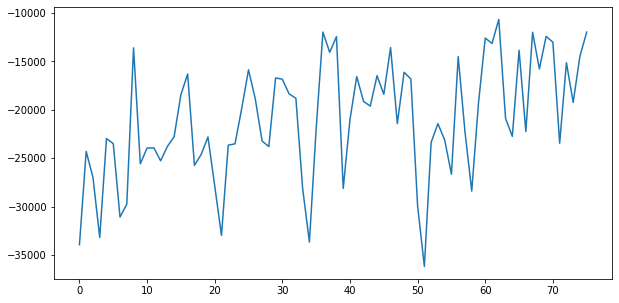

s: [0 0 4], mu: [24.562447  23.54332    1.6578531], a: [[23. 22.  1.]], exp_td_error: [30.], newMu: [24.05464   23.102655   1.5910093]

s: [ 1 12  0], mu: [10.578141    9.807537    0.95061326], a: [[10. 11.  5.]], exp_td_error: [1.91436947], newMu: [10.302595    9.573261    0.92638636]

s: [11  2  4], mu: [ 4.914457 12.701089  1.170589], a: [[10. 21.  5.]], exp_td_error: [3.32555598], newMu: [ 4.6341457 12.634988   1.1609247]

s: [ 0 13  4], mu: [9.005206   8.103179   0.85334396], a: [[14. 14.  0.]], exp_td_error: [10.32551694], newMu: [9.145334  8.2401705 0.8481811]

s: [ 0 17  0], mu: [7.278697   6.6853914  0.81447333], a: [[4. 4. 0.]], exp_td_error: [10.41193114], newMu: [7.255599  6.6782637 0.8046346]

s: [ 0 11  0], mu: [13.300979 12.274196  1.00007 ], a: [[13.  9.  0.]], exp_td_error: [5.81109644], newMu: [13.212436  12.209968   0.9809129]

s: [ 4 10  0], mu: [ 9.918126  11.425354   1.0709318], a: [[11. 15.  4.]], exp_td_error: [3.10834826], newMu: [ 9.800733  11.3752575  1.06075

s: [ 7 20  4], mu: [5.4416237 9.974717  1.6253035], a: [[ 8. 10.  5.]], exp_td_error: [6.79948697], newMu: [5.7735415 9.929899  1.6174399]

s: [ 5 20  4], mu: [6.9357986 9.119374  1.5086141], a: [[ 7. 10.  0.]], exp_td_error: [11.85233168], newMu: [7.2417564 9.077948  1.4887062]

s: [ 2 20  0], mu: [8.99896   8.559706  1.4097586], a: [[9. 0. 5.]], exp_td_error: [2.1280478], newMu: [9.1744375 8.594345  1.4054213]

s: [11 10  4], mu: [ 7.025447  14.851217   2.1590176], a: [[ 3. 14.  3.]], exp_td_error: [22.01638553], newMu: [ 7.4119697 14.946553   2.1724956]

s: [ 0 14  2], mu: [13.918044  12.523544   1.7579895], a: [[16. 16.  0.]], exp_td_error: [10.37994383], newMu: [14.522266  13.073566   1.8055675]

s: [ 0 20  0], mu: [9.910356 8.825735 1.411621], a: [[9. 7. 5.]], exp_td_error: [2.39922751], newMu: [9.99125   8.890081  1.4139434]

s: [ 9 10  4], mu: [11.036284  15.426795   2.1847947], a: [[ 6. 15.  5.]], exp_td_error: [15.59192191], newMu: [11.167068 15.477303  2.204942]

s: [ 0 15  

s: [30  0  4], mu: [ 4.0162725 18.932894   3.2219176], a: [[ 0. 25.  4.]], exp_td_error: [30.], newMu: [ 3.9908323 19.552364   3.327916 ]

s: [ 5 15  4], mu: [10.220958  13.694039   2.2745686], a: [[10. 15.  5.]], exp_td_error: [9.82178937], newMu: [10.40554   14.042107   2.3367167]

s: [ 0 20  4], mu: [8.860103  8.509919  1.5309253], a: [[11. 10.  0.]], exp_td_error: [9.09242179], newMu: [8.948818  8.599003  1.5479001]

s: [ 1 20  0], mu: [9.002659 9.213441 1.641385], a: [[ 9. 10.  0.]], exp_td_error: [10.61284144], newMu: [9.076049  9.37829   1.6658474]

s: [ 0 20  0], mu: [9.892015  9.318699  1.6109035], a: [[10.  8.  5.]], exp_td_error: [2.13858349], newMu: [10.043418   9.459917   1.6306394]

s: [10 10  4], mu: [12.489499  18.413874   2.9631538], a: [[13. 20.  2.]], exp_td_error: [14.53158166], newMu: [12.623763 18.64713   2.99612 ]

s: [ 3 20  2], mu: [ 6.908418  11.077884   1.9983338], a: [[9. 8. 1.]], exp_td_error: [8.06199796], newMu: [ 6.9929867 11.13241    2.0044851]

s: [ 4 

s: [ 6 20  4], mu: [ 2.6628113 10.951113   1.3244693], a: [[1. 7. 0.]], exp_td_error: [16.28588423], newMu: [ 2.6566684 10.864792   1.3382704]

s: [ 0 17  0], mu: [8.121394  7.942009  0.7991612], a: [[2. 1. 0.]], exp_td_error: [1.62078451], newMu: [8.154957   7.920912   0.82766926]

s: [1 8 0], mu: [26.191668  25.074331   1.4786298], a: [[20. 21.  5.]], exp_td_error: [30.], newMu: [24.75816   23.814495   1.6585402]

s: [ 0 19  4], mu: [6.753674  7.395514  0.9108351], a: [[9. 9. 3.]], exp_td_error: [8.30623054], newMu: [6.624491   7.348317   0.96543276]

s: [ 0 18  2], mu: [6.829704   7.517689   0.97365624], a: [[6. 2. 0.]], exp_td_error: [5.6641215], newMu: [6.7313886 7.4233766 1.017401 ]

s: [ 4 10  0], mu: [12.719964  14.42657    1.6292359], a: [[16. 14.  5.]], exp_td_error: [1.69628844], newMu: [12.283836  14.086974   1.6906621]

s: [20  0  4], mu: [ 1.034549  18.019922   2.0847178], a: [[ 0. 17.  0.]], exp_td_error: [10.63429957], newMu: [ 0.9358487 17.94617    2.10138  ]

s: [3 7 

s: [0 9 0], mu: [21.33399  19.761251  2.783873], a: [[21. 21.  0.]], exp_td_error: [30.], newMu: [21.299921  19.761356   2.6849718]

s: [ 0 20  0], mu: [8.77451   7.4516335 1.2671006], a: [[7. 6. 0.]], exp_td_error: [9.24703803], newMu: [8.647842  7.3416705 1.2190886]

s: [ 1 16  0], mu: [11.27424   10.00485    1.5031509], a: [[3. 0. 2.]], exp_td_error: [1.71769228], newMu: [11.076323  9.810404  1.439478]

s: [4 6 2], mu: [19.686224  18.677412   2.4189982], a: [[26. 19.  1.]], exp_td_error: [26.7189795], newMu: [19.865868  18.779476   2.3277318]

s: [11 15  0], mu: [ 6.4378133 13.482917   2.0271652], a: [[ 9. 11.  0.]], exp_td_error: [9.44098122], newMu: [ 6.4940214 13.435277   1.9769312]

s: [ 9 16  0], mu: [ 6.723821  10.052229   1.5643593], a: [[12.  9.  3.]], exp_td_error: [4.47505992], newMu: [6.790155  9.974902  1.5208973]

s: [12 15  2], mu: [ 5.6320767 13.922534   2.001612 ], a: [[0. 9. 0.]], exp_td_error: [21.30271005], newMu: [ 5.3466873 13.76878    1.9441836]

s: [ 3 14  0],

s: [19  9  0], mu: [ 4.175022  17.043926   1.2247783], a: [[ 6. 17.  0.]], exp_td_error: [5.89758857], newMu: [ 4.1597786 17.06981    1.2041557]

s: [ 8 16  0], mu: [ 7.0570407  11.802061    0.97143525], a: [[ 8. 14.  0.]], exp_td_error: [15.98683516], newMu: [ 7.111536  12.117836   0.9710525]

s: [ 2 20  0], mu: [7.8852487  6.1455617  0.59350157], a: [[11.  7.  0.]], exp_td_error: [5.77807821], newMu: [7.88061    6.173776   0.59123135]

s: [ 6 17  0], mu: [7.2254505  9.811441   0.84706175], a: [[ 9. 13.  5.]], exp_td_error: [1.80709727], newMu: [ 7.2557154  10.056883    0.84808326]

s: [15  7  4], mu: [ 4.892502  15.4842     1.0709498], a: [[12. 17.  1.]], exp_td_error: [1.87525092], newMu: [ 4.905317  15.526312   1.0581279]

s: [10 14  0], mu: [ 7.178785  14.391556   1.0187747], a: [[12. 16.  1.]], exp_td_error: [12.25778943], newMu: [ 7.3667073 14.46143    1.0079145]

s: [ 6 20  0], mu: [5.9361787 9.084129  0.8148783], a: [[ 4. 10.  1.]], exp_td_error: [16.1767899], newMu: [5.851423

s: [11  7  0], mu: [ 5.7021074 16.409548   0.8874676], a: [[11. 12.  1.]], exp_td_error: [0.59305126], newMu: [ 5.62296   16.407629   0.8885246]

s: [10  9  0], mu: [ 7.3576894  16.055494    0.90778667], a: [[10. 20.  0.]], exp_td_error: [2.44040228], newMu: [ 7.3042274 16.060833   0.9093162]

s: [ 0 19  0], mu: [7.5243235 6.164891  0.5707942], a: [[14.  5.  5.]], exp_td_error: [1.32385803], newMu: [7.5244     6.179925   0.57332265]

s: [14  9  4], mu: [ 3.677248  18.020695   0.8458108], a: [[ 8. 18.  0.]], exp_td_error: [3.25272455], newMu: [ 3.682853   18.04005     0.84638846]

s: [ 4 17  0], mu: [6.8080378 7.4937277 0.6916354], a: [[13.  6.  0.]], exp_td_error: [3.7683901], newMu: [6.8354225 7.4748464 0.6912677]

s: [11 13  0], mu: [ 4.4072366  16.1506      0.86396813], a: [[ 6. 17.  0.]], exp_td_error: [27.37118247], newMu: [ 4.474385  16.174192   0.8572695]

s: [ 0 20  0], mu: [7.47738   6.070124  0.5645932], a: [[8. 8. 0.]], exp_td_error: [10.29881624], newMu: [7.507432  6.097915

s: [22  5  4], mu: [ 3.71441   16.331594   1.6784352], a: [[ 5. 16.  0.]], exp_td_error: [25.87838039], newMu: [ 3.7372484 16.340086   1.6680421]

s: [11 11  0], mu: [ 8.927056  13.616578   1.6572686], a: [[13. 14.  0.]], exp_td_error: [8.8338676], newMu: [ 9.100389  13.676803   1.6578056]

s: [10 15  0], mu: [6.0148964 8.102304  1.1971794], a: [[ 5. 11.  5.]], exp_td_error: [2.75151249], newMu: [6.0191097 8.183136  1.2007285]

s: [15  5  4], mu: [ 5.121971  14.292383   1.5703157], a: [[ 9. 17.  0.]], exp_td_error: [2.76437372], newMu: [ 5.190731  14.322103   1.5672921]

s: [ 7 12  0], mu: [11.416091  11.318725   1.4356698], a: [[7. 7. 5.]], exp_td_error: [2.5161771], newMu: [11.447674  11.355945   1.4394889]

s: [7 9 4], mu: [15.384131  15.500231   1.8452394], a: [[13. 11.  5.]], exp_td_error: [22.07350462], newMu: [15.230731  15.364939   1.8648374]

s: [ 9 10  4], mu: [11.791078  14.089691   1.7532833], a: [[11. 14.  0.]], exp_td_error: [11.70890123], newMu: [11.596181  14.027563   1

s: [ 0 20  2], mu: [7.1128354 6.7712    1.3676393], a: [[10. 10.  5.]], exp_td_error: [6.85415212], newMu: [7.186548  6.8747697 1.378241 ]

s: [ 0 20  4], mu: [7.236347  6.961453  1.3873868], a: [[10. 10.  0.]], exp_td_error: [10.10853155], newMu: [7.3357596 7.082292  1.3985456]

s: [ 0 20  0], mu: [7.2526884 6.949138  1.3843945], a: [[8. 8. 0.]], exp_td_error: [10.29881624], newMu: [7.334123  7.0688996 1.3935876]

s: [ 0 18  0], mu: [7.843705  7.5772705 1.455798 ], a: [[10. 10.  5.]], exp_td_error: [1.8590637], newMu: [7.9601946 7.6927834 1.466711 ]

s: [10  8  4], mu: [ 6.461729  15.681829   2.1193476], a: [[ 7. 17.  0.]], exp_td_error: [7.07584224], newMu: [ 6.5582476 15.773775   2.1223695]

s: [ 0 15  0], mu: [11.88652   10.119918   1.7761073], a: [[10.  5.  0.]], exp_td_error: [5.1037044], newMu: [11.898285  10.153647   1.7722462]

s: [ 5 10  0], mu: [14.790078  15.001793   2.4731884], a: [[10.  7.  2.]], exp_td_error: [2.91333926], newMu: [14.7922325 15.026676   2.4623637]

s: [8

s: [18  9  4], mu: [ 5.974152  18.604773   1.5044118], a: [[12. 11.  1.]], exp_td_error: [4.86124181], newMu: [ 5.88776   18.39897    1.4580429]

s: [19 10  0], mu: [ 5.6424108 19.02816    1.4745778], a: [[ 1. 20.  4.]], exp_td_error: [9.15647379], newMu: [ 5.509287  18.840591   1.4444275]

s: [20  0  4], mu: [ 5.4434505 19.340006   1.4583483], a: [[ 8. 28.  0.]], exp_td_error: [10.52433329], newMu: [ 5.364588  19.440025   1.4351683]

s: [ 0 18  0], mu: [9.632634  7.9722567 0.9975085], a: [[12. 11.  5.]], exp_td_error: [1.63959117], newMu: [9.632269   7.974625   0.98918235]

s: [12  8  4], mu: [ 8.990867  17.168728   1.4679551], a: [[16. 17.  0.]], exp_td_error: [1.34300036], newMu: [ 8.957947  17.20623    1.4501308]

s: [11 15  0], mu: [ 7.961641  15.927916   1.3927227], a: [[ 7. 15.  0.]], exp_td_error: [19.29446631], newMu: [ 7.8865147 15.911013   1.3649466]

s: [ 3 20  0], mu: [8.392664   7.845772   0.99108213], a: [[10.  2.  2.]], exp_td_error: [2.82046959], newMu: [8.395238   7.7

s: [ 9 17  0], mu: [ 6.0007114 10.168312   1.4842215], a: [[ 3. 10.  5.]], exp_td_error: [3.55437165], newMu: [ 6.0654325 10.111839   1.4892455]

s: [12  7  4], mu: [ 8.248315 16.863028  2.037199], a: [[12. 11.  0.]], exp_td_error: [4.02228485], newMu: [ 8.337522 16.86134   2.04742 ]

s: [13  8  0], mu: [ 7.139688  16.69911    1.9563206], a: [[ 5. 14.  5.]], exp_td_error: [1.07401511], newMu: [ 7.217169  16.693033   1.9662383]

s: [ 4 12  4], mu: [15.921369  15.915558   2.5610433], a: [[11. 11.  3.]], exp_td_error: [6.89281881], newMu: [15.793232  15.7103815  2.5453348]

s: [ 4 13  2], mu: [13.460315 13.265844  2.199875], a: [[17. 17.  0.]], exp_td_error: [8.54032558], newMu: [13.520146  13.27431    2.1991274]

s: [ 4 20  0], mu: [8.630076 7.573134 1.478339], a: [[20.  9.  0.]], exp_td_error: [2.33111831], newMu: [8.687521  7.601062  1.4794619]

s: [15 19  0], mu: [ 3.6302109 13.366901   1.5374165], a: [[ 0. 11.  4.]], exp_td_error: [16.80264277], newMu: [ 3.5008407 12.6433935  1.50197

s: [ 1 20  0], mu: [9.29399   8.312748  1.6174369], a: [[ 9. 10.  5.]], exp_td_error: [2.20303528], newMu: [9.44733   8.413063  1.6287092]

s: [10 10  4], mu: [ 6.577628  15.540503   2.2411923], a: [[ 5. 15.  2.]], exp_td_error: [20.49435846], newMu: [ 6.6387568 15.57273    2.2571375]

s: [ 0 15  2], mu: [16.672565 14.771903  2.499059], a: [[17. 14.  4.]], exp_td_error: [4.93834576], newMu: [16.789234 14.875476  2.518922]

s: [ 3 19  4], mu: [8.412846  8.986891  1.6707658], a: [[7. 7. 0.]], exp_td_error: [8.98127549], newMu: [8.507453  8.993137  1.6748924]

s: [ 3 16  0], mu: [10.093352  10.362278   1.8883528], a: [[10.  1.  2.]], exp_td_error: [1.67319373], newMu: [10.197201  10.347098   1.8897632]

s: [12  7  2], mu: [ 4.9939175 15.3216915  2.1852427], a: [[ 7. 19.  0.]], exp_td_error: [4.2822891], newMu: [ 5.0385075 15.346941   2.1933544]

s: [ 0 16  0], mu: [15.34788  13.387314  2.296751], a: [[17. 12.  0.]], exp_td_error: [5.88902469], newMu: [15.408078  13.422787   2.2937663]

s:

s: [ 8 20  4], mu: [6.69048   8.592298  1.2068261], a: [[ 7. 10.  5.]], exp_td_error: [7.4408639], newMu: [6.6835566 8.6324415 1.2063015]

s: [ 5 20  4], mu: [8.836752  7.9690127 1.164917 ], a: [[9. 9. 1.]], exp_td_error: [8.3397802], newMu: [8.824845  7.9804926 1.1660706]

s: [ 5 19  0], mu: [8.759953  8.02811   1.1710416], a: [[14.  2.  0.]], exp_td_error: [2.01296446], newMu: [8.782433  8.03429   1.1699507]

s: [17 11  0], mu: [ 2.7519565 15.71484    1.5518911], a: [[ 0. 14.  0.]], exp_td_error: [30.], newMu: [ 2.7278938 15.654776   1.5117381]

s: [ 3 15  0], mu: [10.704142   9.331224   1.2267215], a: [[15. 10.  1.]], exp_td_error: [4.9572409], newMu: [10.739531   9.355549   1.2219156]

s: [ 8 15  0], mu: [ 7.139307  10.329177   1.2760625], a: [[ 7. 14.  2.]], exp_td_error: [14.5327753], newMu: [ 7.158243  10.438653   1.2745997]

s: [ 1 19  2], mu: [10.469818   8.75847    1.1603221], a: [[10.  0.  0.]], exp_td_error: [1.54413063], newMu: [10.464696   8.763374   1.1574858]

s: [11  9

s: [20  2  4], mu: [ 0.9741346 13.661036   0.8479868], a: [[ 0. 18.  4.]], exp_td_error: [30.], newMu: [ 0.88959295 13.849712    0.88056326]

s: [ 2 10  4], mu: [15.490364  14.347008   1.6461456], a: [[22. 10.  2.]], exp_td_error: [2.46914534], newMu: [15.334319  14.252176   1.6426351]

s: [14 10  2], mu: [ 1.5362217  12.799172    0.92868304], a: [[ 5. 19.  0.]], exp_td_error: [30.], newMu: [ 1.5195036 13.091293   0.9482496]

s: [ 0 19  0], mu: [9.249272  7.5468073 1.0835701], a: [[4. 4. 4.]], exp_td_error: [1.93609753], newMu: [9.202928  7.536619  1.0842289]

s: [4 9 4], mu: [12.800308  14.894344   1.5805421], a: [[20. 18.  0.]], exp_td_error: [30.], newMu: [13.728724  15.176845   1.6300299]

s: [ 6 17  0], mu: [3.394582  9.154892  0.9915147], a: [[ 4. 10.  4.]], exp_td_error: [2.86843243], newMu: [3.4780376 9.256891  0.9956528]

s: [10  7  4], mu: [ 3.7281394 13.642538   1.1217613], a: [[0. 9. 2.]], exp_td_error: [11.5232545], newMu: [ 3.8263614 13.781756   1.1347718]

s: [1 6 2], mu

s: [ 0 16  4], mu: [13.126561   11.975914    0.80854946], a: [[11. 11.  5.]], exp_td_error: [6.87916213], newMu: [12.680158   11.576887    0.82405925]

s: [ 0 17  4], mu: [11.8836975  10.725034    0.79046905], a: [[10.  9.  0.]], exp_td_error: [9.14263304], newMu: [11.444423   10.328635    0.79860055]

s: [ 1 16  0], mu: [10.535317   9.683447   0.7879206], a: [[15. 14.  1.]], exp_td_error: [8.67837576], newMu: [10.438725   9.598437   0.8026173]

s: [ 2 20  0], mu: [8.204219  7.6970005 0.7736354], a: [[ 8. 10.  5.]], exp_td_error: [2.38585953], newMu: [8.173623  7.6690264 0.7857954]

s: [10 10  4], mu: [ 6.255239  15.485084   1.1821542], a: [[10. 20.  0.]], exp_td_error: [24.99099425], newMu: [ 6.4109063 15.590784   1.1942017]

s: [ 0 20  0], mu: [9.171019  8.208297  0.7868556], a: [[4. 0. 5.]], exp_td_error: [4.23068465], newMu: [9.097321   8.157837   0.79864466]

s: [ 4 10  4], mu: [16.349228  17.614925   1.2807919], a: [[17. 19.  5.]], exp_td_error: [8.88851174], newMu: [16.275639  1

s: [8 9 4], mu: [12.269777  16.729322   1.3391929], a: [[12. 16.  1.]], exp_td_error: [30.], newMu: [12.270771  16.681578   1.3362076]

s: [ 4 15  0], mu: [ 9.980621  12.165107   1.1178384], a: [[11. 15.  0.]], exp_td_error: [13.60258325], newMu: [10.126522  12.35735    1.1237805]

s: [ 0 20  0], mu: [10.778378   9.657571   1.0090985], a: [[9. 9. 3.]], exp_td_error: [8.45264639], newMu: [10.842467   9.727748   1.0148301]

s: [ 0 19  2], mu: [11.657465  10.50785    1.0544401], a: [[9. 9. 0.]], exp_td_error: [10.21638427], newMu: [11.61492  10.484133  1.051493]

s: [ 0 18  0], mu: [12.032113  10.961594   1.0760316], a: [[17. 12.  5.]], exp_td_error: [0.92763054], newMu: [12.012918  10.9576645  1.0754102]

s: [17  8  4], mu: [ 4.714627  16.061586   1.2465149], a: [[0. 8. 0.]], exp_td_error: [3.79445502], newMu: [ 4.6663256 15.985269   1.2402389]

s: [9 6 0], mu: [12.141972  16.649319   1.3154747], a: [[ 4. 12.  5.]], exp_td_error: [30.], newMu: [11.637806  16.460907   1.3422925]

s: [1 8 

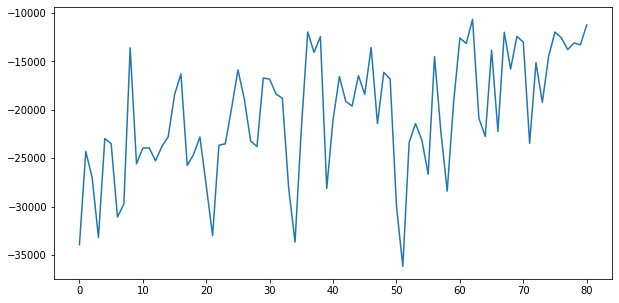

s: [0 0 4], mu: [20.507326  22.85767    3.1614494], a: [[24. 24.  5.]], exp_td_error: [30.], newMu: [20.888662  23.162014   3.2401552]

s: [ 0 14  4], mu: [14.560659  14.527492   2.1974704], a: [[14. 13.  3.]], exp_td_error: [7.58288276], newMu: [14.685371  14.586401   2.2283328]

s: [ 1 17  2], mu: [12.988023  12.385711   1.9648538], a: [[17.  5.  3.]], exp_td_error: [1.9091346], newMu: [13.124515 12.454479  1.993698]

s: [13 12  2], mu: [ 5.9066687 15.47127    2.2131371], a: [[14. 11.  0.]], exp_td_error: [4.91911832], newMu: [ 6.106319 15.495461  2.230757]

s: [16 13  0], mu: [ 3.9913335 14.839983   2.1438506], a: [[ 5. 17.  5.]], exp_td_error: [2.35406465], newMu: [ 4.12195   14.85792    2.1578434]

s: [21  3  4], mu: [ 3.4342685 15.051156   2.1811051], a: [[9. 7. 2.]], exp_td_error: [3.14996513], newMu: [ 3.5021307 14.96847    2.1850884]

s: [23  0  2], mu: [ 3.2405732 15.692911   2.2570784], a: [[ 4. 16.  0.]], exp_td_error: [9.58940275], newMu: [ 3.3069546 15.609089   2.2487419]

s: [ 5 17  0], mu: [5.67112   8.797802  1.3278832], a: [[0. 4. 1.]], exp_td_error: [13.32301962], newMu: [5.491141  8.637915  1.2721624]

s: [ 1 11  0], mu: [13.336799  13.945592   1.8232098], a: [[16. 17.  1.]], exp_td_error: [11.01359749], newMu: [13.194691  13.763565   1.7276168]

s: [ 0 18  0], mu: [10.0098915  9.048052   1.284617 ], a: [[12. 12.  0.]], exp_td_error: [10.37178538], newMu: [9.977718  8.9999    1.2275673]

s: [ 0 20  0], mu: [9.075102  8.0245075 1.1457831], a: [[10. 10.  4.]], exp_td_error: [2.13858349], newMu: [9.058373  7.9962573 1.1019559]

s: [10 10  4], mu: [ 6.0087323 12.357922   1.4667807], a: [[3. 8. 1.]], exp_td_error: [2.63678607], newMu: [ 5.8606057 12.218059   1.4181864]

s: [5 8 0], mu: [13.4888525 15.177221   1.7039114], a: [[12. 12.  0.]], exp_td_error: [30.], newMu: [13.293649 14.904959  1.604108]

s: [ 5 10  0], mu: [11.575479  13.6815815  1.4878986], a: [[14. 15.  3.]], exp_td_error: [16.3867688], newMu: [11.491935 13.527159  1.423342]

s: [ 4 15  2

s: [ 1 16  0], mu: [11.417109   9.723521   1.1818535], a: [[16. 11.  5.]], exp_td_error: [0.95483536], newMu: [11.441949   9.772155   1.1793501]

s: [17  6  4], mu: [ 3.2377458 11.919266   1.4496578], a: [[0. 4. 0.]], exp_td_error: [5.25585817], newMu: [ 3.2419803 11.905252   1.4384189]

s: [13  0  0], mu: [ 4.3549156 12.253973   1.430932 ], a: [[12. 25.  0.]], exp_td_error: [5.18151769], newMu: [ 4.5203443 12.3789425  1.4233665]

s: [ 0 15  0], mu: [13.505272  11.471441   1.2853658], a: [[13. 13.  0.]], exp_td_error: [10.46842067], newMu: [13.588716  11.582141   1.2809558]

s: [ 0 18  0], mu: [10.755238   8.869505   1.0923193], a: [[17. 12.  0.]], exp_td_error: [5.84619187], newMu: [10.888443   9.006534   1.0915475]

s: [ 5 20  0], mu: [4.820494  8.0467005 1.0819926], a: [[4. 9. 0.]], exp_td_error: [14.86063507], newMu: [4.8462152 8.094302  1.0748247]

s: [ 0 19  0], mu: [10.255727   8.445932   1.0448481], a: [[11. 11.  0.]], exp_td_error: [10.33589019], newMu: [10.502904   8.665883  

s: [ 0 20  2], mu: [10.992833   9.730598   0.9407811], a: [[16.  5.  0.]], exp_td_error: [2.80212679], newMu: [10.85951     9.609228    0.95789987]

s: [11 15  0], mu: [ 4.8642545 11.27877    1.0935199], a: [[ 0. 10.  0.]], exp_td_error: [24.28476833], newMu: [ 4.5715523 10.959574   1.0921832]

s: [ 1 15  0], mu: [13.938253 13.242572  1.173983], a: [[9. 9. 0.]], exp_td_error: [9.76372888], newMu: [13.503796  12.796859   1.1649705]

s: [ 1 14  0], mu: [14.592127  14.096381   1.2426236], a: [[17. 14.  0.]], exp_td_error: [6.90638366], newMu: [14.240798  13.693406   1.2287529]

(array([26.655598 , 27.091938 ,  1.9676282], dtype=float32), array([26., 26.,  5.], dtype=float32))
s: [0 0 4], mu: [24.017439  24.855295   1.8331087], a: [[24. 24.  5.]], exp_td_error: [30.], newMu: [23.76019   24.62676    1.9478681]

s: [ 0 14  4], mu: [15.565503  14.80671    1.3809193], a: [[13. 13.  0.]], exp_td_error: [10.29557717], newMu: [15.281316  14.481313   1.4206896]

s: [ 0 17  0], mu: [11.159599  10.0

s: [12  9  0], mu: [ 6.0931745 14.652725   1.6631439], a: [[10. 16.  5.]], exp_td_error: [0.49779686], newMu: [ 6.182235  14.665615   1.6621957]

s: [ 6 15  4], mu: [ 9.045621  12.746315   1.5565779], a: [[10. 10.  0.]], exp_td_error: [8.18006353], newMu: [ 9.158023 12.770115  1.554123]

s: [ 6 15  0], mu: [ 6.648936 10.792182  1.363637], a: [[4. 8. 0.]], exp_td_error: [12.7993957], newMu: [ 6.596918  10.666227   1.3465741]

s: [ 2 13  0], mu: [14.382999  13.331799   1.7356914], a: [[18. 17.  0.]], exp_td_error: [8.25385425], newMu: [14.456031  13.389471   1.7266642]

s: [ 3 20  0], mu: [6.084584  8.104565  1.1547161], a: [[6. 9. 5.]], exp_td_error: [2.90766986], newMu: [6.1015534 8.109877  1.1500275]

s: [ 9 10  4], mu: [10.651531  15.90297    1.7585777], a: [[ 4. 13.  0.]], exp_td_error: [23.18611937], newMu: [10.368422  15.773557   1.7174735]

s: [ 0 13  0], mu: [14.94355   13.150687   1.6781836], a: [[13. 13.  5.]], exp_td_error: [1.48443608], newMu: [14.889393  13.102186   1.65565

s: [ 7 10  4], mu: [10.938989  16.753992   1.2761523], a: [[17. 15.  0.]], exp_td_error: [7.08487211], newMu: [11.111866  16.799026   1.2834563]

s: [ 9 15  0], mu: [ 6.0849915 12.234307   1.0697496], a: [[15.  8.  5.]], exp_td_error: [2.2289269], newMu: [ 6.2261934 12.271391   1.0769328]

s: [16 13  4], mu: [ 4.377267  15.711253   1.2299812], a: [[ 2. 16.  0.]], exp_td_error: [30.], newMu: [ 4.414387  15.749459   1.2213187]

s: [ 2 19  0], mu: [8.295911  8.872831  0.8932428], a: [[13.  9.  5.]], exp_td_error: [1.31809775], newMu: [8.380793 8.890584 0.891037]

s: [15  9  4], mu: [ 5.7010684 16.120598   1.2204137], a: [[10. 13.  0.]], exp_td_error: [10.0735998], newMu: [ 5.8326116 16.134743   1.2095251]

s: [12 12  0], mu: [ 6.8834705 16.18056    1.2121307], a: [[ 6. 18.  5.]], exp_td_error: [2.39903126], newMu: [ 6.9980693 16.195736   1.2056731]

s: [18  2  4], mu: [ 4.859959  15.984162   1.2006601], a: [[ 6. 23.  2.]], exp_td_error: [6.06990634], newMu: [ 5.00198  16.067457  1.197674]

s: [ 0 19  0], mu: [8.86029    7.1897717  0.66592395], a: [[4. 4. 5.]], exp_td_error: [1.93609753], newMu: [8.84659    7.1898513  0.66414875]

s: [4 9 4], mu: [17.442703 17.200714  1.163593], a: [[12. 16.  5.]], exp_td_error: [30.], newMu: [17.261309  17.102718   1.2218064]

s: [ 0 15  4], mu: [13.219366  11.280388   0.8369668], a: [[20. 12.  0.]], exp_td_error: [4.04434721], newMu: [13.1242    11.2187805  0.8732287]

s: [ 8 17  0], mu: [4.90336    8.37345    0.88805574], a: [[ 5. 13.  5.]], exp_td_error: [2.81932943], newMu: [4.8366623 8.417935  0.9087704]

s: [13  7  4], mu: [ 8.405621  15.934266   1.2856817], a: [[ 4. 12.  5.]], exp_td_error: [6.63009075], newMu: [ 8.277108  15.913044   1.3224773]

s: [5 9 4], mu: [15.446981  16.401423   1.3181503], a: [[15. 20.  5.]], exp_td_error: [30.], newMu: [15.349678  16.501787   1.4242303]

s: [ 0 19  4], mu: [9.299098  7.597704  0.8295385], a: [[5. 5. 4.]], exp_td_error: [6.80734693], newMu: [9.166607   7.548429   0.88145745]

s: [ 0 14  4]

s: [ 6 20  0], mu: [6.11256  8.856426 1.160714], a: [[ 7. 10.  0.]], exp_td_error: [11.53212305], newMu: [6.318087 8.673653 1.140223]

s: [ 3 20  0], mu: [7.284749  8.647028  1.1420155], a: [[5. 8. 0.]], exp_td_error: [12.48133306], newMu: [7.39079   8.515904  1.1143047]

s: [ 0 18  0], mu: [11.460016  9.890855  1.184329], a: [[8. 8. 5.]], exp_td_error: [1.24353379], newMu: [11.377204   9.779767   1.1607782]

s: [8 8 4], mu: [13.899551  18.739016   1.8746402], a: [[18. 13.  0.]], exp_td_error: [30.], newMu: [14.191192  18.456083   1.8133408]

s: [13 11  0], mu: [ 7.5372324 17.466555   1.7264369], a: [[ 9. 15.  2.]], exp_td_error: [12.03668615], newMu: [ 7.752298  17.249432   1.6786599]

s: [ 7 16  2], mu: [7.11558   9.348768  1.1117711], a: [[ 6. 13.  0.]], exp_td_error: [18.18925987], newMu: [7.1721654 9.30384   1.0880474]

s: [ 0 19  0], mu: [10.715151   8.887487   1.0105461], a: [[10.  0.  3.]], exp_td_error: [1.60659737], newMu: [10.707021   8.833828   0.9844737]

s: [10  9  2], mu

s: [ 2 17  0], mu: [8.939209  7.817519  1.1036736], a: [[18.  0.  0.]], exp_td_error: [0.531094], newMu: [8.941346  7.8548017 1.1094637]

s: [20  7  0], mu: [ 3.095136  16.073004   1.7873693], a: [[ 0. 14.  0.]], exp_td_error: [22.68303283], newMu: [ 3.0471177 16.065468   1.7737546]

s: [ 6 11  0], mu: [10.797805  11.925353   1.5213715], a: [[15.  7.  1.]], exp_td_error: [1.58092442], newMu: [10.785932  11.927452   1.5178782]

s: [14  8  0], mu: [ 5.333397  15.739613   1.7725646], a: [[ 0. 12.  0.]], exp_td_error: [13.01198244], newMu: [ 5.2107744 15.671711   1.7507987]

s: [ 2 10  0], mu: [16.174     15.722363   1.8260738], a: [[13. 15.  0.]], exp_td_error: [25.32819543], newMu: [16.024586  15.601351   1.7837077]

s: [ 0 15  0], mu: [13.186632  11.035625   1.3157979], a: [[16.  6.  0.]], exp_td_error: [3.23068468], newMu: [13.053392  10.907234   1.2807927]

s: [10 11  0], mu: [ 7.5275593 15.187389   1.6962664], a: [[ 9. 19.  4.]], exp_td_error: [1.75986078], newMu: [ 7.3955564 15.1262

s: [23  0  4], mu: [ 6.3889008 18.651115   1.2122929], a: [[ 7. 29.  1.]], exp_td_error: [13.40062162], newMu: [ 6.4915705 18.902554   1.2424552]

s: [ 1 19  0], mu: [11.817991  10.147465   0.5643613], a: [[17.  9.  1.]], exp_td_error: [3.71395428], newMu: [11.8818035  10.194096    0.57680345]

s: [ 9 18  0], mu: [6.2152157 9.952733  0.8290879], a: [[11.  7.  4.]], exp_td_error: [3.2361359], newMu: [6.2735543  9.962687   0.83915293]

s: [13 15  4], mu: [ 9.085643  17.532347   1.1826596], a: [[ 7. 15.  5.]], exp_td_error: [12.71525665], newMu: [ 9.110181  17.573942   1.2223129]

s: [ 5 20  4], mu: [7.401006  9.994439  0.8298306], a: [[7. 2. 5.]], exp_td_error: [3.07526999], newMu: [7.425552  9.933958  0.8463386]

s: [10 12  4], mu: [11.568187  17.120798   1.1783004], a: [[20. 18.  0.]], exp_td_error: [6.02363945], newMu: [11.67229   17.127586   1.2069579]

s: [12 20  0], mu: [5.536723  9.525706  0.9007807], a: [[ 9. 10.  5.]], exp_td_error: [5.50213504], newMu: [5.6050954  9.479521   0.

s: [ 0 19  4], mu: [13.138592    9.422991    0.98105437], a: [[12.  7.  2.]], exp_td_error: [4.67574594], newMu: [13.253967    9.5062275   0.98795855]

s: [ 5 16  2], mu: [7.5462165 8.965913  1.1187425], a: [[8. 0. 0.]], exp_td_error: [1.48010479], newMu: [7.576125  9.089455  1.1284708]

s: [13  6  0], mu: [11.271599  17.172743   1.7203872], a: [[11. 24.  0.]], exp_td_error: [4.19292768], newMu: [11.360422  17.270193   1.7232015]

s: [ 0 20  0], mu: [12.129277   8.605953   0.9383149], a: [[2. 0. 1.]], exp_td_error: [7.080254], newMu: [11.708724   8.321496   0.9232051]

s: [ 2 10  0], mu: [19.85597   17.239063   1.5902615], a: [[24. 12.  5.]], exp_td_error: [0.73690673], newMu: [19.850536  17.22377    1.5894294]

s: [26  0  4], mu: [ 5.3736005 18.458239   1.8730904], a: [[ 0. 12.  0.]], exp_td_error: [13.62860528], newMu: [ 5.098753  18.187008   1.8442385]

s: [14  2  0], mu: [10.696048  17.42423    1.7261958], a: [[16.  8.  5.]], exp_td_error: [1.8912494], newMu: [10.558125  17.310396 

s: [ 0 20  4], mu: [9.483211   6.8585997  0.92951983], a: [[12. 10.  2.]], exp_td_error: [6.61711974], newMu: [9.3435955 6.8189425 0.9352517]

s: [ 2 20  2], mu: [5.7463617 8.17021   1.178458 ], a: [[4. 0. 0.]], exp_td_error: [4.96210561], newMu: [5.643525  8.116577  1.1826241]

s: [ 6 10  0], mu: [13.552417  13.855518   1.5570335], a: [[13. 11.  0.]], exp_td_error: [14.50841921], newMu: [13.128639  13.571378   1.5360727]

s: [ 8 11  0], mu: [ 8.819985  12.217868   1.4804778], a: [[ 6. 11.  5.]], exp_td_error: [2.52475379], newMu: [ 8.388565 11.935596  1.465933]

s: [14  1  4], mu: [ 9.970218  15.752685   1.8024417], a: [[1. 9. 5.]], exp_td_error: [5.98306293], newMu: [ 9.562304  15.646491   1.8159248]

s: [6 0 4], mu: [21.199554  17.68863    1.7427356], a: [[22. 10.  0.]], exp_td_error: [8.75311489], newMu: [21.04576   17.475658   1.7222213]

s: [18  0  0], mu: [ 4.8860865 15.449465   1.913113 ], a: [[10. 19.  3.]], exp_td_error: [0.93009584], newMu: [ 4.627627  15.329684   1.9156667]

s: [ 2 13  0], mu: [10.746978  9.791859  2.236746], a: [[18.  2.  3.]], exp_td_error: [0.77202035], newMu: [10.943347   9.74249    2.2406127]

s: [18  5  2], mu: [ 4.564454  14.379078   2.4648583], a: [[ 4. 10.  2.]], exp_td_error: [6.60767835], newMu: [ 4.639083 14.318996  2.454402]

s: [12  5  2], mu: [ 8.996186  13.958037   2.6155486], a: [[ 9. 15.  0.]], exp_td_error: [1.86931933], newMu: [ 9.093492  13.902232   2.6089559]

s: [ 6 10  0], mu: [11.886005 12.146385  2.574378], a: [[13. 10.  5.]], exp_td_error: [2.53884956], newMu: [12.027411 12.119248  2.578644]

s: [19  0  4], mu: [ 4.483361  14.284382   2.4397483], a: [[ 2. 12.  5.]], exp_td_error: [8.91280772], newMu: [ 4.499352  14.21533    2.4375663]

s: [9 2 4], mu: [15.570332 12.918405  2.905158], a: [[18. 18.  5.]], exp_td_error: [14.56475495], newMu: [15.749487 12.961827  2.938958]

s: [ 9 10  4], mu: [ 8.553372  12.608555   2.4422812], a: [[8. 8. 0.]], exp_td_error: [2.02512147], newMu: [ 8.667293 12.59882   2.457623]

s: [

s: [ 3 20  0], mu: [6.5960784 9.687004  1.8521279], a: [[4. 7. 4.]], exp_td_error: [3.64881977], newMu: [6.6583934 9.753193  1.8562105]

s: [ 7 10  4], mu: [15.465764  13.253699   2.5104554], a: [[21. 20.  0.]], exp_td_error: [7.9899935], newMu: [15.653157  13.348074   2.5117142]

s: [ 8 20  0], mu: [5.0144043 9.914491  1.856716 ], a: [[8. 8. 0.]], exp_td_error: [7.77703387], newMu: [5.10934   9.992698  1.8553281]

s: [ 8 18  0], mu: [ 5.920747  10.502051   1.9235487], a: [[0. 7. 5.]], exp_td_error: [12.04739619], newMu: [ 5.923375  10.517681   1.9225984]

s: [ 1 15  4], mu: [16.69984   12.2305765  2.3729303], a: [[10.  8.  0.]], exp_td_error: [7.69217916], newMu: [16.619114  12.157538   2.3457649]

s: [ 3 13  0], mu: [16.818674  13.5362015  2.509815 ], a: [[14. 17.  3.]], exp_td_error: [10.17849626], newMu: [16.764984  13.542059   2.4956298]

s: [ 0 20  2], mu: [12.877526   8.7295685  1.8450471], a: [[10.  0.  0.]], exp_td_error: [2.57542829], newMu: [12.674385   8.581298   1.8116797]

s: [ 0 17  0], mu: [11.176793   7.7370815  1.10724  ], a: [[13. 11.  0.]], exp_td_error: [8.32360052], newMu: [11.290836   7.8749704  1.1038439]

s: [ 2 18  0], mu: [6.0373654 9.871091  1.5020916], a: [[7. 9. 0.]], exp_td_error: [11.6359791], newMu: [6.1017942 9.953829  1.4947443]

s: [ 0 17  0], mu: [11.408423   7.9963846  1.0972893], a: [[10.  0.  0.]], exp_td_error: [1.06659331], newMu: [11.501516   8.089757   1.0894508]

s: [10  7  0], mu: [ 9.501649  14.222407   1.9045019], a: [[ 7. 17.  4.]], exp_td_error: [10.57282952], newMu: [ 9.441835  14.360452   1.9143938]

s: [ 0 14  4], mu: [14.396574  10.511749   1.2817944], a: [[11. 10.  5.]], exp_td_error: [6.21099358], newMu: [14.387961  10.551811   1.2865629]

s: [ 1 14  4], mu: [14.285152  10.7467575  1.3126426], a: [[20. 16.  2.]], exp_td_error: [4.97457905], newMu: [14.327063  10.845041   1.3240662]

s: [ 5 20  2], mu: [ 4.0529313 11.510902   1.7910497], a: [[10. 10.  2.]], exp_td_error: [6.84193911], newMu: [ 4.095586  11.599367 

s: [6 9 0], mu: [13.989542  14.5841255  1.9218433], a: [[ 7. 13.  5.]], exp_td_error: [30.], newMu: [13.676355  14.544275   1.9519645]

s: [ 0 12  4], mu: [17.149836  15.161028   2.0331597], a: [[20. 12.  5.]], exp_td_error: [2.7300143], newMu: [16.977224 15.066549  2.074538]

s: [ 8 14  4], mu: [ 5.9531455 12.684964   1.7537434], a: [[ 9. 10.  0.]], exp_td_error: [9.06125102], newMu: [ 5.8245234 12.538987   1.7583115]

s: [ 7 14  0], mu: [ 5.7953672 12.122146   1.7116618], a: [[ 9. 16.  5.]], exp_td_error: [1.74420379], newMu: [ 5.6909547 12.004973   1.7175049]

s: [16  4  4], mu: [ 4.3444433 16.600796   2.1928964], a: [[ 0. 16.  2.]], exp_td_error: [30.], newMu: [ 4.104214  16.524832   2.1956425]

s: [ 0 10  2], mu: [17.205816 15.442955  2.225724], a: [[20. 17.  0.]], exp_td_error: [9.34718917], newMu: [17.116816  15.399552   2.2388313]

s: [ 3 17  0], mu: [ 5.8378744 10.396308   1.5569377], a: [[11.  3.  5.]], exp_td_error: [2.3357326], newMu: [ 5.7701464 10.305236   1.5547861]

s: 

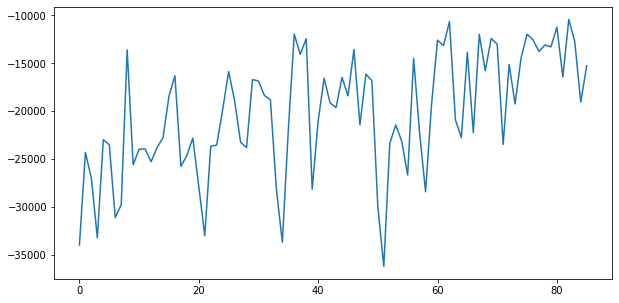

s: [0 0 4], mu: [21.865873  19.359169   2.2024817], a: [[26. 26.  1.]], exp_td_error: [30.], newMu: [22.454414  20.001638   2.1995165]

s: [ 0 16  0], mu: [15.763556  12.854803   1.6160085], a: [[13. 13.  5.]], exp_td_error: [1.47579776], newMu: [16.006496 13.144577  1.605798]

s: [13  6  4], mu: [ 8.220671  16.352116   1.7842039], a: [[5. 7. 3.]], exp_td_error: [5.64327409], newMu: [ 8.290594  16.446285   1.7684593]

s: [11  3  2], mu: [ 9.935135  16.557968   1.7733748], a: [[ 9. 10.  0.]], exp_td_error: [3.53676171], newMu: [10.011107  16.635174   1.7550533]

s: [10  3  0], mu: [11.997779  16.639526   1.7542005], a: [[ 4. 10.  1.]], exp_td_error: [11.16995597], newMu: [11.720333  16.65149    1.7271248]

s: [4 3 0], mu: [23.144775  21.041412   2.1131854], a: [[23. 24.  0.]], exp_td_error: [30.], newMu: [23.41497   21.437351   2.0402858]

s: [ 3 17  0], mu: [ 9.386401  11.0451145  1.254835 ], a: [[5. 4. 0.]], exp_td_error: [8.07343394], newMu: [ 9.052097  10.909935   1.2025423]

s: [ 4

s: [ 5 20  0], mu: [7.663206  8.881187  1.3048586], a: [[18. 10.  4.]], exp_td_error: [0.65599234], newMu: [7.830246 8.912145 1.318652]

s: [23 10  4], mu: [ 3.3592145 18.692965   1.7032073], a: [[ 1. 20.  0.]], exp_td_error: [30.], newMu: [ 3.433795  18.908875   1.6917588]

s: [ 4 20  0], mu: [8.615318 8.957051 1.342868], a: [[ 6. 10.  2.]], exp_td_error: [11.21167455], newMu: [8.608874  9.026421  1.3499087]

s: [ 0 20  2], mu: [11.153212   9.328684   1.4525533], a: [[12. 10.  5.]], exp_td_error: [5.4676364], newMu: [11.156769   9.3651495  1.4664769]

s: [ 2 20  4], mu: [10.443071   9.226007   1.4244246], a: [[ 8. 10.  5.]], exp_td_error: [7.74633064], newMu: [10.431562   9.264448   1.4409211]

s: [ 0 20  4], mu: [11.189995  9.454107  1.489278], a: [[22.  7.  5.]], exp_td_error: [1.14424492], newMu: [11.205199   9.496334   1.5084944]

s: [15 17  4], mu: [ 4.601383  11.86981    1.3293619], a: [[10.  9.  0.]], exp_td_error: [6.34602782], newMu: [ 4.6265745 11.988485   1.3327923]

s: [16

s: [20  6  0], mu: [ 1.428608  14.779469   1.3081148], a: [[ 0. 16.  0.]], exp_td_error: [30.], newMu: [ 1.3946943 14.730044   1.3045003]

s: [ 4 12  0], mu: [6.374045  8.536794  1.2207862], a: [[4. 8. 5.]], exp_td_error: [1.5386164], newMu: [6.380257  8.471658  1.2285466]

s: [8 2 4], mu: [14.433014  13.906193   1.8692266], a: [[13. 16.  0.]], exp_td_error: [17.72834517], newMu: [14.342141  13.833176   1.8695349]

s: [5 8 0], mu: [12.896892  12.54901    1.7338388], a: [[13.  9.  0.]], exp_td_error: [12.58285203], newMu: [12.79079  12.404996  1.717883]

s: [9 7 0], mu: [ 7.556422  13.318793   1.6033604], a: [[10. 18.  3.]], exp_td_error: [30.], newMu: [ 7.689794  13.36673    1.6196895]

s: [ 1 15  2], mu: [8.482102  6.7557917 1.1681056], a: [[4. 5. 5.]], exp_td_error: [6.7333311], newMu: [8.47078   6.750973  1.1768006]

s: [ 0 10  4], mu: [19.209198  16.382082   2.1362681], a: [[27. 14.  5.]], exp_td_error: [2.23377049], newMu: [19.274832 16.42287   2.163619]

s: [13 14  4], mu: [3.100

s: [ 0 20  0], mu: [10.113704   7.938801   1.6467042], a: [[10. 10.  5.]], exp_td_error: [2.13858349], newMu: [10.255201   8.037445   1.6512979]

s: [10 10  4], mu: [ 7.227455 16.650942  2.037077], a: [[ 7. 17.  4.]], exp_td_error: [16.81525488], newMu: [ 7.716203  16.903915   2.0706723]

s: [ 0 17  4], mu: [12.689802  10.177143   1.9189383], a: [[11.  0.  0.]], exp_td_error: [1.24257917], newMu: [12.794091  10.269136   1.9252665]

(array([41.282387 , 36.643417 ,  5.3609333], dtype=float32), array([30., 28.,  5.], dtype=float32))
s: [0 0 4], mu: [32.155468 29.060873  4.311343], a: [[30. 27.  0.]], exp_td_error: [30.], newMu: [31.164438  28.199938   3.9606922]

s: [ 3 17  0], mu: [7.002475  8.291886  1.4112314], a: [[10. 13.  5.]], exp_td_error: [1.77730954], newMu: [7.1140966 8.2699375 1.3663654]

s: [13  7  4], mu: [ 5.7831273 17.202957   1.7734429], a: [[10. 23.  5.]], exp_td_error: [3.55270906], newMu: [ 6.0540733 17.32825    1.7390802]

s: [ 0 20  4], mu: [10.814373   8.412867   1.

s: [ 0 17  4], mu: [9.905406  7.8376403 1.0490962], a: [[14.  9.  1.]], exp_td_error: [5.76208729], newMu: [9.845039  7.770873  1.0629039]

s: [ 5 16  0], mu: [7.549857  7.276234  0.9847642], a: [[5. 7. 0.]], exp_td_error: [10.56273645], newMu: [7.502814  7.227523  0.9949821]

s: [ 3 13  0], mu: [9.624725  8.116768  1.0802597], a: [[10.  5.  5.]], exp_td_error: [1.75671594], newMu: [9.538093 8.034719 1.089763]

s: [13  3  4], mu: [11.032859  18.454897   1.5280156], a: [[ 9. 21.  5.]], exp_td_error: [3.13234927], newMu: [10.857792 18.451021  1.55227 ]

s: [ 1 14  4], mu: [12.298386  10.339266   1.2682458], a: [[14.  9.  5.]], exp_td_error: [3.63528944], newMu: [12.162082  10.199049   1.2799977]

s: [ 6 13  4], mu: [9.493686  9.879727  1.2002923], a: [[3. 9. 0.]], exp_td_error: [16.15387561], newMu: [8.94005   9.531429  1.1757536]

s: [ 0 12  0], mu: [12.6122055 10.426476   1.320633 ], a: [[18. 18.  1.]], exp_td_error: [10.47616199], newMu: [12.899963  10.7723055  1.3582239]

s: [ 0 20  

s: [1 9 2], mu: [21.15521   20.454884   2.7055502], a: [[20. 21.  0.]], exp_td_error: [30.], newMu: [21.060108 20.407753  2.631725]

s: [ 0 20  0], mu: [9.209388  8.0844345 1.3801379], a: [[12.  5.  2.]], exp_td_error: [3.74338693], newMu: [9.166273  8.079757  1.3539311]

s: [ 7 15  2], mu: [5.9253345 9.394471  1.3119584], a: [[11.  5.  3.]], exp_td_error: [3.20598887], newMu: [5.9131937 9.402485  1.2950985]

s: [13 10  2], mu: [ 7.0241804 18.453188   1.8505366], a: [[ 9. 19.  0.]], exp_td_error: [25.22201112], newMu: [ 7.1994295 18.49247    1.8186322]

s: [ 3 19  0], mu: [7.365329  8.30912   1.2758104], a: [[ 8. 11.  0.]], exp_td_error: [12.51757516], newMu: [7.3766904 8.352919  1.2546188]

s: [ 0 20  0], mu: [9.194174  8.116017  1.2817708], a: [[9. 0. 0.]], exp_td_error: [2.90175765], newMu: [9.195169  8.116604  1.2570525]

s: [ 9 10  0], mu: [ 6.5999355 12.8312     1.424465 ], a: [[ 7. 16.  5.]], exp_td_error: [6.58909913], newMu: [ 6.7583537 13.069128   1.4252174]

s: [16  0  4], m

s: [16 10  4], mu: [ 2.2151632 14.001074   1.0946006], a: [[ 4. 10.  3.]], exp_td_error: [10.87647503], newMu: [ 2.1119776 13.905725   1.0832076]

s: [10 10  2], mu: [ 6.7145557 14.141125   1.2702112], a: [[ 4. 11.  0.]], exp_td_error: [20.95990278], newMu: [ 6.373437  13.923998   1.2401451]

s: [ 3 11  0], mu: [9.891881  9.284661  0.9697921], a: [[18. 10.  0.]], exp_td_error: [3.35237465], newMu: [9.606277   8.96856    0.94380903]

s: [11 11  0], mu: [ 3.2123394 12.949961   1.0882611], a: [[ 7. 18.  0.]], exp_td_error: [28.49834456], newMu: [ 3.2130725 13.004552   1.0734974]

s: [ 0 19  0], mu: [7.8627224 6.597119  0.8515449], a: [[6. 6. 5.]], exp_td_error: [1.594692], newMu: [7.8238983 6.5388656 0.8417822]

s: [6 9 4], mu: [11.983246  13.805579   1.2788905], a: [[ 5. 10.  2.]], exp_td_error: [23.15357044], newMu: [11.67515   13.578944   1.2637259]

(array([19.653465 , 18.267952 ,  1.3388623], dtype=float32), array([26., 14.,  3.], dtype=float32))
s: [0 0 4], mu: [16.444328 15.925417 

s: [ 0 16  0], mu: [8.890847  7.339038  0.6702119], a: [[11.  7.  1.]], exp_td_error: [6.67954636], newMu: [8.998678  7.4728975 0.6863507]

s: [ 4 13  0], mu: [6.8021793  7.3162427  0.65733486], a: [[10.  3.  5.]], exp_td_error: [2.31967877], newMu: [6.882095   7.347405   0.66879934]

s: [11  6  4], mu: [ 4.0261993 12.02153    0.7868677], a: [[ 3. 14.  2.]], exp_td_error: [3.83081775], newMu: [ 4.070376  12.047171   0.7980677]

s: [ 0 10  2], mu: [12.5845375  11.981119    0.77644444], a: [[19. 19.  0.]], exp_td_error: [13.11731271], newMu: [12.796326  12.273013   0.8003446]

s: [ 0 19  0], mu: [8.513758  7.094743  0.7344501], a: [[6. 3. 0.]], exp_td_error: [7.42035613], newMu: [8.579422   7.1788745  0.74296564]

s: [ 3 12  0], mu: [9.243442  8.505809  0.7217008], a: [[11. 14.  0.]], exp_td_error: [12.28769672], newMu: [9.434999  8.729301  0.7341783]

s: [ 0 16  0], mu: [9.660492  8.244214  0.7533237], a: [[11. 11.  0.]], exp_td_error: [10.43941106], newMu: [9.8825245 8.494588  0.762815

s: [13 10  0], mu: [ 3.9264839  13.616999    0.95116794], a: [[ 9. 16.  0.]], exp_td_error: [30.], newMu: [ 4.3158774 13.801038   0.9902624]

s: [ 6 16  0], mu: [6.802699 9.571134 0.786896], a: [[11. 12.  0.]], exp_td_error: [9.02881455], newMu: [7.129826   9.646128   0.78305346]

s: [ 5 18  0], mu: [8.041792   9.0039835  0.71840674], a: [[0. 4. 0.]], exp_td_error: [13.38695461], newMu: [7.4948964 9.129727  0.7447218]

s: [ 1 12  0], mu: [17.416283   16.224638    0.80036116], a: [[23. 16.  5.]], exp_td_error: [0.40972547], newMu: [17.467064   16.30595     0.80890906]

s: [24  2  4], mu: [ 1.4270837 15.990586   1.1253161], a: [[ 5. 20.  0.]], exp_td_error: [30.], newMu: [ 1.6017696 16.293238   1.1546463]

s: [ 9 12  0], mu: [ 7.6699743 14.320457   1.0658494], a: [[11.  9.  2.]], exp_td_error: [4.98433851], newMu: [ 7.7908206 14.467819   1.07897  ]

s: [11 11  2], mu: [ 8.38344   15.017407   1.0942137], a: [[2. 8. 0.]], exp_td_error: [3.25402296], newMu: [ 8.465065  15.130937   1.1045874

s: [ 0 15  0], mu: [12.462133   10.602243    0.75648606], a: [[16. 10.  0.]], exp_td_error: [5.27950031], newMu: [12.667783   10.781554    0.74868417]

s: [ 6 15  0], mu: [5.499363  9.080556  1.0330839], a: [[ 6. 12.  0.]], exp_td_error: [15.93810289], newMu: [5.5307474 9.12625   1.0276264]

s: [ 0 17  0], mu: [9.9141035  8.645391   0.71055925], a: [[6. 6. 0.]], exp_td_error: [10.40828113], newMu: [9.894811   8.65866    0.70087665]

s: [ 0 13  0], mu: [16.554647  14.206341   0.7711834], a: [[12. 11.  5.]], exp_td_error: [1.65765886], newMu: [16.525291 14.207907  0.759485]

s: [12  3  4], mu: [10.503636  14.05316    1.1928235], a: [[15.  8.  0.]], exp_td_error: [1.74045344], newMu: [10.538154  14.071308   1.1831461]

s: [19  1  0], mu: [ 2.817344  14.429178   1.5696023], a: [[ 5. 24.  1.]], exp_td_error: [8.06596593], newMu: [ 2.826161  14.554396   1.5721169]

s: [ 0 15  0], mu: [12.836436  11.029794   0.7009978], a: [[14.  4.  0.]], exp_td_error: [1.55615561], newMu: [12.794048   11.01

s: [9 8 0], mu: [ 7.9751425 14.808592   1.7710108], a: [[3. 9. 1.]], exp_td_error: [30.], newMu: [ 7.469897  14.651962   1.7927874]

s: [3 7 0], mu: [21.02932   18.59502    1.3750948], a: [[22. 20.  5.]], exp_td_error: [30.], newMu: [21.026808  18.615284   1.4900706]

s: [ 5 17  4], mu: [5.712151  9.889968  1.3628416], a: [[9. 9. 0.]], exp_td_error: [8.32035874], newMu: [5.654082  9.809334  1.3866872]

s: [ 5 16  0], mu: [5.4473853 9.3517275 1.3447733], a: [[2. 7. 0.]], exp_td_error: [14.74663044], newMu: [5.3667593 9.306926  1.3673369]

s: [ 0 13  0], mu: [17.6972    14.982562   1.4574851], a: [[9. 6. 4.]], exp_td_error: [1.35609125], newMu: [17.615288  14.913689   1.5183762]

s: [9 3 4], mu: [11.54583   15.022569   1.8532463], a: [[6. 7. 5.]], exp_td_error: [30.], newMu: [10.407565  14.680105   1.9261079]

s: [8 0 4], mu: [12.978793  15.154922   1.8531251], a: [[11. 19.  5.]], exp_td_error: [30.], newMu: [11.450052  14.760059   1.9923525]

s: [0 9 4], mu: [23.551891  20.566141   2.16

s: [ 0 17  0], mu: [14.377287  11.638382   2.0218813], a: [[12.  8.  5.]], exp_td_error: [1.64043909], newMu: [14.476728 11.700742  2.043858]

s: [12  7  4], mu: [ 3.4805746 14.168881   1.6436152], a: [[ 0. 11.  5.]], exp_td_error: [9.37096399], newMu: [ 3.5063176 14.073965   1.6358465]

s: [1 8 4], mu: [25.498442 22.409124  3.329875], a: [[29. 22.  2.]], exp_td_error: [30.], newMu: [26.267822  22.875273   3.3448055]

s: [ 8 20  2], mu: [5.1998444 8.571584  1.3828944], a: [[13. 10.  5.]], exp_td_error: [3.61598672], newMu: [5.3040166 8.545475  1.3777604]

s: [11 20  4], mu: [ 3.5297248 10.785968   1.4088691], a: [[ 0. 10.  0.]], exp_td_error: [23.48859629], newMu: [ 3.547274  10.724759   1.3853168]

s: [ 1 20  0], mu: [11.857472   9.4000635  1.7248956], a: [[ 9. 10.  5.]], exp_td_error: [2.20303528], newMu: [11.941236   9.42996    1.7156839]

s: [10 10  4], mu: [ 4.211071  13.0862055  1.5825479], a: [[ 3. 13.  2.]], exp_td_error: [20.49053646], newMu: [ 4.2199483 13.044404   1.5645801]

s: [7 2 2], mu: [ 7.5717125 10.974137   1.6219151], a: [[5. 8. 5.]], exp_td_error: [30.], newMu: [ 7.5952907 11.046105   1.6581724]

s: [4 0 4], mu: [11.9056835 11.858649   1.7204322], a: [[12. 10.  5.]], exp_td_error: [17.65651262], newMu: [11.981484  11.950652   1.7840517]

s: [6 0 4], mu: [ 9.763571  11.491861   1.7635145], a: [[16. 10.  5.]], exp_td_error: [25.68655668], newMu: [10.231598  11.6532     1.8433145]

s: [12  0  4], mu: [ 3.0483294 11.299278   1.4188253], a: [[ 4. 10.  3.]], exp_td_error: [4.39386347], newMu: [ 3.113014 11.291212  1.465053]

s: [6 0 2], mu: [ 9.228808  11.404165   1.8972601], a: [[10. 14.  5.]], exp_td_error: [30.], newMu: [ 9.499238  11.529377   1.9933729]

(array([13.6861   , 12.996912 ,  2.1652412], dtype=float32), array([12., 10.,  0.], dtype=float32))
s: [0 0 4], mu: [12.887572  12.391133   2.0868614], a: [[16. 10.  5.]], exp_td_error: [10.90368064], newMu: [13.020435  12.496511   2.2028294]

s: [6 0 4], mu: [11.289837  12.174256   2.1492753], a: [

s: [ 9 10  4], mu: [ 6.6707397 13.034491   2.1736743], a: [[3. 8. 5.]], exp_td_error: [4.57495396], newMu: [ 6.7922134 13.120917   2.199151 ]

s: [4 8 4], mu: [14.336247 15.059842  2.76338 ], a: [[18. 22.  0.]], exp_td_error: [30.], newMu: [14.566685  15.39379    2.7868145]

s: [ 0 20  0], mu: [8.674429  8.150459  1.6951994], a: [[16.  6.  0.]], exp_td_error: [3.18862043], newMu: [8.893942  8.316052  1.7115859]

s: [10 16  0], mu: [ 4.2150345 12.328485   1.9114251], a: [[ 4. 14.  2.]], exp_td_error: [20.25811461], newMu: [ 4.339837  12.5429325  1.9316728]

s: [ 0 20  2], mu: [9.46037  8.782737 1.779194], a: [[8. 8. 5.]], exp_td_error: [6.85541115], newMu: [9.700056  9.015734  1.8084136]

s: [ 0 18  4], mu: [11.499652  10.842529   2.0813608], a: [[14.  9.  0.]], exp_td_error: [5.73021555], newMu: [11.691482  11.066653   2.1027772]

s: [ 5 17  0], mu: [6.437617  9.547586  1.7380038], a: [[5. 8. 1.]], exp_td_error: [11.90578192], newMu: [6.49572   9.6503315 1.7441213]

s: [ 2 15  0], mu: 

s: [ 6 12  4], mu: [11.776789  15.916583   2.9967554], a: [[13. 15.  1.]], exp_td_error: [10.20466004], newMu: [11.77825   15.961938   3.0175195]

s: [ 4 17  0], mu: [ 7.4894133 10.024122   1.9695657], a: [[8. 7. 0.]], exp_td_error: [7.79584492], newMu: [7.469191  9.968149  1.9655869]

s: [ 5 14  0], mu: [ 9.04632   12.1887455  2.3602667], a: [[14. 10.  3.]], exp_td_error: [4.13960352], newMu: [ 9.040009  12.1320715  2.3573139]

s: [ 9 14  2], mu: [ 7.131282  14.419303   2.6283827], a: [[ 7. 16.  5.]], exp_td_error: [15.0225018], newMu: [ 7.1517606 14.447478   2.652467 ]

s: [ 0 20  4], mu: [10.569601  9.871311  2.041858], a: [[7. 7. 0.]], exp_td_error: [10.10312386], newMu: [10.246406   9.631916   2.0009408]

s: [ 0 17  0], mu: [12.648863  11.885173   2.3878446], a: [[13. 13.  5.]], exp_td_error: [1.46629666], newMu: [12.500081  11.7458515  2.370843 ]

s: [13  7  4], mu: [ 5.8414674 14.657723   2.6354928], a: [[ 8. 21.  5.]], exp_td_error: [3.55336165], newMu: [ 5.8489203 14.694619   

s: [11  6  0], mu: [ 6.608504 13.429161  2.440966], a: [[15.  8.  3.]], exp_td_error: [2.28336522], newMu: [ 6.6641655 13.392175   2.4714398]

s: [18  4  2], mu: [ 4.4365635 15.059379   2.4520507], a: [[ 0. 15.  5.]], exp_td_error: [10.57089911], newMu: [ 4.42138   15.001416   2.4848568]

s: [3 9 4], mu: [17.014597  15.974662   3.3026917], a: [[14.  8.  0.]], exp_td_error: [8.97214502], newMu: [16.967539  15.842101   3.3056674]

s: [9 7 0], mu: [ 9.482994  13.6135645  2.754156 ], a: [[ 9. 18.  0.]], exp_td_error: [30.], newMu: [ 9.478662  13.616585   2.7505815]

s: [ 0 15  0], mu: [12.734561  10.692927   2.3557537], a: [[12. 11.  0.]], exp_td_error: [9.39932142], newMu: [12.691525  10.638016   2.3353293]

s: [ 1 16  0], mu: [10.689536   8.950033   2.0143936], a: [[11. 12.  5.]], exp_td_error: [1.71328987], newMu: [10.664633   8.915851   2.0014825]

s: [12  6  4], mu: [ 6.613858  13.31203    2.5065446], a: [[ 9. 12.  1.]], exp_td_error: [3.1613928], newMu: [ 6.6201806 13.318054   2.5027

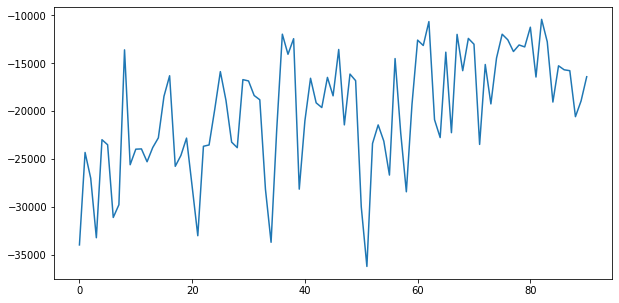

s: [0 0 4], mu: [18.080845  16.175209   3.2723234], a: [[18. 18.  5.]], exp_td_error: [21.40478107], newMu: [17.995693 16.100363  3.271861]

s: [0 8 4], mu: [17.414284 15.575366  3.176546], a: [[17. 13.  5.]], exp_td_error: [30.], newMu: [17.289093  15.429738   3.1927562]

s: [ 4 11  4], mu: [12.595159  13.597086   2.8374884], a: [[15. 14.  4.]], exp_td_error: [4.99682222], newMu: [12.443619  13.472777   2.8448641]

s: [ 5 15  4], mu: [7.1282544 8.998415  1.9312998], a: [[8. 8. 5.]], exp_td_error: [5.56366042], newMu: [7.02566   8.932458  1.9361986]

s: [ 5 13  4], mu: [ 8.87942   11.37545    2.4165325], a: [[12. 17.  5.]], exp_td_error: [9.74168109], newMu: [ 8.898143  11.538841   2.4735777]

s: [ 0 20  4], mu: [8.454493  7.0695453 1.730418 ], a: [[7. 7. 5.]], exp_td_error: [6.8015515], newMu: [8.429713  7.0585265 1.7488909]

s: [ 0 17  4], mu: [9.914832  8.031174  1.9444054], a: [[4. 4. 5.]], exp_td_error: [6.84419322], newMu: [9.731972  7.8983903 1.942764 ]

s: [ 0 11  4], mu: [15.3

s: [ 0 16  4], mu: [15.051879  12.16362    2.8533742], a: [[18. 14.  1.]], exp_td_error: [6.47702877], newMu: [15.137037  12.225726   2.8798656]

s: [ 4 20  0], mu: [7.22993   7.4241986 1.7574191], a: [[ 8. 10.  0.]], exp_td_error: [10.94419533], newMu: [7.2534614 7.4444876 1.7641178]

s: [ 2 20  0], mu: [8.302136  7.4122763 1.8210286], a: [[7. 9. 1.]], exp_td_error: [11.49185002], newMu: [8.309706  7.450378  1.8282562]

s: [ 0 19  0], mu: [11.667021   9.145079   2.2621963], a: [[12. 11.  4.]], exp_td_error: [1.66618515], newMu: [11.717895   9.194838   2.2758641]

s: [12  9  4], mu: [ 7.1303754 11.584371   2.3363557], a: [[8. 8. 5.]], exp_td_error: [5.14341201], newMu: [ 7.1705256 11.588282   2.34352  ]

s: [12  7  4], mu: [ 7.254032 11.60962   2.354725], a: [[16. 12.  5.]], exp_td_error: [3.71053427], newMu: [ 7.3518405 11.625248   2.3712628]

s: [16  9  4], mu: [ 4.8857737 11.679068   2.1256666], a: [[5. 9. 0.]], exp_td_error: [5.48329762], newMu: [ 4.928916 11.653525  2.127031]

s: 

s: [ 0 20  0], mu: [10.371598   9.312064   1.7792187], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [10.544073   9.487455   1.7914118]

s: [ 0 20  0], mu: [10.544073   9.487455   1.7914118], a: [[10. 10.  1.]], exp_td_error: [10.30235314], newMu: [10.688554   9.641852   1.7997329]

s: [ 0 20  0], mu: [10.688554   9.641852   1.7997329], a: [[10. 10.  4.]], exp_td_error: [2.13858349], newMu: [10.816711   9.781162   1.8078426]

s: [10 10  4], mu: [ 8.818272  12.950985   2.3879836], a: [[10. 20.  3.]], exp_td_error: [20.507256], newMu: [ 9.226888  13.245248   2.4326296]

s: [ 0 20  2], mu: [11.234076  10.258938   1.8697586], a: [[2. 2. 2.]], exp_td_error: [8.3518824], newMu: [11.039994  10.131553   1.8415463]

s: [ 0 12  2], mu: [19.084322  17.930668   3.0620394], a: [[30. 17.  3.]], exp_td_error: [1.84978639], newMu: [19.088263  17.99252    3.0586743]

s: [13 19  2], mu: [ 5.8305135 12.754026   2.2016275], a: [[10.  8.  3.]], exp_td_error: [4.54314972], newMu: [ 5.9256477 12.84

s: [3 7 4], mu: [16.894054  15.259888   1.9483936], a: [[22. 17.  0.]], exp_td_error: [30.], newMu: [17.080639  15.351734   1.9128214]

s: [ 8 14  0], mu: [ 6.3042226 11.065561   1.610642 ], a: [[ 8. 16.  3.]], exp_td_error: [16.00207847], newMu: [ 6.386275  11.130675   1.6044369]

(array([20.949286, 18.200247,  2.094051], dtype=float32), array([21., 21.,  4.], dtype=float32))
s: [0 0 4], mu: [19.887476  17.441416   2.0420547], a: [[20. 11.  5.]], exp_td_error: [9.74207825], newMu: [19.94502   17.42303    2.0255535]

s: [9 1 4], mu: [10.471475  12.419586   1.7489152], a: [[10. 10.  5.]], exp_td_error: [8.19197051], newMu: [10.510479 12.420767  1.748983]

s: [9 1 4], mu: [10.510479 12.420767  1.748983], a: [[12. 17.  0.]], exp_td_error: [7.30832534], newMu: [10.594598  12.447068   1.7475717]

s: [4 8 0], mu: [14.783377  13.862604   1.7683682], a: [[14. 12.  0.]], exp_td_error: [30.], newMu: [14.810574  13.824249   1.7373905]

s: [ 6 10  0], mu: [10.288573  12.281311   1.7160093], a: [[3

s: [ 0 20  0], mu: [8.612666  7.6490874 1.1496394], a: [[8. 7. 2.]], exp_td_error: [7.58381416], newMu: [8.705022  7.686695  1.1578703]

s: [ 1 17  2], mu: [8.521967  8.718183  1.2698331], a: [[12. 13.  0.]], exp_td_error: [10.71508622], newMu: [8.775527  8.844805  1.2847283]

s: [ 0 20  0], mu: [8.861033  7.75453   1.1650754], a: [[10.  7.  0.]], exp_td_error: [7.34019248], newMu: [9.015358  7.8220463 1.1703376]

s: [ 3 17  0], mu: [6.0182524 8.57637   1.3575981], a: [[ 8. 11.  0.]], exp_td_error: [12.61094738], newMu: [6.157847  8.648969  1.3651388]

s: [ 0 18  0], mu: [10.285277   8.726611   1.2382133], a: [[11. 11.  0.]], exp_td_error: [10.37022974], newMu: [10.647181   9.007511   1.2625844]

s: [ 0 19  0], mu: [9.804045  8.360848  1.2062023], a: [[6. 5. 5.]], exp_td_error: [1.594692], newMu: [9.993592  8.485278  1.2147765]

s: [6 9 4], mu: [10.227001  13.015563   1.8796581], a: [[13. 13.  0.]], exp_td_error: [30.], newMu: [10.5444975 13.13958    1.868855 ]

s: [ 6 12  0], mu: [ 7.

s: [0 7 0], mu: [25.93157   23.639435   3.2270398], a: [[23. 23.  5.]], exp_td_error: [30.], newMu: [25.571323  23.407713   3.2660182]

s: [ 0 20  4], mu: [10.556082   9.20481    1.4904327], a: [[15.  2.  5.]], exp_td_error: [1.46293294], newMu: [10.279484   9.006412   1.4936802]

s: [13 12  4], mu: [ 4.215472  12.193672   1.9994031], a: [[ 4. 17.  2.]], exp_td_error: [27.63718181], newMu: [ 4.100525 12.336807  2.028855]

s: [ 0 19  2], mu: [10.254726   8.998021   1.5127356], a: [[16.  9.  4.]], exp_td_error: [3.04516807], newMu: [10.080827   8.884322   1.5204828]

s: [ 7 18  4], mu: [5.5780993 9.2167    1.6520953], a: [[ 5. 12.  0.]], exp_td_error: [18.01621825], newMu: [5.4358716 9.27415   1.6688757]

s: [ 0 20  0], mu: [9.530156  8.425832  1.4856492], a: [[5. 4. 0.]], exp_td_error: [9.24538194], newMu: [9.373421  8.337495  1.4859626]

s: [ 1 14  0], mu: [13.825925 12.722494  2.055458], a: [[14. 14.  0.]], exp_td_error: [9.79547529], newMu: [13.521305 12.488648  2.032299]

s: [ 1 18 

s: [17 10  4], mu: [ 3.7662349 14.03237    2.6854556], a: [[0. 8. 5.]], exp_td_error: [6.85995897], newMu: [ 3.7483    13.87278    2.6584828]

s: [9 8 4], mu: [ 6.8622904 12.765837   2.6443992], a: [[12.  3.  0.]], exp_td_error: [15.34736209], newMu: [ 6.990254 12.71417   2.631182]

(array([28.174551, 26.041815,  5.015705], dtype=float32), array([30., 24.,  5.], dtype=float32))
s: [0 0 4], mu: [25.769821  24.007706   4.6692467], a: [[23. 23.  0.]], exp_td_error: [30.], newMu: [25.618658 23.82445   4.475931]

s: [ 0 13  0], mu: [18.653446 16.970514  3.280089], a: [[18. 12.  5.]], exp_td_error: [0.82054201], newMu: [18.677084  16.967783   3.1767642]

s: [18  3  4], mu: [ 3.4757495 14.804689   2.6397407], a: [[ 1. 13.  0.]], exp_td_error: [6.1228629], newMu: [ 3.435575  14.564904   2.5553057]

s: [6 6 0], mu: [11.786694  14.607972   2.8243802], a: [[ 9. 15.  5.]], exp_td_error: [30.], newMu: [11.484621  14.419753   2.7545967]

s: [ 0 11  4], mu: [23.15144  21.424576  3.72972 ], a: [[30. 1

s: [14  4  4], mu: [ 2.0399323 12.92364    2.2923887], a: [[ 3. 17.  0.]], exp_td_error: [5.60135438], newMu: [ 2.034252  12.98777    2.3004606]

s: [ 0 11  0], mu: [18.963896  15.837689   2.0203707], a: [[19. 17.  1.]], exp_td_error: [8.40979266], newMu: [18.999176 15.82479   2.046374]

s: [ 2 18  0], mu: [7.4533577 7.441344  1.2598647], a: [[4. 6. 1.]], exp_td_error: [11.63616616], newMu: [7.2332964 7.4754133 1.2832323]

s: [ 0 14  0], mu: [14.018754  11.185362   1.5293027], a: [[20. 11.  0.]], exp_td_error: [3.66815236], newMu: [14.056124  11.202148   1.5457963]

s: [ 9 15  0], mu: [3.3640945 9.022407  1.7487397], a: [[5. 0. 1.]], exp_td_error: [1.94057178], newMu: [3.354176  9.040631  1.7520511]

s: [14  5  0], mu: [ 1.6634796 14.299355   2.4688048], a: [[13. 13.  5.]], exp_td_error: [4.36926482], newMu: [ 1.7048168 14.322589   2.4761455]

s: [14  8  4], mu: [ 2.2141702 12.6569195  2.2546525], a: [[2. 9. 4.]], exp_td_error: [5.41964517], newMu: [ 2.2455976 12.644703   2.2606971]

s

s: [ 0 14  0], mu: [9.910505  7.2788944 1.9241946], a: [[13.  9.  0.]], exp_td_error: [6.70527334], newMu: [9.904297  7.296105  1.9357886]

s: [ 4 13  0], mu: [5.31654   7.0733886 1.7920718], a: [[ 8. 12.  0.]], exp_td_error: [13.25628117], newMu: [5.3382273 7.0989814 1.7989839]

s: [ 0 15  0], mu: [9.016465  6.6525855 1.7990876], a: [[10.  1.  5.]], exp_td_error: [1.86473205], newMu: [9.028421 6.673339 1.80826 ]

s: [10  5  4], mu: [3.816304  9.229414  2.0536437], a: [[0. 5. 5.]], exp_td_error: [8.82956576], newMu: [3.8392315 9.22388   2.0610552]

s: [5 0 4], mu: [16.500004  12.9781     3.2363439], a: [[25. 10.  0.]], exp_td_error: [6.15596337], newMu: [16.520817  12.983495   3.2415166]

s: [20  0  0], mu: [ 2.9759753 14.160687   2.4925902], a: [[ 2. 14.  0.]], exp_td_error: [5.11140417], newMu: [ 3.0137541 14.115813   2.4850974]

s: [8 4 0], mu: [3.91965   9.172697  2.0656688], a: [[5. 6. 0.]], exp_td_error: [30.], newMu: [3.941701  9.1256895 2.0530217]

s: [7 0 0], mu: [3.9878004 9.

s: [2 0 2], mu: [17.65456   12.941349   2.5133905], a: [[18. 16.  1.]], exp_td_error: [10.82169151], newMu: [17.710522  13.018839   2.5199144]

s: [4 6 0], mu: [ 8.627596  10.111589   2.1056228], a: [[ 9. 13.  0.]], exp_td_error: [21.97819951], newMu: [ 8.645973  10.154987   2.1066084]

s: [0 9 0], mu: [15.000408 11.208847  2.217274], a: [[19.  2.  0.]], exp_td_error: [5.74393652], newMu: [15.013045 11.224932  2.202072]

s: [17  1  0], mu: [ 4.3047957 14.340973   2.2390714], a: [[ 1. 11.  0.]], exp_td_error: [4.36955847], newMu: [ 4.2665124 14.300316   2.2304866]

s: [7 2 0], mu: [4.681368  9.881869  1.9060125], a: [[6. 8. 2.]], exp_td_error: [21.32237118], newMu: [4.675407  9.8605    1.9006851]

s: [5 0 2], mu: [7.4352536 9.942034  2.0148304], a: [[10. 15.  4.]], exp_td_error: [30.], newMu: [ 7.71097   10.043148   2.0405073]

s: [0 5 4], mu: [17.86347   13.217112   2.4707193], a: [[20. 11.  0.]], exp_td_error: [5.13975617], newMu: [17.943003 13.288403  2.47263 ]

s: [9 6 0], mu: [ 4.5

s: [ 0 15  0], mu: [10.636367   8.920217   1.3570482], a: [[13.  0.  5.]], exp_td_error: [1.48176157], newMu: [10.591454   8.918775   1.3483715]

s: [13  5  4], mu: [ 4.2619057 10.986573   1.9021411], a: [[ 5. 18.  5.]], exp_td_error: [3.49100856], newMu: [ 4.2307634 11.008031   1.8990175]

s: [ 0 13  4], mu: [13.052379  10.957784   1.5765315], a: [[22.  9.  0.]], exp_td_error: [2.23522295], newMu: [13.029413  10.95678    1.5668461]

s: [13 12  0], mu: [ 3.9504178 11.3034115  1.906981 ], a: [[0. 9. 3.]], exp_td_error: [17.52049756], newMu: [ 3.8976784 11.287274   1.9037682]

s: [ 4 11  2], mu: [ 7.671457 10.698199  1.824217], a: [[6. 7. 4.]], exp_td_error: [2.8299167], newMu: [ 7.6103597 10.679418   1.8214601]

s: [3 8 4], mu: [16.224855 15.302699  2.253811], a: [[13.  3.  5.]], exp_td_error: [30.], newMu: [14.661901  14.4186     2.2218316]

s: [13  1  4], mu: [ 4.0925107 10.856354   1.8879539], a: [[8. 9. 5.]], exp_td_error: [6.16108817], newMu: [ 4.0062428 10.779443   1.8929207]

s: 

s: [6 9 4], mu: [ 7.637773  10.249178   2.7307665], a: [[13. 14.  0.]], exp_td_error: [30.], newMu: [ 8.155351 10.468225  2.753863]

s: [ 5 13  0], mu: [6.3063345 8.280257  2.2137175], a: [[5. 3. 0.]], exp_td_error: [1.2550149], newMu: [6.5087013 8.354938  2.2142537]

s: [7 6 0], mu: [5.7135673 9.443815  2.5758183], a: [[ 7. 14.  0.]], exp_td_error: [30.], newMu: [6.003855  9.608376  2.5895643]

s: [ 0 10  0], mu: [16.514618  13.500716   3.1128614], a: [[26. 11.  0.]], exp_td_error: [4.5517251], newMu: [16.72841   13.665535   3.1227946]

s: [15 11  0], mu: [3.160313  9.404249  2.5306761], a: [[0. 8. 0.]], exp_td_error: [4.14759508], newMu: [3.2321863 9.39828   2.5136924]

s: [7 9 0], mu: [6.104499 9.6937   2.567349], a: [[12.  1.  1.]], exp_td_error: [23.32267423], newMu: [6.3867846 9.779583  2.5643196]

s: [18  0  0], mu: [ 2.9058647 10.304485   2.6391668], a: [[ 3. 13.  3.]], exp_td_error: [5.20922305], newMu: [ 2.9921126 10.239658   2.6109037]

s: [8 3 2], mu: [ 8.503534  10.653768 

s: [ 5 14  0], mu: [ 8.830016  10.480485   2.5968914], a: [[10. 15.  4.]], exp_td_error: [1.62401104], newMu: [ 8.647145  10.42226    2.5980396]

s: [15  4  4], mu: [ 4.6219583 10.194634   2.7356339], a: [[11. 13.  0.]], exp_td_error: [4.6174706], newMu: [ 4.546535  10.186177   2.7377136]

s: [13  7  0], mu: [3.6503358 9.940905  2.6822197], a: [[ 7. 10.  5.]], exp_td_error: [4.65165678], newMu: [3.6136198 9.954225  2.6897812]

s: [10  7  4], mu: [10.901378  13.083211   3.2419374], a: [[ 5. 13.  5.]], exp_td_error: [3.6916457], newMu: [10.643481  12.98757    3.2354624]

s: [ 2 10  4], mu: [21.267487  18.160542   4.1594133], a: [[16. 18.  5.]], exp_td_error: [10.72566283], newMu: [20.938974 17.978037  4.141699]

s: [ 0 18  4], mu: [11.925827  10.057893   2.4107668], a: [[12. 12.  5.]], exp_td_error: [6.8295578], newMu: [11.782629   9.9939995  2.4100049]

s: [ 0 20  4], mu: [10.915182   9.303877   2.2659829], a: [[13.  9.  3.]], exp_td_error: [5.25191971], newMu: [10.848493   9.283783   2

s: [ 0 17  0], mu: [10.680231   9.084434   1.8071789], a: [[13.  0.  5.]], exp_td_error: [1.46629666], newMu: [10.70087   9.101274  1.793223]

s: [13  7  4], mu: [ 3.906746  10.546623   2.2176871], a: [[ 4. 13.  5.]], exp_td_error: [16.02104905], newMu: [ 3.9289322 10.583061   2.2169383]

s: [ 4 10  4], mu: [15.219923  14.529234   2.8296819], a: [[20. 12.  3.]], exp_td_error: [3.32270829], newMu: [15.382144  14.623305   2.8287802]

s: [12 12  2], mu: [ 3.3416367 10.708386   2.1842287], a: [[0. 7. 4.]], exp_td_error: [5.0191063], newMu: [ 3.3477314 10.720558   2.1834023]

s: [5 9 4], mu: [15.56329   14.740606   2.8342144], a: [[22. 11.  0.]], exp_td_error: [14.3626144], newMu: [16.13515   14.978656   2.8346777]

s: [16 10  0], mu: [ 2.725282  12.0297165  2.2816014], a: [[ 6. 17.  5.]], exp_td_error: [4.95456585], newMu: [ 2.754459  12.041266   2.2801323]

s: [22  0  4], mu: [ 2.5378938 12.708109   2.343034 ], a: [[ 5. 10.  0.]], exp_td_error: [5.89178265], newMu: [ 2.5800974 12.676699  

s: [6 9 4], mu: [19.413752  18.28092    2.0660894], a: [[14. 20.  3.]], exp_td_error: [30.], newMu: [19.074434  18.071148   2.0662925]

s: [ 0 19  2], mu: [10.513986   9.797804   1.1960175], a: [[10. 10.  0.]], exp_td_error: [10.21836001], newMu: [10.320019   9.722785   1.1981444]

s: [ 0 19  0], mu: [9.931215  9.475032  1.1752928], a: [[5. 3. 4.]], exp_td_error: [1.75651002], newMu: [9.724233  9.426662  1.1783149]

s: [5 9 4], mu: [18.939474  18.06933    2.0867722], a: [[20. 21.  0.]], exp_td_error: [30.], newMu: [18.812288  18.046888   2.0594087]

s: [ 4 20  0], mu: [5.3855295 9.897451  1.5487816], a: [[ 9. 10.  5.]], exp_td_error: [1.98686892], newMu: [5.355587  9.909239  1.5407034]

s: [13 10  4], mu: [ 6.8923726 13.044859   1.9302834], a: [[ 0. 11.  1.]], exp_td_error: [26.54655225], newMu: [ 5.92014   12.736339   1.8970629]

s: [ 2 11  0], mu: [12.680567  14.542981   1.8390275], a: [[13. 15.  1.]], exp_td_error: [11.5859557], newMu: [12.382562  14.46089    1.8178463]

s: [ 0 16  

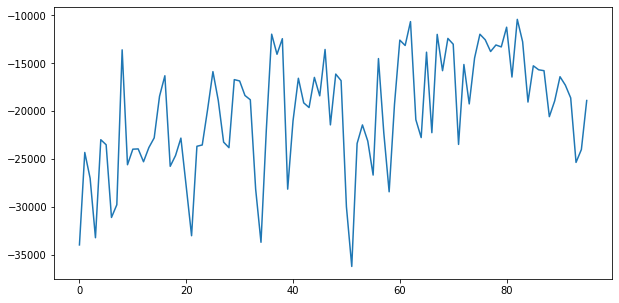

s: [0 0 4], mu: [16.814184  16.12447    1.2950919], a: [[19. 14.  2.]], exp_td_error: [10.59932425], newMu: [16.738657  16.007055   1.2783682]

s: [5 4 2], mu: [16.31391   15.812701   1.3058887], a: [[22. 26.  5.]], exp_td_error: [30.], newMu: [16.543804  16.059862   1.3688649]

s: [ 1 20  4], mu: [8.051251   8.446882   0.86485535], a: [[5. 0. 3.]], exp_td_error: [4.23531069], newMu: [8.135516  8.470761  0.8844329]

s: [ 6 10  2], mu: [ 8.580021  12.842927   1.6445874], a: [[ 9. 13.  4.]], exp_td_error: [9.55953532], newMu: [ 8.6723    12.918698   1.6779029]

s: [ 2 13  4], mu: [12.597851  13.1196785  1.3495617], a: [[14.  6.  0.]], exp_td_error: [1.70109163], newMu: [12.741953  13.196749   1.3813046]

s: [10  9  0], mu: [ 3.5686002 11.595854   1.7971307], a: [[14. 14.  4.]], exp_td_error: [0.50714158], newMu: [ 3.5901735 11.609091   1.8160071]

s: [10 13  4], mu: [ 4.8713045 11.724443   1.8052633], a: [[ 2. 12.  1.]], exp_td_error: [24.66771417], newMu: [ 4.8308845 11.725165   1.82050


s: [ 0 15  0], mu: [12.762221  11.853151   1.5289159], a: [[16. 11.  3.]], exp_td_error: [4.83614228], newMu: [12.719864  11.7911825  1.5125874]

s: [ 5 16  2], mu: [ 8.829349  10.252334   1.3869938], a: [[8. 7. 5.]], exp_td_error: [5.04799699], newMu: [ 8.852518  10.180898   1.3728397]

s: [ 6 13  4], mu: [11.154157  14.758902   1.9769485], a: [[17. 11.  0.]], exp_td_error: [3.94093634], newMu: [11.181946  14.654941   1.9528753]

s: [12 14  0], mu: [ 4.7151723 13.227576   1.7609563], a: [[ 3. 15.  4.]], exp_td_error: [3.35494038], newMu: [ 4.7476597 13.248007   1.7557046]

s: [15  4  4], mu: [ 4.373198  13.385637   1.7450117], a: [[ 3. 11.  0.]], exp_td_error: [3.89282104], newMu: [ 4.393825  13.399628   1.7377256]

s: [7 5 0], mu: [ 8.567651  14.228426   1.9093108], a: [[6. 7. 4.]], exp_td_error: [30.], newMu: [ 8.235588  14.00356    1.8944752]

s: [6 2 4], mu: [22.80242   22.154455   2.6414475], a: [[18. 24.  4.]], exp_td_error: [30.], newMu: [22.543827  21.968401   2.6676235]

s: 

s: [10  1  4], mu: [ 9.455164  13.9730625  1.2110684], a: [[18.  9.  2.]], exp_td_error: [4.2195243], newMu: [ 9.667105  14.005366   1.1894166]

s: [19  0  2], mu: [ 2.9759357 16.492695   0.8231019], a: [[ 0. 15.  0.]], exp_td_error: [7.07266393], newMu: [ 2.9291608 16.324638   0.793275 ]

s: [4 5 0], mu: [19.164839  18.322298   1.3215382], a: [[18. 22.  0.]], exp_td_error: [30.], newMu: [19.244398  18.427761   1.2712404]

s: [ 0 17  0], mu: [9.702213   8.241385   0.70554304], a: [[13.  8.  4.]], exp_td_error: [1.46629666], newMu: [9.701713  8.257953  0.6839713]

s: [13  7  4], mu: [ 5.1540747  13.092738    0.94978976], a: [[ 6. 10.  5.]], exp_td_error: [5.28660769], newMu: [ 5.215667  13.087613   0.9329996]

s: [9 7 4], mu: [11.321245  14.557208   1.1045061], a: [[10. 19.  1.]], exp_td_error: [30.], newMu: [11.408992 14.680769  1.085269]

s: [ 0 16  0], mu: [9.951485  8.565725  0.6550075], a: [[14. 14.  2.]], exp_td_error: [8.57101807], newMu: [10.006806   8.64703    0.6447374]

s: [ 

s: [ 3 20  0], mu: [6.7484384 8.2290535 1.1269398], a: [[16.  3.  0.]], exp_td_error: [1.89709051], newMu: [6.8031564 8.300603  1.135268 ]

s: [16 13  0], mu: [ 1.5688529 12.419086   1.7322266], a: [[0. 7. 0.]], exp_td_error: [12.23251217], newMu: [ 1.6068223 12.114259   1.7154946]

(array([21.781586, 21.487328,  2.163974], dtype=float32), array([24., 24.,  0.], dtype=float32))
s: [0 0 4], mu: [19.948103  19.758585   2.0376756], a: [[19. 10.  5.]], exp_td_error: [9.74391039], newMu: [19.809385  19.558086   2.0463214]

s: [9 0 4], mu: [14.094672  16.212496   1.8997794], a: [[18. 19.  5.]], exp_td_error: [9.07464546], newMu: [16.4285    17.172932   1.9507306]

s: [8 9 4], mu: [ 8.212116  13.800994   1.8854823], a: [[ 9. 17.  1.]], exp_td_error: [30.], newMu: [ 8.438349  14.022589   1.9180412]

s: [ 0 16  0], mu: [9.541982  8.556614  1.0569689], a: [[10.  8.  5.]], exp_td_error: [1.86347615], newMu: [9.587009  8.604831  1.0705538]

s: [10  6  4], mu: [ 7.6216025 13.894588   1.9386474], a:

s: [ 7 14  4], mu: [10.067183  14.970006   2.1566954], a: [[ 9. 16.  3.]], exp_td_error: [14.89071198], newMu: [ 9.993778  15.017366   2.1679635]

s: [ 0 20  2], mu: [9.916103  8.87556   1.2410085], a: [[14.  5.  5.]], exp_td_error: [2.38783047], newMu: [9.895169  8.858729  1.2437531]

s: [ 9 15  4], mu: [ 8.065641  15.04942    2.1898377], a: [[ 6. 15.  5.]], exp_td_error: [14.90989921], newMu: [ 7.9719377 15.072747   2.2046213]

s: [ 0 20  4], mu: [10.12033    9.022137   1.2637684], a: [[12.  5.  5.]], exp_td_error: [3.01347088], newMu: [10.085252   8.987866   1.2723155]

s: [ 7 15  4], mu: [ 8.910908  13.46563    1.9776613], a: [[ 8. 10.  0.]], exp_td_error: [10.26901149], newMu: [ 8.779655  13.264686   1.9571576]

s: [ 5 15  0], mu: [ 7.2349505 11.460672   1.7291226], a: [[13. 13.  0.]], exp_td_error: [8.22952547], newMu: [ 7.218418  11.423714   1.7264299]

s: [ 5 18  0], mu: [ 6.593854  10.2097025  1.5598098], a: [[ 7. 12.  0.]], exp_td_error: [14.91752537], newMu: [ 6.5836797 10.2

s: [ 0 20  0], mu: [9.532931  7.9080763 1.4241345], a: [[10. 10.  0.]], exp_td_error: [10.30235314], newMu: [9.510814  7.8974643 1.3957324]

s: [ 0 20  0], mu: [9.510814  7.8974643 1.3957324], a: [[8. 1. 5.]], exp_td_error: [2.68831538], newMu: [9.475924  7.869505  1.3702509]

s: [ 8 10  4], mu: [10.934883 17.34379   2.903224], a: [[10. 18.  0.]], exp_td_error: [21.63509766], newMu: [10.88192  17.327723  2.847609]

s: [ 0 18  0], mu: [9.59443  8.119284 1.369736], a: [[12. 12.  4.]], exp_td_error: [1.63959117], newMu: [9.57021   8.103945  1.3403423]

s: [12  8  4], mu: [ 7.301319  16.195244   2.5922499], a: [[11. 22.  0.]], exp_td_error: [4.39138698], newMu: [ 7.33138   16.22105    2.5550766]

s: [ 1 20  0], mu: [9.126759  7.7088776 1.2805421], a: [[18.  7.  4.]], exp_td_error: [0.75519376], newMu: [9.119481  7.705269  1.2577026]

s: [19 10  4], mu: [ 1.3500413 14.907274   2.1098754], a: [[ 2. 20.  5.]], exp_td_error: [30.], newMu: [ 1.3681784 15.127989   2.1353376]

s: [ 1 20  4], mu: 

s: [ 0 19  0], mu: [10.071237   8.063352   1.3341012], a: [[4. 3. 5.]], exp_td_error: [1.93609753], newMu: [10.0860405  8.1288185  1.3311887]

s: [4 9 4], mu: [16.327185 15.9969    2.370485], a: [[19. 19.  5.]], exp_td_error: [30.], newMu: [16.637413  16.431387   2.4441986]

s: [ 4 18  4], mu: [9.19249   8.582903  1.4336855], a: [[19.  8.  0.]], exp_td_error: [2.29139101], newMu: [9.099123  8.889724  1.4774358]

s: [15 16  0], mu: [ 3.6075175 15.35929    2.2921696], a: [[ 0. 14.  2.]], exp_td_error: [28.76035609], newMu: [ 3.5631878 15.390907   2.2924974]

s: [ 1 20  2], mu: [9.844027  8.224475  1.3803722], a: [[6. 0. 5.]], exp_td_error: [3.07422022], newMu: [9.791175  8.252284  1.3955481]

s: [ 7 10  4], mu: [13.210832  16.300652   2.5456479], a: [[18. 12.  5.]], exp_td_error: [2.93088587], newMu: [13.220131  16.352894   2.5638661]

s: [13 12  4], mu: [ 6.351161  15.560337   2.3868985], a: [[11.  4.  0.]], exp_td_error: [1.49574652], newMu: [ 6.337204  15.567608   2.3903513]

s: [20  

s: [ 5 14  0], mu: [ 9.67134   12.281187   1.6334975], a: [[10. 15.  2.]], exp_td_error: [11.87437755], newMu: [ 9.637023  12.326437   1.6273516]

s: [ 0 19  2], mu: [10.582765   8.584401   1.1393385], a: [[16. 11.  0.]], exp_td_error: [5.76057567], newMu: [10.598397   8.590999   1.1263555]

s: [ 5 20  0], mu: [6.2174263 9.856915  1.4125366], a: [[11.  9.  1.]], exp_td_error: [6.61692995], newMu: [6.254351  9.847763  1.4023483]

s: [ 7 19  0], mu: [ 5.9806113 10.128126   1.4371083], a: [[12.  8.  0.]], exp_td_error: [4.89670416], newMu: [ 6.0634217 10.08628    1.4236388]

s: [11 17  0], mu: [ 5.4890647 12.568701   1.6878654], a: [[ 5. 11.  2.]], exp_td_error: [12.54457028], newMu: [ 5.5080013 12.423472   1.6645607]

s: [ 5 18  2], mu: [ 7.407654  10.523139   1.4306339], a: [[16.  8.  3.]], exp_td_error: [2.64299883], newMu: [ 7.4990454 10.440033   1.4075482]

s: [13 16  2], mu: [ 6.1728315 14.51385    1.8740942], a: [[ 4. 14.  2.]], exp_td_error: [19.14887477], newMu: [ 6.147964  14.47

s: [ 0 14  0], mu: [11.765474   9.348838   1.7288685], a: [[21. 10.  0.]], exp_td_error: [2.88620439], newMu: [11.849059   9.457878   1.7383709]

s: [11 14  0], mu: [ 3.7398558 13.01408    2.0399625], a: [[ 5. 16.  5.]], exp_td_error: [2.69244416], newMu: [ 3.7571914 13.103337   2.0414696]

s: [16  4  4], mu: [ 2.8725557 13.489189   2.032567 ], a: [[9. 6. 2.]], exp_td_error: [2.94605627], newMu: [ 2.907796  13.5341425  2.0309014]

s: [19  0  2], mu: [ 1.2937546 14.724543   2.0001183], a: [[ 5. 10.  2.]], exp_td_error: [5.89495033], newMu: [ 1.3490978 14.71279    1.9949145]

s: [14  0  2], mu: [ 3.4276228 13.550174   2.0563564], a: [[ 9. 12.  0.]], exp_td_error: [4.28109042], newMu: [ 3.55213  13.560496  2.056072]

s: [11  2  0], mu: [ 3.2541761 13.535694   2.0365746], a: [[0. 8. 3.]], exp_td_error: [6.43533866], newMu: [ 3.306095  13.517379   2.0322433]

s: [3 0 2], mu: [17.628296  15.179204   2.5923202], a: [[17. 14.  5.]], exp_td_error: [16.42243478], newMu: [17.610619 15.154608  2.6

s: [24  6  0], mu: [ 2.2351227 16.809055   1.9622861], a: [[ 0. 18.  1.]], exp_td_error: [30.], newMu: [ 2.1713212 16.954597   1.9587091]

s: [ 6 14  0], mu: [ 8.801529  11.868628   2.0182884], a: [[9. 7. 0.]], exp_td_error: [6.26376542], newMu: [ 8.74119   11.860938   2.0126936]

s: [ 8 11  0], mu: [ 8.956116  14.191423   2.2884812], a: [[10. 10.  5.]], exp_td_error: [1.56707731], newMu: [ 8.882866 14.209896  2.285399]

s: [18  1  4], mu: [ 4.4055557 14.141403   2.007537 ], a: [[5. 9. 5.]], exp_td_error: [7.717469], newMu: [ 4.3559217 14.141676   2.0069702]

s: [14  0  4], mu: [ 8.4980545 14.303258   2.283537 ], a: [[10. 10.  5.]], exp_td_error: [5.34136055], newMu: [ 8.462889  14.284031   2.2883935]

s: [14  0  4], mu: [ 8.462889  14.284031   2.2883935], a: [[ 8. 17.  0.]], exp_td_error: [0.64171124], newMu: [ 8.429695  14.267707   2.2923343]

s: [5 7 0], mu: [15.312458  14.655943   2.6405585], a: [[14. 19.  1.]], exp_td_error: [30.], newMu: [15.197672  14.773107   2.6372747]

s: [ 0

s: [3 4 4], mu: [19.915207  18.785568   1.6174414], a: [[24. 21.  1.]], exp_td_error: [30.], newMu: [20.075851  18.905642   1.5890281]

s: [ 6 15  0], mu: [ 7.1009827 11.334138   1.2020032], a: [[ 5. 11.  5.]], exp_td_error: [2.79571183], newMu: [ 7.0817504 11.289137   1.1886876]

s: [11  5  4], mu: [10.405162  16.562874   1.5768545], a: [[12. 13.  0.]], exp_td_error: [0.56240347], newMu: [10.455819  16.606678   1.5664243]

s: [10  8  0], mu: [ 6.596607  15.613826   1.4753534], a: [[14. 12.  5.]], exp_td_error: [1.3654109], newMu: [ 6.671632  15.655755   1.4721141]

s: [12 10  4], mu: [ 7.302875  15.784685   1.4924934], a: [[10. 10.  0.]], exp_td_error: [6.10802531], newMu: [ 7.374524  15.796418   1.4849179]

s: [12 10  0], mu: [ 5.0399957 15.291399   1.4261293], a: [[11. 16.  5.]], exp_td_error: [3.02507284], newMu: [ 5.141198  15.31056    1.4250369]

s: [23  0  4], mu: [ 2.2779002 16.352398   1.3303845], a: [[ 0. 17.  0.]], exp_td_error: [11.07510136], newMu: [ 2.2772927 16.349709   

s: [ 0 18  0], mu: [9.715225 7.531882 1.407692], a: [[10. 10.  2.]], exp_td_error: [8.50893834], newMu: [9.671589  7.515782  1.4173273]

s: [ 0 18  2], mu: [9.662271  7.575411  1.4283205], a: [[9. 9. 5.]], exp_td_error: [6.89642579], newMu: [9.620485  7.5644827 1.4419851]

s: [ 0 17  4], mu: [10.425265   8.305903   1.5407534], a: [[5. 4. 5.]], exp_td_error: [6.14818355], newMu: [10.288699   8.209313   1.5462017]

s: [ 1 11  4], mu: [17.705614  15.875815   2.7249417], a: [[14. 15.  1.]], exp_td_error: [10.78790996], newMu: [17.514542 15.71883   2.716817]

s: [ 0 16  0], mu: [10.311765   8.270273   1.5660037], a: [[12. 11.  0.]], exp_td_error: [9.38188336], newMu: [10.2242     8.210585   1.5642538]

s: [ 1 17  0], mu: [9.06281   7.4930725 1.4783947], a: [[11. 12.  5.]], exp_td_error: [1.69723788], newMu: [9.009589  7.4730525 1.4815614]

s: [12  7  4], mu: [ 7.082684  14.657614   2.3084967], a: [[ 9. 13.  5.]], exp_td_error: [1.29606702], newMu: [ 6.987041 14.598061  2.301435]

s: [ 8 10 

s: [2 8 2], mu: [17.381603 17.79155   3.065622], a: [[17. 17.  0.]], exp_td_error: [30.], newMu: [17.24574   17.654966   2.9328809]

s: [ 2 15  0], mu: [8.72252   7.33199   1.3325719], a: [[10.  6.  5.]], exp_td_error: [1.83752176], newMu: [8.664111  7.2725368 1.2767055]

s: [12  5  4], mu: [ 7.9253283 14.833092   2.316954 ], a: [[ 0. 12.  0.]], exp_td_error: [6.62235554], newMu: [ 7.6865745 14.712064   2.2406635]

s: [0 7 0], mu: [17.991207  16.976294   2.5884852], a: [[13. 13.  5.]], exp_td_error: [30.], newMu: [17.48076   16.5079     2.4825318]

s: [ 0 10  4], mu: [15.105015  14.008008   2.1122594], a: [[17. 11.  0.]], exp_td_error: [7.78929722], newMu: [14.747921 13.603723  2.013567]

s: [ 6 11  0], mu: [ 8.917594 10.927874  1.760279], a: [[4. 4. 0.]], exp_td_error: [1.58222267], newMu: [ 8.701063  10.633579   1.7000126]

s: [6 5 0], mu: [11.302304 15.993117  2.436257], a: [[11. 17.  1.]], exp_td_error: [30.], newMu: [11.074401  15.865633   2.3698292]

s: [ 0 12  0], mu: [10.474317

In [25]:
rewardsAll = []
experienceAll = []
envParams["N"] = 1000
for i in tqdm_notebook(range(100)):
# play the game while trainings
    stateHistory, actionHistory, rewards, experiences = game.runEpisode(envParams, plannerAgent, train=True)
    averageRewards = np.nansum(rewards)/np.count_nonzero(~np.isnan(rewards))
    rewardsAll.append(averageRewards)
    experienceAll.extend(experiences)

    print(plannerAgent.policy_estimator.predict(np.array([0, 0, 0]), capacity=[30, 30, 30], retailerOrderQty=10))
    if (i % 5 == 0) & ( i > 0):
    #         visualize(stateHistory, actionHistory, rewards, envParams["N"])
        plt.figure(figsize=(10, 5))
        plt.plot(rewardsAll)
        plt.show()

In [26]:
plannerAgent.policy_estimator.stdVal = 0
plannerAgent.policy_estimator.predict(np.array([0, 0, 4]), capacity=[30, 30, 30], retailerOrderQty=10)

(array([16.747494 , 15.722344 ,  2.0626574], dtype=float32),
 array([16., 15.,  2.], dtype=float32))

In [27]:
plannerAgent.value_estimator.predict(np.array([0, 0, 0])), plannerAgent.value_estimator.predict(np.array([10, 0, 8])), plannerAgent.value_estimator.predict(np.array([0, 10, 0]))

(-77387.78, -21962.006, -9951.349)

Time Series


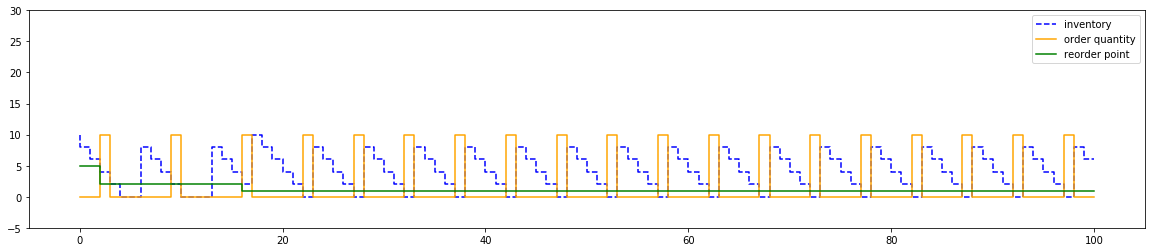

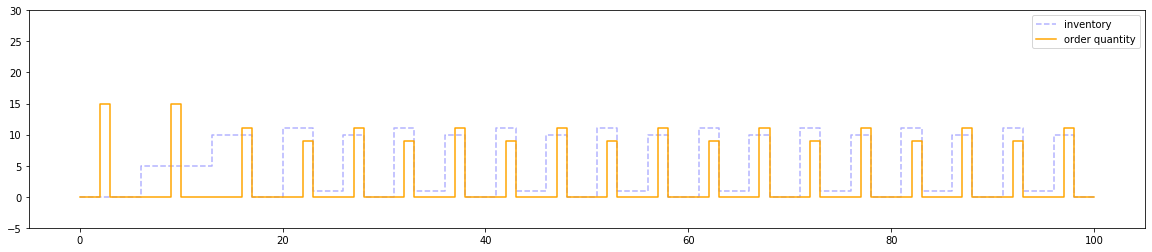

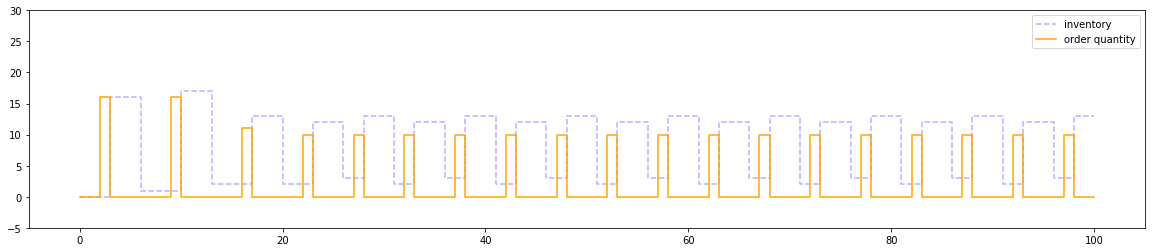

Service Time


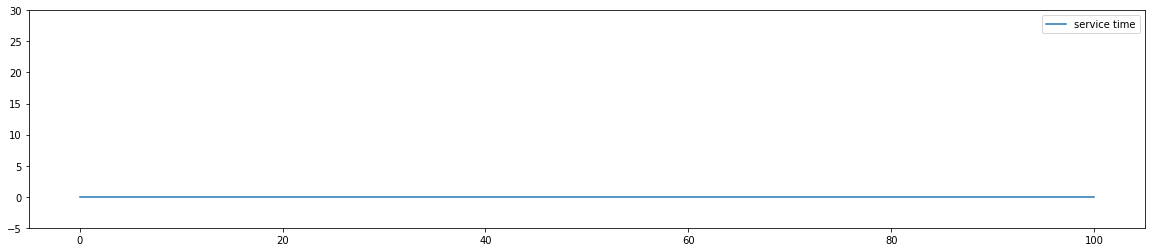

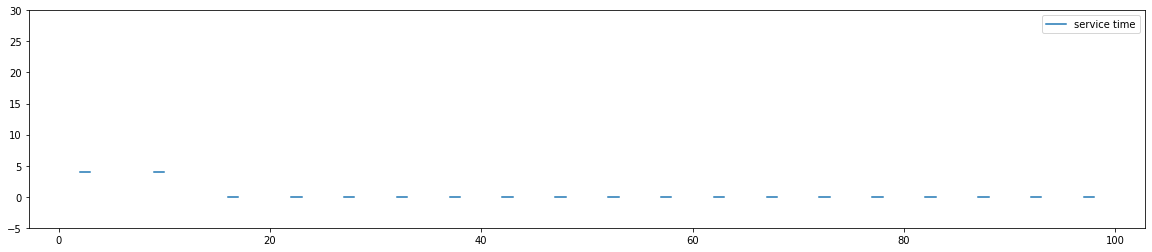

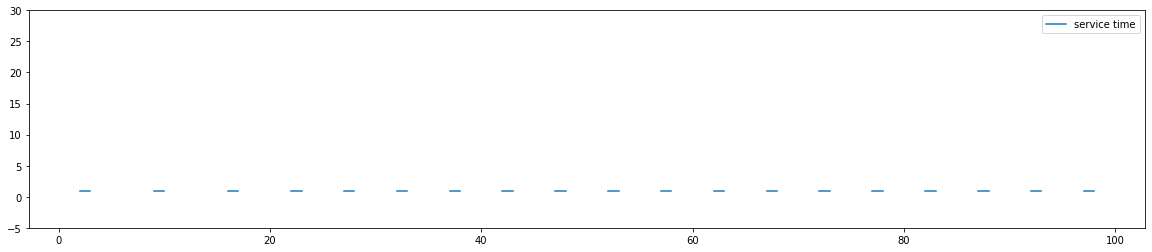

Inventory


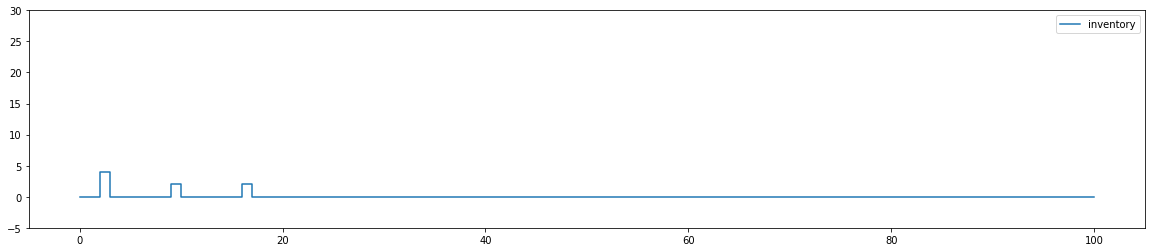

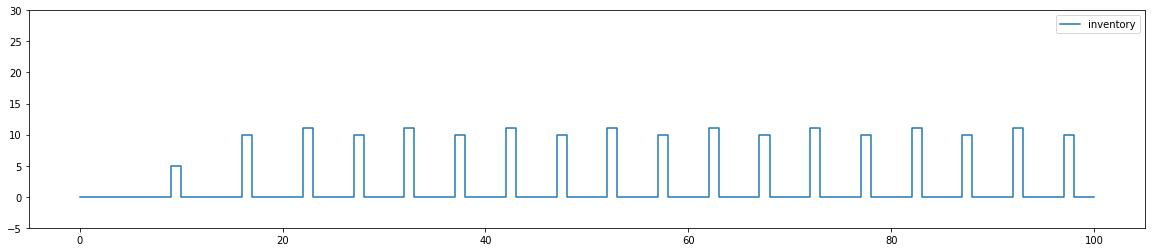

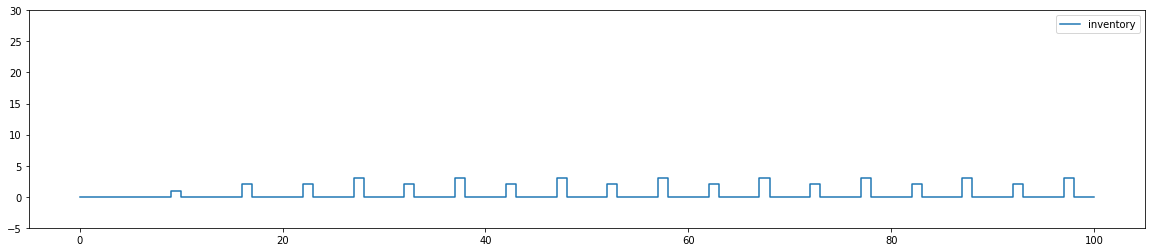

Rewards


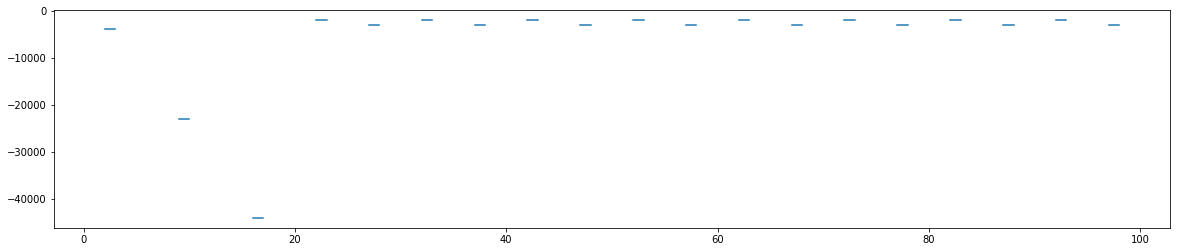

In [28]:
# play the game while training
plannerAgent.policy_estimator.stdVal = 0
envParams["N"] = 100

stateHistory, actionHistory, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

[1000, 5, 1000]

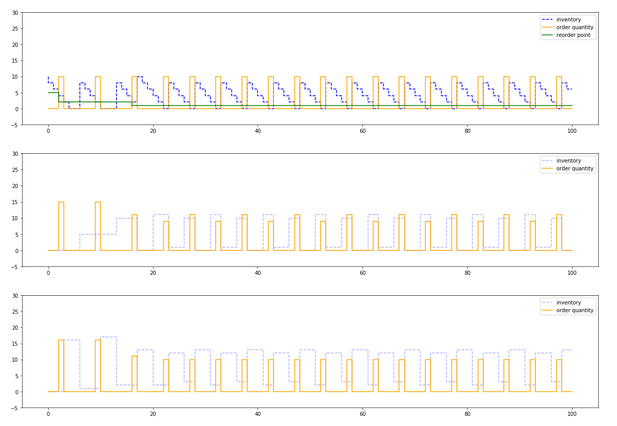

need to increase beyond 4 limit of retailer point

[5, 1000, 1000]

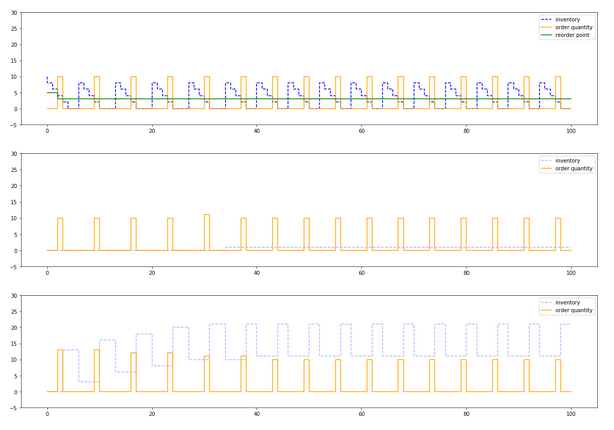

In [29]:
raise Exception("")

Exception: 

In [ ]:
"""
Visualize Value Network
"""

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, 30, 5):
    for j in range(0, 30, 5):
        for k in range(0, 10, 2):
            z = plannerAgent.value_estimator.predict(np.array([i, j, k]))
            ax.scatter(i, j, z, 'o', c='b', alpha=0.5)
        
plt.show()

In [ ]:
"""
Illustrate Value Network
proxy to objective function
"""
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm


for w in range(0, 20, 4):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca(projection='3d')
    # Make data.
    X = np.arange(0, 30, 5)
    Y = np.arange(0, 30, 5)
    X, Y = np.meshgrid(X, Y)

    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            s = np.array([X[i,j], Y[i,j], w])
            state = np.reshape(s, (1, 3))
            z = plannerAgent.value_estimator.predict(state)
            Z[i, j] = z

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    # ax.set_zlim(-199.48181, -199.48180)
    # ax.view_init(30, 80)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


In [ ]:
"""
Illustrate Policy Network
proxy to objective function
"""

from matplotlib import cm


for w in range(0, 20, 4):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.gca(projection='3d')
    # Make data.
    X = np.arange(0, 30, 5)
    Y = np.arange(0, 30, 5)
    X, Y = np.meshgrid(X, Y)

    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            s = np.array([X[i,j], Y[i,j], w])
            state = s #np.reshape(s, (1, 3))
            mu, a = plannerAgent.policy_estimator.predict(state, capacity=[30, 30, 30], retailerOrderQty=10)
            z = mu[2]
            Z[i, j] = z

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    # ax.set_zlim(-199.48181, -199.48180)
    # ax.view_init(30, 80)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
